In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
import re
import pickle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
%matplotlib inline
sns.set_style('darkgrid')
init_notebook_mode(connected=True)
cf.go_offline()

In [ ]:
train_data = pd.read_csv('/content/train.csv')

In [ ]:
features =[]            
for f in range(1,26):
    features.append(f'Feature_{f}')

In [ ]:
ret_agg_lab=[]
for f in range(2,121):
    ret_agg_lab.append(f'Ret_{f}')
ret_agg_tar=[]
for f in range(121,181):
    ret_agg_tar.append(f'Ret_{f}')

In [ ]:
train_data['RetAgg_sum_label']=train_data[ret_agg_lab].sum(axis=1)
train_data['RetAgg_std_label']=train_data[ret_agg_lab].std(axis=1)
train_data['Ret_std_label']=train_data[['Ret_MinusOne','Ret_MinusTwo','RetAgg_sum_label']].std(axis=1)
train_data['RetAgg_sum_target']=train_data[ret_agg_tar].sum(axis=1)
train_data['RetAgg_std_target']=train_data[ret_agg_tar].std(axis=1)
train_data['Ret_std_target']=train_data[['Ret_PlusOne','Ret_PlusTwo','RetAgg_sum_target']].std(axis=1)

In [ ]:
data.drop(columns=ret_agg_lab+ret_agg_tar, axis=1, inplace=True)

In [ ]:
for column in train_data.columns:
    if (len(train_data[column].unique())/400)<5:
        print(column+'\t'+str(len(train_data[column].unique())/400)+'\t'+str(len(train_data[column].unique()))+'\t'+str(train_data[column].value_counts().values[0])+'\t'+str(train_data[column].value_counts().values[0]/400)+'\t'+str(train_data[column].isnull().sum()/400))

Feature_1	0.0275	11	2651	6.6275	83.2825
Feature_5	0.025	10	6943	17.3575	0.0
Feature_7	2.06	824	114	0.285	0.0
Feature_8	0.0825	33	4178	10.445	1.1725
Feature_9	0.0925	37	5863	14.6575	4.6875
Feature_10	0.0175	7	14437	36.0925	48.6775
Feature_12	0.255	102	1596	3.99	2.74
Feature_13	0.0275	11	4715	11.7875	1.485
Feature_15	2.3025	921	61	0.1525	5.3525
Feature_16	0.0075	3	39100	97.75	1.525
Feature_20	0.025	10	7008	17.52	19.565


In [ ]:
drop_features = ['Feature_1', 'Feature_10', 'Feature_16']

In [ ]:
cat_features = ['Feature_5', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_12', 'Feature_13', 'Feature_15', 'Feature_20']

In [ ]:
num_features = ['Feature_2', 'Feature_3', 'Feature_4', 'Feature_6',
                'Feature_11', 'Feature_12', 'Feature_14', 'Feature_17',
                'Feature_18', 'Feature_19','Feature_21', 'Feature_22',
                'Feature_23', 'Feature_24', 'Feature_25']

In [ ]:
for category in cat_features:
    print(category,train_data[category].dropna().unique())

Feature_5 [ 8.  3.  9.  5.  7.  1.  2. 10.  4.  6.]
Feature_7 [75751 17369  8277 22508 22423 24099 39351 92214 18418 47637 51499 79888
 63267 35023 76131 69564 94022 16080 14259 65146 47683 35266 49660 57773
 34161 64351 19660 94975 99483 40712 62488 56152 10016  5064 88794 17103
 97667 26216 87426 84543 41301 32724 18907 26896 56379 29650 45523  3028
 70376  1013 34983 25571 44322 43382 48456 86314 22794  5850 25144 85952
 90379 89151 21635 53301 25498 56222 64320 96569 11442 75099 68528   338
 56547 31857 37410 88973 47550 63238 59401 10426 99861 82176 31534 83855
 38839 67409 10311 53489 53371  5896 48135 21016 14939 35971 71785 56348
 41948 27661 68443 95920 36818 67692 48918  4639 82574 78437 76464 59828
 48016 79444 97375 56690 36905 29815 82641 50022 58032 58878 86137 91929
   638 71484 85050  2441 43138 83707 27912 50443 73026 57841 87448 88655
  1913 15416 14653 62140 61693 16814 35872  9989 81535 39365 85154 69920
 40980 75116 61543  3349  1344 16234 86947 96321 85777 23907 4

In [ ]:
cat_int = ['Feature_5', 'Feature_9', 'Feature_13', 'Feature_20']

In [ ]:
corr = train_data[features].drop(columns=drop_features, axis=1).corr()

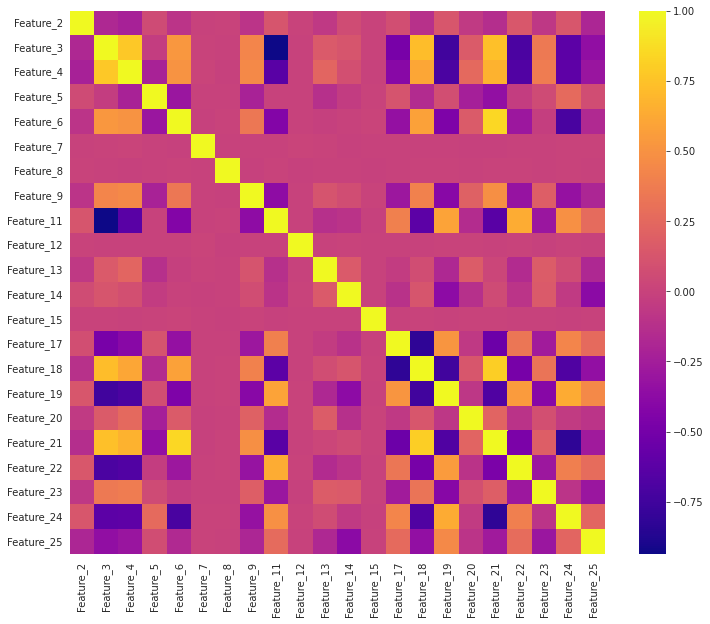

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='plasma')

In [ ]:
iimp_cat = IterativeImputer(initial_strategy='constant', verbose=3)

In [ ]:
train_data[cat_features]= iimp_cat.fit_transform(train_data[cat_features])

[IterativeImputer] Completing matrix with shape (40000, 8)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.44
[IterativeImputer] Change: 21.4215394716147, scaled tolerance: 99.861 
[IterativeImputer] Early stopping criterion reached.


In [ ]:
train_data[category_int] = train_data[category_int].astype('int64')

In [ ]:
iimp_num = IterativeImputer(initial_strategy='median', verbose=3)

In [ ]:
train_data[num_features] = iimp_num.fit_transform(train_data[num_features])

[IterativeImputer] Completing matrix with shape (40000, 15)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.74
[IterativeImputer] Change: 10.611891950380048, scaled tolerance: 0.012609885258512369 
[IterativeImputer] Ending imputation round 2/10, elapsed time 1.55
[IterativeImputer] Change: 2.071926094230098, scaled tolerance: 0.012609885258512369 
[IterativeImputer] Ending imputation round 3/10, elapsed time 2.32
[IterativeImputer] Change: 1.4321215391830084, scaled tolerance: 0.012609885258512369 
[IterativeImputer] Ending imputation round 4/10, elapsed time 3.04
[IterativeImputer] Change: 1.193149766148669, scaled tolerance: 0.012609885258512369 
[IterativeImputer] Ending imputation round 5/10, elapsed time 3.74
[IterativeImputer] Change: 1.0600686264570758, scaled tolerance: 0.012609885258512369 
[IterativeImputer] Ending imputation round 6/10, elapsed time 4.49
[IterativeImputer] Change: 0.942339657734599, scaled tolerance: 0.012609885258512369 
[IterativeImputer] 

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [ ]:
train_data.drop(columns=drop_features, axis=1, inplace=True)

In [ ]:
mms = MinMaxScaler(feature_range=(0,1))
train_data[num_features] = mm.fit_transform(train_data[num_features]) 


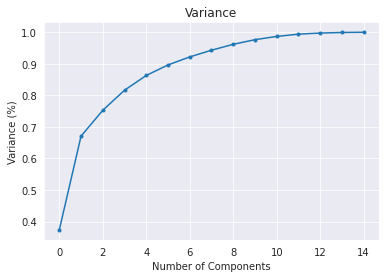

In [ ]:
pca = PCA()
pca.fit(train_data[num_features])
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='.')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Variance')
plt.show()

In [ ]:
pca = PCA(n_components=12)
x=pca.fit_transform(data[numerical])

In [ ]:
df1 = pd.DataFrame(x)
df1


0         1         2   ...        9         10        11
0      0.005939 -0.117468 -0.055766  ...  0.050350 -0.021286 -0.011600
1     -0.213377 -0.088645 -0.084225  ...  0.079952  0.079095 -0.005401
2      0.470511  0.080037 -0.057395  ...  0.018794 -0.024782  0.046405
3      0.503582  0.260652  0.019775  ...  0.012495 -0.045059  0.058928
4     -0.467396  0.123895  0.686329  ... -0.172938 -0.008725  0.049669
...         ...       ...       ...  ...       ...       ...       ...
39995 -0.333831 -0.051194  0.091679  ... -0.084425 -0.034145 -0.062125
39996 -0.460150 -0.425742 -0.024562  ...  0.010154 -0.047983 -0.055363
39997  0.238568 -0.497918 -0.074082  ...  0.037955 -0.067625  0.005724
39998 -0.468415  0.165457 -0.054350  ...  0.047325  0.086724 -0.010488
39999 -0.141645 -0.505338 -0.075193  ...  0.041533  0.015662 -0.023847

[40000 rows x 12 columns]

In [ ]:
for column in cat_features:
    df1[column] = train_data[column].apply(lambda x: "{0:.4f}".format(x))

In [ ]:
df1[cat_features] = df1[cat_features].astype('category')

In [ ]:
r = ['Ret_MinusTwo', 'Ret_MinusOne',
       'Ret_PlusOne', 'Ret_PlusTwo', 'RetAgg_sum_label', 'RetAgg_std_label', 'Ret_std_label',
       'RetAgg_sum_target', 'RetAgg_std_target', 'Ret_std_target']
df1[returns] = train_data[r]

In [ ]:
cat_feat_enc = pd.get_dummies(df1[cat_features], drop_first=True)

In [ ]:
df_pca = df1.iloc[:,:12]
data_enc = df_pca.join(cat_feat_enc)
data_enc[ret] = train_data[r]

In [ ]:
tar = ['Ret_PlusOne', 'Ret_PlusTwo', 'RetAgg_sum_target', 'RetAgg_std_target', 'Ret_std_target']

In [ ]:
X,X1,y,y1 = train_test_split(data_enc.drop(columns=tar, axis=1), data_enc[tar], test_size=0.1, random_state=101)


In [ ]:
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=0.3, random_state=101)

In [ ]:
rfr = RandomForestRegressor(n_estimators=100, max_depth=8, verbose=3)
mor = MultiOutputRegressor(rfr)

In [ ]:
mor2.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.3s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.1s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.6min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s


building tree 2 of 100


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.7s remaining:    0.0s


building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  3.1min finished


MultiOutputRegressor(estimator=RandomForestRegressor(max_depth=8, verbose=3))

In [ ]:
pickle.dump(mor,open('mor_rfr.sav', 'wb'))

In [ ]:
mlp = MLPRegressor(batch_size=256, max_iter=300, learning_rate='adaptive',verbose=True, early_stopping=True)
mor2 = MultiOutputRegressor(mlp)

In [ ]:
mor2.fit(X_tr, y_tr)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00076438
Validation score: -0.374676
Iteration 2, loss = 0.00025567
Validation score: -0.180839
Iteration 3, loss = 0.00014792
Validation score: -0.144876
Iteration 4, loss = 0.00009750
Validation score: -0.140745
Iteration 5, loss = 0.00007019
Validation score: -0.127312
Iteration 6, loss = 0.00005639
Validation score: -0.164470
Iteration 7, loss = 0.00005074
Validation score: -0.146014
Iteration 8, loss = 0.00005012
Validation score: -0.136054
Iteration 9, loss = 0.00005137
Validation score: -0.124284
Iteration 10, loss = 0.00005168
Validation score: -0.092591
Iteration 11, loss = 0.00004915
Validation score: -0.091248
Iteration 12, loss = 0.00004662
Validation score: -0.058880
Iteration 13, loss = 0.00004309
Validation score: -0.048870
Iteration 14, loss = 0.00003998
Validation score: -0.032311
Iteration 15, loss = 0.00003802
Validation score: -0.025467
Iteration 16, loss = 0.00003693
Validation score: -0.009337
Iteration 17, loss = 0.00003601
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00117301
Validation score: -0.801169
Iteration 2, loss = 0.00031148
Validation score: -0.576990
Iteration 3, loss = 0.00017581
Validation score: -0.481953
Iteration 4, loss = 0.00011452
Validation score: -0.478011
Iteration 5, loss = 0.00008238
Validation score: -0.482563
Iteration 6, loss = 0.00006596
Validation score: -0.439710
Iteration 7, loss = 0.00005772
Validation score: -0.434135
Iteration 8, loss = 0.00005582
Validation score: -0.458467
Iteration 9, loss = 0.00005676
Validation score: -0.420432
Iteration 10, loss = 0.00005822
Validation score: -0.423334
Iteration 11, loss = 0.00005803
Validation score: -0.400522
Iteration 12, loss = 0.00005817
Validation score: -0.389727
Iteration 13, loss = 0.00005748
Validation score: -0.335694
Iteration 14, loss = 0.00005442
Validation score: -0.339940
Iteration 15, loss = 0.00005261
Validation score: -0.289491
Iteration 16, loss = 0.00005124
Validation score: -0.289809
Iteration 17, loss = 0.00004795
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00100555
Validation score: -6.676980
Iteration 2, loss = 0.00020129
Validation score: -4.806349
Iteration 3, loss = 0.00010508
Validation score: -4.140851
Iteration 4, loss = 0.00006847
Validation score: -3.856044
Iteration 5, loss = 0.00005175
Validation score: -3.527311
Iteration 6, loss = 0.00004356
Validation score: -3.435404
Iteration 7, loss = 0.00003946
Validation score: -3.299795
Iteration 8, loss = 0.00003879
Validation score: -3.208056
Iteration 9, loss = 0.00003999
Validation score: -3.190847
Iteration 10, loss = 0.00004210
Validation score: -3.014352
Iteration 11, loss = 0.00004395
Validation score: -2.989473
Iteration 12, loss = 0.00004524
Validation score: -2.776846
Iteration 13, loss = 0.00004509
Validation score: -2.633288
Iteration 14, loss = 0.00004199
Validation score: -2.411605
Iteration 15, loss = 0.00003843
Validation score: -2.293788
Iteration 16, loss = 0.00003521
Validation score: -2.167946
Iteration 17, loss = 0.00003225
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00108294
Validation score: -1360.824183
Iteration 2, loss = 0.00021344
Validation score: -1002.049444
Iteration 3, loss = 0.00010905
Validation score: -809.430835
Iteration 4, loss = 0.00007041
Validation score: -768.618193
Iteration 5, loss = 0.00005448
Validation score: -720.620828
Iteration 6, loss = 0.00004742
Validation score: -679.459770
Iteration 7, loss = 0.00004541
Validation score: -668.917845
Iteration 8, loss = 0.00004663
Validation score: -655.281509
Iteration 9, loss = 0.00004985
Validation score: -642.549861
Iteration 10, loss = 0.00005255
Validation score: -614.202655
Iteration 11, loss = 0.00005387
Validation score: -584.241638
Iteration 12, loss = 0.00005444
Validation score: -548.415890
Iteration 13, loss = 0.00005131
Validation score: -512.456869
Iteration 14, loss = 0.00004670
Validation score: -466.084170
Iteration 15, loss = 0.00004247
Validation score: -445.073718
Iteration 16, loss = 0.00003753
Validation score: -416.678350
Iteration 17, l

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00115942
Validation score: -2.167558
Iteration 2, loss = 0.00021456
Validation score: -1.585125
Iteration 3, loss = 0.00011465
Validation score: -1.315046
Iteration 4, loss = 0.00007308
Validation score: -1.232847
Iteration 5, loss = 0.00005326
Validation score: -1.175322
Iteration 6, loss = 0.00004341
Validation score: -1.136610
Iteration 7, loss = 0.00003831
Validation score: -1.084249
Iteration 8, loss = 0.00003660
Validation score: -1.037813
Iteration 9, loss = 0.00003665
Validation score: -1.033434
Iteration 10, loss = 0.00003808
Validation score: -0.965515
Iteration 11, loss = 0.00003948
Validation score: -0.963179
Iteration 12, loss = 0.00004085
Validation score: -0.906858
Iteration 13, loss = 0.00004109
Validation score: -0.818851
Iteration 14, loss = 0.00003953
Validation score: -0.800645
Iteration 15, loss = 0.00003722
Validation score: -0.730430
Iteration 16, loss = 0.00003435
Validation score: -0.663096
Iteration 17, loss = 0.00003173
Validation score:

MultiOutputRegressor(estimator=MLPRegressor(batch_size=256, early_stopping=True,
                                            learning_rate='adaptive',
                                            max_iter=300, verbose=True))

In [ ]:
pickle.dump(mor2,open('mor_mlp.sav', 'wb'))

In [ ]:
mor_mlp = pickle.load(open('mor_mlp.sav', 'rb'))

In [ ]:
mor_rfr = pickle.load(open('mor_rfr.sav', 'rb'))

In [ ]:
mlp_y_pred = mor_mlp.predict(X_ts)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

In [ ]:
mlp_y_pred = mor_rfr.predict(X_ts)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


In [ ]:
mse_rfr = mean_squared_error(y_ts, rfr_y_pred)
mse_rfr

0.00027300681405335544

In [ ]:
mae_rfr = mean_absolute_error(y_ts, rfr_y_pred)
mae_rfr

0.008452034790039437

In [ ]:
mse_mlp = mean_squared_error(y_ts, mlp_y_pred)
mse_mlp

0.000254562779310859

In [ ]:
mae_mlp = mean_absolute_error(y_ts, mlp_y_pred)
mae_mlp

0.008766366585218264

In [ ]:
mlp_y_pred_df=pd.DataFrame(mlp_y_pred, columns=tar)
rfr_y_pred_df=pd.DataFrame(rfr_y_pred, columns=ta)

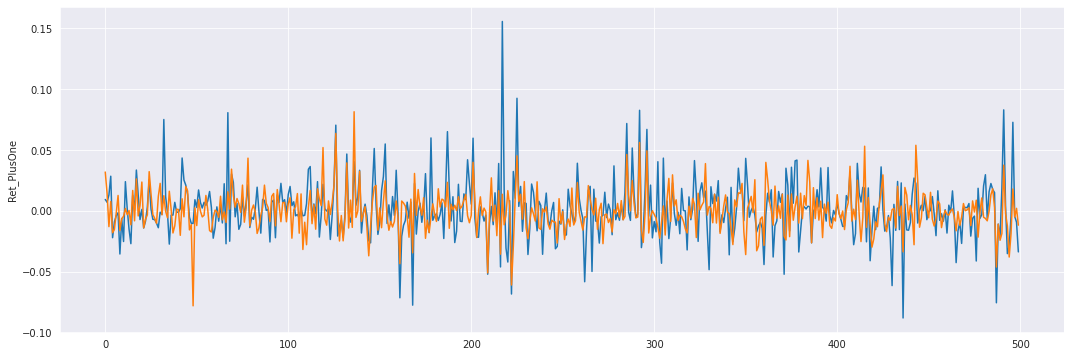

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x=range(0,500), y=y_ts["Ret_PlusOne"].head(500))
sns.lineplot(x=range(0,500), y=mlp_y_pred_df["Ret_PlusOne"].head(500))

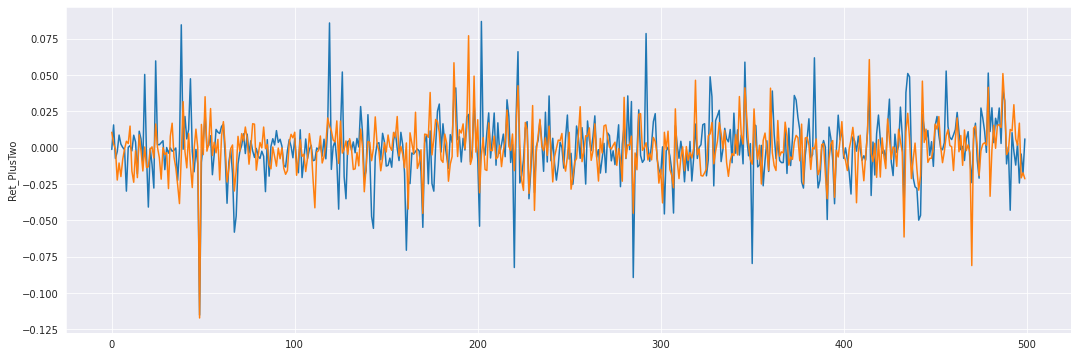

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x=range(0,500), y=y_ts["Ret_PlusTwo"].head(500))
sns.lineplot(x=range(0,500), y=mlp_y_pred_df["Ret_PlusTwo"].head(500))

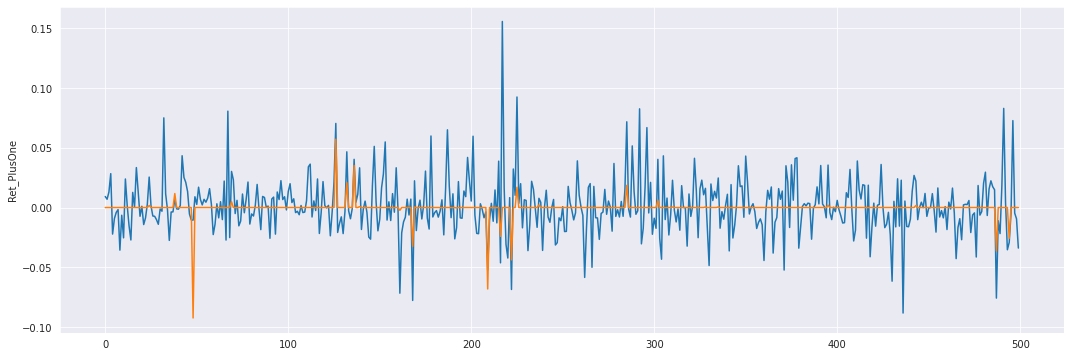

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x=range(0,500), y=y_ts["Ret_PlusOne"].head(500))
sns.lineplot(x=range(0,500), y=rfr_y_pred_df["Ret_PlusOne"].head(500))

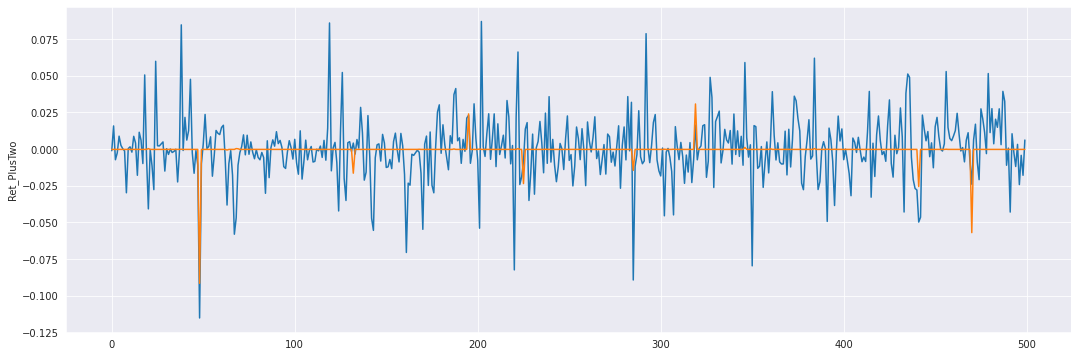

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x=range(0,500), y=y_ts["Ret_PlusTwo"].head(500))
sns.lineplot(x=range(0,500), y=rfr_y_pred_df["Ret_PlusTwo"].head(500))

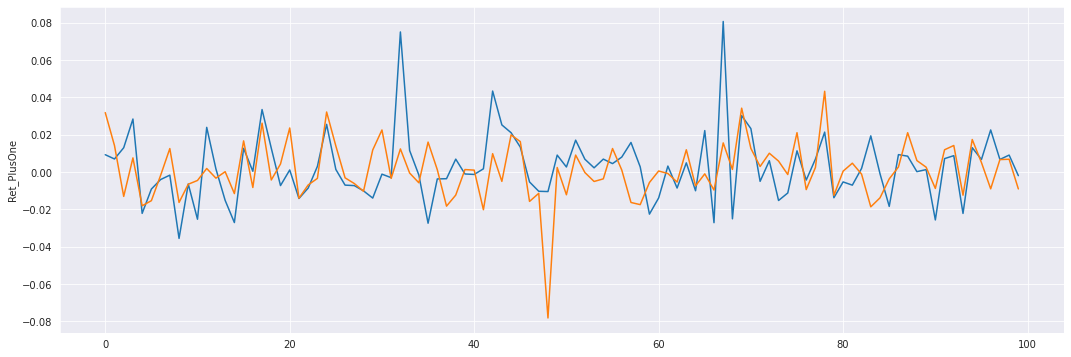

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x=range(0,100), y=y_ts["Ret_PlusOne"].head(100))
sns.lineplot(x=range(0,100), y=mlp_y_pred_df["Ret_PlusOne"].head(100))

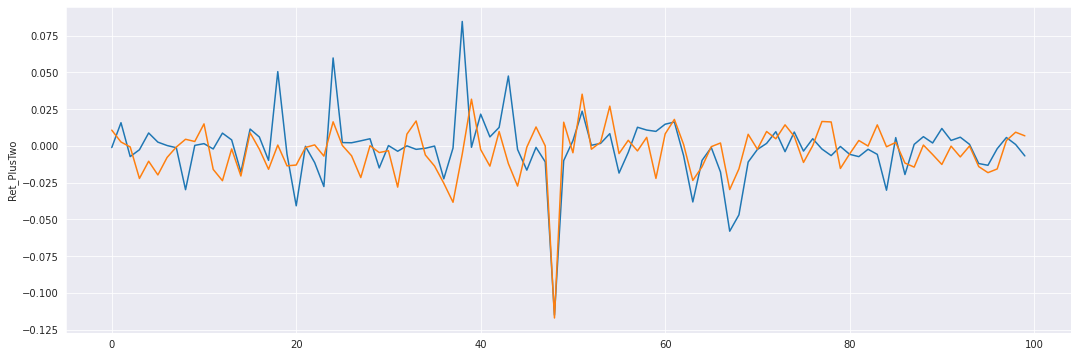

In [ ]:
plt.figure(figsize=(18,6))
sns.lineplot(x=range(0,100), y=y_ts["Ret_PlusTwo"].head(100))
sns.lineplot(x=range(0,100), y=mlp_y_pred_df["Ret_PlusTwo"].head(100))

In [ ]:
param_spc = {
    'estimator__hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'estimator__activation': ['tanh', 'relu'],
    'estimator__alpha': [0.0001, 0.001, 0.01],
}

In [ ]:
gscv = GridSearchCV(MultiOutputRegressor(MLPRegressor(early_stopping=True ,learning_rate='adaptive', verbose=True,
                                                     max_iter=1000, solver='adam')), 
                   param_grid= param_spc, 
                   verbose=3, 
                   cv=5)

In [ ]:
gscv.fit(X_tr, y_tr)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00079658
Validation score: 0.158013
Iteration 2, loss = 0.00026682
Validation score: 0.202180
Iteration 3, loss = 0.00025318
Validation score: 0.209161
Iteration 4, loss = 0.00024763
Validation score: 0.199230
Iteration 5, loss = 0.00024299
Validation score: 0.216758
Iteration 6, loss = 0.00023683
Validation score: 0.178131
Iteration 7, loss = 0.00023657
Validation score: 0.205502
Iteration 8, loss = 0.00023194
Validation score: 0.208163
Iteration 9, loss = 0.00022631
Validation score: 0.203004
Iteration 10, loss = 0.00022260
Validation score: 0.130990
Iteration 11, loss = 0.00021791
Validation score: 0.160667
Iteration 12, loss = 0.00020920
Validation score: 0.174884
Iteration 13, loss = 0.00020103
Validation score: 0.209686
Iteration 14, loss = 0.00019628
Validation score: 0.187821
Iteration 15, loss = 0.00018509
Validation score: 0.175790
Iteration 16, loss = 0.00018048
Validation score: 0.156035
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00138913
Validation score: 0.154057
Iteration 2, loss = 0.00026965
Validation score: 0.187895
Iteration 3, loss = 0.00025379
Validation score: 0.213532
Iteration 4, loss = 0.00025037
Validation score: 0.183960
Iteration 5, loss = 0.00024609
Validation score: 0.224724
Iteration 6, loss = 0.00023921
Validation score: 0.153866
Iteration 7, loss = 0.00023110
Validation score: 0.232703
Iteration 8, loss = 0.00023096
Validation score: 0.242585
Iteration 9, loss = 0.00022634
Validation score: 0.252985
Iteration 10, loss = 0.00022123
Validation score: 0.220363
Iteration 11, loss = 0.00021591
Validation score: 0.228608
Iteration 12, loss = 0.00021148
Validation score: 0.257627
Iteration 13, loss = 0.00020637
Validation score: 0.227762
Iteration 14, loss = 0.00020113
Validation score: 0.226545
Iteration 15, loss = 0.00018726
Validation score: 0.212024
Iteration 16, loss = 0.00018137
Validation score: 0.201484
Iteration 17, loss = 0.00017319
Validation score: 0.191239
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00214136
Validation score: -1.530304
Iteration 2, loss = 0.00009338
Validation score: -0.031476
Iteration 3, loss = 0.00007247
Validation score: 0.170091
Iteration 4, loss = 0.00006917
Validation score: 0.203267
Iteration 5, loss = 0.00006778
Validation score: 0.237336
Iteration 6, loss = 0.00006603
Validation score: 0.228793
Iteration 7, loss = 0.00006527
Validation score: 0.236305
Iteration 8, loss = 0.00006385
Validation score: 0.268433
Iteration 9, loss = 0.00006275
Validation score: 0.277794
Iteration 10, loss = 0.00006158
Validation score: 0.275857
Iteration 11, loss = 0.00006078
Validation score: 0.251764
Iteration 12, loss = 0.00005927
Validation score: 0.293252
Iteration 13, loss = 0.00005780
Validation score: 0.314233
Iteration 14, loss = 0.00005712
Validation score: 0.306411
Iteration 15, loss = 0.00005593
Validation score: 0.305658
Iteration 16, loss = 0.00005506
Validation score: 0.288641
Iteration 17, loss = 0.00005449
Validation score: 0.296843
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00042272
Validation score: -31.392344
Iteration 2, loss = 0.00004894
Validation score: -9.239222
Iteration 3, loss = 0.00004462
Validation score: -6.006688
Iteration 4, loss = 0.00004254
Validation score: -4.303658
Iteration 5, loss = 0.00004091
Validation score: -3.852634
Iteration 6, loss = 0.00003948
Validation score: -3.141222
Iteration 7, loss = 0.00003818
Validation score: -2.463983
Iteration 8, loss = 0.00003699
Validation score: -2.284924
Iteration 9, loss = 0.00003590
Validation score: -1.764011
Iteration 10, loss = 0.00003482
Validation score: -1.470633
Iteration 11, loss = 0.00003381
Validation score: -1.053122
Iteration 12, loss = 0.00003288
Validation score: -1.046728
Iteration 13, loss = 0.00003199
Validation score: -0.770560
Iteration 14, loss = 0.00003118
Validation score: -0.550628
Iteration 15, loss = 0.00003041
Validation score: -0.435697
Iteration 16, loss = 0.00002966
Validation score: -0.650140
Iteration 17, loss = 0.00002894
Validation score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01065472
Validation score: -1.743882
Iteration 2, loss = 0.00022148
Validation score: -0.122990
Iteration 3, loss = 0.00013884
Validation score: 0.149825
Iteration 4, loss = 0.00012209
Validation score: 0.226642
Iteration 5, loss = 0.00011622
Validation score: 0.267306
Iteration 6, loss = 0.00011349
Validation score: 0.276822
Iteration 7, loss = 0.00011113
Validation score: 0.262347
Iteration 8, loss = 0.00010955
Validation score: 0.286986
Iteration 9, loss = 0.00010839
Validation score: 0.297085
Iteration 10, loss = 0.00010790
Validation score: 0.296473
Iteration 11, loss = 0.00010539
Validation score: 0.308546
Iteration 12, loss = 0.00010439
Validation score: 0.324631
Iteration 13, loss = 0.00010290
Validation score: 0.319236
Iteration 14, loss = 0.00010231
Validation score: 0.322439
Iteration 15, loss = 0.00010086
Validation score: 0.321613
Iteration 16, loss = 0.00010029
Validation score: 0.329451
Iteration 17, loss = 0.00009839
Validation score: 0.332078
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.286 total time= 4.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00532243
Validation score: -0.228327
Iteration 2, loss = 0.00031687
Validation score: 0.129496
Iteration 3, loss = 0.00027375
Validation score: 0.121924
Iteration 4, loss = 0.00026631
Validation score: 0.145218
Iteration 5, loss = 0.00026136
Validation score: 0.163899
Iteration 6, loss = 0.00025721
Validation score: 0.163346
Iteration 7, loss = 0.00025233
Validation score: 0.162720
Iteration 8, loss = 0.00024786
Validation score: 0.176532
Iteration 9, loss = 0.00024295
Validation score: 0.172061
Iteration 10, loss = 0.00023969
Validation score: 0.174602
Iteration 11, loss = 0.00023517
Validation score: 0.196647
Iteration 12, loss = 0.00023131
Validation score: 0.176840
Iteration 13, loss = 0.00023201
Validation score: 0.195459
Iteration 14, loss = 0.00022530
Validation score: 0.185730
Iteration 15, loss = 0.00022208
Validation score: 0.194226
Iteration 16, loss = 0.00022193
Validation score: 0.212653
Iteration 17, loss = 0.00021332
Validation score: 0.191394
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00317981
Validation score: -0.038076
Iteration 2, loss = 0.00029057
Validation score: 0.203840
Iteration 3, loss = 0.00026012
Validation score: 0.208280
Iteration 4, loss = 0.00025482
Validation score: 0.219322
Iteration 5, loss = 0.00025008
Validation score: 0.214783
Iteration 6, loss = 0.00024638
Validation score: 0.204875
Iteration 7, loss = 0.00024136
Validation score: 0.223423
Iteration 8, loss = 0.00023921
Validation score: 0.227330
Iteration 9, loss = 0.00023490
Validation score: 0.220641
Iteration 10, loss = 0.00023166
Validation score: 0.232872
Iteration 11, loss = 0.00022998
Validation score: 0.223599
Iteration 12, loss = 0.00022615
Validation score: 0.227095
Iteration 13, loss = 0.00022334
Validation score: 0.223345
Iteration 14, loss = 0.00021946
Validation score: 0.237963
Iteration 15, loss = 0.00021935
Validation score: 0.232566
Iteration 16, loss = 0.00021358
Validation score: 0.235333
Iteration 17, loss = 0.00021057
Validation score: 0.199557
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01691164
Validation score: -7.545849
Iteration 2, loss = 0.00019067
Validation score: -1.537547
Iteration 3, loss = 0.00009800
Validation score: -0.399350
Iteration 4, loss = 0.00007882
Validation score: -0.090897
Iteration 5, loss = 0.00007278
Validation score: 0.015508
Iteration 6, loss = 0.00007031
Validation score: 0.033535
Iteration 7, loss = 0.00006910
Validation score: 0.092704
Iteration 8, loss = 0.00006800
Validation score: 0.109505
Iteration 9, loss = 0.00006740
Validation score: 0.122130
Iteration 10, loss = 0.00006701
Validation score: 0.113747
Iteration 11, loss = 0.00006667
Validation score: 0.161229
Iteration 12, loss = 0.00006578
Validation score: 0.127710
Iteration 13, loss = 0.00006539
Validation score: 0.156849
Iteration 14, loss = 0.00006489
Validation score: 0.186955
Iteration 15, loss = 0.00006432
Validation score: 0.156164
Iteration 16, loss = 0.00006352
Validation score: 0.195466
Iteration 17, loss = 0.00006278
Validation score: 0.195283
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00111610
Validation score: -98.869360
Iteration 2, loss = 0.00005536
Validation score: -19.367928
Iteration 3, loss = 0.00004616
Validation score: -8.952464
Iteration 4, loss = 0.00004380
Validation score: -6.450807
Iteration 5, loss = 0.00004242
Validation score: -4.542793
Iteration 6, loss = 0.00004126
Validation score: -4.169767
Iteration 7, loss = 0.00004020
Validation score: -3.612994
Iteration 8, loss = 0.00003926
Validation score: -3.179296
Iteration 9, loss = 0.00003834
Validation score: -3.028178
Iteration 10, loss = 0.00003752
Validation score: -2.959677
Iteration 11, loss = 0.00003674
Validation score: -2.572490
Iteration 12, loss = 0.00003599
Validation score: -2.492842
Iteration 13, loss = 0.00003523
Validation score: -2.023597
Iteration 14, loss = 0.00003451
Validation score: -1.985962
Iteration 15, loss = 0.00003388
Validation score: -1.690604
Iteration 16, loss = 0.00003321
Validation score: -1.709044
Iteration 17, loss = 0.00003257
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00064407
Validation score: 0.120935
Iteration 2, loss = 0.00011911
Validation score: 0.244758
Iteration 3, loss = 0.00011015
Validation score: 0.252522
Iteration 4, loss = 0.00010743
Validation score: 0.252397
Iteration 5, loss = 0.00010676
Validation score: 0.230950
Iteration 6, loss = 0.00010244
Validation score: 0.247668
Iteration 7, loss = 0.00010065
Validation score: 0.249763
Iteration 8, loss = 0.00009921
Validation score: 0.259803
Iteration 9, loss = 0.00009635
Validation score: 0.267627
Iteration 10, loss = 0.00009506
Validation score: 0.300329
Iteration 11, loss = 0.00009277
Validation score: 0.298884
Iteration 12, loss = 0.00008848
Validation score: 0.279280
Iteration 13, loss = 0.00008648
Validation score: 0.234945
Iteration 14, loss = 0.00008375
Validation score: 0.226773
Iteration 15, loss = 0.00008243
Validation score: 0.124137
Iteration 16, loss = 0.00008086
Validation score: 0.256978
Iteration 17, loss = 0.00007854
Validation score: 0.247430
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.293 total time= 4.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00151163
Validation score: 0.136783
Iteration 2, loss = 0.00026170
Validation score: 0.219792
Iteration 3, loss = 0.00024053
Validation score: 0.234811
Iteration 4, loss = 0.00023557
Validation score: 0.189155
Iteration 5, loss = 0.00023163
Validation score: 0.225597
Iteration 6, loss = 0.00022719
Validation score: 0.205483
Iteration 7, loss = 0.00022365
Validation score: 0.214843
Iteration 8, loss = 0.00022193
Validation score: 0.212621
Iteration 9, loss = 0.00021926
Validation score: 0.213481
Iteration 10, loss = 0.00021322
Validation score: 0.199043
Iteration 11, loss = 0.00021068
Validation score: 0.201611
Iteration 12, loss = 0.00020498
Validation score: 0.172844
Iteration 13, loss = 0.00020119
Validation score: 0.161899
Iteration 14, loss = 0.00019472
Validation score: 0.090347
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00145323
Validation score: 0.118953
Iteration 2, loss = 0.00026042
Validation score: 0.217585
Iteration 3, loss = 0.00024126
Validation score: 0.218014
Iteration 4, loss = 0.00023577
Validation score: 0.232655
Iteration 5, loss = 0.00023079
Validation score: 0.245710
Iteration 6, loss = 0.00022639
Validation score: 0.228404
Iteration 7, loss = 0.00022525
Validation score: 0.183729
Iteration 8, loss = 0.00022379
Validation score: 0.229171
Iteration 9, loss = 0.00021568
Validation score: 0.214972
Iteration 10, loss = 0.00021189
Validation score: 0.216414
Iteration 11, loss = 0.00021033
Validation score: 0.244019
Iteration 12, loss = 0.00020366
Validation score: 0.228346
Iteration 13, loss = 0.00019829
Validation score: 0.206302
Iteration 14, loss = 0.00018621
Validation score: 0.198803
Iteration 15, loss = 0.00017806
Validation score: 0.206353
Iteration 16, loss = 0.00017526
Validation score: 0.197858
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00079522
Validation score: -0.047127
Iteration 2, loss = 0.00007350
Validation score: 0.340940
Iteration 3, loss = 0.00006492
Validation score: 0.386869
Iteration 4, loss = 0.00006290
Validation score: 0.374266
Iteration 5, loss = 0.00006131
Validation score: 0.392458
Iteration 6, loss = 0.00005950
Validation score: 0.386289
Iteration 7, loss = 0.00005805
Validation score: 0.405419
Iteration 8, loss = 0.00005675
Validation score: 0.394013
Iteration 9, loss = 0.00005559
Validation score: 0.399123
Iteration 10, loss = 0.00005423
Validation score: 0.416691
Iteration 11, loss = 0.00005328
Validation score: 0.402272
Iteration 12, loss = 0.00005195
Validation score: 0.401106
Iteration 13, loss = 0.00005100
Validation score: 0.408425
Iteration 14, loss = 0.00005044
Validation score: 0.389883
Iteration 15, loss = 0.00004938
Validation score: 0.380741
Iteration 16, loss = 0.00004857
Validation score: 0.417999
Iteration 17, loss = 0.00004800
Validation score: 0.415438
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00322737
Validation score: -353.915519
Iteration 2, loss = 0.00008424
Validation score: -67.611281
Iteration 3, loss = 0.00005475
Validation score: -25.353579
Iteration 4, loss = 0.00004917
Validation score: -15.690137
Iteration 5, loss = 0.00004715
Validation score: -12.373029
Iteration 6, loss = 0.00004611
Validation score: -12.110756
Iteration 7, loss = 0.00004530
Validation score: -11.663480
Iteration 8, loss = 0.00004463
Validation score: -11.942941
Iteration 9, loss = 0.00004408
Validation score: -11.954394
Iteration 10, loss = 0.00004344
Validation score: -11.584554
Iteration 11, loss = 0.00004275
Validation score: -10.688246
Iteration 12, loss = 0.00004229
Validation score: -10.787443
Iteration 13, loss = 0.00004146
Validation score: -10.139211
Iteration 14, loss = 0.00004083
Validation score: -9.896761
Iteration 15, loss = 0.00004000
Validation score: -7.750729
Iteration 16, loss = 0.00003928
Validation score: -6.955302
Iteration 17, loss = 0.00003851
Val

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00681066
Validation score: -1.279381
Iteration 2, loss = 0.00018076
Validation score: -0.034377
Iteration 3, loss = 0.00012699
Validation score: 0.155096
Iteration 4, loss = 0.00011516
Validation score: 0.214786
Iteration 5, loss = 0.00011104
Validation score: 0.235763
Iteration 6, loss = 0.00010850
Validation score: 0.253406
Iteration 7, loss = 0.00010667
Validation score: 0.247273
Iteration 8, loss = 0.00010538
Validation score: 0.262013
Iteration 9, loss = 0.00010455
Validation score: 0.267095
Iteration 10, loss = 0.00010334
Validation score: 0.282677
Iteration 11, loss = 0.00010217
Validation score: 0.280793
Iteration 12, loss = 0.00010068
Validation score: 0.268672
Iteration 13, loss = 0.00009939
Validation score: 0.279216
Iteration 14, loss = 0.00009880
Validation score: 0.294790
Iteration 15, loss = 0.00009713
Validation score: 0.294525
Iteration 16, loss = 0.00009568
Validation score: 0.304726
Iteration 17, loss = 0.00009513
Validation score: 0.303731
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.294 total time= 4.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00417531
Validation score: -0.035710
Iteration 2, loss = 0.00029655
Validation score: 0.188822
Iteration 3, loss = 0.00025628
Validation score: 0.245678
Iteration 4, loss = 0.00024732
Validation score: 0.245752
Iteration 5, loss = 0.00024306
Validation score: 0.237063
Iteration 6, loss = 0.00024076
Validation score: 0.252191
Iteration 7, loss = 0.00023563
Validation score: 0.240695
Iteration 8, loss = 0.00023315
Validation score: 0.246637
Iteration 9, loss = 0.00022902
Validation score: 0.254951
Iteration 10, loss = 0.00022652
Validation score: 0.259967
Iteration 11, loss = 0.00022317
Validation score: 0.261656
Iteration 12, loss = 0.00021577
Validation score: 0.257147
Iteration 13, loss = 0.00021476
Validation score: 0.254226
Iteration 14, loss = 0.00020792
Validation score: 0.239080
Iteration 15, loss = 0.00020235
Validation score: 0.246455
Iteration 16, loss = 0.00019835
Validation score: 0.227115
Iteration 17, loss = 0.00019193
Validation score: 0.243032
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00441986
Validation score: -0.179659
Iteration 2, loss = 0.00030392
Validation score: 0.153489
Iteration 3, loss = 0.00025100
Validation score: 0.211586
Iteration 4, loss = 0.00023948
Validation score: 0.206523
Iteration 5, loss = 0.00023555
Validation score: 0.229092
Iteration 6, loss = 0.00023276
Validation score: 0.213330
Iteration 7, loss = 0.00023049
Validation score: 0.229137
Iteration 8, loss = 0.00022828
Validation score: 0.231060
Iteration 9, loss = 0.00022621
Validation score: 0.237445
Iteration 10, loss = 0.00022443
Validation score: 0.234543
Iteration 11, loss = 0.00022211
Validation score: 0.241515
Iteration 12, loss = 0.00021905
Validation score: 0.226433
Iteration 13, loss = 0.00021839
Validation score: 0.240047
Iteration 14, loss = 0.00021675
Validation score: 0.241367
Iteration 15, loss = 0.00021521
Validation score: 0.247257
Iteration 16, loss = 0.00021069
Validation score: 0.214833
Iteration 17, loss = 0.00021129
Validation score: 0.209185
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00048097
Validation score: 0.121276
Iteration 2, loss = 0.00007061
Validation score: 0.332093
Iteration 3, loss = 0.00006586
Validation score: 0.338115
Iteration 4, loss = 0.00006278
Validation score: 0.347432
Iteration 5, loss = 0.00006172
Validation score: 0.378997
Iteration 6, loss = 0.00005965
Validation score: 0.241330
Iteration 7, loss = 0.00005841
Validation score: 0.345617
Iteration 8, loss = 0.00005608
Validation score: 0.379892
Iteration 9, loss = 0.00005486
Validation score: 0.357686
Iteration 10, loss = 0.00005526
Validation score: 0.396737
Iteration 11, loss = 0.00005175
Validation score: 0.365609
Iteration 12, loss = 0.00005261
Validation score: 0.370658
Iteration 13, loss = 0.00005042
Validation score: 0.414311
Iteration 14, loss = 0.00005018
Validation score: 0.292358
Iteration 15, loss = 0.00004948
Validation score: 0.311440
Iteration 16, loss = 0.00004786
Validation score: 0.405878
Iteration 17, loss = 0.00004721
Validation score: 0.324395
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00078629
Validation score: -44.430603
Iteration 2, loss = 0.00005182
Validation score: -11.904546
Iteration 3, loss = 0.00004584
Validation score: -7.889850
Iteration 4, loss = 0.00004372
Validation score: -6.022396
Iteration 5, loss = 0.00004219
Validation score: -4.895825
Iteration 6, loss = 0.00004087
Validation score: -4.234800
Iteration 7, loss = 0.00003972
Validation score: -3.684039
Iteration 8, loss = 0.00003858
Validation score: -3.226957
Iteration 9, loss = 0.00003753
Validation score: -2.814114
Iteration 10, loss = 0.00003658
Validation score: -2.375777
Iteration 11, loss = 0.00003565
Validation score: -2.041240
Iteration 12, loss = 0.00003478
Validation score: -1.904238
Iteration 13, loss = 0.00003396
Validation score: -1.592248
Iteration 14, loss = 0.00003319
Validation score: -1.408374
Iteration 15, loss = 0.00003244
Validation score: -1.457528
Iteration 16, loss = 0.00003176
Validation score: -1.014019
Iteration 17, loss = 0.00003109
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00356110
Validation score: -0.401028
Iteration 2, loss = 0.00014239
Validation score: 0.224374
Iteration 3, loss = 0.00011621
Validation score: 0.300153
Iteration 4, loss = 0.00011191
Validation score: 0.286471
Iteration 5, loss = 0.00010927
Validation score: 0.312886
Iteration 6, loss = 0.00010796
Validation score: 0.305346
Iteration 7, loss = 0.00010578
Validation score: 0.307889
Iteration 8, loss = 0.00010445
Validation score: 0.297984
Iteration 9, loss = 0.00010291
Validation score: 0.334768
Iteration 10, loss = 0.00010094
Validation score: 0.311978
Iteration 11, loss = 0.00009970
Validation score: 0.322755
Iteration 12, loss = 0.00009858
Validation score: 0.327751
Iteration 13, loss = 0.00009684
Validation score: 0.323911
Iteration 14, loss = 0.00009599
Validation score: 0.331233
Iteration 15, loss = 0.00009508
Validation score: 0.329169
Iteration 16, loss = 0.00009376
Validation score: 0.306557
Iteration 17, loss = 0.00009207
Validation score: 0.312529
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.278 total time= 4.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00182304
Validation score: 0.108529
Iteration 2, loss = 0.00027301
Validation score: 0.227595
Iteration 3, loss = 0.00024952
Validation score: 0.244656
Iteration 4, loss = 0.00024274
Validation score: 0.247728
Iteration 5, loss = 0.00023887
Validation score: 0.251468
Iteration 6, loss = 0.00023511
Validation score: 0.238438
Iteration 7, loss = 0.00023404
Validation score: 0.233322
Iteration 8, loss = 0.00023190
Validation score: 0.235165
Iteration 9, loss = 0.00023178
Validation score: 0.242072
Iteration 10, loss = 0.00022623
Validation score: 0.251892
Iteration 11, loss = 0.00022462
Validation score: 0.210559
Iteration 12, loss = 0.00022145
Validation score: 0.237944
Iteration 13, loss = 0.00021693
Validation score: 0.234852
Iteration 14, loss = 0.00021609
Validation score: 0.238472
Iteration 15, loss = 0.00020821
Validation score: 0.239821
Iteration 16, loss = 0.00020171
Validation score: 0.192073
Iteration 17, loss = 0.00019982
Validation score: 0.179545
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00202111
Validation score: -0.002186
Iteration 2, loss = 0.00027399
Validation score: 0.179019
Iteration 3, loss = 0.00024827
Validation score: 0.167973
Iteration 4, loss = 0.00024141
Validation score: 0.203700
Iteration 5, loss = 0.00023238
Validation score: 0.216073
Iteration 6, loss = 0.00022793
Validation score: 0.226819
Iteration 7, loss = 0.00022286
Validation score: 0.219395
Iteration 8, loss = 0.00022282
Validation score: 0.203307
Iteration 9, loss = 0.00021534
Validation score: 0.187518
Iteration 10, loss = 0.00020629
Validation score: 0.224599
Iteration 11, loss = 0.00020168
Validation score: 0.208381
Iteration 12, loss = 0.00019886
Validation score: 0.167929
Iteration 13, loss = 0.00018916
Validation score: 0.173356
Iteration 14, loss = 0.00018072
Validation score: 0.173985
Iteration 15, loss = 0.00017741
Validation score: 0.148423
Iteration 16, loss = 0.00017186
Validation score: 0.122590
Iteration 17, loss = 0.00016311
Validation score: 0.060236
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00244041
Validation score: -1.470988
Iteration 2, loss = 0.00009539
Validation score: -0.009247
Iteration 3, loss = 0.00007288
Validation score: 0.145325
Iteration 4, loss = 0.00006900
Validation score: 0.230670
Iteration 5, loss = 0.00006779
Validation score: 0.199934
Iteration 6, loss = 0.00006716
Validation score: 0.208445
Iteration 7, loss = 0.00006602
Validation score: 0.223799
Iteration 8, loss = 0.00006473
Validation score: 0.219348
Iteration 9, loss = 0.00006377
Validation score: 0.283816
Iteration 10, loss = 0.00006273
Validation score: 0.177391
Iteration 11, loss = 0.00006206
Validation score: 0.275776
Iteration 12, loss = 0.00006077
Validation score: 0.253087
Iteration 13, loss = 0.00005946
Validation score: 0.258082
Iteration 14, loss = 0.00005893
Validation score: 0.233618
Iteration 15, loss = 0.00005761
Validation score: 0.295753
Iteration 16, loss = 0.00005682
Validation score: 0.284853
Iteration 17, loss = 0.00005608
Validation score: 0.301879
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00289706
Validation score: -309.315215
Iteration 2, loss = 0.00007647
Validation score: -53.901040
Iteration 3, loss = 0.00005200
Validation score: -19.787898
Iteration 4, loss = 0.00004745
Validation score: -11.572789
Iteration 5, loss = 0.00004554
Validation score: -8.118202
Iteration 6, loss = 0.00004441
Validation score: -6.780266
Iteration 7, loss = 0.00004348
Validation score: -6.888976
Iteration 8, loss = 0.00004274
Validation score: -6.579568
Iteration 9, loss = 0.00004203
Validation score: -7.198999
Iteration 10, loss = 0.00004157
Validation score: -7.188090
Iteration 11, loss = 0.00004103
Validation score: -8.005109
Iteration 12, loss = 0.00004053
Validation score: -6.625306
Iteration 13, loss = 0.00003975
Validation score: -6.871843
Iteration 14, loss = 0.00003902
Validation score: -5.208915
Iteration 15, loss = 0.00003817
Validation score: -5.765249
Iteration 16, loss = 0.00003744
Validation score: -5.307244
Iteration 17, loss = 0.00003675
Validation s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00049266
Validation score: 0.231564
Iteration 2, loss = 0.00010973
Validation score: 0.307320
Iteration 3, loss = 0.00010310
Validation score: 0.333657
Iteration 4, loss = 0.00009990
Validation score: 0.315939
Iteration 5, loss = 0.00009864
Validation score: 0.341364
Iteration 6, loss = 0.00009709
Validation score: 0.307487
Iteration 7, loss = 0.00009324
Validation score: 0.343351
Iteration 8, loss = 0.00009182
Validation score: 0.338230
Iteration 9, loss = 0.00008868
Validation score: 0.342242
Iteration 10, loss = 0.00008670
Validation score: 0.347982
Iteration 11, loss = 0.00008460
Validation score: 0.341413
Iteration 12, loss = 0.00008291
Validation score: 0.350491
Iteration 13, loss = 0.00007991
Validation score: 0.308059
Iteration 14, loss = 0.00007895
Validation score: 0.281086
Iteration 15, loss = 0.00007565
Validation score: 0.325983
Iteration 16, loss = 0.00007339
Validation score: 0.295849
Iteration 17, loss = 0.00007315
Validation score: 0.284770
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.332 total time= 4.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00088041
Validation score: 0.128141
Iteration 2, loss = 0.00027890
Validation score: 0.173569
Iteration 3, loss = 0.00026725
Validation score: 0.195120
Iteration 4, loss = 0.00025777
Validation score: 0.201534
Iteration 5, loss = 0.00025409
Validation score: 0.192487
Iteration 6, loss = 0.00024788
Validation score: 0.147447
Iteration 7, loss = 0.00024580
Validation score: 0.146218
Iteration 8, loss = 0.00024624
Validation score: 0.189415
Iteration 9, loss = 0.00024929
Validation score: 0.017059
Iteration 10, loss = 0.00024574
Validation score: 0.204671
Iteration 11, loss = 0.00023671
Validation score: 0.211054
Iteration 12, loss = 0.00023067
Validation score: 0.205773
Iteration 13, loss = 0.00021857
Validation score: 0.108551
Iteration 14, loss = 0.00021756
Validation score: 0.185958
Iteration 15, loss = 0.00020639
Validation score: 0.149577
Iteration 16, loss = 0.00019394
Validation score: 0.167448
Iteration 17, loss = 0.00018472
Validation score: 0.157717
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00522134
Validation score: -0.117288
Iteration 2, loss = 0.00032078
Validation score: 0.114575
Iteration 3, loss = 0.00026985
Validation score: 0.164021
Iteration 4, loss = 0.00025038
Validation score: 0.176773
Iteration 5, loss = 0.00024576
Validation score: 0.188134
Iteration 6, loss = 0.00024165
Validation score: 0.200178
Iteration 7, loss = 0.00024027
Validation score: 0.188334
Iteration 8, loss = 0.00023971
Validation score: 0.195682
Iteration 9, loss = 0.00023761
Validation score: 0.144058
Iteration 10, loss = 0.00023614
Validation score: 0.166974
Iteration 11, loss = 0.00023646
Validation score: 0.178808
Iteration 12, loss = 0.00023299
Validation score: 0.189497
Iteration 13, loss = 0.00023218
Validation score: 0.190369
Iteration 14, loss = 0.00023259
Validation score: 0.163235
Iteration 15, loss = 0.00022866
Validation score: 0.095532
Iteration 16, loss = 0.00022689
Validation score: 0.192602
Iteration 17, loss = 0.00022274
Validation score: 0.185235
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00126017
Validation score: -0.261585
Iteration 2, loss = 0.00008658
Validation score: 0.218253
Iteration 3, loss = 0.00007658
Validation score: 0.324977
Iteration 4, loss = 0.00007288
Validation score: 0.339082
Iteration 5, loss = 0.00007175
Validation score: 0.311583
Iteration 6, loss = 0.00007026
Validation score: 0.373182
Iteration 7, loss = 0.00006945
Validation score: 0.382108
Iteration 8, loss = 0.00006845
Validation score: 0.360798
Iteration 9, loss = 0.00006760
Validation score: 0.395464
Iteration 10, loss = 0.00006722
Validation score: 0.372928
Iteration 11, loss = 0.00006573
Validation score: 0.315213
Iteration 12, loss = 0.00006477
Validation score: 0.364702
Iteration 13, loss = 0.00006382
Validation score: 0.406041
Iteration 14, loss = 0.00006318
Validation score: 0.359608
Iteration 15, loss = 0.00006265
Validation score: 0.375498
Iteration 16, loss = 0.00006225
Validation score: 0.285922
Iteration 17, loss = 0.00006138
Validation score: 0.399652
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00100315
Validation score: -62.223114
Iteration 2, loss = 0.00005978
Validation score: -14.072704
Iteration 3, loss = 0.00005340
Validation score: -6.782783
Iteration 4, loss = 0.00005126
Validation score: -4.511726
Iteration 5, loss = 0.00004981
Validation score: -3.633070
Iteration 6, loss = 0.00004864
Validation score: -3.259486
Iteration 7, loss = 0.00004756
Validation score: -2.349259
Iteration 8, loss = 0.00004654
Validation score: -2.074641
Iteration 9, loss = 0.00004558
Validation score: -1.690015
Iteration 10, loss = 0.00004466
Validation score: -1.727705
Iteration 11, loss = 0.00004379
Validation score: -1.342804
Iteration 12, loss = 0.00004297
Validation score: -1.363353
Iteration 13, loss = 0.00004213
Validation score: -1.003793
Iteration 14, loss = 0.00004132
Validation score: -1.041634
Iteration 15, loss = 0.00004060
Validation score: -0.793721
Iteration 16, loss = 0.00003986
Validation score: -0.622921
Iteration 17, loss = 0.00003913
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00074511
Validation score: 0.163606
Iteration 2, loss = 0.00013219
Validation score: 0.291237
Iteration 3, loss = 0.00011982
Validation score: 0.311491
Iteration 4, loss = 0.00011606
Validation score: 0.282535
Iteration 5, loss = 0.00011510
Validation score: 0.316807
Iteration 6, loss = 0.00011417
Validation score: 0.333293
Iteration 7, loss = 0.00011039
Validation score: 0.268039
Iteration 8, loss = 0.00011397
Validation score: 0.272306
Iteration 9, loss = 0.00011054
Validation score: 0.265473
Iteration 10, loss = 0.00010781
Validation score: 0.259369
Iteration 11, loss = 0.00010485
Validation score: 0.271837
Iteration 12, loss = 0.00010403
Validation score: 0.302890
Iteration 13, loss = 0.00010688
Validation score: 0.219625
Iteration 14, loss = 0.00010126
Validation score: 0.299511
Iteration 15, loss = 0.00009777
Validation score: 0.349715
Iteration 16, loss = 0.00009598
Validation score: 0.329975
Iteration 17, loss = 0.00009222
Validation score: 0.332663
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.237 total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00079521
Validation score: 0.108644
Iteration 2, loss = 0.00028362
Validation score: 0.162992
Iteration 3, loss = 0.00026913
Validation score: 0.182909
Iteration 4, loss = 0.00026065
Validation score: 0.220426
Iteration 5, loss = 0.00024964
Validation score: 0.184868
Iteration 6, loss = 0.00025086
Validation score: 0.226676
Iteration 7, loss = 0.00024519
Validation score: 0.234415
Iteration 8, loss = 0.00023856
Validation score: 0.167354
Iteration 9, loss = 0.00023078
Validation score: 0.194346
Iteration 10, loss = 0.00022322
Validation score: 0.201880
Iteration 11, loss = 0.00020951
Validation score: 0.158261
Iteration 12, loss = 0.00020772
Validation score: 0.025049
Iteration 13, loss = 0.00019252
Validation score: 0.185338
Iteration 14, loss = 0.00018405
Validation score: 0.168019
Iteration 15, loss = 0.00017340
Validation score: 0.163042
Iteration 16, loss = 0.00016211
Validation score: 0.134187
Iteration 17, loss = 0.00015344
Validation score: 0.139394
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00386602
Validation score: 0.005754
Iteration 2, loss = 0.00029751
Validation score: 0.182595
Iteration 3, loss = 0.00025951
Validation score: 0.228795
Iteration 4, loss = 0.00024898
Validation score: 0.242810
Iteration 5, loss = 0.00024524
Validation score: 0.244638
Iteration 6, loss = 0.00024283
Validation score: 0.223756
Iteration 7, loss = 0.00024038
Validation score: 0.249185
Iteration 8, loss = 0.00023840
Validation score: 0.236427
Iteration 9, loss = 0.00023856
Validation score: 0.240531
Iteration 10, loss = 0.00023597
Validation score: 0.236002
Iteration 11, loss = 0.00023391
Validation score: 0.244851
Iteration 12, loss = 0.00023266
Validation score: 0.232301
Iteration 13, loss = 0.00023022
Validation score: 0.210501
Iteration 14, loss = 0.00023179
Validation score: 0.243714
Iteration 15, loss = 0.00022604
Validation score: 0.238658
Iteration 16, loss = 0.00022406
Validation score: 0.239917
Iteration 17, loss = 0.00022069
Validation score: 0.233506
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00108393
Validation score: -0.139521
Iteration 2, loss = 0.00008434
Validation score: 0.240563
Iteration 3, loss = 0.00007563
Validation score: 0.335851
Iteration 4, loss = 0.00007188
Validation score: 0.353480
Iteration 5, loss = 0.00007022
Validation score: 0.282300
Iteration 6, loss = 0.00006940
Validation score: 0.356004
Iteration 7, loss = 0.00006822
Validation score: 0.299343
Iteration 8, loss = 0.00006707
Validation score: 0.374184
Iteration 9, loss = 0.00006668
Validation score: 0.326702
Iteration 10, loss = 0.00006472
Validation score: 0.309152
Iteration 11, loss = 0.00006428
Validation score: 0.330665
Iteration 12, loss = 0.00006293
Validation score: 0.382162
Iteration 13, loss = 0.00006331
Validation score: 0.251740
Iteration 14, loss = 0.00006251
Validation score: 0.338212
Iteration 15, loss = 0.00006068
Validation score: 0.322746
Iteration 16, loss = 0.00006013
Validation score: 0.363262
Iteration 17, loss = 0.00006033
Validation score: 0.232432
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00132624
Validation score: -24.333214
Iteration 2, loss = 0.00005745
Validation score: -5.676552
Iteration 3, loss = 0.00005303
Validation score: -2.924477
Iteration 4, loss = 0.00005137
Validation score: -2.356374
Iteration 5, loss = 0.00005019
Validation score: -2.092174
Iteration 6, loss = 0.00004909
Validation score: -1.938262
Iteration 7, loss = 0.00004809
Validation score: -1.924497
Iteration 8, loss = 0.00004714
Validation score: -1.564880
Iteration 9, loss = 0.00004627
Validation score: -1.720026
Iteration 10, loss = 0.00004541
Validation score: -1.341902
Iteration 11, loss = 0.00004458
Validation score: -1.184625
Iteration 12, loss = 0.00004381
Validation score: -0.989834
Iteration 13, loss = 0.00004306
Validation score: -1.329368
Iteration 14, loss = 0.00004236
Validation score: -0.891832
Iteration 15, loss = 0.00004164
Validation score: -0.649425
Iteration 16, loss = 0.00004097
Validation score: -0.882850
Iteration 17, loss = 0.00004033
Validation score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00117750
Validation score: 0.112874
Iteration 2, loss = 0.00013266
Validation score: 0.236938
Iteration 3, loss = 0.00011874
Validation score: 0.291702
Iteration 4, loss = 0.00011389
Validation score: 0.268426
Iteration 5, loss = 0.00011185
Validation score: 0.274679
Iteration 6, loss = 0.00010995
Validation score: 0.280984
Iteration 7, loss = 0.00010854
Validation score: 0.225487
Iteration 8, loss = 0.00010836
Validation score: 0.299970
Iteration 9, loss = 0.00010712
Validation score: 0.189435
Iteration 10, loss = 0.00010670
Validation score: 0.286826
Iteration 11, loss = 0.00010381
Validation score: 0.312333
Iteration 12, loss = 0.00010195
Validation score: 0.292652
Iteration 13, loss = 0.00010045
Validation score: 0.299278
Iteration 14, loss = 0.00010041
Validation score: 0.274880
Iteration 15, loss = 0.00009855
Validation score: 0.279023
Iteration 16, loss = 0.00009710
Validation score: 0.282721
Iteration 17, loss = 0.00009689
Validation score: 0.248346
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.268 total time= 3.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00244740
Validation score: 0.057975
Iteration 2, loss = 0.00029501
Validation score: 0.206593
Iteration 3, loss = 0.00025659
Validation score: 0.246536
Iteration 4, loss = 0.00024437
Validation score: 0.289398
Iteration 5, loss = 0.00023971
Validation score: 0.291855
Iteration 6, loss = 0.00023539
Validation score: 0.294752
Iteration 7, loss = 0.00023984
Validation score: 0.298190
Iteration 8, loss = 0.00023106
Validation score: 0.296856
Iteration 9, loss = 0.00023028
Validation score: 0.292648
Iteration 10, loss = 0.00022961
Validation score: 0.298494
Iteration 11, loss = 0.00022595
Validation score: 0.267478
Iteration 12, loss = 0.00022643
Validation score: 0.210216
Iteration 13, loss = 0.00022703
Validation score: 0.263733
Iteration 14, loss = 0.00022267
Validation score: 0.284389
Iteration 15, loss = 0.00021782
Validation score: 0.302248
Iteration 16, loss = 0.00021664
Validation score: 0.267309
Iteration 17, loss = 0.00021635
Validation score: 0.320679
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00490157
Validation score: -0.152398
Iteration 2, loss = 0.00029591
Validation score: 0.152101
Iteration 3, loss = 0.00025390
Validation score: 0.207278
Iteration 4, loss = 0.00024676
Validation score: 0.226607
Iteration 5, loss = 0.00024494
Validation score: 0.218066
Iteration 6, loss = 0.00024112
Validation score: 0.213243
Iteration 7, loss = 0.00023974
Validation score: 0.216140
Iteration 8, loss = 0.00023842
Validation score: 0.219094
Iteration 9, loss = 0.00023509
Validation score: 0.193629
Iteration 10, loss = 0.00023438
Validation score: 0.230727
Iteration 11, loss = 0.00023518
Validation score: 0.217399
Iteration 12, loss = 0.00023870
Validation score: 0.204626
Iteration 13, loss = 0.00023034
Validation score: 0.226329
Iteration 14, loss = 0.00022810
Validation score: 0.227803
Iteration 15, loss = 0.00022871
Validation score: 0.154006
Iteration 16, loss = 0.00023028
Validation score: 0.233024
Iteration 17, loss = 0.00022787
Validation score: 0.214608
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00068010
Validation score: 0.021965
Iteration 2, loss = 0.00008118
Validation score: 0.267957
Iteration 3, loss = 0.00007360
Validation score: 0.361547
Iteration 4, loss = 0.00007051
Validation score: 0.386374
Iteration 5, loss = 0.00006936
Validation score: 0.423032
Iteration 6, loss = 0.00006746
Validation score: 0.356142
Iteration 7, loss = 0.00006681
Validation score: 0.418930
Iteration 8, loss = 0.00006615
Validation score: 0.412829
Iteration 9, loss = 0.00006450
Validation score: 0.415409
Iteration 10, loss = 0.00006367
Validation score: 0.426491
Iteration 11, loss = 0.00006310
Validation score: 0.396314
Iteration 12, loss = 0.00006317
Validation score: 0.441142
Iteration 13, loss = 0.00006101
Validation score: 0.432978
Iteration 14, loss = 0.00006113
Validation score: 0.423818
Iteration 15, loss = 0.00005903
Validation score: 0.431041
Iteration 16, loss = 0.00006090
Validation score: 0.313175
Iteration 17, loss = 0.00005975
Validation score: 0.319794
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00165425
Validation score: -87.591024
Iteration 2, loss = 0.00006489
Validation score: -19.427316
Iteration 3, loss = 0.00005632
Validation score: -9.155507
Iteration 4, loss = 0.00005395
Validation score: -5.923292
Iteration 5, loss = 0.00005255
Validation score: -4.577452
Iteration 6, loss = 0.00005147
Validation score: -4.034744
Iteration 7, loss = 0.00005053
Validation score: -3.249297
Iteration 8, loss = 0.00004964
Validation score: -2.812964
Iteration 9, loss = 0.00004880
Validation score: -2.497798
Iteration 10, loss = 0.00004800
Validation score: -2.348240
Iteration 11, loss = 0.00004723
Validation score: -2.094435
Iteration 12, loss = 0.00004651
Validation score: -2.030040
Iteration 13, loss = 0.00004577
Validation score: -1.761355
Iteration 14, loss = 0.00004508
Validation score: -1.582539
Iteration 15, loss = 0.00004437
Validation score: -1.314818
Iteration 16, loss = 0.00004368
Validation score: -1.486388
Iteration 17, loss = 0.00004305
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00078101
Validation score: 0.092613
Iteration 2, loss = 0.00013057
Validation score: 0.228163
Iteration 3, loss = 0.00011770
Validation score: 0.242609
Iteration 4, loss = 0.00011273
Validation score: 0.283914
Iteration 5, loss = 0.00011168
Validation score: 0.182538
Iteration 6, loss = 0.00011059
Validation score: 0.179582
Iteration 7, loss = 0.00010756
Validation score: 0.289675
Iteration 8, loss = 0.00010599
Validation score: 0.308819
Iteration 9, loss = 0.00010462
Validation score: 0.244815
Iteration 10, loss = 0.00010361
Validation score: 0.224909
Iteration 11, loss = 0.00010283
Validation score: 0.284596
Iteration 12, loss = 0.00010105
Validation score: 0.276176
Iteration 13, loss = 0.00009942
Validation score: 0.292378
Iteration 14, loss = 0.00009743
Validation score: 0.258743
Iteration 15, loss = 0.00009860
Validation score: 0.209141
Iteration 16, loss = 0.00009289
Validation score: 0.282019
Iteration 17, loss = 0.00008883
Validation score: 0.285619
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.245 total time= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00196245
Validation score: 0.070186
Iteration 2, loss = 0.00030318
Validation score: 0.164348
Iteration 3, loss = 0.00027023
Validation score: 0.203726
Iteration 4, loss = 0.00025887
Validation score: 0.223743
Iteration 5, loss = 0.00025750
Validation score: 0.193975
Iteration 6, loss = 0.00025573
Validation score: 0.231040
Iteration 7, loss = 0.00025209
Validation score: 0.228796
Iteration 8, loss = 0.00024896
Validation score: 0.139476
Iteration 9, loss = 0.00024782
Validation score: 0.217507
Iteration 10, loss = 0.00024823
Validation score: 0.163574
Iteration 11, loss = 0.00024713
Validation score: 0.229547
Iteration 12, loss = 0.00024642
Validation score: 0.170565
Iteration 13, loss = 0.00024705
Validation score: 0.132311
Iteration 14, loss = 0.00024001
Validation score: 0.156491
Iteration 15, loss = 0.00023176
Validation score: 0.219024
Iteration 16, loss = 0.00023819
Validation score: 0.204754
Iteration 17, loss = 0.00023270
Validation score: 0.091430
Valida

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00079858
Validation score: 0.152089
Iteration 2, loss = 0.00027650
Validation score: 0.234976
Iteration 3, loss = 0.00026009
Validation score: 0.186311
Iteration 4, loss = 0.00025675
Validation score: 0.196384
Iteration 5, loss = 0.00025590
Validation score: 0.213222
Iteration 6, loss = 0.00024816
Validation score: 0.181124
Iteration 7, loss = 0.00024748
Validation score: 0.239030
Iteration 8, loss = 0.00023803
Validation score: 0.234212
Iteration 9, loss = 0.00023699
Validation score: 0.227280
Iteration 10, loss = 0.00024372
Validation score: 0.237061
Iteration 11, loss = 0.00022821
Validation score: 0.250447
Iteration 12, loss = 0.00022278
Validation score: -0.011988
Iteration 13, loss = 0.00021291
Validation score: 0.171929
Iteration 14, loss = 0.00020310
Validation score: 0.174327
Iteration 15, loss = 0.00019421
Validation score: 0.071174
Iteration 16, loss = 0.00019211
Validation score: 0.165641
Iteration 17, loss = 0.00018186
Validation score: 0.152280
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00413343
Validation score: -1.469140
Iteration 2, loss = 0.00010881
Validation score: 0.059041
Iteration 3, loss = 0.00008079
Validation score: 0.332205
Iteration 4, loss = 0.00007576
Validation score: 0.386317
Iteration 5, loss = 0.00007392
Validation score: 0.395661
Iteration 6, loss = 0.00007323
Validation score: 0.413741
Iteration 7, loss = 0.00007232
Validation score: 0.412514
Iteration 8, loss = 0.00007155
Validation score: 0.392503
Iteration 9, loss = 0.00007102
Validation score: 0.401529
Iteration 10, loss = 0.00007000
Validation score: 0.416551
Iteration 11, loss = 0.00006931
Validation score: 0.394419
Iteration 12, loss = 0.00006863
Validation score: 0.430752
Iteration 13, loss = 0.00006784
Validation score: 0.427425
Iteration 14, loss = 0.00006715
Validation score: 0.425794
Iteration 15, loss = 0.00006674
Validation score: 0.431256
Iteration 16, loss = 0.00006602
Validation score: 0.422410
Iteration 17, loss = 0.00006516
Validation score: 0.434861
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00135954
Validation score: -81.534447
Iteration 2, loss = 0.00006190
Validation score: -18.344996
Iteration 3, loss = 0.00005491
Validation score: -9.426037
Iteration 4, loss = 0.00005284
Validation score: -6.395699
Iteration 5, loss = 0.00005152
Validation score: -5.089774
Iteration 6, loss = 0.00005045
Validation score: -4.472981
Iteration 7, loss = 0.00004953
Validation score: -4.478578
Iteration 8, loss = 0.00004861
Validation score: -4.344038
Iteration 9, loss = 0.00004774
Validation score: -3.387890
Iteration 10, loss = 0.00004690
Validation score: -3.190136
Iteration 11, loss = 0.00004611
Validation score: -3.399064
Iteration 12, loss = 0.00004539
Validation score: -2.676977
Iteration 13, loss = 0.00004463
Validation score: -3.195998
Iteration 14, loss = 0.00004389
Validation score: -2.163444
Iteration 15, loss = 0.00004320
Validation score: -2.633934
Iteration 16, loss = 0.00004257
Validation score: -2.883161
Iteration 17, loss = 0.00004200
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00144379
Validation score: 0.022312
Iteration 2, loss = 0.00013646
Validation score: 0.215286
Iteration 3, loss = 0.00012183
Validation score: 0.238597
Iteration 4, loss = 0.00011643
Validation score: 0.294780
Iteration 5, loss = 0.00011249
Validation score: 0.241362
Iteration 6, loss = 0.00011248
Validation score: 0.267714
Iteration 7, loss = 0.00011114
Validation score: 0.202313
Iteration 8, loss = 0.00011139
Validation score: 0.249275
Iteration 9, loss = 0.00011013
Validation score: 0.268318
Iteration 10, loss = 0.00010607
Validation score: 0.202132
Iteration 11, loss = 0.00010582
Validation score: 0.302576
Iteration 12, loss = 0.00010390
Validation score: 0.258754
Iteration 13, loss = 0.00010363
Validation score: 0.251766
Iteration 14, loss = 0.00010172
Validation score: 0.233126
Iteration 15, loss = 0.00010217
Validation score: 0.117326
Iteration 16, loss = 0.00010404
Validation score: 0.220470
Iteration 17, loss = 0.00010021
Validation score: 0.259184
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.151 total time= 3.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00099584
Validation score: 0.080985
Iteration 2, loss = 0.00028527
Validation score: 0.218644
Iteration 3, loss = 0.00026882
Validation score: 0.203552
Iteration 4, loss = 0.00026033
Validation score: 0.251977
Iteration 5, loss = 0.00026426
Validation score: 0.209709
Iteration 6, loss = 0.00025230
Validation score: 0.221615
Iteration 7, loss = 0.00025254
Validation score: 0.149056
Iteration 8, loss = 0.00025110
Validation score: 0.240354
Iteration 9, loss = 0.00024649
Validation score: 0.238801
Iteration 10, loss = 0.00024521
Validation score: 0.241606
Iteration 11, loss = 0.00024278
Validation score: 0.056090
Iteration 12, loss = 0.00024240
Validation score: 0.185214
Iteration 13, loss = 0.00023627
Validation score: 0.219316
Iteration 14, loss = 0.00022648
Validation score: 0.231892
Iteration 15, loss = 0.00022267
Validation score: 0.204113
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00195284
Validation score: 0.081248
Iteration 2, loss = 0.00027299
Validation score: 0.167163
Iteration 3, loss = 0.00024463
Validation score: 0.194722
Iteration 4, loss = 0.00023747
Validation score: 0.209512
Iteration 5, loss = 0.00023297
Validation score: 0.202527
Iteration 6, loss = 0.00023030
Validation score: 0.191693
Iteration 7, loss = 0.00023048
Validation score: 0.182594
Iteration 8, loss = 0.00022789
Validation score: 0.193729
Iteration 9, loss = 0.00022502
Validation score: 0.114129
Iteration 10, loss = 0.00023308
Validation score: 0.203138
Iteration 11, loss = 0.00022373
Validation score: 0.133689
Iteration 12, loss = 0.00022339
Validation score: 0.079810
Iteration 13, loss = 0.00022414
Validation score: 0.144124
Iteration 14, loss = 0.00021917
Validation score: 0.208420
Iteration 15, loss = 0.00021581
Validation score: 0.196014
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00269950
Validation score: -0.966327
Iteration 2, loss = 0.00009976
Validation score: 0.012186
Iteration 3, loss = 0.00008035
Validation score: 0.246064
Iteration 4, loss = 0.00007420
Validation score: 0.320847
Iteration 5, loss = 0.00007135
Validation score: 0.324328
Iteration 6, loss = 0.00006990
Validation score: 0.370837
Iteration 7, loss = 0.00006915
Validation score: 0.364026
Iteration 8, loss = 0.00006836
Validation score: 0.274156
Iteration 9, loss = 0.00006784
Validation score: 0.366557
Iteration 10, loss = 0.00006682
Validation score: 0.370057
Iteration 11, loss = 0.00006633
Validation score: 0.370655
Iteration 12, loss = 0.00006533
Validation score: 0.368427
Iteration 13, loss = 0.00006477
Validation score: 0.379369
Iteration 14, loss = 0.00006408
Validation score: 0.333499
Iteration 15, loss = 0.00006444
Validation score: 0.369137
Iteration 16, loss = 0.00006291
Validation score: 0.378697
Iteration 17, loss = 0.00006197
Validation score: 0.364397
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00158599
Validation score: -90.860530
Iteration 2, loss = 0.00006411
Validation score: -18.456620
Iteration 3, loss = 0.00005513
Validation score: -8.260771
Iteration 4, loss = 0.00005261
Validation score: -5.369916
Iteration 5, loss = 0.00005104
Validation score: -3.877733
Iteration 6, loss = 0.00004986
Validation score: -3.036324
Iteration 7, loss = 0.00004879
Validation score: -2.483467
Iteration 8, loss = 0.00004784
Validation score: -2.126450
Iteration 9, loss = 0.00004693
Validation score: -1.850402
Iteration 10, loss = 0.00004608
Validation score: -1.620113
Iteration 11, loss = 0.00004526
Validation score: -1.400442
Iteration 12, loss = 0.00004447
Validation score: -1.313323
Iteration 13, loss = 0.00004372
Validation score: -1.191057
Iteration 14, loss = 0.00004300
Validation score: -0.947034
Iteration 15, loss = 0.00004229
Validation score: -0.810863
Iteration 16, loss = 0.00004161
Validation score: -0.812904
Iteration 17, loss = 0.00004095
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00086938
Validation score: 0.156557
Iteration 2, loss = 0.00012592
Validation score: 0.295676
Iteration 3, loss = 0.00011549
Validation score: 0.311592
Iteration 4, loss = 0.00011145
Validation score: 0.330856
Iteration 5, loss = 0.00011025
Validation score: 0.322710
Iteration 6, loss = 0.00010820
Validation score: 0.305441
Iteration 7, loss = 0.00010865
Validation score: 0.292279
Iteration 8, loss = 0.00010584
Validation score: 0.262083
Iteration 9, loss = 0.00010748
Validation score: 0.307881
Iteration 10, loss = 0.00010369
Validation score: 0.300603
Iteration 11, loss = 0.00010298
Validation score: 0.292130
Iteration 12, loss = 0.00010491
Validation score: 0.281942
Iteration 13, loss = 0.00010106
Validation score: 0.280752
Iteration 14, loss = 0.00009954
Validation score: 0.336090
Iteration 15, loss = 0.00009778
Validation score: 0.312704
Iteration 16, loss = 0.00009944
Validation score: 0.330393
Iteration 17, loss = 0.00009652
Validation score: 0.224281
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.272 total time= 4.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00247880
Validation score: -0.910771
Iteration 2, loss = 0.00051161
Validation score: -0.666231
Iteration 3, loss = 0.00047433
Validation score: -0.572687
Iteration 4, loss = 0.00047801
Validation score: -0.594430
Iteration 5, loss = 0.00045240
Validation score: -0.532865
Iteration 6, loss = 0.00041993
Validation score: -0.346501
Iteration 7, loss = 0.00040007
Validation score: -0.234896
Iteration 8, loss = 0.00037055
Validation score: -0.098957
Iteration 9, loss = 0.00034289
Validation score: -0.121075
Iteration 10, loss = 0.00032764
Validation score: -0.080203
Iteration 11, loss = 0.00031215
Validation score: -0.087393
Iteration 12, loss = 0.00030369
Validation score: -0.006118
Iteration 13, loss = 0.00028637
Validation score: 0.029521
Iteration 14, loss = 0.00028461
Validation score: 0.042047
Iteration 15, loss = 0.00027217
Validation score: 0.099318
Iteration 16, loss = 0.00026582
Validation score: 0.087321
Iteration 17, loss = 0.00026027
Validation score: 0.1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00138457
Validation score: -1.092893
Iteration 2, loss = 0.00056498
Validation score: -0.949951
Iteration 3, loss = 0.00046941
Validation score: -0.488279
Iteration 4, loss = 0.00040418
Validation score: -0.358118
Iteration 5, loss = 0.00035255
Validation score: -0.209120
Iteration 6, loss = 0.00032904
Validation score: -0.161137
Iteration 7, loss = 0.00029575
Validation score: 0.010480
Iteration 8, loss = 0.00028568
Validation score: 0.012510
Iteration 9, loss = 0.00026796
Validation score: 0.073515
Iteration 10, loss = 0.00025744
Validation score: 0.115909
Iteration 11, loss = 0.00024824
Validation score: 0.125660
Iteration 12, loss = 0.00024303
Validation score: 0.142166
Iteration 13, loss = 0.00023553
Validation score: 0.159053
Iteration 14, loss = 0.00023098
Validation score: 0.174177
Iteration 15, loss = 0.00022768
Validation score: 0.177905
Iteration 16, loss = 0.00022510
Validation score: 0.207786
Iteration 17, loss = 0.00022178
Validation score: 0.198270


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00145620
Validation score: -5.190432
Iteration 2, loss = 0.00025874
Validation score: -2.921813
Iteration 3, loss = 0.00021142
Validation score: -2.900654
Iteration 4, loss = 0.00018940
Validation score: -2.663250
Iteration 5, loss = 0.00017332
Validation score: -2.332993
Iteration 6, loss = 0.00014829
Validation score: -1.466655
Iteration 7, loss = 0.00013075
Validation score: -1.154277
Iteration 8, loss = 0.00011056
Validation score: -0.985783
Iteration 9, loss = 0.00010120
Validation score: -0.629704
Iteration 10, loss = 0.00009346
Validation score: -0.651500
Iteration 11, loss = 0.00008880
Validation score: -0.317709
Iteration 12, loss = 0.00008257
Validation score: -0.366994
Iteration 13, loss = 0.00007855
Validation score: -0.131384
Iteration 14, loss = 0.00007400
Validation score: -0.037238
Iteration 15, loss = 0.00006855
Validation score: -0.060943
Iteration 16, loss = 0.00006506
Validation score: -0.015455
Iteration 17, loss = 0.00006215
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00138347
Validation score: -908.229359
Iteration 2, loss = 0.00021319
Validation score: -472.115407
Iteration 3, loss = 0.00014693
Validation score: -306.153549
Iteration 4, loss = 0.00013075
Validation score: -336.623958
Iteration 5, loss = 0.00012394
Validation score: -290.410299
Iteration 6, loss = 0.00011425
Validation score: -257.595322
Iteration 7, loss = 0.00010055
Validation score: -233.188114
Iteration 8, loss = 0.00008365
Validation score: -169.316942
Iteration 9, loss = 0.00006931
Validation score: -122.072348
Iteration 10, loss = 0.00005642
Validation score: -86.210861
Iteration 11, loss = 0.00004877
Validation score: -69.770467
Iteration 12, loss = 0.00004413
Validation score: -54.410200
Iteration 13, loss = 0.00004037
Validation score: -54.464354
Iteration 14, loss = 0.00004014
Validation score: -54.170715
Iteration 15, loss = 0.00004029
Validation score: -70.155588
Iteration 16, loss = 0.00003990
Validation score: -65.195856
Iteration 17, loss = 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00101256
Validation score: -2.732157
Iteration 2, loss = 0.00031711
Validation score: -1.542454
Iteration 3, loss = 0.00023682
Validation score: -0.767361
Iteration 4, loss = 0.00018929
Validation score: -0.604179
Iteration 5, loss = 0.00016747
Validation score: -0.393935
Iteration 6, loss = 0.00015033
Validation score: -0.192720
Iteration 7, loss = 0.00013404
Validation score: -0.047371
Iteration 8, loss = 0.00012415
Validation score: -0.012008
Iteration 9, loss = 0.00011644
Validation score: 0.061934
Iteration 10, loss = 0.00010960
Validation score: 0.114220
Iteration 11, loss = 0.00010501
Validation score: 0.169158
Iteration 12, loss = 0.00010071
Validation score: 0.204579
Iteration 13, loss = 0.00009668
Validation score: 0.166026
Iteration 14, loss = 0.00009296
Validation score: 0.240222
Iteration 15, loss = 0.00009022
Validation score: 0.289835
Iteration 16, loss = 0.00008802
Validation score: 0.286998
Iteration 17, loss = 0.00008625
Validation score: 0.30536

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.382 total time=14.0min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00120833
Validation score: -0.826591
Iteration 2, loss = 0.00049898
Validation score: -0.437426
Iteration 3, loss = 0.00042794
Validation score: -0.235514
Iteration 4, loss = 0.00036320
Validation score: -0.099326
Iteration 5, loss = 0.00032507
Validation score: 0.054926
Iteration 6, loss = 0.00030229
Validation score: 0.086946
Iteration 7, loss = 0.00028256
Validation score: 0.128159
Iteration 8, loss = 0.00026486
Validation score: 0.186694
Iteration 9, loss = 0.00025612
Validation score: 0.202502
Iteration 10, loss = 0.00024588
Validation score: 0.213726
Iteration 11, loss = 0.00024153
Validation score: 0.210334
Iteration 12, loss = 0.00023608
Validation score: 0.207152
Iteration 13, loss = 0.00023373
Validation score: 0.246787
Iteration 14, loss = 0.00022746
Validation score: 0.245718
Iteration 15, loss = 0.00022690
Validation score: 0.245464
Iteration 16, loss = 0.00022403
Validation score: 0.239826
Iteration 17, loss = 0.00022245
Validation score: 0.233304
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00124191
Validation score: -0.699043
Iteration 2, loss = 0.00051609
Validation score: -0.448180
Iteration 3, loss = 0.00042508
Validation score: -0.206214
Iteration 4, loss = 0.00036263
Validation score: -0.060165
Iteration 5, loss = 0.00031875
Validation score: 0.023936
Iteration 6, loss = 0.00028769
Validation score: 0.126312
Iteration 7, loss = 0.00027143
Validation score: 0.143241
Iteration 8, loss = 0.00025728
Validation score: 0.193088
Iteration 9, loss = 0.00024592
Validation score: 0.181198
Iteration 10, loss = 0.00023819
Validation score: 0.229335
Iteration 11, loss = 0.00023161
Validation score: 0.252825
Iteration 12, loss = 0.00022615
Validation score: 0.250479
Iteration 13, loss = 0.00022248
Validation score: 0.244355
Iteration 14, loss = 0.00021984
Validation score: 0.253101
Iteration 15, loss = 0.00021674
Validation score: 0.244205
Iteration 16, loss = 0.00021486
Validation score: 0.247874
Iteration 17, loss = 0.00021340
Validation score: 0.249876
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00204575
Validation score: -4.449690
Iteration 2, loss = 0.00024519
Validation score: -2.861062
Iteration 3, loss = 0.00019744
Validation score: -2.163352
Iteration 4, loss = 0.00018560
Validation score: -1.889547
Iteration 5, loss = 0.00018512
Validation score: -2.025325
Iteration 6, loss = 0.00017818
Validation score: -1.868544
Iteration 7, loss = 0.00016410
Validation score: -1.643324
Iteration 8, loss = 0.00013692
Validation score: -1.258275
Iteration 9, loss = 0.00012098
Validation score: -0.903948
Iteration 10, loss = 0.00010962
Validation score: -0.708197
Iteration 11, loss = 0.00010152
Validation score: -0.632161
Iteration 12, loss = 0.00009913
Validation score: -0.496175
Iteration 13, loss = 0.00009060
Validation score: -0.459766
Iteration 14, loss = 0.00008474
Validation score: -0.473614
Iteration 15, loss = 0.00008219
Validation score: -0.287897
Iteration 16, loss = 0.00007450
Validation score: -0.174059
Iteration 17, loss = 0.00007362
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00113110
Validation score: -810.757457
Iteration 2, loss = 0.00016182
Validation score: -463.259417
Iteration 3, loss = 0.00011737
Validation score: -359.045913
Iteration 4, loss = 0.00010684
Validation score: -299.768770
Iteration 5, loss = 0.00009755
Validation score: -291.812149
Iteration 6, loss = 0.00009278
Validation score: -249.871067
Iteration 7, loss = 0.00008017
Validation score: -222.937162
Iteration 8, loss = 0.00007408
Validation score: -186.664478
Iteration 9, loss = 0.00006024
Validation score: -141.912799
Iteration 10, loss = 0.00004865
Validation score: -89.413412
Iteration 11, loss = 0.00004239
Validation score: -70.109716
Iteration 12, loss = 0.00003899
Validation score: -62.483813
Iteration 13, loss = 0.00003752
Validation score: -66.630883
Iteration 14, loss = 0.00003542
Validation score: -69.927568
Iteration 15, loss = 0.00003424
Validation score: -60.242763
Iteration 16, loss = 0.00003300
Validation score: -66.008083
Iteration 17, loss = 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00100879
Validation score: -1.772117
Iteration 2, loss = 0.00029894
Validation score: -1.186258
Iteration 3, loss = 0.00023332
Validation score: -0.917566
Iteration 4, loss = 0.00018850
Validation score: -0.421033
Iteration 5, loss = 0.00016149
Validation score: -0.286485
Iteration 6, loss = 0.00014726
Validation score: -0.066357
Iteration 7, loss = 0.00013388
Validation score: 0.065896
Iteration 8, loss = 0.00012402
Validation score: 0.058970
Iteration 9, loss = 0.00011637
Validation score: 0.130319
Iteration 10, loss = 0.00010863
Validation score: 0.183811
Iteration 11, loss = 0.00010502
Validation score: 0.185191
Iteration 12, loss = 0.00009892
Validation score: 0.243550
Iteration 13, loss = 0.00009385
Validation score: 0.267835
Iteration 14, loss = 0.00009114
Validation score: 0.255937
Iteration 15, loss = 0.00008802
Validation score: 0.284739
Iteration 16, loss = 0.00008543
Validation score: 0.281692
Iteration 17, loss = 0.00008377
Validation score: 0.305594


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.406 total time=12.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00177426
Validation score: -0.652224
Iteration 2, loss = 0.00050361
Validation score: -0.602567
Iteration 3, loss = 0.00048394
Validation score: -0.444713
Iteration 4, loss = 0.00045271
Validation score: -0.357520
Iteration 5, loss = 0.00039892
Validation score: -0.188413
Iteration 6, loss = 0.00036121
Validation score: -0.070763
Iteration 7, loss = 0.00033613
Validation score: -0.023732
Iteration 8, loss = 0.00031903
Validation score: 0.046486
Iteration 9, loss = 0.00029720
Validation score: 0.109895
Iteration 10, loss = 0.00028202
Validation score: 0.155062
Iteration 11, loss = 0.00027027
Validation score: 0.147627
Iteration 12, loss = 0.00025981
Validation score: 0.155241
Iteration 13, loss = 0.00025457
Validation score: 0.195431
Iteration 14, loss = 0.00024306
Validation score: 0.198483
Iteration 15, loss = 0.00023858
Validation score: 0.211966
Iteration 16, loss = 0.00023416
Validation score: 0.226994
Iteration 17, loss = 0.00022875
Validation score: 0.234126

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00134382
Validation score: -0.697039
Iteration 2, loss = 0.00052587
Validation score: -0.555852
Iteration 3, loss = 0.00044624
Validation score: -0.330816
Iteration 4, loss = 0.00039650
Validation score: -0.097242
Iteration 5, loss = 0.00034438
Validation score: -0.017280
Iteration 6, loss = 0.00030900
Validation score: 0.078912
Iteration 7, loss = 0.00028356
Validation score: 0.081009
Iteration 8, loss = 0.00027119
Validation score: 0.156073
Iteration 9, loss = 0.00025511
Validation score: 0.177228
Iteration 10, loss = 0.00024291
Validation score: 0.214303
Iteration 11, loss = 0.00023417
Validation score: 0.224378
Iteration 12, loss = 0.00022871
Validation score: 0.228876
Iteration 13, loss = 0.00022451
Validation score: 0.244618
Iteration 14, loss = 0.00021794
Validation score: 0.220324
Iteration 15, loss = 0.00021629
Validation score: 0.267319
Iteration 16, loss = 0.00021344
Validation score: 0.252049
Iteration 17, loss = 0.00020971
Validation score: 0.256517
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00189842
Validation score: -3.335155
Iteration 2, loss = 0.00020207
Validation score: -1.508691
Iteration 3, loss = 0.00014850
Validation score: -1.099780
Iteration 4, loss = 0.00014252
Validation score: -1.124160
Iteration 5, loss = 0.00014342
Validation score: -1.275314
Iteration 6, loss = 0.00015233
Validation score: -1.195694
Iteration 7, loss = 0.00013936
Validation score: -1.068439
Iteration 8, loss = 0.00012438
Validation score: -0.916150
Iteration 9, loss = 0.00011556
Validation score: -0.624754
Iteration 10, loss = 0.00010220
Validation score: -0.483013
Iteration 11, loss = 0.00008982
Validation score: -0.345331
Iteration 12, loss = 0.00008368
Validation score: -0.213353
Iteration 13, loss = 0.00007887
Validation score: -0.148047
Iteration 14, loss = 0.00007558
Validation score: -0.183793
Iteration 15, loss = 0.00007198
Validation score: -0.069274
Iteration 16, loss = 0.00006877
Validation score: -0.062367
Iteration 17, loss = 0.00006642
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00164500
Validation score: -839.256452
Iteration 2, loss = 0.00018651
Validation score: -415.545152
Iteration 3, loss = 0.00013175
Validation score: -320.850775
Iteration 4, loss = 0.00012411
Validation score: -358.881575
Iteration 5, loss = 0.00013822
Validation score: -452.082847
Iteration 6, loss = 0.00014892
Validation score: -410.579694
Iteration 7, loss = 0.00013503
Validation score: -369.093416
Iteration 8, loss = 0.00011089
Validation score: -232.257503
Iteration 9, loss = 0.00008040
Validation score: -157.811271
Iteration 10, loss = 0.00006810
Validation score: -130.881603
Iteration 11, loss = 0.00006128
Validation score: -113.871438
Iteration 12, loss = 0.00005396
Validation score: -87.325062
Iteration 13, loss = 0.00004987
Validation score: -80.873357
Iteration 14, loss = 0.00004924
Validation score: -88.466156
Iteration 15, loss = 0.00004840
Validation score: -88.505901
Iteration 16, loss = 0.00004799
Validation score: -83.333449
Iteration 17, loss = 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00197292
Validation score: -1.815863
Iteration 2, loss = 0.00028758
Validation score: -1.203302
Iteration 3, loss = 0.00027310
Validation score: -1.133792
Iteration 4, loss = 0.00025703
Validation score: -1.113938
Iteration 5, loss = 0.00024676
Validation score: -1.106954
Iteration 6, loss = 0.00022907
Validation score: -0.745394
Iteration 7, loss = 0.00019544
Validation score: -0.518246
Iteration 8, loss = 0.00017768
Validation score: -0.353074
Iteration 9, loss = 0.00016702
Validation score: -0.425804
Iteration 10, loss = 0.00015967
Validation score: -0.199026
Iteration 11, loss = 0.00014470
Validation score: -0.149189
Iteration 12, loss = 0.00013721
Validation score: 0.019960
Iteration 13, loss = 0.00012873
Validation score: -0.067822
Iteration 14, loss = 0.00012363
Validation score: 0.052931
Iteration 15, loss = 0.00011629
Validation score: 0.111815
Iteration 16, loss = 0.00011178
Validation score: 0.167716
Iteration 17, loss = 0.00010725
Validation score: 0.1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.365 total time=14.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00111903
Validation score: -0.596249
Iteration 2, loss = 0.00049932
Validation score: -0.248703
Iteration 3, loss = 0.00038782
Validation score: -0.146203
Iteration 4, loss = 0.00034163
Validation score: -0.028854
Iteration 5, loss = 0.00030800
Validation score: 0.077762
Iteration 6, loss = 0.00029080
Validation score: 0.116706
Iteration 7, loss = 0.00026721
Validation score: 0.163860
Iteration 8, loss = 0.00025362
Validation score: 0.185334
Iteration 9, loss = 0.00024507
Validation score: 0.174893
Iteration 10, loss = 0.00023794
Validation score: 0.185185
Iteration 11, loss = 0.00023212
Validation score: 0.208781
Iteration 12, loss = 0.00022749
Validation score: 0.195346
Iteration 13, loss = 0.00022504
Validation score: 0.220903
Iteration 14, loss = 0.00022103
Validation score: 0.215582
Iteration 15, loss = 0.00021897
Validation score: 0.209236
Iteration 16, loss = 0.00021741
Validation score: 0.203470
Iteration 17, loss = 0.00021575
Validation score: 0.223507
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00143657
Validation score: -0.902865
Iteration 2, loss = 0.00053697
Validation score: -0.760760
Iteration 3, loss = 0.00046434
Validation score: -0.551072
Iteration 4, loss = 0.00040108
Validation score: -0.226723
Iteration 5, loss = 0.00034808
Validation score: -0.124622
Iteration 6, loss = 0.00031881
Validation score: 0.000178
Iteration 7, loss = 0.00029291
Validation score: -0.000653
Iteration 8, loss = 0.00027827
Validation score: 0.067957
Iteration 9, loss = 0.00025818
Validation score: 0.137585
Iteration 10, loss = 0.00024689
Validation score: 0.155110
Iteration 11, loss = 0.00024070
Validation score: 0.186658
Iteration 12, loss = 0.00023253
Validation score: 0.201351
Iteration 13, loss = 0.00022755
Validation score: 0.202866
Iteration 14, loss = 0.00022338
Validation score: 0.228548
Iteration 15, loss = 0.00021815
Validation score: 0.231464
Iteration 16, loss = 0.00021478
Validation score: 0.232537
Iteration 17, loss = 0.00021314
Validation score: 0.237552


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00124323
Validation score: -2.197812
Iteration 2, loss = 0.00018501
Validation score: -1.243408
Iteration 3, loss = 0.00015302
Validation score: -0.988465
Iteration 4, loss = 0.00014533
Validation score: -1.000437
Iteration 5, loss = 0.00014294
Validation score: -1.073677
Iteration 6, loss = 0.00014070
Validation score: -0.855688
Iteration 7, loss = 0.00011781
Validation score: -0.562654
Iteration 8, loss = 0.00010241
Validation score: -0.355983
Iteration 9, loss = 0.00008949
Validation score: -0.152196
Iteration 10, loss = 0.00008307
Validation score: -0.069472
Iteration 11, loss = 0.00007719
Validation score: -0.012834
Iteration 12, loss = 0.00007126
Validation score: 0.108046
Iteration 13, loss = 0.00007044
Validation score: 0.055081
Iteration 14, loss = 0.00006583
Validation score: 0.171700
Iteration 15, loss = 0.00006172
Validation score: 0.194784
Iteration 16, loss = 0.00005781
Validation score: 0.187694
Iteration 17, loss = 0.00005535
Validation score: 0.25

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00160645
Validation score: -700.682815
Iteration 2, loss = 0.00018612
Validation score: -427.399471
Iteration 3, loss = 0.00014289
Validation score: -351.116727
Iteration 4, loss = 0.00013833
Validation score: -365.208049
Iteration 5, loss = 0.00014419
Validation score: -395.140436
Iteration 6, loss = 0.00014271
Validation score: -379.151007
Iteration 7, loss = 0.00012660
Validation score: -322.610068
Iteration 8, loss = 0.00009825
Validation score: -226.664558
Iteration 9, loss = 0.00008173
Validation score: -184.398330
Iteration 10, loss = 0.00007177
Validation score: -137.950160
Iteration 11, loss = 0.00006192
Validation score: -100.773456
Iteration 12, loss = 0.00005360
Validation score: -81.038097
Iteration 13, loss = 0.00004918
Validation score: -86.685071
Iteration 14, loss = 0.00004709
Validation score: -75.209897
Iteration 15, loss = 0.00004476
Validation score: -79.428749
Iteration 16, loss = 0.00004449
Validation score: -81.036844
Iteration 17, loss = 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00223347
Validation score: -1.541799
Iteration 2, loss = 0.00031098
Validation score: -0.747780
Iteration 3, loss = 0.00025775
Validation score: -0.634252
Iteration 4, loss = 0.00024301
Validation score: -0.621400
Iteration 5, loss = 0.00024074
Validation score: -0.635540
Iteration 6, loss = 0.00023602
Validation score: -0.370150
Iteration 7, loss = 0.00020767
Validation score: -0.327977
Iteration 8, loss = 0.00019505
Validation score: -0.226044
Iteration 9, loss = 0.00017720
Validation score: -0.135403
Iteration 10, loss = 0.00016617
Validation score: -0.100565
Iteration 11, loss = 0.00015307
Validation score: 0.005511
Iteration 12, loss = 0.00014507
Validation score: -0.022931
Iteration 13, loss = 0.00013654
Validation score: 0.044992
Iteration 14, loss = 0.00013046
Validation score: 0.098779
Iteration 15, loss = 0.00012626
Validation score: 0.148871
Iteration 16, loss = 0.00011898
Validation score: 0.168967
Iteration 17, loss = 0.00011363
Validation score: 0.22

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.340 total time=13.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00119616
Validation score: -0.842331
Iteration 2, loss = 0.00049398
Validation score: -0.491862
Iteration 3, loss = 0.00041732
Validation score: -0.293004
Iteration 4, loss = 0.00036304
Validation score: -0.146176
Iteration 5, loss = 0.00032530
Validation score: 0.012537
Iteration 6, loss = 0.00029415
Validation score: 0.028607
Iteration 7, loss = 0.00027931
Validation score: 0.140182
Iteration 8, loss = 0.00026522
Validation score: 0.142861
Iteration 9, loss = 0.00025229
Validation score: 0.177520
Iteration 10, loss = 0.00024132
Validation score: 0.206568
Iteration 11, loss = 0.00023657
Validation score: 0.210238
Iteration 12, loss = 0.00023062
Validation score: 0.214638
Iteration 13, loss = 0.00022646
Validation score: 0.227572
Iteration 14, loss = 0.00022291
Validation score: 0.222733
Iteration 15, loss = 0.00022020
Validation score: 0.225432
Iteration 16, loss = 0.00021807
Validation score: 0.233023
Iteration 17, loss = 0.00021670
Validation score: 0.241787
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00141862
Validation score: -1.012047
Iteration 2, loss = 0.00053389
Validation score: -0.924333
Iteration 3, loss = 0.00046623
Validation score: -0.560042
Iteration 4, loss = 0.00040262
Validation score: -0.276495
Iteration 5, loss = 0.00034925
Validation score: -0.124335
Iteration 6, loss = 0.00031926
Validation score: -0.049408
Iteration 7, loss = 0.00029450
Validation score: 0.095537
Iteration 8, loss = 0.00027239
Validation score: 0.112504
Iteration 9, loss = 0.00025968
Validation score: 0.159000
Iteration 10, loss = 0.00024632
Validation score: 0.207732
Iteration 11, loss = 0.00023658
Validation score: 0.208744
Iteration 12, loss = 0.00022902
Validation score: 0.223299
Iteration 13, loss = 0.00022410
Validation score: 0.222955
Iteration 14, loss = 0.00021952
Validation score: 0.255308
Iteration 15, loss = 0.00021492
Validation score: 0.245165
Iteration 16, loss = 0.00021238
Validation score: 0.258768
Iteration 17, loss = 0.00020969
Validation score: 0.265740


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00086716
Validation score: -4.551066
Iteration 2, loss = 0.00019731
Validation score: -2.383434
Iteration 3, loss = 0.00014783
Validation score: -2.825541
Iteration 4, loss = 0.00012882
Validation score: -1.339772
Iteration 5, loss = 0.00010098
Validation score: -0.717630
Iteration 6, loss = 0.00008804
Validation score: -0.483391
Iteration 7, loss = 0.00008163
Validation score: -0.426364
Iteration 8, loss = 0.00007640
Validation score: -0.260071
Iteration 9, loss = 0.00006889
Validation score: -0.094758
Iteration 10, loss = 0.00006343
Validation score: -0.064184
Iteration 11, loss = 0.00005903
Validation score: 0.163019
Iteration 12, loss = 0.00005605
Validation score: 0.122485
Iteration 13, loss = 0.00005314
Validation score: 0.133571
Iteration 14, loss = 0.00005089
Validation score: 0.162454
Iteration 15, loss = 0.00004815
Validation score: 0.244819
Iteration 16, loss = 0.00004608
Validation score: 0.295161
Iteration 17, loss = 0.00004386
Validation score: 0.295

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00086692
Validation score: -772.035493
Iteration 2, loss = 0.00018441
Validation score: -342.984607
Iteration 3, loss = 0.00012169
Validation score: -191.221458
Iteration 4, loss = 0.00008365
Validation score: -129.279551
Iteration 5, loss = 0.00006589
Validation score: -96.582865
Iteration 6, loss = 0.00005849
Validation score: -86.566603
Iteration 7, loss = 0.00005282
Validation score: -70.176268
Iteration 8, loss = 0.00004900
Validation score: -59.645902
Iteration 9, loss = 0.00004410
Validation score: -48.568454
Iteration 10, loss = 0.00004089
Validation score: -36.555989
Iteration 11, loss = 0.00003694
Validation score: -32.041253
Iteration 12, loss = 0.00003472
Validation score: -28.310862
Iteration 13, loss = 0.00003236
Validation score: -22.619854
Iteration 14, loss = 0.00002997
Validation score: -17.655870
Iteration 15, loss = 0.00002806
Validation score: -16.375001
Iteration 16, loss = 0.00002663
Validation score: -15.389103
Iteration 17, loss = 0.000025

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00150788
Validation score: -2.649758
Iteration 2, loss = 0.00033212
Validation score: -2.234009
Iteration 3, loss = 0.00029325
Validation score: -1.710503
Iteration 4, loss = 0.00027321
Validation score: -1.531507
Iteration 5, loss = 0.00023748
Validation score: -1.015733
Iteration 6, loss = 0.00021086
Validation score: -1.065860
Iteration 7, loss = 0.00018443
Validation score: -0.760979
Iteration 8, loss = 0.00016321
Validation score: -0.409293
Iteration 9, loss = 0.00014735
Validation score: -0.371373
Iteration 10, loss = 0.00014087
Validation score: -0.267827
Iteration 11, loss = 0.00013004
Validation score: -0.126059
Iteration 12, loss = 0.00012273
Validation score: -0.048973
Iteration 13, loss = 0.00011504
Validation score: -0.047277
Iteration 14, loss = 0.00011157
Validation score: 0.006302
Iteration 15, loss = 0.00010653
Validation score: 0.009687
Iteration 16, loss = 0.00010224
Validation score: 0.047626
Iteration 17, loss = 0.00009881
Validation score: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.370 total time=12.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00623395
Validation score: -0.278869
Iteration 2, loss = 0.00067186
Validation score: 0.105496
Iteration 3, loss = 0.00060139
Validation score: 0.157508
Iteration 4, loss = 0.00057946
Validation score: 0.178674
Iteration 5, loss = 0.00056363
Validation score: 0.182979
Iteration 6, loss = 0.00054880
Validation score: 0.185653
Iteration 7, loss = 0.00053709
Validation score: 0.185591
Iteration 8, loss = 0.00052714
Validation score: 0.180833
Iteration 9, loss = 0.00051466
Validation score: 0.186882
Iteration 10, loss = 0.00050340
Validation score: 0.180543
Iteration 11, loss = 0.00049659
Validation score: 0.209191
Iteration 12, loss = 0.00048455
Validation score: 0.200628
Iteration 13, loss = 0.00047827
Validation score: 0.185146
Iteration 14, loss = 0.00047054
Validation score: 0.189221
Iteration 15, loss = 0.00046398
Validation score: 0.174409
Iteration 16, loss = 0.00045582
Validation score: 0.204156
Iteration 17, loss = 0.00045020
Validation score: 0.209433
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00167942
Validation score: 0.106170
Iteration 2, loss = 0.00059831
Validation score: 0.174816
Iteration 3, loss = 0.00056235
Validation score: 0.204737
Iteration 4, loss = 0.00053807
Validation score: 0.198126
Iteration 5, loss = 0.00051727
Validation score: 0.220789
Iteration 6, loss = 0.00049939
Validation score: 0.210718
Iteration 7, loss = 0.00048746
Validation score: 0.144987
Iteration 8, loss = 0.00047243
Validation score: 0.227770
Iteration 9, loss = 0.00045984
Validation score: 0.188901
Iteration 10, loss = 0.00045652
Validation score: 0.191170
Iteration 11, loss = 0.00044125
Validation score: 0.222233
Iteration 12, loss = 0.00043117
Validation score: 0.211453
Iteration 13, loss = 0.00042617
Validation score: 0.126314
Iteration 14, loss = 0.00042076
Validation score: 0.209597
Iteration 15, loss = 0.00041222
Validation score: 0.181121
Iteration 16, loss = 0.00040225
Validation score: 0.201160
Iteration 17, loss = 0.00039960
Validation score: 0.223334
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00168374
Validation score: -0.514637
Iteration 2, loss = 0.00041963
Validation score: 0.208973
Iteration 3, loss = 0.00038493
Validation score: 0.234829
Iteration 4, loss = 0.00036150
Validation score: 0.258813
Iteration 5, loss = 0.00034180
Validation score: 0.260754
Iteration 6, loss = 0.00032486
Validation score: 0.269284
Iteration 7, loss = 0.00030944
Validation score: 0.291679
Iteration 8, loss = 0.00029661
Validation score: 0.285121
Iteration 9, loss = 0.00028431
Validation score: 0.331232
Iteration 10, loss = 0.00027296
Validation score: 0.337939
Iteration 11, loss = 0.00026339
Validation score: 0.336085
Iteration 12, loss = 0.00025397
Validation score: 0.353138
Iteration 13, loss = 0.00024598
Validation score: 0.286633
Iteration 14, loss = 0.00023789
Validation score: 0.339261
Iteration 15, loss = 0.00023035
Validation score: 0.334087
Iteration 16, loss = 0.00022407
Validation score: 0.298188
Iteration 17, loss = 0.00021674
Validation score: 0.363113
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00098465
Validation score: -39.466882
Iteration 2, loss = 0.00037018
Validation score: -7.105104
Iteration 3, loss = 0.00033359
Validation score: -3.738003
Iteration 4, loss = 0.00030564
Validation score: -2.375076
Iteration 5, loss = 0.00028265
Validation score: -1.957019
Iteration 6, loss = 0.00026332
Validation score: -1.287699
Iteration 7, loss = 0.00024656
Validation score: -1.010697
Iteration 8, loss = 0.00023193
Validation score: -1.060814
Iteration 9, loss = 0.00021881
Validation score: -0.647283
Iteration 10, loss = 0.00020710
Validation score: -1.682664
Iteration 11, loss = 0.00019615
Validation score: -0.199966
Iteration 12, loss = 0.00018598
Validation score: -0.139338
Iteration 13, loss = 0.00017668
Validation score: -0.461438
Iteration 14, loss = 0.00016798
Validation score: -0.431272
Iteration 15, loss = 0.00015983
Validation score: -0.025415
Iteration 16, loss = 0.00015209
Validation score: 0.174966
Iteration 17, loss = 0.00014501
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00095522
Validation score: 0.185701
Iteration 2, loss = 0.00044410
Validation score: 0.221640
Iteration 3, loss = 0.00040939
Validation score: 0.321882
Iteration 4, loss = 0.00037981
Validation score: 0.333004
Iteration 5, loss = 0.00035487
Validation score: 0.354199
Iteration 6, loss = 0.00033605
Validation score: 0.306534
Iteration 7, loss = 0.00031827
Validation score: 0.334813
Iteration 8, loss = 0.00030537
Validation score: 0.335177
Iteration 9, loss = 0.00029452
Validation score: 0.359365
Iteration 10, loss = 0.00027852
Validation score: 0.348607
Iteration 11, loss = 0.00027049
Validation score: 0.321919
Iteration 12, loss = 0.00026537
Validation score: 0.346032
Iteration 13, loss = 0.00025392
Validation score: 0.371459
Iteration 14, loss = 0.00024782
Validation score: 0.331948
Iteration 15, loss = 0.00023965
Validation score: 0.361021
Iteration 16, loss = 0.00023160
Validation score: 0.371724
Iteration 17, loss = 0.00022950
Validation score: 0.340644
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.340 total time= 5.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00141542
Validation score: 0.140796
Iteration 2, loss = 0.00061330
Validation score: 0.213794
Iteration 3, loss = 0.00057375
Validation score: 0.232530
Iteration 4, loss = 0.00054929
Validation score: 0.226031
Iteration 5, loss = 0.00052912
Validation score: 0.227613
Iteration 6, loss = 0.00050803
Validation score: 0.235850
Iteration 7, loss = 0.00049372
Validation score: 0.235595
Iteration 8, loss = 0.00047841
Validation score: 0.229592
Iteration 9, loss = 0.00046731
Validation score: 0.225582
Iteration 10, loss = 0.00046108
Validation score: 0.228034
Iteration 11, loss = 0.00045136
Validation score: 0.212507
Iteration 12, loss = 0.00044047
Validation score: 0.232076
Iteration 13, loss = 0.00043163
Validation score: 0.160642
Iteration 14, loss = 0.00042768
Validation score: 0.255433
Iteration 15, loss = 0.00042379
Validation score: 0.133465
Iteration 16, loss = 0.00042800
Validation score: 0.210690
Iteration 17, loss = 0.00041202
Validation score: 0.235113
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00381276
Validation score: -0.088989
Iteration 2, loss = 0.00063760
Validation score: 0.165742
Iteration 3, loss = 0.00058695
Validation score: 0.181870
Iteration 4, loss = 0.00056520
Validation score: 0.190760
Iteration 5, loss = 0.00054926
Validation score: 0.192342
Iteration 6, loss = 0.00053154
Validation score: 0.207729
Iteration 7, loss = 0.00051657
Validation score: 0.198197
Iteration 8, loss = 0.00050504
Validation score: 0.218138
Iteration 9, loss = 0.00049416
Validation score: 0.219803
Iteration 10, loss = 0.00048326
Validation score: 0.215601
Iteration 11, loss = 0.00047292
Validation score: 0.219959
Iteration 12, loss = 0.00046651
Validation score: 0.220124
Iteration 13, loss = 0.00045807
Validation score: 0.199728
Iteration 14, loss = 0.00045136
Validation score: 0.207962
Iteration 15, loss = 0.00044390
Validation score: 0.230503
Iteration 16, loss = 0.00043725
Validation score: 0.225433
Iteration 17, loss = 0.00043089
Validation score: 0.224351
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01424179
Validation score: -7.974575
Iteration 2, loss = 0.00055547
Validation score: -1.606733
Iteration 3, loss = 0.00045319
Validation score: -0.403872
Iteration 4, loss = 0.00042271
Validation score: -0.034220
Iteration 5, loss = 0.00040561
Validation score: 0.099959
Iteration 6, loss = 0.00039242
Validation score: 0.172228
Iteration 7, loss = 0.00038144
Validation score: 0.180804
Iteration 8, loss = 0.00037136
Validation score: 0.209467
Iteration 9, loss = 0.00036226
Validation score: 0.208904
Iteration 10, loss = 0.00035378
Validation score: 0.192963
Iteration 11, loss = 0.00034583
Validation score: 0.207787
Iteration 12, loss = 0.00033808
Validation score: 0.212914
Iteration 13, loss = 0.00033089
Validation score: 0.217191
Iteration 14, loss = 0.00032400
Validation score: 0.219817
Iteration 15, loss = 0.00031742
Validation score: 0.224543
Iteration 16, loss = 0.00031045
Validation score: 0.228287
Iteration 17, loss = 0.00030489
Validation score: 0.210689
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00092406
Validation score: -47.833870
Iteration 2, loss = 0.00037053
Validation score: -7.874223
Iteration 3, loss = 0.00033512
Validation score: -4.870742
Iteration 4, loss = 0.00030771
Validation score: -2.981625
Iteration 5, loss = 0.00028473
Validation score: -2.061405
Iteration 6, loss = 0.00026515
Validation score: -2.137595
Iteration 7, loss = 0.00024822
Validation score: -1.111729
Iteration 8, loss = 0.00023319
Validation score: -1.377087
Iteration 9, loss = 0.00021986
Validation score: -1.137437
Iteration 10, loss = 0.00020782
Validation score: -0.547276
Iteration 11, loss = 0.00019688
Validation score: -0.326487
Iteration 12, loss = 0.00018680
Validation score: -0.211801
Iteration 13, loss = 0.00017761
Validation score: -0.639616
Iteration 14, loss = 0.00016893
Validation score: -0.211944
Iteration 15, loss = 0.00016073
Validation score: -1.786054
Iteration 16, loss = 0.00015335
Validation score: -5.918702
Iteration 17, loss = 0.00014706
Validation score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00073697
Validation score: 0.257916
Iteration 2, loss = 0.00040664
Validation score: 0.293325
Iteration 3, loss = 0.00036590
Validation score: 0.294859
Iteration 4, loss = 0.00033538
Validation score: 0.299142
Iteration 5, loss = 0.00031006
Validation score: 0.295827
Iteration 6, loss = 0.00029641
Validation score: 0.273849
Iteration 7, loss = 0.00027828
Validation score: 0.306567
Iteration 8, loss = 0.00026289
Validation score: 0.306216
Iteration 9, loss = 0.00024873
Validation score: 0.323257
Iteration 10, loss = 0.00023883
Validation score: 0.307711
Iteration 11, loss = 0.00022853
Validation score: 0.336050
Iteration 12, loss = 0.00021972
Validation score: 0.334812
Iteration 13, loss = 0.00021080
Validation score: 0.290229
Iteration 14, loss = 0.00020606
Validation score: 0.233800
Iteration 15, loss = 0.00019505
Validation score: 0.330181
Iteration 16, loss = 0.00019033
Validation score: 0.266388
Iteration 17, loss = 0.00018635
Validation score: 0.302544
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.250 total time= 5.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00178599
Validation score: 0.118669
Iteration 2, loss = 0.00060205
Validation score: 0.181232
Iteration 3, loss = 0.00056564
Validation score: 0.201964
Iteration 4, loss = 0.00054294
Validation score: 0.201911
Iteration 5, loss = 0.00052223
Validation score: 0.163983
Iteration 6, loss = 0.00050278
Validation score: 0.214707
Iteration 7, loss = 0.00048754
Validation score: 0.192082
Iteration 8, loss = 0.00047377
Validation score: 0.208426
Iteration 9, loss = 0.00046123
Validation score: 0.187646
Iteration 10, loss = 0.00044922
Validation score: 0.213324
Iteration 11, loss = 0.00043692
Validation score: 0.156795
Iteration 12, loss = 0.00043085
Validation score: 0.208470
Iteration 13, loss = 0.00042211
Validation score: 0.225490
Iteration 14, loss = 0.00041350
Validation score: 0.147416
Iteration 15, loss = 0.00040770
Validation score: 0.144811
Iteration 16, loss = 0.00040057
Validation score: 0.206179
Iteration 17, loss = 0.00039199
Validation score: 0.195325
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00113308
Validation score: 0.182333
Iteration 2, loss = 0.00058014
Validation score: 0.193670
Iteration 3, loss = 0.00053901
Validation score: 0.204030
Iteration 4, loss = 0.00050955
Validation score: 0.227387
Iteration 5, loss = 0.00048220
Validation score: 0.248802
Iteration 6, loss = 0.00046928
Validation score: 0.193438
Iteration 7, loss = 0.00044379
Validation score: 0.251180
Iteration 8, loss = 0.00042477
Validation score: 0.246039
Iteration 9, loss = 0.00041353
Validation score: 0.221659
Iteration 10, loss = 0.00040279
Validation score: 0.242119
Iteration 11, loss = 0.00038884
Validation score: 0.235967
Iteration 12, loss = 0.00038168
Validation score: 0.224552
Iteration 13, loss = 0.00036901
Validation score: 0.266414
Iteration 14, loss = 0.00036546
Validation score: 0.246143
Iteration 15, loss = 0.00035222
Validation score: 0.042633
Iteration 16, loss = 0.00034763
Validation score: 0.183371
Iteration 17, loss = 0.00034381
Validation score: 0.191544
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00108868
Validation score: 0.173570
Iteration 2, loss = 0.00039115
Validation score: 0.361935
Iteration 3, loss = 0.00035877
Validation score: 0.412808
Iteration 4, loss = 0.00033489
Validation score: 0.431631
Iteration 5, loss = 0.00031551
Validation score: 0.434392
Iteration 6, loss = 0.00029832
Validation score: 0.433806
Iteration 7, loss = 0.00028361
Validation score: 0.455621
Iteration 8, loss = 0.00027034
Validation score: 0.464372
Iteration 9, loss = 0.00025863
Validation score: 0.453250
Iteration 10, loss = 0.00024865
Validation score: 0.431134
Iteration 11, loss = 0.00023865
Validation score: 0.436612
Iteration 12, loss = 0.00023060
Validation score: 0.469685
Iteration 13, loss = 0.00022261
Validation score: 0.452857
Iteration 14, loss = 0.00021771
Validation score: 0.464557
Iteration 15, loss = 0.00020939
Validation score: 0.468551
Iteration 16, loss = 0.00020249
Validation score: 0.436542
Iteration 17, loss = 0.00019587
Validation score: 0.443661
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00094324
Validation score: -55.375963
Iteration 2, loss = 0.00036726
Validation score: -10.911617
Iteration 3, loss = 0.00033064
Validation score: -5.115209
Iteration 4, loss = 0.00030312
Validation score: -3.276909
Iteration 5, loss = 0.00028032
Validation score: -2.398504
Iteration 6, loss = 0.00026103
Validation score: -1.718553
Iteration 7, loss = 0.00024441
Validation score: -1.889194
Iteration 8, loss = 0.00022985
Validation score: -1.288040
Iteration 9, loss = 0.00021689
Validation score: -1.364822
Iteration 10, loss = 0.00020520
Validation score: -0.920425
Iteration 11, loss = 0.00019463
Validation score: -1.545248
Iteration 12, loss = 0.00018487
Validation score: -0.588754
Iteration 13, loss = 0.00017582
Validation score: -0.479946
Iteration 14, loss = 0.00016743
Validation score: -1.015884
Iteration 15, loss = 0.00015966
Validation score: -0.650657
Iteration 16, loss = 0.00015229
Validation score: -0.242014
Iteration 17, loss = 0.00014532
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00297512
Validation score: -0.133400
Iteration 2, loss = 0.00048484
Validation score: 0.270209
Iteration 3, loss = 0.00044464
Validation score: 0.344867
Iteration 4, loss = 0.00042244
Validation score: 0.376539
Iteration 5, loss = 0.00040419
Validation score: 0.382721
Iteration 6, loss = 0.00038892
Validation score: 0.395587
Iteration 7, loss = 0.00037474
Validation score: 0.400400
Iteration 8, loss = 0.00036189
Validation score: 0.391053
Iteration 9, loss = 0.00035044
Validation score: 0.395954
Iteration 10, loss = 0.00034066
Validation score: 0.421926
Iteration 11, loss = 0.00033091
Validation score: 0.393946
Iteration 12, loss = 0.00032142
Validation score: 0.423849
Iteration 13, loss = 0.00031375
Validation score: 0.415673
Iteration 14, loss = 0.00030647
Validation score: 0.413687
Iteration 15, loss = 0.00029954
Validation score: 0.420760
Iteration 16, loss = 0.00029245
Validation score: 0.419286
Iteration 17, loss = 0.00028659
Validation score: 0.392032
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.275 total time= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00111740
Validation score: 0.110418
Iteration 2, loss = 0.00060450
Validation score: 0.022180
Iteration 3, loss = 0.00055903
Validation score: 0.158822
Iteration 4, loss = 0.00052626
Validation score: 0.148001
Iteration 5, loss = 0.00050851
Validation score: 0.061536
Iteration 6, loss = 0.00048839
Validation score: 0.189399
Iteration 7, loss = 0.00046861
Validation score: 0.109703
Iteration 8, loss = 0.00045957
Validation score: 0.181804
Iteration 9, loss = 0.00044587
Validation score: 0.199386
Iteration 10, loss = 0.00043279
Validation score: 0.134813
Iteration 11, loss = 0.00042516
Validation score: 0.132830
Iteration 12, loss = 0.00042221
Validation score: 0.198162
Iteration 13, loss = 0.00041025
Validation score: 0.096430
Iteration 14, loss = 0.00040842
Validation score: 0.194675
Iteration 15, loss = 0.00039370
Validation score: 0.172722
Iteration 16, loss = 0.00038724
Validation score: 0.198289
Iteration 17, loss = 0.00037723
Validation score: 0.172490
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00147245
Validation score: 0.085528
Iteration 2, loss = 0.00060777
Validation score: 0.197160
Iteration 3, loss = 0.00056762
Validation score: 0.204237
Iteration 4, loss = 0.00053866
Validation score: 0.186757
Iteration 5, loss = 0.00052182
Validation score: 0.224547
Iteration 6, loss = 0.00049446
Validation score: 0.178610
Iteration 7, loss = 0.00048168
Validation score: 0.200776
Iteration 8, loss = 0.00046733
Validation score: 0.162961
Iteration 9, loss = 0.00045270
Validation score: 0.229016
Iteration 10, loss = 0.00044366
Validation score: 0.240514
Iteration 11, loss = 0.00042721
Validation score: 0.224381
Iteration 12, loss = 0.00042111
Validation score: 0.240368
Iteration 13, loss = 0.00041112
Validation score: 0.055994
Iteration 14, loss = 0.00040779
Validation score: 0.224169
Iteration 15, loss = 0.00039377
Validation score: 0.213992
Iteration 16, loss = 0.00039045
Validation score: 0.200676
Iteration 17, loss = 0.00038680
Validation score: 0.208605
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00293672
Validation score: -1.043376
Iteration 2, loss = 0.00043996
Validation score: 0.122192
Iteration 3, loss = 0.00040167
Validation score: 0.292772
Iteration 4, loss = 0.00038022
Validation score: 0.321116
Iteration 5, loss = 0.00036314
Validation score: 0.324971
Iteration 6, loss = 0.00034796
Validation score: 0.303818
Iteration 7, loss = 0.00033458
Validation score: 0.358808
Iteration 8, loss = 0.00032249
Validation score: 0.352117
Iteration 9, loss = 0.00031155
Validation score: 0.348341
Iteration 10, loss = 0.00030150
Validation score: 0.351954
Iteration 11, loss = 0.00029191
Validation score: 0.363634
Iteration 12, loss = 0.00028322
Validation score: 0.372769
Iteration 13, loss = 0.00027511
Validation score: 0.361565
Iteration 14, loss = 0.00026795
Validation score: 0.377258
Iteration 15, loss = 0.00026054
Validation score: 0.397798
Iteration 16, loss = 0.00025384
Validation score: 0.392517
Iteration 17, loss = 0.00024740
Validation score: 0.398305
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00208569
Validation score: -154.262817
Iteration 2, loss = 0.00040758
Validation score: -32.534244
Iteration 3, loss = 0.00037334
Validation score: -13.430766
Iteration 4, loss = 0.00034989
Validation score: -7.849446
Iteration 5, loss = 0.00032978
Validation score: -5.454682
Iteration 6, loss = 0.00031195
Validation score: -4.215775
Iteration 7, loss = 0.00029593
Validation score: -3.453472
Iteration 8, loss = 0.00028148
Validation score: -3.061181
Iteration 9, loss = 0.00026842
Validation score: -2.299233
Iteration 10, loss = 0.00025651
Validation score: -1.950706
Iteration 11, loss = 0.00024567
Validation score: -1.509774
Iteration 12, loss = 0.00023569
Validation score: -1.223103
Iteration 13, loss = 0.00022655
Validation score: -1.180713
Iteration 14, loss = 0.00021807
Validation score: -0.884817
Iteration 15, loss = 0.00021018
Validation score: -0.805173
Iteration 16, loss = 0.00020285
Validation score: -0.608383
Iteration 17, loss = 0.00019595
Validation sc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00169676
Validation score: -0.046745
Iteration 2, loss = 0.00046151
Validation score: 0.261007
Iteration 3, loss = 0.00042332
Validation score: 0.287562
Iteration 4, loss = 0.00039810
Validation score: 0.318143
Iteration 5, loss = 0.00037711
Validation score: 0.322680
Iteration 6, loss = 0.00035982
Validation score: 0.332100
Iteration 7, loss = 0.00034399
Validation score: 0.275871
Iteration 8, loss = 0.00033082
Validation score: 0.303585
Iteration 9, loss = 0.00031742
Validation score: 0.349837
Iteration 10, loss = 0.00030671
Validation score: 0.292722
Iteration 11, loss = 0.00029581
Validation score: 0.307697
Iteration 12, loss = 0.00028638
Validation score: 0.345273
Iteration 13, loss = 0.00027774
Validation score: 0.355475
Iteration 14, loss = 0.00027003
Validation score: 0.359238
Iteration 15, loss = 0.00026254
Validation score: 0.312801
Iteration 16, loss = 0.00025713
Validation score: 0.341562
Iteration 17, loss = 0.00024920
Validation score: 0.358459
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.339 total time= 5.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00128318
Validation score: 0.116787
Iteration 2, loss = 0.00059104
Validation score: 0.172399
Iteration 3, loss = 0.00055152
Validation score: 0.151925
Iteration 4, loss = 0.00052538
Validation score: 0.190796
Iteration 5, loss = 0.00050512
Validation score: 0.197045
Iteration 6, loss = 0.00048183
Validation score: 0.177425
Iteration 7, loss = 0.00047038
Validation score: 0.200291
Iteration 8, loss = 0.00046015
Validation score: 0.210370
Iteration 9, loss = 0.00044882
Validation score: 0.160946
Iteration 10, loss = 0.00043875
Validation score: 0.210205
Iteration 11, loss = 0.00042558
Validation score: 0.204043
Iteration 12, loss = 0.00041918
Validation score: 0.195340
Iteration 13, loss = 0.00040841
Validation score: 0.194107
Iteration 14, loss = 0.00040646
Validation score: 0.201425
Iteration 15, loss = 0.00040678
Validation score: 0.194866
Iteration 16, loss = 0.00039296
Validation score: 0.219438
Iteration 17, loss = 0.00039303
Validation score: 0.084714
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00142776
Validation score: 0.145816
Iteration 2, loss = 0.00058845
Validation score: 0.203644
Iteration 3, loss = 0.00055344
Validation score: 0.210550
Iteration 4, loss = 0.00052966
Validation score: 0.196428
Iteration 5, loss = 0.00050858
Validation score: 0.214278
Iteration 6, loss = 0.00049480
Validation score: 0.214068
Iteration 7, loss = 0.00047201
Validation score: 0.216961
Iteration 8, loss = 0.00046130
Validation score: 0.230154
Iteration 9, loss = 0.00044961
Validation score: 0.220854
Iteration 10, loss = 0.00044057
Validation score: 0.116252
Iteration 11, loss = 0.00042984
Validation score: 0.224891
Iteration 12, loss = 0.00041861
Validation score: 0.216170
Iteration 13, loss = 0.00041426
Validation score: 0.223670
Iteration 14, loss = 0.00040325
Validation score: 0.225125
Iteration 15, loss = 0.00039739
Validation score: 0.178760
Iteration 16, loss = 0.00038563
Validation score: 0.174924
Iteration 17, loss = 0.00038622
Validation score: 0.228859
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00094662
Validation score: -0.132506
Iteration 2, loss = 0.00039519
Validation score: 0.161345
Iteration 3, loss = 0.00036163
Validation score: 0.241370
Iteration 4, loss = 0.00033620
Validation score: 0.310173
Iteration 5, loss = 0.00031458
Validation score: 0.314020
Iteration 6, loss = 0.00029678
Validation score: 0.316706
Iteration 7, loss = 0.00027994
Validation score: 0.320019
Iteration 8, loss = 0.00026634
Validation score: 0.306520
Iteration 9, loss = 0.00025331
Validation score: 0.335665
Iteration 10, loss = 0.00024173
Validation score: 0.356855
Iteration 11, loss = 0.00023301
Validation score: 0.314096
Iteration 12, loss = 0.00022308
Validation score: 0.277914
Iteration 13, loss = 0.00021520
Validation score: 0.321672
Iteration 14, loss = 0.00020737
Validation score: 0.355786
Iteration 15, loss = 0.00019938
Validation score: 0.346796
Iteration 16, loss = 0.00019418
Validation score: 0.238241
Iteration 17, loss = 0.00018962
Validation score: 0.359927
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00098857
Validation score: -45.597525
Iteration 2, loss = 0.00038024
Validation score: -9.956632
Iteration 3, loss = 0.00034513
Validation score: -4.999535
Iteration 4, loss = 0.00031829
Validation score: -3.722347
Iteration 5, loss = 0.00029561
Validation score: -2.924438
Iteration 6, loss = 0.00027592
Validation score: -2.261995
Iteration 7, loss = 0.00025878
Validation score: -1.797332
Iteration 8, loss = 0.00024358
Validation score: -1.453124
Iteration 9, loss = 0.00022996
Validation score: -0.942042
Iteration 10, loss = 0.00021773
Validation score: -1.094719
Iteration 11, loss = 0.00020674
Validation score: -0.893851
Iteration 12, loss = 0.00019644
Validation score: -0.548160
Iteration 13, loss = 0.00018706
Validation score: -0.988187
Iteration 14, loss = 0.00017829
Validation score: -0.445765
Iteration 15, loss = 0.00017019
Validation score: -0.627083
Iteration 16, loss = 0.00016264
Validation score: -0.675101
Iteration 17, loss = 0.00015530
Validation score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00172363
Validation score: -0.074185
Iteration 2, loss = 0.00045421
Validation score: 0.246399
Iteration 3, loss = 0.00041639
Validation score: 0.240854
Iteration 4, loss = 0.00039231
Validation score: 0.261504
Iteration 5, loss = 0.00037287
Validation score: 0.282439
Iteration 6, loss = 0.00035315
Validation score: 0.296426
Iteration 7, loss = 0.00033640
Validation score: 0.294079
Iteration 8, loss = 0.00032446
Validation score: 0.240657
Iteration 9, loss = 0.00031001
Validation score: 0.299569
Iteration 10, loss = 0.00029813
Validation score: 0.317701
Iteration 11, loss = 0.00028858
Validation score: 0.314751
Iteration 12, loss = 0.00027927
Validation score: 0.320172
Iteration 13, loss = 0.00026976
Validation score: 0.306015
Iteration 14, loss = 0.00026287
Validation score: 0.306513
Iteration 15, loss = 0.00025553
Validation score: 0.296591
Iteration 16, loss = 0.00024799
Validation score: 0.292068
Iteration 17, loss = 0.00024082
Validation score: 0.225818
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.278 total time= 5.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00625035
Validation score: -0.043157
Iteration 2, loss = 0.00073850
Validation score: 0.156625
Iteration 3, loss = 0.00068026
Validation score: 0.203324
Iteration 4, loss = 0.00065651
Validation score: 0.204005
Iteration 5, loss = 0.00063996
Validation score: 0.209892
Iteration 6, loss = 0.00062524
Validation score: 0.221926
Iteration 7, loss = 0.00061441
Validation score: 0.201856
Iteration 8, loss = 0.00060180
Validation score: 0.195240
Iteration 9, loss = 0.00058979
Validation score: 0.202004
Iteration 10, loss = 0.00057876
Validation score: 0.202547
Iteration 11, loss = 0.00056744
Validation score: 0.215025
Iteration 12, loss = 0.00056000
Validation score: 0.183017
Iteration 13, loss = 0.00055352
Validation score: 0.192314
Iteration 14, loss = 0.00054625
Validation score: 0.208237
Iteration 15, loss = 0.00053612
Validation score: 0.220891
Iteration 16, loss = 0.00052885
Validation score: 0.208573
Iteration 17, loss = 0.00052081
Validation score: 0.201444
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01535456
Validation score: -0.235841
Iteration 2, loss = 0.00077752
Validation score: 0.174377
Iteration 3, loss = 0.00070529
Validation score: 0.248734
Iteration 4, loss = 0.00068160
Validation score: 0.255827
Iteration 5, loss = 0.00066959
Validation score: 0.249532
Iteration 6, loss = 0.00065773
Validation score: 0.265390
Iteration 7, loss = 0.00064808
Validation score: 0.264173
Iteration 8, loss = 0.00063818
Validation score: 0.259555
Iteration 9, loss = 0.00062898
Validation score: 0.262757
Iteration 10, loss = 0.00062224
Validation score: 0.256024
Iteration 11, loss = 0.00061163
Validation score: 0.261722
Iteration 12, loss = 0.00060152
Validation score: 0.209455
Iteration 13, loss = 0.00059564
Validation score: 0.248690
Iteration 14, loss = 0.00058528
Validation score: 0.261134
Iteration 15, loss = 0.00057826
Validation score: 0.259839
Iteration 16, loss = 0.00057103
Validation score: 0.264125
Iteration 17, loss = 0.00056543
Validation score: 0.274147
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00549225
Validation score: -0.736380
Iteration 2, loss = 0.00053213
Validation score: 0.070986
Iteration 3, loss = 0.00049742
Validation score: 0.252065
Iteration 4, loss = 0.00047503
Validation score: 0.324170
Iteration 5, loss = 0.00045667
Validation score: 0.361203
Iteration 6, loss = 0.00044085
Validation score: 0.362507
Iteration 7, loss = 0.00042670
Validation score: 0.366396
Iteration 8, loss = 0.00041358
Validation score: 0.361735
Iteration 9, loss = 0.00040163
Validation score: 0.385272
Iteration 10, loss = 0.00039031
Validation score: 0.372821
Iteration 11, loss = 0.00037968
Validation score: 0.343589
Iteration 12, loss = 0.00036988
Validation score: 0.377238
Iteration 13, loss = 0.00036053
Validation score: 0.376217
Iteration 14, loss = 0.00035135
Validation score: 0.366290
Iteration 15, loss = 0.00034319
Validation score: 0.377422
Iteration 16, loss = 0.00033528
Validation score: 0.369458
Iteration 17, loss = 0.00032731
Validation score: 0.366265
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00296859
Validation score: -76.104227
Iteration 2, loss = 0.00048351
Validation score: -15.193805
Iteration 3, loss = 0.00045394
Validation score: -6.005192
Iteration 4, loss = 0.00043275
Validation score: -3.422109
Iteration 5, loss = 0.00041414
Validation score: -2.336135
Iteration 6, loss = 0.00039725
Validation score: -1.699559
Iteration 7, loss = 0.00038175
Validation score: -1.316584
Iteration 8, loss = 0.00036746
Validation score: -1.025337
Iteration 9, loss = 0.00035423
Validation score: -0.801396
Iteration 10, loss = 0.00034192
Validation score: -0.660515
Iteration 11, loss = 0.00033043
Validation score: -0.520666
Iteration 12, loss = 0.00031965
Validation score: -0.411251
Iteration 13, loss = 0.00030953
Validation score: -0.411988
Iteration 14, loss = 0.00029996
Validation score: -0.149511
Iteration 15, loss = 0.00029090
Validation score: -0.088476
Iteration 16, loss = 0.00028228
Validation score: 0.003463
Iteration 17, loss = 0.00027406
Validation score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00272796
Validation score: -0.175693
Iteration 2, loss = 0.00056140
Validation score: 0.223893
Iteration 3, loss = 0.00051958
Validation score: 0.290883
Iteration 4, loss = 0.00049403
Validation score: 0.272439
Iteration 5, loss = 0.00047477
Validation score: 0.321827
Iteration 6, loss = 0.00045618
Validation score: 0.301709
Iteration 7, loss = 0.00044091
Validation score: 0.298874
Iteration 8, loss = 0.00042504
Validation score: 0.330454
Iteration 9, loss = 0.00041105
Validation score: 0.325478
Iteration 10, loss = 0.00039844
Validation score: 0.329213
Iteration 11, loss = 0.00038714
Validation score: 0.323557
Iteration 12, loss = 0.00037617
Validation score: 0.325780
Iteration 13, loss = 0.00036764
Validation score: 0.315232
Iteration 14, loss = 0.00035782
Validation score: 0.290458
Iteration 15, loss = 0.00034755
Validation score: 0.300011
Iteration 16, loss = 0.00033799
Validation score: 0.332453
Iteration 17, loss = 0.00032954
Validation score: 0.311976
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.361 total time= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00244891
Validation score: 0.059213
Iteration 2, loss = 0.00071620
Validation score: 0.222952
Iteration 3, loss = 0.00066831
Validation score: 0.271877
Iteration 4, loss = 0.00064076
Validation score: 0.274987
Iteration 5, loss = 0.00062436
Validation score: 0.237246
Iteration 6, loss = 0.00060292
Validation score: 0.279149
Iteration 7, loss = 0.00058878
Validation score: 0.286353
Iteration 8, loss = 0.00057115
Validation score: 0.296928
Iteration 9, loss = 0.00055694
Validation score: 0.293697
Iteration 10, loss = 0.00054763
Validation score: 0.226857
Iteration 11, loss = 0.00053634
Validation score: 0.253035
Iteration 12, loss = 0.00052460
Validation score: 0.273319
Iteration 13, loss = 0.00051553
Validation score: 0.275171
Iteration 14, loss = 0.00052182
Validation score: 0.277186
Iteration 15, loss = 0.00050092
Validation score: 0.274489
Iteration 16, loss = 0.00049452
Validation score: 0.188760
Iteration 17, loss = 0.00048702
Validation score: 0.221077
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00318469
Validation score: 0.037366
Iteration 2, loss = 0.00072524
Validation score: 0.152383
Iteration 3, loss = 0.00066824
Validation score: 0.199037
Iteration 4, loss = 0.00063876
Validation score: 0.193051
Iteration 5, loss = 0.00061799
Validation score: 0.183240
Iteration 6, loss = 0.00060163
Validation score: 0.210209
Iteration 7, loss = 0.00058359
Validation score: 0.200464
Iteration 8, loss = 0.00056830
Validation score: 0.194573
Iteration 9, loss = 0.00055724
Validation score: 0.208279
Iteration 10, loss = 0.00054557
Validation score: 0.198249
Iteration 11, loss = 0.00053505
Validation score: 0.204970
Iteration 12, loss = 0.00052273
Validation score: 0.211248
Iteration 13, loss = 0.00051437
Validation score: 0.209410
Iteration 14, loss = 0.00051141
Validation score: 0.216801
Iteration 15, loss = 0.00050094
Validation score: 0.202117
Iteration 16, loss = 0.00049513
Validation score: 0.204206
Iteration 17, loss = 0.00047863
Validation score: 0.192601
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00119620
Validation score: -0.115389
Iteration 2, loss = 0.00048776
Validation score: 0.131767
Iteration 3, loss = 0.00044649
Validation score: 0.236927
Iteration 4, loss = 0.00041524
Validation score: 0.323347
Iteration 5, loss = 0.00038899
Validation score: 0.293904
Iteration 6, loss = 0.00036518
Validation score: 0.255250
Iteration 7, loss = 0.00034477
Validation score: 0.331848
Iteration 8, loss = 0.00032679
Validation score: 0.332108
Iteration 9, loss = 0.00031132
Validation score: 0.347867
Iteration 10, loss = 0.00029720
Validation score: 0.092339
Iteration 11, loss = 0.00028434
Validation score: 0.343322
Iteration 12, loss = 0.00027224
Validation score: 0.289516
Iteration 13, loss = 0.00026175
Validation score: 0.283683
Iteration 14, loss = 0.00025097
Validation score: 0.288339
Iteration 15, loss = 0.00024106
Validation score: 0.301057
Iteration 16, loss = 0.00023229
Validation score: 0.205647
Iteration 17, loss = 0.00022291
Validation score: 0.342563
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00291467
Validation score: -118.851424
Iteration 2, loss = 0.00049116
Validation score: -18.745389
Iteration 3, loss = 0.00045544
Validation score: -5.265375
Iteration 4, loss = 0.00043350
Validation score: -2.573284
Iteration 5, loss = 0.00041474
Validation score: -1.474805
Iteration 6, loss = 0.00039780
Validation score: -1.126818
Iteration 7, loss = 0.00038228
Validation score: -0.990532
Iteration 8, loss = 0.00036786
Validation score: -0.653452
Iteration 9, loss = 0.00035444
Validation score: -0.702152
Iteration 10, loss = 0.00034191
Validation score: -0.384810
Iteration 11, loss = 0.00033017
Validation score: -0.471563
Iteration 12, loss = 0.00031907
Validation score: -0.465224
Iteration 13, loss = 0.00030860
Validation score: -0.231132
Iteration 14, loss = 0.00029867
Validation score: -0.211988
Iteration 15, loss = 0.00028924
Validation score: -0.137752
Iteration 16, loss = 0.00028023
Validation score: 0.004535
Iteration 17, loss = 0.00027165
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00115105
Validation score: 0.102890
Iteration 2, loss = 0.00052449
Validation score: 0.257817
Iteration 3, loss = 0.00048250
Validation score: 0.183557
Iteration 4, loss = 0.00045299
Validation score: 0.256016
Iteration 5, loss = 0.00042978
Validation score: 0.177554
Iteration 6, loss = 0.00041107
Validation score: 0.219445
Iteration 7, loss = 0.00039305
Validation score: 0.289219
Iteration 8, loss = 0.00038022
Validation score: 0.318052
Iteration 9, loss = 0.00036650
Validation score: 0.288675
Iteration 10, loss = 0.00035656
Validation score: 0.274667
Iteration 11, loss = 0.00034940
Validation score: 0.128865
Iteration 12, loss = 0.00033381
Validation score: 0.318703
Iteration 13, loss = 0.00032109
Validation score: 0.294401
Iteration 14, loss = 0.00031333
Validation score: 0.322685
Iteration 15, loss = 0.00030658
Validation score: 0.314783
Iteration 16, loss = 0.00029727
Validation score: -0.348840
Iteration 17, loss = 0.00029273
Validation score: 0.284238
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.355 total time= 3.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00133910
Validation score: 0.125328
Iteration 2, loss = 0.00067722
Validation score: 0.260593
Iteration 3, loss = 0.00062809
Validation score: 0.270224
Iteration 4, loss = 0.00060171
Validation score: 0.254872
Iteration 5, loss = 0.00057633
Validation score: 0.213625
Iteration 6, loss = 0.00055261
Validation score: 0.282851
Iteration 7, loss = 0.00053860
Validation score: 0.242433
Iteration 8, loss = 0.00051981
Validation score: 0.264467
Iteration 9, loss = 0.00052408
Validation score: 0.089882
Iteration 10, loss = 0.00049487
Validation score: 0.272537
Iteration 11, loss = 0.00048339
Validation score: 0.277292
Iteration 12, loss = 0.00047070
Validation score: 0.294934
Iteration 13, loss = 0.00046614
Validation score: 0.276627
Iteration 14, loss = 0.00047292
Validation score: 0.003525
Iteration 15, loss = 0.00044741
Validation score: 0.293318
Iteration 16, loss = 0.00043336
Validation score: 0.258144
Iteration 17, loss = 0.00042687
Validation score: 0.311337
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00132834
Validation score: 0.129254
Iteration 2, loss = 0.00066938
Validation score: 0.213629
Iteration 3, loss = 0.00063494
Validation score: 0.229558
Iteration 4, loss = 0.00059466
Validation score: 0.066258
Iteration 5, loss = 0.00056656
Validation score: 0.126547
Iteration 6, loss = 0.00054666
Validation score: 0.229870
Iteration 7, loss = 0.00052904
Validation score: 0.107442
Iteration 8, loss = 0.00051288
Validation score: 0.169671
Iteration 9, loss = 0.00049440
Validation score: 0.211859
Iteration 10, loss = 0.00048443
Validation score: 0.226813
Iteration 11, loss = 0.00047174
Validation score: 0.175749
Iteration 12, loss = 0.00046193
Validation score: 0.236384
Iteration 13, loss = 0.00045292
Validation score: 0.233349
Iteration 14, loss = 0.00044508
Validation score: 0.225713
Iteration 15, loss = 0.00044117
Validation score: 0.232805
Iteration 16, loss = 0.00042474
Validation score: 0.233429
Iteration 17, loss = 0.00041994
Validation score: 0.240605
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00186712
Validation score: -0.194621
Iteration 2, loss = 0.00050942
Validation score: 0.103119
Iteration 3, loss = 0.00047524
Validation score: 0.199718
Iteration 4, loss = 0.00044578
Validation score: 0.303141
Iteration 5, loss = 0.00042222
Validation score: 0.325732
Iteration 6, loss = 0.00040190
Validation score: 0.347581
Iteration 7, loss = 0.00038419
Validation score: 0.298521
Iteration 8, loss = 0.00036837
Validation score: 0.345970
Iteration 9, loss = 0.00035427
Validation score: 0.345746
Iteration 10, loss = 0.00034049
Validation score: 0.293014
Iteration 11, loss = 0.00032906
Validation score: 0.217818
Iteration 12, loss = 0.00031767
Validation score: 0.344859
Iteration 13, loss = 0.00030724
Validation score: 0.304194
Iteration 14, loss = 0.00029752
Validation score: 0.290390
Iteration 15, loss = 0.00028970
Validation score: 0.316501
Iteration 16, loss = 0.00028019
Validation score: 0.321071
Iteration 17, loss = 0.00027277
Validation score: 0.276098
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00192286
Validation score: -64.781522
Iteration 2, loss = 0.00047809
Validation score: -14.017130
Iteration 3, loss = 0.00044504
Validation score: -5.820837
Iteration 4, loss = 0.00041990
Validation score: -3.106301
Iteration 5, loss = 0.00039810
Validation score: -2.005101
Iteration 6, loss = 0.00037870
Validation score: -1.379668
Iteration 7, loss = 0.00036127
Validation score: -0.951126
Iteration 8, loss = 0.00034543
Validation score: -0.811352
Iteration 9, loss = 0.00033095
Validation score: -0.478013
Iteration 10, loss = 0.00031759
Validation score: -0.331988
Iteration 11, loss = 0.00030521
Validation score: -0.240563
Iteration 12, loss = 0.00029366
Validation score: -0.171061
Iteration 13, loss = 0.00028286
Validation score: -0.002478
Iteration 14, loss = 0.00027267
Validation score: 0.059938
Iteration 15, loss = 0.00026306
Validation score: -0.009696
Iteration 16, loss = 0.00025392
Validation score: 0.238469
Iteration 17, loss = 0.00024523
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00174993
Validation score: 0.096253
Iteration 2, loss = 0.00054032
Validation score: 0.264922
Iteration 3, loss = 0.00049774
Validation score: 0.294031
Iteration 4, loss = 0.00046837
Validation score: 0.311017
Iteration 5, loss = 0.00044556
Validation score: 0.321017
Iteration 6, loss = 0.00042595
Validation score: 0.289672
Iteration 7, loss = 0.00040869
Validation score: 0.305373
Iteration 8, loss = 0.00039351
Validation score: 0.303252
Iteration 9, loss = 0.00037924
Validation score: 0.284357
Iteration 10, loss = 0.00036694
Validation score: 0.311227
Iteration 11, loss = 0.00035461
Validation score: 0.238947
Iteration 12, loss = 0.00034426
Validation score: 0.303183
Iteration 13, loss = 0.00033400
Validation score: 0.312036
Iteration 14, loss = 0.00032491
Validation score: 0.299900
Iteration 15, loss = 0.00031506
Validation score: 0.307359
Iteration 16, loss = 0.00030798
Validation score: 0.313075
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.339 total time= 3.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01446618
Validation score: -0.353589
Iteration 2, loss = 0.00081413
Validation score: 0.063691
Iteration 3, loss = 0.00072565
Validation score: 0.172863
Iteration 4, loss = 0.00068657
Validation score: 0.212823
Iteration 5, loss = 0.00066663
Validation score: 0.226074
Iteration 6, loss = 0.00065343
Validation score: 0.226915
Iteration 7, loss = 0.00064314
Validation score: 0.226032
Iteration 8, loss = 0.00063214
Validation score: 0.226903
Iteration 9, loss = 0.00062212
Validation score: 0.214200
Iteration 10, loss = 0.00061237
Validation score: 0.219244
Iteration 11, loss = 0.00060286
Validation score: 0.229133
Iteration 12, loss = 0.00059368
Validation score: 0.222924
Iteration 13, loss = 0.00058505
Validation score: 0.199751
Iteration 14, loss = 0.00057685
Validation score: 0.233377
Iteration 15, loss = 0.00056945
Validation score: 0.228065
Iteration 16, loss = 0.00056260
Validation score: 0.217145
Iteration 17, loss = 0.00055370
Validation score: 0.232812
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00228797
Validation score: 0.103831
Iteration 2, loss = 0.00069140
Validation score: 0.230921
Iteration 3, loss = 0.00064241
Validation score: 0.247045
Iteration 4, loss = 0.00061922
Validation score: 0.256780
Iteration 5, loss = 0.00059869
Validation score: 0.220654
Iteration 6, loss = 0.00057962
Validation score: 0.249194
Iteration 7, loss = 0.00056921
Validation score: 0.211214
Iteration 8, loss = 0.00054832
Validation score: 0.230633
Iteration 9, loss = 0.00053222
Validation score: 0.246783
Iteration 10, loss = 0.00052188
Validation score: 0.237193
Iteration 11, loss = 0.00051192
Validation score: 0.244260
Iteration 12, loss = 0.00050077
Validation score: 0.239656
Iteration 13, loss = 0.00049407
Validation score: 0.103541
Iteration 14, loss = 0.00049632
Validation score: 0.243254
Iteration 15, loss = 0.00047605
Validation score: 0.159751
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00418370
Validation score: -1.022278
Iteration 2, loss = 0.00052531
Validation score: 0.082788
Iteration 3, loss = 0.00048675
Validation score: 0.291799
Iteration 4, loss = 0.00046400
Validation score: 0.361448
Iteration 5, loss = 0.00044583
Validation score: 0.372539
Iteration 6, loss = 0.00042990
Validation score: 0.371379
Iteration 7, loss = 0.00041543
Validation score: 0.379328
Iteration 8, loss = 0.00040222
Validation score: 0.347555
Iteration 9, loss = 0.00039014
Validation score: 0.359928
Iteration 10, loss = 0.00037846
Validation score: 0.396389
Iteration 11, loss = 0.00036768
Validation score: 0.380178
Iteration 12, loss = 0.00035767
Validation score: 0.388256
Iteration 13, loss = 0.00034834
Validation score: 0.364082
Iteration 14, loss = 0.00033947
Validation score: 0.385053
Iteration 15, loss = 0.00033116
Validation score: 0.369673
Iteration 16, loss = 0.00032302
Validation score: 0.395898
Iteration 17, loss = 0.00031499
Validation score: 0.400456
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00175489
Validation score: -34.228582
Iteration 2, loss = 0.00046685
Validation score: -7.056192
Iteration 3, loss = 0.00043175
Validation score: -3.045787
Iteration 4, loss = 0.00040477
Validation score: -1.635414
Iteration 5, loss = 0.00038201
Validation score: -0.998787
Iteration 6, loss = 0.00036225
Validation score: -0.634985
Iteration 7, loss = 0.00034481
Validation score: -0.441107
Iteration 8, loss = 0.00032919
Validation score: -0.154179
Iteration 9, loss = 0.00031503
Validation score: -0.035821
Iteration 10, loss = 0.00030209
Validation score: 0.122908
Iteration 11, loss = 0.00029016
Validation score: 0.220948
Iteration 12, loss = 0.00027908
Validation score: 0.293242
Iteration 13, loss = 0.00026874
Validation score: 0.339752
Iteration 14, loss = 0.00025903
Validation score: 0.419623
Iteration 15, loss = 0.00024986
Validation score: 0.417243
Iteration 16, loss = 0.00024118
Validation score: 0.499283
Iteration 17, loss = 0.00023294
Validation score: 0.528

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00613791
Validation score: -0.721159
Iteration 2, loss = 0.00059859
Validation score: 0.122759
Iteration 3, loss = 0.00055072
Validation score: 0.250296
Iteration 4, loss = 0.00052837
Validation score: 0.289132
Iteration 5, loss = 0.00051137
Validation score: 0.301552
Iteration 6, loss = 0.00049691
Validation score: 0.316887
Iteration 7, loss = 0.00048336
Validation score: 0.304999
Iteration 8, loss = 0.00047103
Validation score: 0.313684
Iteration 9, loss = 0.00045853
Validation score: 0.315731
Iteration 10, loss = 0.00044830
Validation score: 0.257841
Iteration 11, loss = 0.00043668
Validation score: 0.322948
Iteration 12, loss = 0.00042525
Validation score: 0.319025
Iteration 13, loss = 0.00041610
Validation score: 0.298625
Iteration 14, loss = 0.00040595
Validation score: 0.307041
Iteration 15, loss = 0.00039694
Validation score: 0.330558
Iteration 16, loss = 0.00038776
Validation score: 0.318250
Iteration 17, loss = 0.00037952
Validation score: 0.276707
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.342 total time= 4.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00157173
Validation score: 0.116188
Iteration 2, loss = 0.00067932
Validation score: 0.222839
Iteration 3, loss = 0.00063634
Validation score: 0.243232
Iteration 4, loss = 0.00060815
Validation score: 0.254718
Iteration 5, loss = 0.00058581
Validation score: 0.225875
Iteration 6, loss = 0.00056386
Validation score: 0.251086
Iteration 7, loss = 0.00055285
Validation score: 0.064162
Iteration 8, loss = 0.00053095
Validation score: 0.252501
Iteration 9, loss = 0.00052249
Validation score: 0.232198
Iteration 10, loss = 0.00049978
Validation score: 0.208308
Iteration 11, loss = 0.00048822
Validation score: 0.253961
Iteration 12, loss = 0.00047787
Validation score: 0.172546
Iteration 13, loss = 0.00047002
Validation score: 0.269371
Iteration 14, loss = 0.00046859
Validation score: 0.158743
Iteration 15, loss = 0.00044685
Validation score: 0.251265
Iteration 16, loss = 0.00045154
Validation score: 0.151166
Iteration 17, loss = 0.00043652
Validation score: 0.259823
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00378079
Validation score: 0.006147
Iteration 2, loss = 0.00071606
Validation score: 0.188510
Iteration 3, loss = 0.00066221
Validation score: 0.206310
Iteration 4, loss = 0.00063834
Validation score: 0.188035
Iteration 5, loss = 0.00062078
Validation score: 0.211663
Iteration 6, loss = 0.00060183
Validation score: 0.205985
Iteration 7, loss = 0.00058695
Validation score: 0.199931
Iteration 8, loss = 0.00057380
Validation score: 0.206942
Iteration 9, loss = 0.00055969
Validation score: 0.207008
Iteration 10, loss = 0.00054722
Validation score: 0.178321
Iteration 11, loss = 0.00053890
Validation score: 0.201409
Iteration 12, loss = 0.00052817
Validation score: 0.190773
Iteration 13, loss = 0.00051575
Validation score: 0.167363
Iteration 14, loss = 0.00050662
Validation score: 0.155846
Iteration 15, loss = 0.00049964
Validation score: 0.198730
Iteration 16, loss = 0.00049137
Validation score: 0.180428
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00126585
Validation score: -0.026778
Iteration 2, loss = 0.00048044
Validation score: 0.203736
Iteration 3, loss = 0.00044116
Validation score: 0.266825
Iteration 4, loss = 0.00041339
Validation score: 0.238169
Iteration 5, loss = 0.00039074
Validation score: 0.274379
Iteration 6, loss = 0.00037143
Validation score: 0.295993
Iteration 7, loss = 0.00035576
Validation score: 0.287314
Iteration 8, loss = 0.00033882
Validation score: 0.311658
Iteration 9, loss = 0.00032491
Validation score: 0.205409
Iteration 10, loss = 0.00031201
Validation score: 0.283101
Iteration 11, loss = 0.00030033
Validation score: 0.134807
Iteration 12, loss = 0.00029021
Validation score: 0.270161
Iteration 13, loss = 0.00028068
Validation score: 0.266353
Iteration 14, loss = 0.00026844
Validation score: 0.242709
Iteration 15, loss = 0.00026220
Validation score: 0.282657
Iteration 16, loss = 0.00024987
Validation score: 0.314071
Iteration 17, loss = 0.00024174
Validation score: 0.135081
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00079956
Validation score: -16.085016
Iteration 2, loss = 0.00043057
Validation score: -3.219983
Iteration 3, loss = 0.00038806
Validation score: -1.328844
Iteration 4, loss = 0.00035458
Validation score: -0.746224
Iteration 5, loss = 0.00032687
Validation score: -0.468722
Iteration 6, loss = 0.00030339
Validation score: -0.383515
Iteration 7, loss = 0.00028289
Validation score: -0.163502
Iteration 8, loss = 0.00026472
Validation score: -0.110083
Iteration 9, loss = 0.00024833
Validation score: -0.108319
Iteration 10, loss = 0.00023340
Validation score: 0.146729
Iteration 11, loss = 0.00021979
Validation score: 0.114131
Iteration 12, loss = 0.00020688
Validation score: 0.329256
Iteration 13, loss = 0.00019546
Validation score: -2.543297
Iteration 14, loss = 0.00018524
Validation score: -0.005108
Iteration 15, loss = 0.00017707
Validation score: -0.435963
Iteration 16, loss = 0.00016586
Validation score: -13.805936
Iteration 17, loss = 0.00015766
Validation score: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00306708
Validation score: -0.273394
Iteration 2, loss = 0.00056132
Validation score: 0.242986
Iteration 3, loss = 0.00052096
Validation score: 0.296780
Iteration 4, loss = 0.00049784
Validation score: 0.315006
Iteration 5, loss = 0.00047959
Validation score: 0.320579
Iteration 6, loss = 0.00046297
Validation score: 0.324633
Iteration 7, loss = 0.00044691
Validation score: 0.312713
Iteration 8, loss = 0.00043221
Validation score: 0.305874
Iteration 9, loss = 0.00041869
Validation score: 0.296128
Iteration 10, loss = 0.00040595
Validation score: 0.318045
Iteration 11, loss = 0.00039463
Validation score: 0.328292
Iteration 12, loss = 0.00038353
Validation score: 0.321029
Iteration 13, loss = 0.00037261
Validation score: 0.337616
Iteration 14, loss = 0.00036351
Validation score: 0.335544
Iteration 15, loss = 0.00035360
Validation score: 0.349415
Iteration 16, loss = 0.00034587
Validation score: 0.309655
Iteration 17, loss = 0.00033692
Validation score: 0.355695
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.301 total time= 3.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00150120
Validation score: -0.619738
Iteration 2, loss = 0.00070877
Validation score: -0.413149
Iteration 3, loss = 0.00060112
Validation score: -0.181622
Iteration 4, loss = 0.00051504
Validation score: -0.022433
Iteration 5, loss = 0.00045227
Validation score: 0.009608
Iteration 6, loss = 0.00040795
Validation score: 0.065779
Iteration 7, loss = 0.00037375
Validation score: 0.142322
Iteration 8, loss = 0.00034430
Validation score: 0.169307
Iteration 9, loss = 0.00031936
Validation score: 0.197266
Iteration 10, loss = 0.00030172
Validation score: 0.227394
Iteration 11, loss = 0.00028768
Validation score: 0.227568
Iteration 12, loss = 0.00027352
Validation score: 0.226120
Iteration 13, loss = 0.00026376
Validation score: 0.241407
Iteration 14, loss = 0.00025474
Validation score: 0.237857
Iteration 15, loss = 0.00024873
Validation score: 0.247926
Iteration 16, loss = 0.00024244
Validation score: 0.235782
Iteration 17, loss = 0.00023807
Validation score: 0.238744
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00168547
Validation score: -0.794964
Iteration 2, loss = 0.00075345
Validation score: -0.579307
Iteration 3, loss = 0.00066550
Validation score: -0.261385
Iteration 4, loss = 0.00056803
Validation score: -0.193457
Iteration 5, loss = 0.00049279
Validation score: -0.110876
Iteration 6, loss = 0.00044417
Validation score: 0.006439
Iteration 7, loss = 0.00040133
Validation score: 0.057481
Iteration 8, loss = 0.00036735
Validation score: 0.125687
Iteration 9, loss = 0.00034266
Validation score: 0.128340
Iteration 10, loss = 0.00032059
Validation score: 0.207063
Iteration 11, loss = 0.00030104
Validation score: 0.216097
Iteration 12, loss = 0.00028531
Validation score: 0.213937
Iteration 13, loss = 0.00027363
Validation score: 0.229834
Iteration 14, loss = 0.00026340
Validation score: 0.233354
Iteration 15, loss = 0.00025642
Validation score: 0.249828
Iteration 16, loss = 0.00024730
Validation score: 0.248263
Iteration 17, loss = 0.00024193
Validation score: 0.260556
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00247663
Validation score: -6.903017
Iteration 2, loss = 0.00046854
Validation score: -3.881656
Iteration 3, loss = 0.00041219
Validation score: -3.532613
Iteration 4, loss = 0.00038878
Validation score: -3.738247
Iteration 5, loss = 0.00036728
Validation score: -3.935284
Iteration 6, loss = 0.00033994
Validation score: -3.364177
Iteration 7, loss = 0.00029686
Validation score: -2.435718
Iteration 8, loss = 0.00025592
Validation score: -2.367065
Iteration 9, loss = 0.00022384
Validation score: -1.730795
Iteration 10, loss = 0.00019796
Validation score: -1.481471
Iteration 11, loss = 0.00017980
Validation score: -1.505571
Iteration 12, loss = 0.00016567
Validation score: -1.317119
Iteration 13, loss = 0.00014710
Validation score: -1.022450
Iteration 14, loss = 0.00013322
Validation score: -1.024114
Iteration 15, loss = 0.00012147
Validation score: -0.788212
Iteration 16, loss = 0.00011002
Validation score: -0.584466
Iteration 17, loss = 0.00010146
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00127218
Validation score: -767.461178
Iteration 2, loss = 0.00039865
Validation score: -437.881512
Iteration 3, loss = 0.00030970
Validation score: -297.245481
Iteration 4, loss = 0.00026054
Validation score: -280.684894
Iteration 5, loss = 0.00022727
Validation score: -236.545688
Iteration 6, loss = 0.00018891
Validation score: -144.264239
Iteration 7, loss = 0.00014694
Validation score: -85.211286
Iteration 8, loss = 0.00011628
Validation score: -51.800350
Iteration 9, loss = 0.00009731
Validation score: -44.582102
Iteration 10, loss = 0.00008195
Validation score: -32.621897
Iteration 11, loss = 0.00007059
Validation score: -39.662932
Iteration 12, loss = 0.00006361
Validation score: -47.119468
Iteration 13, loss = 0.00005709
Validation score: -48.211410
Iteration 14, loss = 0.00005029
Validation score: -40.162369
Iteration 15, loss = 0.00004193
Validation score: -27.603603
Iteration 16, loss = 0.00003436
Validation score: -17.807847
Iteration 17, loss = 0.0000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00135395
Validation score: -2.073381
Iteration 2, loss = 0.00052383
Validation score: -1.084411
Iteration 3, loss = 0.00042097
Validation score: -0.830011
Iteration 4, loss = 0.00036297
Validation score: -0.512190
Iteration 5, loss = 0.00030552
Validation score: -0.249039
Iteration 6, loss = 0.00026108
Validation score: -0.075536
Iteration 7, loss = 0.00023041
Validation score: 0.005120
Iteration 8, loss = 0.00020177
Validation score: 0.101634
Iteration 9, loss = 0.00018108
Validation score: 0.129082
Iteration 10, loss = 0.00016270
Validation score: 0.208338
Iteration 11, loss = 0.00014748
Validation score: 0.240032
Iteration 12, loss = 0.00013422
Validation score: 0.267677
Iteration 13, loss = 0.00012342
Validation score: 0.288508
Iteration 14, loss = 0.00011557
Validation score: 0.305241
Iteration 15, loss = 0.00010632
Validation score: 0.312123
Iteration 16, loss = 0.00009914
Validation score: 0.320912
Iteration 17, loss = 0.00009345
Validation score: 0.334407


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.382 total time=11.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00171577
Validation score: -0.729415
Iteration 2, loss = 0.00081827
Validation score: -0.513180
Iteration 3, loss = 0.00068844
Validation score: -0.264561
Iteration 4, loss = 0.00058145
Validation score: -0.059563
Iteration 5, loss = 0.00050541
Validation score: 0.017060
Iteration 6, loss = 0.00045035
Validation score: 0.093125
Iteration 7, loss = 0.00040843
Validation score: 0.142447
Iteration 8, loss = 0.00037469
Validation score: 0.150608
Iteration 9, loss = 0.00034697
Validation score: 0.194047
Iteration 10, loss = 0.00032396
Validation score: 0.229494
Iteration 11, loss = 0.00030447
Validation score: 0.213698
Iteration 12, loss = 0.00029128
Validation score: 0.223434
Iteration 13, loss = 0.00027778
Validation score: 0.232313
Iteration 14, loss = 0.00026605
Validation score: 0.232642
Iteration 15, loss = 0.00025811
Validation score: 0.239651
Iteration 16, loss = 0.00024876
Validation score: 0.243407
Iteration 17, loss = 0.00024403
Validation score: 0.240093
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00205065
Validation score: -0.917251
Iteration 2, loss = 0.00077446
Validation score: -0.684471
Iteration 3, loss = 0.00071308
Validation score: -0.607565
Iteration 4, loss = 0.00065812
Validation score: -0.515637
Iteration 5, loss = 0.00058820
Validation score: -0.271854
Iteration 6, loss = 0.00051797
Validation score: -0.156882
Iteration 7, loss = 0.00045843
Validation score: -0.091295
Iteration 8, loss = 0.00042711
Validation score: -0.049950
Iteration 9, loss = 0.00039339
Validation score: 0.027954
Iteration 10, loss = 0.00036889
Validation score: 0.051362
Iteration 11, loss = 0.00034556
Validation score: 0.099082
Iteration 12, loss = 0.00032510
Validation score: 0.078622
Iteration 13, loss = 0.00031168
Validation score: 0.131785
Iteration 14, loss = 0.00029840
Validation score: 0.107283
Iteration 15, loss = 0.00028544
Validation score: 0.148524
Iteration 16, loss = 0.00027304
Validation score: 0.161414
Iteration 17, loss = 0.00026663
Validation score: 0.16442

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00188155
Validation score: -6.689564
Iteration 2, loss = 0.00048190
Validation score: -4.262057
Iteration 3, loss = 0.00041334
Validation score: -4.049691
Iteration 4, loss = 0.00039762
Validation score: -4.045238
Iteration 5, loss = 0.00035439
Validation score: -2.935242
Iteration 6, loss = 0.00030039
Validation score: -2.548109
Iteration 7, loss = 0.00025018
Validation score: -1.362994
Iteration 8, loss = 0.00021972
Validation score: -1.429554
Iteration 9, loss = 0.00020248
Validation score: -1.382139
Iteration 10, loss = 0.00017569
Validation score: -1.106523
Iteration 11, loss = 0.00015371
Validation score: -0.782088
Iteration 12, loss = 0.00013693
Validation score: -0.737602
Iteration 13, loss = 0.00012328
Validation score: -0.572642
Iteration 14, loss = 0.00011141
Validation score: -0.598908
Iteration 15, loss = 0.00010164
Validation score: -0.338220
Iteration 16, loss = 0.00009201
Validation score: -0.429502
Iteration 17, loss = 0.00008589
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00164758
Validation score: -705.557744
Iteration 2, loss = 0.00043435
Validation score: -424.278886
Iteration 3, loss = 0.00037575
Validation score: -417.134972
Iteration 4, loss = 0.00034276
Validation score: -352.903605
Iteration 5, loss = 0.00028451
Validation score: -256.733561
Iteration 6, loss = 0.00023688
Validation score: -224.711652
Iteration 7, loss = 0.00019812
Validation score: -142.493186
Iteration 8, loss = 0.00016638
Validation score: -115.251177
Iteration 9, loss = 0.00014381
Validation score: -92.941471
Iteration 10, loss = 0.00012174
Validation score: -72.764948
Iteration 11, loss = 0.00010457
Validation score: -67.574941
Iteration 12, loss = 0.00009128
Validation score: -59.855195
Iteration 13, loss = 0.00008118
Validation score: -57.891916
Iteration 14, loss = 0.00007382
Validation score: -55.583606
Iteration 15, loss = 0.00006516
Validation score: -44.757420
Iteration 16, loss = 0.00005601
Validation score: -41.364980
Iteration 17, loss = 0.00

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00136414
Validation score: -2.259807
Iteration 2, loss = 0.00055397
Validation score: -1.495448
Iteration 3, loss = 0.00047400
Validation score: -0.960184
Iteration 4, loss = 0.00038788
Validation score: -0.595818
Iteration 5, loss = 0.00032198
Validation score: -0.220043
Iteration 6, loss = 0.00027687
Validation score: -0.077039
Iteration 7, loss = 0.00024269
Validation score: 0.071690
Iteration 8, loss = 0.00021357
Validation score: 0.132648
Iteration 9, loss = 0.00019021
Validation score: 0.211767
Iteration 10, loss = 0.00017101
Validation score: 0.246771
Iteration 11, loss = 0.00015528
Validation score: 0.285337
Iteration 12, loss = 0.00014253
Validation score: 0.320433
Iteration 13, loss = 0.00012993
Validation score: 0.329800
Iteration 14, loss = 0.00011997
Validation score: 0.361620
Iteration 15, loss = 0.00011148
Validation score: 0.368889
Iteration 16, loss = 0.00010384
Validation score: 0.395465
Iteration 17, loss = 0.00009817
Validation score: 0.394240


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.387 total time=10.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00138821
Validation score: -0.868784
Iteration 2, loss = 0.00067269
Validation score: -0.390677
Iteration 3, loss = 0.00057212
Validation score: -0.245920
Iteration 4, loss = 0.00049224
Validation score: -0.043272
Iteration 5, loss = 0.00043016
Validation score: -0.016470
Iteration 6, loss = 0.00038611
Validation score: 0.072229
Iteration 7, loss = 0.00034911
Validation score: 0.136144
Iteration 8, loss = 0.00032187
Validation score: 0.173759
Iteration 9, loss = 0.00030290
Validation score: 0.173819
Iteration 10, loss = 0.00028586
Validation score: 0.217638
Iteration 11, loss = 0.00027265
Validation score: 0.174182
Iteration 12, loss = 0.00026217
Validation score: 0.217819
Iteration 13, loss = 0.00025241
Validation score: 0.231938
Iteration 14, loss = 0.00024480
Validation score: 0.210255
Iteration 15, loss = 0.00023762
Validation score: 0.233749
Iteration 16, loss = 0.00023168
Validation score: 0.223281
Iteration 17, loss = 0.00022807
Validation score: 0.243413
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00237933
Validation score: -1.002027
Iteration 2, loss = 0.00077173
Validation score: -0.656070
Iteration 3, loss = 0.00072306
Validation score: -0.641860
Iteration 4, loss = 0.00065534
Validation score: -0.421460
Iteration 5, loss = 0.00059330
Validation score: -0.233802
Iteration 6, loss = 0.00052924
Validation score: -0.189597
Iteration 7, loss = 0.00047987
Validation score: -0.098652
Iteration 8, loss = 0.00043868
Validation score: -0.034708
Iteration 9, loss = 0.00040970
Validation score: 0.040477
Iteration 10, loss = 0.00038067
Validation score: 0.088963
Iteration 11, loss = 0.00035126
Validation score: 0.076461
Iteration 12, loss = 0.00033032
Validation score: 0.136272
Iteration 13, loss = 0.00031337
Validation score: 0.164977
Iteration 14, loss = 0.00029911
Validation score: 0.179307
Iteration 15, loss = 0.00028623
Validation score: 0.196011
Iteration 16, loss = 0.00027325
Validation score: 0.199807
Iteration 17, loss = 0.00026430
Validation score: 0.19144

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00181946
Validation score: -4.287224
Iteration 2, loss = 0.00044769
Validation score: -2.818046
Iteration 3, loss = 0.00039566
Validation score: -3.187166
Iteration 4, loss = 0.00037829
Validation score: -3.212642
Iteration 5, loss = 0.00033467
Validation score: -2.311831
Iteration 6, loss = 0.00027641
Validation score: -1.683155
Iteration 7, loss = 0.00023943
Validation score: -1.327792
Iteration 8, loss = 0.00020897
Validation score: -1.172651
Iteration 9, loss = 0.00018488
Validation score: -0.940506
Iteration 10, loss = 0.00016481
Validation score: -0.684002
Iteration 11, loss = 0.00014484
Validation score: -0.543983
Iteration 12, loss = 0.00012852
Validation score: -0.437575
Iteration 13, loss = 0.00011807
Validation score: -0.378833
Iteration 14, loss = 0.00010427
Validation score: -0.264024
Iteration 15, loss = 0.00009501
Validation score: -0.200039
Iteration 16, loss = 0.00008637
Validation score: -0.129721
Iteration 17, loss = 0.00007922
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00191382
Validation score: -724.967004
Iteration 2, loss = 0.00044429
Validation score: -406.278155
Iteration 3, loss = 0.00039303
Validation score: -443.469987
Iteration 4, loss = 0.00037221
Validation score: -464.692634
Iteration 5, loss = 0.00032772
Validation score: -347.598411
Iteration 6, loss = 0.00027835
Validation score: -291.874706
Iteration 7, loss = 0.00023600
Validation score: -197.915761
Iteration 8, loss = 0.00018782
Validation score: -121.176277
Iteration 9, loss = 0.00015750
Validation score: -85.475087
Iteration 10, loss = 0.00013428
Validation score: -88.350249
Iteration 11, loss = 0.00012081
Validation score: -83.830349
Iteration 12, loss = 0.00010739
Validation score: -88.048743
Iteration 13, loss = 0.00009720
Validation score: -81.215064
Iteration 14, loss = 0.00008646
Validation score: -69.386229
Iteration 15, loss = 0.00007581
Validation score: -62.013944
Iteration 16, loss = 0.00006728
Validation score: -53.862158
Iteration 17, loss = 0.00

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00160938
Validation score: -1.016800
Iteration 2, loss = 0.00051204
Validation score: -0.803568
Iteration 3, loss = 0.00048942
Validation score: -0.698082
Iteration 4, loss = 0.00042178
Validation score: -0.548699
Iteration 5, loss = 0.00036552
Validation score: -0.287953
Iteration 6, loss = 0.00031115
Validation score: -0.159907
Iteration 7, loss = 0.00027163
Validation score: -0.033253
Iteration 8, loss = 0.00024477
Validation score: -0.023816
Iteration 9, loss = 0.00021505
Validation score: 0.010496
Iteration 10, loss = 0.00019583
Validation score: 0.120385
Iteration 11, loss = 0.00017538
Validation score: 0.158789
Iteration 12, loss = 0.00016254
Validation score: 0.199118
Iteration 13, loss = 0.00014702
Validation score: 0.216373
Iteration 14, loss = 0.00013561
Validation score: 0.255615
Iteration 15, loss = 0.00012364
Validation score: 0.282539
Iteration 16, loss = 0.00011610
Validation score: 0.245621
Iteration 17, loss = 0.00010895
Validation score: 0.28344

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.357 total time=11.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00170063
Validation score: -0.992665
Iteration 2, loss = 0.00073138
Validation score: -0.544669
Iteration 3, loss = 0.00066006
Validation score: -0.699192
Iteration 4, loss = 0.00058302
Validation score: -0.252060
Iteration 5, loss = 0.00050222
Validation score: -0.103355
Iteration 6, loss = 0.00046277
Validation score: 0.007826
Iteration 7, loss = 0.00041353
Validation score: 0.008229
Iteration 8, loss = 0.00038452
Validation score: 0.112874
Iteration 9, loss = 0.00035587
Validation score: 0.147159
Iteration 10, loss = 0.00033472
Validation score: 0.214113
Iteration 11, loss = 0.00031610
Validation score: 0.195518
Iteration 12, loss = 0.00030001
Validation score: 0.238958
Iteration 13, loss = 0.00028688
Validation score: 0.223576
Iteration 14, loss = 0.00027667
Validation score: 0.241622
Iteration 15, loss = 0.00026728
Validation score: 0.248493
Iteration 16, loss = 0.00026040
Validation score: 0.249234
Iteration 17, loss = 0.00025271
Validation score: 0.247623
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00220049
Validation score: -0.662164
Iteration 2, loss = 0.00072427
Validation score: -0.551265
Iteration 3, loss = 0.00068077
Validation score: -0.543543
Iteration 4, loss = 0.00063704
Validation score: -0.369958
Iteration 5, loss = 0.00055839
Validation score: -0.293561
Iteration 6, loss = 0.00050493
Validation score: -0.125632
Iteration 7, loss = 0.00045448
Validation score: -0.058009
Iteration 8, loss = 0.00041955
Validation score: -0.060101
Iteration 9, loss = 0.00038423
Validation score: 0.023373
Iteration 10, loss = 0.00035551
Validation score: 0.051988
Iteration 11, loss = 0.00033729
Validation score: 0.141236
Iteration 12, loss = 0.00031648
Validation score: 0.139192
Iteration 13, loss = 0.00029902
Validation score: 0.155126
Iteration 14, loss = 0.00028641
Validation score: 0.138326
Iteration 15, loss = 0.00027227
Validation score: 0.187880
Iteration 16, loss = 0.00026426
Validation score: 0.173593
Iteration 17, loss = 0.00025370
Validation score: 0.18763

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00118861
Validation score: -4.079307
Iteration 2, loss = 0.00042437
Validation score: -2.187643
Iteration 3, loss = 0.00035177
Validation score: -2.309782
Iteration 4, loss = 0.00030367
Validation score: -1.381718
Iteration 5, loss = 0.00023738
Validation score: -0.812330
Iteration 6, loss = 0.00020147
Validation score: -0.523047
Iteration 7, loss = 0.00017163
Validation score: -0.213764
Iteration 8, loss = 0.00014652
Validation score: -0.064761
Iteration 9, loss = 0.00012538
Validation score: 0.028283
Iteration 10, loss = 0.00011150
Validation score: 0.066363
Iteration 11, loss = 0.00009673
Validation score: 0.161528
Iteration 12, loss = 0.00008609
Validation score: 0.109598
Iteration 13, loss = 0.00007618
Validation score: 0.286568
Iteration 14, loss = 0.00006846
Validation score: 0.277421
Iteration 15, loss = 0.00006139
Validation score: 0.313203
Iteration 16, loss = 0.00005568
Validation score: 0.369460
Iteration 17, loss = 0.00004989
Validation score: 0.39286

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00193154
Validation score: -736.993401
Iteration 2, loss = 0.00039387
Validation score: -306.315872
Iteration 3, loss = 0.00031370
Validation score: -325.598817
Iteration 4, loss = 0.00029271
Validation score: -368.327985
Iteration 5, loss = 0.00027393
Validation score: -379.857013
Iteration 6, loss = 0.00025653
Validation score: -376.344694
Iteration 7, loss = 0.00022781
Validation score: -312.943220
Iteration 8, loss = 0.00018745
Validation score: -236.864474
Iteration 9, loss = 0.00015780
Validation score: -179.516160
Iteration 10, loss = 0.00013884
Validation score: -150.955680
Iteration 11, loss = 0.00011517
Validation score: -110.240846
Iteration 12, loss = 0.00009851
Validation score: -89.401311
Iteration 13, loss = 0.00008547
Validation score: -77.429989
Iteration 14, loss = 0.00007766
Validation score: -78.521494
Iteration 15, loss = 0.00007065
Validation score: -80.830984
Iteration 16, loss = 0.00006390
Validation score: -74.064248
Iteration 17, loss = 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00138005
Validation score: -2.685092
Iteration 2, loss = 0.00053014
Validation score: -1.543387
Iteration 3, loss = 0.00047386
Validation score: -1.074461
Iteration 4, loss = 0.00038614
Validation score: -0.789551
Iteration 5, loss = 0.00032569
Validation score: -0.391845
Iteration 6, loss = 0.00027743
Validation score: -0.239177
Iteration 7, loss = 0.00024009
Validation score: -0.120254
Iteration 8, loss = 0.00021349
Validation score: -0.002766
Iteration 9, loss = 0.00019247
Validation score: 0.038105
Iteration 10, loss = 0.00017259
Validation score: 0.114805
Iteration 11, loss = 0.00015437
Validation score: 0.167948
Iteration 12, loss = 0.00014239
Validation score: 0.187471
Iteration 13, loss = 0.00012921
Validation score: 0.219359
Iteration 14, loss = 0.00011925
Validation score: 0.233114
Iteration 15, loss = 0.00011129
Validation score: 0.287544
Iteration 16, loss = 0.00010345
Validation score: 0.281816
Iteration 17, loss = 0.00009769
Validation score: 0.28139

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.319 total time=10.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00147226
Validation score: -0.552849
Iteration 2, loss = 0.00069484
Validation score: -0.265408
Iteration 3, loss = 0.00060720
Validation score: -0.092004
Iteration 4, loss = 0.00050354
Validation score: -0.041056
Iteration 5, loss = 0.00044668
Validation score: 0.048611
Iteration 6, loss = 0.00039902
Validation score: 0.136051
Iteration 7, loss = 0.00035931
Validation score: 0.162190
Iteration 8, loss = 0.00033332
Validation score: 0.192231
Iteration 9, loss = 0.00030992
Validation score: 0.181097
Iteration 10, loss = 0.00029103
Validation score: 0.199244
Iteration 11, loss = 0.00027611
Validation score: 0.214405
Iteration 12, loss = 0.00026523
Validation score: 0.209528
Iteration 13, loss = 0.00025332
Validation score: 0.223429
Iteration 14, loss = 0.00024426
Validation score: 0.214553
Iteration 15, loss = 0.00023880
Validation score: 0.228080
Iteration 16, loss = 0.00023199
Validation score: 0.217632
Iteration 17, loss = 0.00022781
Validation score: 0.219971
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00149716
Validation score: -0.826182
Iteration 2, loss = 0.00070443
Validation score: -0.401434
Iteration 3, loss = 0.00058663
Validation score: -0.222099
Iteration 4, loss = 0.00050762
Validation score: -0.065323
Iteration 5, loss = 0.00044182
Validation score: -0.001713
Iteration 6, loss = 0.00039494
Validation score: 0.131930
Iteration 7, loss = 0.00035704
Validation score: 0.156338
Iteration 8, loss = 0.00032929
Validation score: 0.199286
Iteration 9, loss = 0.00030505
Validation score: 0.239936
Iteration 10, loss = 0.00028618
Validation score: 0.244578
Iteration 11, loss = 0.00027059
Validation score: 0.241226
Iteration 12, loss = 0.00025845
Validation score: 0.254966
Iteration 13, loss = 0.00024798
Validation score: 0.249111
Iteration 14, loss = 0.00023970
Validation score: 0.252887
Iteration 15, loss = 0.00023299
Validation score: 0.259752
Iteration 16, loss = 0.00022703
Validation score: 0.268274
Iteration 17, loss = 0.00022065
Validation score: 0.275028
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00190724
Validation score: -5.502537
Iteration 2, loss = 0.00047285
Validation score: -3.110692
Iteration 3, loss = 0.00040818
Validation score: -3.038868
Iteration 4, loss = 0.00037032
Validation score: -2.454129
Iteration 5, loss = 0.00033095
Validation score: -2.171603
Iteration 6, loss = 0.00028910
Validation score: -1.683794
Iteration 7, loss = 0.00025255
Validation score: -1.573526
Iteration 8, loss = 0.00022021
Validation score: -0.972681
Iteration 9, loss = 0.00018972
Validation score: -0.751101
Iteration 10, loss = 0.00016803
Validation score: -0.578035
Iteration 11, loss = 0.00015261
Validation score: -0.493388
Iteration 12, loss = 0.00013275
Validation score: -0.255389
Iteration 13, loss = 0.00012088
Validation score: -0.267449
Iteration 14, loss = 0.00010996
Validation score: -0.108720
Iteration 15, loss = 0.00009763
Validation score: -0.105905
Iteration 16, loss = 0.00009002
Validation score: -0.034284
Iteration 17, loss = 0.00008160
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00130864
Validation score: -913.491980
Iteration 2, loss = 0.00042721
Validation score: -601.999996
Iteration 3, loss = 0.00033459
Validation score: -333.864171
Iteration 4, loss = 0.00027248
Validation score: -257.964080
Iteration 5, loss = 0.00021599
Validation score: -150.797354
Iteration 6, loss = 0.00017634
Validation score: -108.926342
Iteration 7, loss = 0.00014756
Validation score: -74.501015
Iteration 8, loss = 0.00012345
Validation score: -60.782032
Iteration 9, loss = 0.00010635
Validation score: -59.093248
Iteration 10, loss = 0.00009398
Validation score: -59.762862
Iteration 11, loss = 0.00008243
Validation score: -58.284641
Iteration 12, loss = 0.00006974
Validation score: -37.244993
Iteration 13, loss = 0.00005961
Validation score: -32.220121
Iteration 14, loss = 0.00004937
Validation score: -19.669831
Iteration 15, loss = 0.00004078
Validation score: -15.144982
Iteration 16, loss = 0.00003504
Validation score: -14.482478
Iteration 17, loss = 0.0000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00251388
Validation score: -1.856434
Iteration 2, loss = 0.00051473
Validation score: -0.935113
Iteration 3, loss = 0.00045604
Validation score: -1.164168
Iteration 4, loss = 0.00042832
Validation score: -1.210529
Iteration 5, loss = 0.00040881
Validation score: -1.139536
Iteration 6, loss = 0.00037436
Validation score: -0.915249
Iteration 7, loss = 0.00034577
Validation score: -0.712487
Iteration 8, loss = 0.00029811
Validation score: -0.572121
Iteration 9, loss = 0.00027025
Validation score: -0.306212
Iteration 10, loss = 0.00024321
Validation score: -0.308780
Iteration 11, loss = 0.00021925
Validation score: -0.180939
Iteration 12, loss = 0.00020064
Validation score: -0.098434
Iteration 13, loss = 0.00018348
Validation score: -0.077415
Iteration 14, loss = 0.00017021
Validation score: -0.033363
Iteration 15, loss = 0.00015677
Validation score: -0.007409
Iteration 16, loss = 0.00014773
Validation score: -0.038231
Iteration 17, loss = 0.00013595
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.372 total time=11.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00572046
Validation score: 0.113068
Iteration 2, loss = 0.00318134
Validation score: 0.208022
Iteration 3, loss = 0.00274662
Validation score: 0.213482
Iteration 4, loss = 0.00244225
Validation score: 0.240865
Iteration 5, loss = 0.00220387
Validation score: 0.253715
Iteration 6, loss = 0.00201194
Validation score: 0.214345
Iteration 7, loss = 0.00184968
Validation score: 0.230902
Iteration 8, loss = 0.00171386
Validation score: 0.250313
Iteration 9, loss = 0.00158958
Validation score: 0.259918
Iteration 10, loss = 0.00149130
Validation score: 0.245595
Iteration 11, loss = 0.00138820
Validation score: 0.195142
Iteration 12, loss = 0.00130268
Validation score: 0.242426
Iteration 13, loss = 0.00122322
Validation score: 0.247720
Iteration 14, loss = 0.00115279
Validation score: 0.268720
Iteration 15, loss = 0.00108612
Validation score: 0.265615
Iteration 16, loss = 0.00102721
Validation score: 0.223989
Iteration 17, loss = 0.00097596
Validation score: 0.254784
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00694067
Validation score: -0.033120
Iteration 2, loss = 0.00334064
Validation score: 0.178034
Iteration 3, loss = 0.00291231
Validation score: 0.163919
Iteration 4, loss = 0.00261024
Validation score: 0.169786
Iteration 5, loss = 0.00237467
Validation score: 0.173273
Iteration 6, loss = 0.00218599
Validation score: 0.178166
Iteration 7, loss = 0.00202895
Validation score: 0.201973
Iteration 8, loss = 0.00189319
Validation score: 0.182085
Iteration 9, loss = 0.00177612
Validation score: 0.191458
Iteration 10, loss = 0.00167178
Validation score: 0.191440
Iteration 11, loss = 0.00157769
Validation score: 0.199740
Iteration 12, loss = 0.00149302
Validation score: 0.113396
Iteration 13, loss = 0.00141657
Validation score: 0.206195
Iteration 14, loss = 0.00134814
Validation score: 0.221549
Iteration 15, loss = 0.00127788
Validation score: 0.209071
Iteration 16, loss = 0.00121824
Validation score: 0.209192
Iteration 17, loss = 0.00116243
Validation score: 0.197032
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01907903
Validation score: -6.832558
Iteration 2, loss = 0.00371952
Validation score: -0.954539
Iteration 3, loss = 0.00333349
Validation score: -0.080382
Iteration 4, loss = 0.00307602
Validation score: 0.144360
Iteration 5, loss = 0.00287049
Validation score: 0.239657
Iteration 6, loss = 0.00269855
Validation score: 0.289726
Iteration 7, loss = 0.00255088
Validation score: 0.303621
Iteration 8, loss = 0.00242152
Validation score: 0.296589
Iteration 9, loss = 0.00230608
Validation score: 0.304261
Iteration 10, loss = 0.00220105
Validation score: 0.340103
Iteration 11, loss = 0.00210419
Validation score: 0.322246
Iteration 12, loss = 0.00201456
Validation score: 0.290823
Iteration 13, loss = 0.00193092
Validation score: 0.356309
Iteration 14, loss = 0.00185203
Validation score: 0.302037
Iteration 15, loss = 0.00177776
Validation score: 0.326550
Iteration 16, loss = 0.00170714
Validation score: 0.360463
Iteration 17, loss = 0.00163905
Validation score: 0.323058
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00409200
Validation score: -45.437380
Iteration 2, loss = 0.00251444
Validation score: -6.657711
Iteration 3, loss = 0.00200345
Validation score: -1.870514
Iteration 4, loss = 0.00166283
Validation score: -0.619132
Iteration 5, loss = 0.00141041
Validation score: 0.030698
Iteration 6, loss = 0.00121222
Validation score: 0.211685
Iteration 7, loss = 0.00105139
Validation score: 0.465859
Iteration 8, loss = 0.00091821
Validation score: 0.504106
Iteration 9, loss = 0.00080635
Validation score: 0.556592
Iteration 10, loss = 0.00071136
Validation score: 0.488011
Iteration 11, loss = 0.00062992
Validation score: 0.535226
Iteration 12, loss = 0.00055954
Validation score: 0.552587
Iteration 13, loss = 0.00049827
Validation score: 0.527460
Iteration 14, loss = 0.00044458
Validation score: 0.393258
Iteration 15, loss = 0.00039727
Validation score: 0.429356
Iteration 16, loss = 0.00035538
Validation score: 0.114827
Iteration 17, loss = 0.00031815
Validation score: 0.022062
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00507406
Validation score: 0.024687
Iteration 2, loss = 0.00292103
Validation score: 0.256678
Iteration 3, loss = 0.00245645
Validation score: 0.261527
Iteration 4, loss = 0.00213894
Validation score: 0.272848
Iteration 5, loss = 0.00189989
Validation score: 0.272974
Iteration 6, loss = 0.00170843
Validation score: 0.269538
Iteration 7, loss = 0.00155146
Validation score: 0.272152
Iteration 8, loss = 0.00141317
Validation score: 0.284035
Iteration 9, loss = 0.00129382
Validation score: 0.258827
Iteration 10, loss = 0.00118978
Validation score: 0.269152
Iteration 11, loss = 0.00109465
Validation score: 0.266757
Iteration 12, loss = 0.00101107
Validation score: 0.299976
Iteration 13, loss = 0.00093583
Validation score: 0.285168
Iteration 14, loss = 0.00086939
Validation score: 0.311444
Iteration 15, loss = 0.00080841
Validation score: 0.277123
Iteration 16, loss = 0.00075191
Validation score: 0.279786
Iteration 17, loss = 0.00070253
Validation score: 0.260673
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.368 total time= 4.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00473612
Validation score: 0.150096
Iteration 2, loss = 0.00296444
Validation score: 0.182009
Iteration 3, loss = 0.00252147
Validation score: 0.187227
Iteration 4, loss = 0.00221742
Validation score: 0.193701
Iteration 5, loss = 0.00198502
Validation score: 0.111521
Iteration 6, loss = 0.00179325
Validation score: 0.202701
Iteration 7, loss = 0.00164249
Validation score: 0.179176
Iteration 8, loss = 0.00150678
Validation score: 0.200500
Iteration 9, loss = 0.00139378
Validation score: 0.168833
Iteration 10, loss = 0.00128991
Validation score: 0.202681
Iteration 11, loss = 0.00120328
Validation score: 0.207168
Iteration 12, loss = 0.00113959
Validation score: 0.147766
Iteration 13, loss = 0.00105749
Validation score: 0.204345
Iteration 14, loss = 0.00099844
Validation score: 0.165106
Iteration 15, loss = 0.00094409
Validation score: 0.193431
Iteration 16, loss = 0.00090258
Validation score: 0.208666
Iteration 17, loss = 0.00085282
Validation score: 0.191967
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00463765
Validation score: 0.180334
Iteration 2, loss = 0.00298307
Validation score: 0.222124
Iteration 3, loss = 0.00253071
Validation score: 0.201749
Iteration 4, loss = 0.00221793
Validation score: 0.222386
Iteration 5, loss = 0.00197200
Validation score: 0.228717
Iteration 6, loss = 0.00177350
Validation score: 0.213129
Iteration 7, loss = 0.00160627
Validation score: 0.195573
Iteration 8, loss = 0.00147172
Validation score: 0.226543
Iteration 9, loss = 0.00134009
Validation score: 0.218432
Iteration 10, loss = 0.00123300
Validation score: 0.239453
Iteration 11, loss = 0.00113923
Validation score: 0.179054
Iteration 12, loss = 0.00105312
Validation score: 0.220694
Iteration 13, loss = 0.00098126
Validation score: 0.227847
Iteration 14, loss = 0.00091856
Validation score: 0.217713
Iteration 15, loss = 0.00086311
Validation score: 0.206984
Iteration 16, loss = 0.00081005
Validation score: 0.216832
Iteration 17, loss = 0.00076061
Validation score: 0.236788
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00905706
Validation score: -1.981127
Iteration 2, loss = 0.00327358
Validation score: -0.081376
Iteration 3, loss = 0.00287726
Validation score: 0.182617
Iteration 4, loss = 0.00260865
Validation score: 0.260054
Iteration 5, loss = 0.00240394
Validation score: 0.272785
Iteration 6, loss = 0.00223700
Validation score: 0.283353
Iteration 7, loss = 0.00209472
Validation score: 0.334850
Iteration 8, loss = 0.00196965
Validation score: 0.309128
Iteration 9, loss = 0.00185712
Validation score: 0.319964
Iteration 10, loss = 0.00175464
Validation score: 0.321164
Iteration 11, loss = 0.00165977
Validation score: 0.325159
Iteration 12, loss = 0.00157145
Validation score: 0.330758
Iteration 13, loss = 0.00148887
Validation score: 0.336939
Iteration 14, loss = 0.00141142
Validation score: 0.313216
Iteration 15, loss = 0.00133806
Validation score: 0.332735
Iteration 16, loss = 0.00126844
Validation score: 0.358926
Iteration 17, loss = 0.00120243
Validation score: 0.353445
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01384677
Validation score: -741.450977
Iteration 2, loss = 0.00352759
Validation score: -156.297701
Iteration 3, loss = 0.00311725
Validation score: -62.325517
Iteration 4, loss = 0.00282778
Validation score: -30.261198
Iteration 5, loss = 0.00259756
Validation score: -16.676867
Iteration 6, loss = 0.00240687
Validation score: -10.136081
Iteration 7, loss = 0.00224432
Validation score: -6.982573
Iteration 8, loss = 0.00210299
Validation score: -5.217773
Iteration 9, loss = 0.00197807
Validation score: -4.404602
Iteration 10, loss = 0.00186645
Validation score: -3.682445
Iteration 11, loss = 0.00176565
Validation score: -2.934424
Iteration 12, loss = 0.00167375
Validation score: -2.520651
Iteration 13, loss = 0.00158937
Validation score: -2.191798
Iteration 14, loss = 0.00151134
Validation score: -1.955442
Iteration 15, loss = 0.00143874
Validation score: -1.780625
Iteration 16, loss = 0.00137074
Validation score: -1.592821
Iteration 17, loss = 0.00130677
Validatio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01210884
Validation score: -0.903342
Iteration 2, loss = 0.00347736
Validation score: 0.106819
Iteration 3, loss = 0.00306533
Validation score: 0.230467
Iteration 4, loss = 0.00278283
Validation score: 0.264046
Iteration 5, loss = 0.00256629
Validation score: 0.282928
Iteration 6, loss = 0.00238949
Validation score: 0.273438
Iteration 7, loss = 0.00224010
Validation score: 0.262992
Iteration 8, loss = 0.00211074
Validation score: 0.271227
Iteration 9, loss = 0.00199409
Validation score: 0.250168
Iteration 10, loss = 0.00188862
Validation score: 0.280278
Iteration 11, loss = 0.00179068
Validation score: 0.276244
Iteration 12, loss = 0.00170068
Validation score: 0.295055
Iteration 13, loss = 0.00161477
Validation score: 0.293531
Iteration 14, loss = 0.00153572
Validation score: 0.307319
Iteration 15, loss = 0.00146200
Validation score: 0.312837
Iteration 16, loss = 0.00139090
Validation score: 0.312282
Iteration 17, loss = 0.00132394
Validation score: 0.317663
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.359 total time= 5.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01094743
Validation score: -0.330422
Iteration 2, loss = 0.00362198
Validation score: 0.162601
Iteration 3, loss = 0.00322124
Validation score: 0.209391
Iteration 4, loss = 0.00295058
Validation score: 0.233342
Iteration 5, loss = 0.00273792
Validation score: 0.243756
Iteration 6, loss = 0.00255920
Validation score: 0.219763
Iteration 7, loss = 0.00240827
Validation score: 0.230716
Iteration 8, loss = 0.00227497
Validation score: 0.245735
Iteration 9, loss = 0.00215741
Validation score: 0.249377
Iteration 10, loss = 0.00204813
Validation score: 0.250138
Iteration 11, loss = 0.00195010
Validation score: 0.258733
Iteration 12, loss = 0.00186018
Validation score: 0.249273
Iteration 13, loss = 0.00177572
Validation score: 0.261181
Iteration 14, loss = 0.00169682
Validation score: 0.264196
Iteration 15, loss = 0.00162239
Validation score: 0.243203
Iteration 16, loss = 0.00155506
Validation score: 0.268254
Iteration 17, loss = 0.00148595
Validation score: 0.252544
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00880975
Validation score: -0.167456
Iteration 2, loss = 0.00353955
Validation score: 0.163947
Iteration 3, loss = 0.00310035
Validation score: 0.208029
Iteration 4, loss = 0.00278543
Validation score: 0.229004
Iteration 5, loss = 0.00253783
Validation score: 0.231415
Iteration 6, loss = 0.00233531
Validation score: 0.224172
Iteration 7, loss = 0.00216620
Validation score: 0.230613
Iteration 8, loss = 0.00202036
Validation score: 0.230448
Iteration 9, loss = 0.00189249
Validation score: 0.226245
Iteration 10, loss = 0.00177762
Validation score: 0.222922
Iteration 11, loss = 0.00167576
Validation score: 0.229149
Iteration 12, loss = 0.00158149
Validation score: 0.231966
Iteration 13, loss = 0.00149798
Validation score: 0.226185
Iteration 14, loss = 0.00141870
Validation score: 0.208659
Iteration 15, loss = 0.00134874
Validation score: 0.219299
Iteration 16, loss = 0.00128079
Validation score: 0.231063
Iteration 17, loss = 0.00122181
Validation score: 0.235391
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00440796
Validation score: 0.022128
Iteration 2, loss = 0.00271741
Validation score: 0.347299
Iteration 3, loss = 0.00222464
Validation score: 0.354560
Iteration 4, loss = 0.00187823
Validation score: 0.351747
Iteration 5, loss = 0.00161199
Validation score: 0.411658
Iteration 6, loss = 0.00139926
Validation score: 0.283708
Iteration 7, loss = 0.00122271
Validation score: 0.411475
Iteration 8, loss = 0.00107465
Validation score: 0.387961
Iteration 9, loss = 0.00094814
Validation score: 0.399610
Iteration 10, loss = 0.00084050
Validation score: 0.406038
Iteration 11, loss = 0.00074810
Validation score: 0.404647
Iteration 12, loss = 0.00066747
Validation score: 0.308512
Iteration 13, loss = 0.00059683
Validation score: 0.400857
Iteration 14, loss = 0.00053647
Validation score: 0.404628
Iteration 15, loss = 0.00048435
Validation score: 0.386922
Iteration 16, loss = 0.00043757
Validation score: 0.400914
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00388039
Validation score: -30.950347
Iteration 2, loss = 0.00240966
Validation score: -3.886598
Iteration 3, loss = 0.00190352
Validation score: -0.827567
Iteration 4, loss = 0.00157841
Validation score: -0.054272
Iteration 5, loss = 0.00134401
Validation score: 0.325122
Iteration 6, loss = 0.00116320
Validation score: 0.449910
Iteration 7, loss = 0.00101799
Validation score: 0.423350
Iteration 8, loss = 0.00089821
Validation score: 0.536587
Iteration 9, loss = 0.00079743
Validation score: 0.554564
Iteration 10, loss = 0.00071127
Validation score: 0.386326
Iteration 11, loss = 0.00063662
Validation score: 0.519735
Iteration 12, loss = 0.00057117
Validation score: 0.436088
Iteration 13, loss = 0.00051326
Validation score: 0.440808
Iteration 14, loss = 0.00046163
Validation score: 0.389078
Iteration 15, loss = 0.00041533
Validation score: 0.093916
Iteration 16, loss = 0.00037363
Validation score: 0.286669
Iteration 17, loss = 0.00033590
Validation score: 0.025592
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00391133
Validation score: 0.271796
Iteration 2, loss = 0.00245409
Validation score: 0.364259
Iteration 3, loss = 0.00194333
Validation score: 0.369064
Iteration 4, loss = 0.00159634
Validation score: 0.375127
Iteration 5, loss = 0.00133939
Validation score: 0.361773
Iteration 6, loss = 0.00114014
Validation score: 0.369487
Iteration 7, loss = 0.00098110
Validation score: 0.386321
Iteration 8, loss = 0.00085611
Validation score: 0.369372
Iteration 9, loss = 0.00075402
Validation score: 0.349133
Iteration 10, loss = 0.00067094
Validation score: 0.381415
Iteration 11, loss = 0.00060136
Validation score: 0.353756
Iteration 12, loss = 0.00054409
Validation score: 0.373934
Iteration 13, loss = 0.00049461
Validation score: 0.381495
Iteration 14, loss = 0.00045073
Validation score: 0.362079
Iteration 15, loss = 0.00041695
Validation score: 0.345397
Iteration 16, loss = 0.00038411
Validation score: 0.369071
Iteration 17, loss = 0.00035835
Validation score: 0.386581
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.344 total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00444558
Validation score: 0.230873
Iteration 2, loss = 0.00290393
Validation score: 0.242112
Iteration 3, loss = 0.00242071
Validation score: 0.243765
Iteration 4, loss = 0.00208692
Validation score: 0.255578
Iteration 5, loss = 0.00183872
Validation score: 0.278380
Iteration 6, loss = 0.00163185
Validation score: 0.290225
Iteration 7, loss = 0.00145901
Validation score: 0.287025
Iteration 8, loss = 0.00132206
Validation score: 0.268445
Iteration 9, loss = 0.00120128
Validation score: -0.022688
Iteration 10, loss = 0.00109637
Validation score: 0.269447
Iteration 11, loss = 0.00100570
Validation score: 0.230886
Iteration 12, loss = 0.00092864
Validation score: 0.228091
Iteration 13, loss = 0.00087065
Validation score: 0.270870
Iteration 14, loss = 0.00080036
Validation score: 0.287227
Iteration 15, loss = 0.00075315
Validation score: 0.259765
Iteration 16, loss = 0.00070700
Validation score: 0.254355
Iteration 17, loss = 0.00066536
Validation score: 0.216306
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00434393
Validation score: 0.232923
Iteration 2, loss = 0.00269434
Validation score: 0.280658
Iteration 3, loss = 0.00220167
Validation score: 0.296257
Iteration 4, loss = 0.00187457
Validation score: 0.231642
Iteration 5, loss = 0.00163533
Validation score: 0.293878
Iteration 6, loss = 0.00144776
Validation score: 0.290359
Iteration 7, loss = 0.00130018
Validation score: 0.285168
Iteration 8, loss = 0.00118169
Validation score: 0.258354
Iteration 9, loss = 0.00107985
Validation score: 0.264460
Iteration 10, loss = 0.00099412
Validation score: 0.306303
Iteration 11, loss = 0.00091925
Validation score: 0.313130
Iteration 12, loss = 0.00085746
Validation score: 0.312883
Iteration 13, loss = 0.00079913
Validation score: 0.291557
Iteration 14, loss = 0.00076023
Validation score: 0.303563
Iteration 15, loss = 0.00071302
Validation score: 0.293231
Iteration 16, loss = 0.00067242
Validation score: 0.305968
Iteration 17, loss = 0.00063719
Validation score: 0.221707
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00925484
Validation score: -3.674490
Iteration 2, loss = 0.00340173
Validation score: -0.383144
Iteration 3, loss = 0.00301439
Validation score: 0.099260
Iteration 4, loss = 0.00274695
Validation score: 0.206148
Iteration 5, loss = 0.00253556
Validation score: 0.239163
Iteration 6, loss = 0.00235769
Validation score: 0.252397
Iteration 7, loss = 0.00220499
Validation score: 0.273326
Iteration 8, loss = 0.00206946
Validation score: 0.280715
Iteration 9, loss = 0.00194831
Validation score: 0.316223
Iteration 10, loss = 0.00183833
Validation score: 0.305041
Iteration 11, loss = 0.00173813
Validation score: 0.315049
Iteration 12, loss = 0.00164501
Validation score: 0.300487
Iteration 13, loss = 0.00155888
Validation score: 0.327551
Iteration 14, loss = 0.00147780
Validation score: 0.351193
Iteration 15, loss = 0.00140112
Validation score: 0.346501
Iteration 16, loss = 0.00132961
Validation score: 0.363093
Iteration 17, loss = 0.00126289
Validation score: 0.297012
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01837481
Validation score: -715.311122
Iteration 2, loss = 0.00371071
Validation score: -149.358037
Iteration 3, loss = 0.00333355
Validation score: -66.394013
Iteration 4, loss = 0.00307530
Validation score: -38.317845
Iteration 5, loss = 0.00286907
Validation score: -24.185545
Iteration 6, loss = 0.00269935
Validation score: -16.178746
Iteration 7, loss = 0.00255604
Validation score: -10.953941
Iteration 8, loss = 0.00243233
Validation score: -8.222807
Iteration 9, loss = 0.00232288
Validation score: -6.113099
Iteration 10, loss = 0.00222426
Validation score: -5.187119
Iteration 11, loss = 0.00213384
Validation score: -3.854735
Iteration 12, loss = 0.00204990
Validation score: -3.281883
Iteration 13, loss = 0.00197094
Validation score: -2.438384
Iteration 14, loss = 0.00189623
Validation score: -2.019060
Iteration 15, loss = 0.00182497
Validation score: -1.747143
Iteration 16, loss = 0.00175665
Validation score: -1.473885
Iteration 17, loss = 0.00169087
Validati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00758440
Validation score: -0.513178
Iteration 2, loss = 0.00329413
Validation score: 0.155602
Iteration 3, loss = 0.00287552
Validation score: 0.283852
Iteration 4, loss = 0.00258581
Validation score: 0.302282
Iteration 5, loss = 0.00236283
Validation score: 0.297546
Iteration 6, loss = 0.00218223
Validation score: 0.329494
Iteration 7, loss = 0.00203114
Validation score: 0.335145
Iteration 8, loss = 0.00189818
Validation score: 0.334789
Iteration 9, loss = 0.00177897
Validation score: 0.329448
Iteration 10, loss = 0.00167140
Validation score: 0.341777
Iteration 11, loss = 0.00157248
Validation score: 0.346018
Iteration 12, loss = 0.00148190
Validation score: 0.348247
Iteration 13, loss = 0.00139619
Validation score: 0.363859
Iteration 14, loss = 0.00131692
Validation score: 0.364484
Iteration 15, loss = 0.00124218
Validation score: 0.349599
Iteration 16, loss = 0.00117143
Validation score: 0.371674
Iteration 17, loss = 0.00110642
Validation score: 0.369772
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.330 total time= 4.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00496085
Validation score: 0.149269
Iteration 2, loss = 0.00303702
Validation score: 0.213760
Iteration 3, loss = 0.00255755
Validation score: 0.161336
Iteration 4, loss = 0.00221754
Validation score: 0.247084
Iteration 5, loss = 0.00195032
Validation score: 0.246983
Iteration 6, loss = 0.00174343
Validation score: 0.233963
Iteration 7, loss = 0.00157001
Validation score: 0.243011
Iteration 8, loss = 0.00142554
Validation score: 0.222607
Iteration 9, loss = 0.00130069
Validation score: 0.226575
Iteration 10, loss = 0.00120115
Validation score: 0.239816
Iteration 11, loss = 0.00111478
Validation score: 0.102170
Iteration 12, loss = 0.00103310
Validation score: 0.250274
Iteration 13, loss = 0.00096318
Validation score: 0.267412
Iteration 14, loss = 0.00089634
Validation score: 0.258360
Iteration 15, loss = 0.00084505
Validation score: 0.255263
Iteration 16, loss = 0.00079734
Validation score: 0.253524
Iteration 17, loss = 0.00075757
Validation score: 0.239772
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00657272
Validation score: 0.077548
Iteration 2, loss = 0.00331472
Validation score: 0.228199
Iteration 3, loss = 0.00289606
Validation score: 0.225845
Iteration 4, loss = 0.00260287
Validation score: 0.227236
Iteration 5, loss = 0.00237003
Validation score: 0.237707
Iteration 6, loss = 0.00218123
Validation score: 0.240988
Iteration 7, loss = 0.00202220
Validation score: 0.223758
Iteration 8, loss = 0.00188021
Validation score: 0.244321
Iteration 9, loss = 0.00175686
Validation score: 0.234020
Iteration 10, loss = 0.00164749
Validation score: 0.259575
Iteration 11, loss = 0.00154651
Validation score: 0.253772
Iteration 12, loss = 0.00145650
Validation score: 0.253462
Iteration 13, loss = 0.00137037
Validation score: 0.256450
Iteration 14, loss = 0.00129641
Validation score: 0.241267
Iteration 15, loss = 0.00123111
Validation score: 0.211020
Iteration 16, loss = 0.00116100
Validation score: 0.259867
Iteration 17, loss = 0.00110166
Validation score: 0.170708
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00434569
Validation score: -0.108826
Iteration 2, loss = 0.00266083
Validation score: 0.271961
Iteration 3, loss = 0.00220446
Validation score: 0.299342
Iteration 4, loss = 0.00189480
Validation score: 0.313036
Iteration 5, loss = 0.00165981
Validation score: 0.231629
Iteration 6, loss = 0.00147233
Validation score: 0.342113
Iteration 7, loss = 0.00131715
Validation score: 0.258074
Iteration 8, loss = 0.00118435
Validation score: 0.379630
Iteration 9, loss = 0.00107019
Validation score: 0.303971
Iteration 10, loss = 0.00097187
Validation score: 0.359325
Iteration 11, loss = 0.00088442
Validation score: 0.413575
Iteration 12, loss = 0.00080849
Validation score: 0.371536
Iteration 13, loss = 0.00074085
Validation score: 0.371130
Iteration 14, loss = 0.00068058
Validation score: 0.331583
Iteration 15, loss = 0.00062521
Validation score: 0.343838
Iteration 16, loss = 0.00057678
Validation score: 0.389928
Iteration 17, loss = 0.00053240
Validation score: 0.277198
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00413810
Validation score: -45.948899
Iteration 2, loss = 0.00256232
Validation score: -8.511108
Iteration 3, loss = 0.00208683
Validation score: -2.953723
Iteration 4, loss = 0.00175729
Validation score: -1.047258
Iteration 5, loss = 0.00150526
Validation score: -0.389340
Iteration 6, loss = 0.00130360
Validation score: 0.119501
Iteration 7, loss = 0.00113812
Validation score: 0.356771
Iteration 8, loss = 0.00100004
Validation score: 0.510941
Iteration 9, loss = 0.00088333
Validation score: 0.577678
Iteration 10, loss = 0.00078363
Validation score: 0.575346
Iteration 11, loss = 0.00069768
Validation score: 0.432702
Iteration 12, loss = 0.00062301
Validation score: 0.603371
Iteration 13, loss = 0.00055767
Validation score: 0.591321
Iteration 14, loss = 0.00050017
Validation score: 0.548989
Iteration 15, loss = 0.00044928
Validation score: 0.536938
Iteration 16, loss = 0.00040402
Validation score: 0.501038
Iteration 17, loss = 0.00036362
Validation score: 0.465331


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00379310
Validation score: 0.221970
Iteration 2, loss = 0.00240686
Validation score: 0.246026
Iteration 3, loss = 0.00192506
Validation score: 0.291151
Iteration 4, loss = 0.00161096
Validation score: 0.229341
Iteration 5, loss = 0.00137576
Validation score: 0.274041
Iteration 6, loss = 0.00119504
Validation score: 0.143713
Iteration 7, loss = 0.00104809
Validation score: 0.281029
Iteration 8, loss = 0.00092324
Validation score: 0.243772
Iteration 9, loss = 0.00082149
Validation score: 0.259021
Iteration 10, loss = 0.00073299
Validation score: 0.271702
Iteration 11, loss = 0.00065839
Validation score: 0.284658
Iteration 12, loss = 0.00059435
Validation score: 0.273023
Iteration 13, loss = 0.00053799
Validation score: 0.290070
Iteration 14, loss = 0.00049252
Validation score: 0.280790
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.339 total time= 3.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00581314
Validation score: 0.126632
Iteration 2, loss = 0.00370883
Validation score: 0.230231
Iteration 3, loss = 0.00311128
Validation score: 0.212469
Iteration 4, loss = 0.00269232
Validation score: 0.244856
Iteration 5, loss = 0.00238149
Validation score: 0.232505
Iteration 6, loss = 0.00213582
Validation score: 0.249521
Iteration 7, loss = 0.00193803
Validation score: 0.119198
Iteration 8, loss = 0.00177327
Validation score: 0.243620
Iteration 9, loss = 0.00163317
Validation score: 0.156643
Iteration 10, loss = 0.00151152
Validation score: 0.115674
Iteration 11, loss = 0.00140529
Validation score: 0.270588
Iteration 12, loss = 0.00131222
Validation score: 0.228958
Iteration 13, loss = 0.00123231
Validation score: 0.157281
Iteration 14, loss = 0.00116210
Validation score: 0.210132
Iteration 15, loss = 0.00109190
Validation score: 0.233578
Iteration 16, loss = 0.00102968
Validation score: 0.234678
Iteration 17, loss = 0.00098304
Validation score: 0.244124
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00571833
Validation score: 0.098106
Iteration 2, loss = 0.00371789
Validation score: 0.173763
Iteration 3, loss = 0.00319421
Validation score: 0.190700
Iteration 4, loss = 0.00280768
Validation score: 0.188711
Iteration 5, loss = 0.00250140
Validation score: 0.201660
Iteration 6, loss = 0.00224931
Validation score: 0.181919
Iteration 7, loss = 0.00203177
Validation score: 0.197278
Iteration 8, loss = 0.00185013
Validation score: 0.210218
Iteration 9, loss = 0.00169407
Validation score: 0.150947
Iteration 10, loss = 0.00155124
Validation score: 0.201632
Iteration 11, loss = 0.00142686
Validation score: 0.174141
Iteration 12, loss = 0.00132661
Validation score: 0.206644
Iteration 13, loss = 0.00123044
Validation score: 0.202163
Iteration 14, loss = 0.00115561
Validation score: 0.030101
Iteration 15, loss = 0.00107251
Validation score: 0.194428
Iteration 16, loss = 0.00100514
Validation score: 0.177992
Iteration 17, loss = 0.00094608
Validation score: 0.201307
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00955285
Validation score: -1.666882
Iteration 2, loss = 0.00406668
Validation score: 0.001430
Iteration 3, loss = 0.00362111
Validation score: 0.254363
Iteration 4, loss = 0.00329453
Validation score: 0.311394
Iteration 5, loss = 0.00303385
Validation score: 0.347231
Iteration 6, loss = 0.00281491
Validation score: 0.368950
Iteration 7, loss = 0.00262409
Validation score: 0.346900
Iteration 8, loss = 0.00245355
Validation score: 0.368267
Iteration 9, loss = 0.00229873
Validation score: 0.337341
Iteration 10, loss = 0.00215712
Validation score: 0.352764
Iteration 11, loss = 0.00202584
Validation score: 0.265955
Iteration 12, loss = 0.00190399
Validation score: 0.369635
Iteration 13, loss = 0.00179021
Validation score: 0.374303
Iteration 14, loss = 0.00168422
Validation score: 0.355150
Iteration 15, loss = 0.00158443
Validation score: 0.352097
Iteration 16, loss = 0.00149164
Validation score: 0.368772
Iteration 17, loss = 0.00140454
Validation score: 0.344323
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00560942
Validation score: -37.601042
Iteration 2, loss = 0.00351272
Validation score: -8.861432
Iteration 3, loss = 0.00297677
Validation score: -4.087327
Iteration 4, loss = 0.00258751
Validation score: -2.111860
Iteration 5, loss = 0.00228174
Validation score: -0.983203
Iteration 6, loss = 0.00203102
Validation score: -0.439733
Iteration 7, loss = 0.00181990
Validation score: -0.012545
Iteration 8, loss = 0.00163890
Validation score: 0.176856
Iteration 9, loss = 0.00148168
Validation score: 0.374674
Iteration 10, loss = 0.00134377
Validation score: 0.455933
Iteration 11, loss = 0.00122183
Validation score: 0.432097
Iteration 12, loss = 0.00111334
Validation score: 0.481610
Iteration 13, loss = 0.00101627
Validation score: 0.513647
Iteration 14, loss = 0.00092900
Validation score: 0.512378
Iteration 15, loss = 0.00085023
Validation score: 0.393018
Iteration 16, loss = 0.00077886
Validation score: 0.397743
Iteration 17, loss = 0.00071400
Validation score: 0.48118

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00675771
Validation score: 0.023304
Iteration 2, loss = 0.00378986
Validation score: 0.254140
Iteration 3, loss = 0.00327251
Validation score: 0.303189
Iteration 4, loss = 0.00289759
Validation score: 0.299987
Iteration 5, loss = 0.00260064
Validation score: 0.318679
Iteration 6, loss = 0.00235610
Validation score: 0.337476
Iteration 7, loss = 0.00214857
Validation score: 0.260873
Iteration 8, loss = 0.00197068
Validation score: 0.334590
Iteration 9, loss = 0.00181317
Validation score: 0.321911
Iteration 10, loss = 0.00167535
Validation score: 0.293102
Iteration 11, loss = 0.00155323
Validation score: 0.270307
Iteration 12, loss = 0.00144309
Validation score: 0.333032
Iteration 13, loss = 0.00134318
Validation score: 0.336738
Iteration 14, loss = 0.00125438
Validation score: 0.321289
Iteration 15, loss = 0.00117370
Validation score: 0.217349
Iteration 16, loss = 0.00109929
Validation score: 0.326802
Iteration 17, loss = 0.00103152
Validation score: 0.340111
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.350 total time= 3.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00563336
Validation score: 0.112082
Iteration 2, loss = 0.00362303
Validation score: 0.205969
Iteration 3, loss = 0.00302883
Validation score: 0.230192
Iteration 4, loss = 0.00262388
Validation score: 0.232449
Iteration 5, loss = 0.00231280
Validation score: 0.181731
Iteration 6, loss = 0.00206624
Validation score: 0.222530
Iteration 7, loss = 0.00186656
Validation score: 0.199089
Iteration 8, loss = 0.00169669
Validation score: 0.205041
Iteration 9, loss = 0.00155966
Validation score: 0.201023
Iteration 10, loss = 0.00143045
Validation score: 0.250319
Iteration 11, loss = 0.00132361
Validation score: 0.239799
Iteration 12, loss = 0.00122500
Validation score: 0.221210
Iteration 13, loss = 0.00114041
Validation score: 0.232385
Iteration 14, loss = 0.00106981
Validation score: 0.246501
Iteration 15, loss = 0.00099993
Validation score: 0.243456
Iteration 16, loss = 0.00094142
Validation score: 0.183567
Iteration 17, loss = 0.00088665
Validation score: 0.147920
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00509594
Validation score: 0.129254
Iteration 2, loss = 0.00345929
Validation score: 0.248847
Iteration 3, loss = 0.00290612
Validation score: 0.266982
Iteration 4, loss = 0.00252299
Validation score: 0.241970
Iteration 5, loss = 0.00223328
Validation score: 0.243584
Iteration 6, loss = 0.00198558
Validation score: 0.230996
Iteration 7, loss = 0.00179803
Validation score: 0.191353
Iteration 8, loss = 0.00163664
Validation score: 0.230367
Iteration 9, loss = 0.00148266
Validation score: 0.161623
Iteration 10, loss = 0.00136531
Validation score: 0.249794
Iteration 11, loss = 0.00126581
Validation score: 0.256083
Iteration 12, loss = 0.00117765
Validation score: 0.264410
Iteration 13, loss = 0.00109084
Validation score: 0.217133
Iteration 14, loss = 0.00102497
Validation score: 0.020323
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00656097
Validation score: -0.324405
Iteration 2, loss = 0.00380166
Validation score: 0.185592
Iteration 3, loss = 0.00327938
Validation score: 0.326298
Iteration 4, loss = 0.00289778
Validation score: 0.373371
Iteration 5, loss = 0.00260037
Validation score: 0.400676
Iteration 6, loss = 0.00235685
Validation score: 0.396805
Iteration 7, loss = 0.00215030
Validation score: 0.431482
Iteration 8, loss = 0.00197165
Validation score: 0.379875
Iteration 9, loss = 0.00181410
Validation score: 0.415423
Iteration 10, loss = 0.00167327
Validation score: 0.387686
Iteration 11, loss = 0.00154796
Validation score: 0.402341
Iteration 12, loss = 0.00143338
Validation score: 0.419743
Iteration 13, loss = 0.00132894
Validation score: 0.410464
Iteration 14, loss = 0.00123420
Validation score: 0.420763
Iteration 15, loss = 0.00114817
Validation score: 0.407253
Iteration 16, loss = 0.00106840
Validation score: 0.405254
Iteration 17, loss = 0.00099443
Validation score: 0.446309
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00582472
Validation score: -80.831420
Iteration 2, loss = 0.00347817
Validation score: -15.336509
Iteration 3, loss = 0.00293812
Validation score: -5.020251
Iteration 4, loss = 0.00255808
Validation score: -1.777955
Iteration 5, loss = 0.00226636
Validation score: -0.508501
Iteration 6, loss = 0.00203064
Validation score: 0.036339
Iteration 7, loss = 0.00183366
Validation score: 0.290678
Iteration 8, loss = 0.00166525
Validation score: 0.454140
Iteration 9, loss = 0.00151890
Validation score: 0.491637
Iteration 10, loss = 0.00139019
Validation score: 0.530620
Iteration 11, loss = 0.00127593
Validation score: 0.517079
Iteration 12, loss = 0.00117370
Validation score: 0.595471
Iteration 13, loss = 0.00108167
Validation score: 0.581048
Iteration 14, loss = 0.00099835
Validation score: 0.472439
Iteration 15, loss = 0.00092256
Validation score: 0.591158
Iteration 16, loss = 0.00085328
Validation score: 0.575257
Iteration 17, loss = 0.00078975
Validation score: 0.527660

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00640487
Validation score: 0.105851
Iteration 2, loss = 0.00366528
Validation score: 0.298654
Iteration 3, loss = 0.00316482
Validation score: 0.331598
Iteration 4, loss = 0.00280435
Validation score: 0.338337
Iteration 5, loss = 0.00251724
Validation score: 0.338727
Iteration 6, loss = 0.00227646
Validation score: 0.338299
Iteration 7, loss = 0.00206916
Validation score: 0.356540
Iteration 8, loss = 0.00188877
Validation score: 0.357045
Iteration 9, loss = 0.00172903
Validation score: 0.345557
Iteration 10, loss = 0.00158563
Validation score: 0.349078
Iteration 11, loss = 0.00145881
Validation score: 0.331642
Iteration 12, loss = 0.00134242
Validation score: 0.348790
Iteration 13, loss = 0.00123934
Validation score: 0.320892
Iteration 14, loss = 0.00114502
Validation score: 0.344844
Iteration 15, loss = 0.00105859
Validation score: 0.327934
Iteration 16, loss = 0.00098100
Validation score: 0.331968
Iteration 17, loss = 0.00090961
Validation score: 0.323577
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.377 total time= 2.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00797269
Validation score: 0.044946
Iteration 2, loss = 0.00410976
Validation score: 0.216529
Iteration 3, loss = 0.00359550
Validation score: 0.259678
Iteration 4, loss = 0.00321642
Validation score: 0.262984
Iteration 5, loss = 0.00290975
Validation score: 0.270562
Iteration 6, loss = 0.00265431
Validation score: 0.269582
Iteration 7, loss = 0.00243312
Validation score: 0.286682
Iteration 8, loss = 0.00224401
Validation score: 0.249344
Iteration 9, loss = 0.00207801
Validation score: 0.274763
Iteration 10, loss = 0.00193247
Validation score: 0.243744
Iteration 11, loss = 0.00180062
Validation score: 0.280811
Iteration 12, loss = 0.00168288
Validation score: 0.273174
Iteration 13, loss = 0.00157711
Validation score: 0.252437
Iteration 14, loss = 0.00148014
Validation score: 0.249695
Iteration 15, loss = 0.00139322
Validation score: 0.280376
Iteration 16, loss = 0.00131275
Validation score: 0.279831
Iteration 17, loss = 0.00123673
Validation score: 0.206389
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00999617
Validation score: 0.064281
Iteration 2, loss = 0.00420603
Validation score: 0.237236
Iteration 3, loss = 0.00370814
Validation score: 0.299928
Iteration 4, loss = 0.00334689
Validation score: 0.309398
Iteration 5, loss = 0.00306289
Validation score: 0.303047
Iteration 6, loss = 0.00282501
Validation score: 0.296959
Iteration 7, loss = 0.00261572
Validation score: 0.304929
Iteration 8, loss = 0.00243505
Validation score: 0.288677
Iteration 9, loss = 0.00226877
Validation score: 0.281177
Iteration 10, loss = 0.00211938
Validation score: 0.294164
Iteration 11, loss = 0.00198470
Validation score: 0.300988
Iteration 12, loss = 0.00186004
Validation score: 0.284328
Iteration 13, loss = 0.00174676
Validation score: 0.295768
Iteration 14, loss = 0.00164261
Validation score: 0.294768
Iteration 15, loss = 0.00154412
Validation score: 0.295355
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00865593
Validation score: -1.475875
Iteration 2, loss = 0.00399571
Validation score: -0.008340
Iteration 3, loss = 0.00352197
Validation score: 0.196464
Iteration 4, loss = 0.00316883
Validation score: 0.281664
Iteration 5, loss = 0.00288293
Validation score: 0.328067
Iteration 6, loss = 0.00264100
Validation score: 0.325635
Iteration 7, loss = 0.00243161
Validation score: 0.322068
Iteration 8, loss = 0.00224684
Validation score: 0.307144
Iteration 9, loss = 0.00208179
Validation score: 0.335551
Iteration 10, loss = 0.00193284
Validation score: 0.296561
Iteration 11, loss = 0.00179752
Validation score: 0.316894
Iteration 12, loss = 0.00167420
Validation score: 0.351445
Iteration 13, loss = 0.00156105
Validation score: 0.348379
Iteration 14, loss = 0.00145724
Validation score: 0.339951
Iteration 15, loss = 0.00136102
Validation score: 0.339263
Iteration 16, loss = 0.00127326
Validation score: 0.337112
Iteration 17, loss = 0.00119120
Validation score: 0.355105
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00563164
Validation score: -43.783516
Iteration 2, loss = 0.00348679
Validation score: -9.645447
Iteration 3, loss = 0.00293791
Validation score: -4.107134
Iteration 4, loss = 0.00254599
Validation score: -2.120651
Iteration 5, loss = 0.00224328
Validation score: -0.973847
Iteration 6, loss = 0.00199746
Validation score: -0.456529
Iteration 7, loss = 0.00179115
Validation score: -0.006615
Iteration 8, loss = 0.00161419
Validation score: 0.172230
Iteration 9, loss = 0.00146013
Validation score: 0.277369
Iteration 10, loss = 0.00132461
Validation score: 0.312124
Iteration 11, loss = 0.00120451
Validation score: 0.395138
Iteration 12, loss = 0.00109745
Validation score: 0.457941
Iteration 13, loss = 0.00100156
Validation score: 0.448443
Iteration 14, loss = 0.00091534
Validation score: 0.475401
Iteration 15, loss = 0.00083752
Validation score: 0.452677
Iteration 16, loss = 0.00076707
Validation score: 0.526744
Iteration 17, loss = 0.00070308
Validation score: 0.51703

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00534927
Validation score: 0.131060
Iteration 2, loss = 0.00342942
Validation score: 0.282807
Iteration 3, loss = 0.00288168
Validation score: 0.297667
Iteration 4, loss = 0.00249391
Validation score: 0.320807
Iteration 5, loss = 0.00219347
Validation score: 0.276699
Iteration 6, loss = 0.00194700
Validation score: 0.268381
Iteration 7, loss = 0.00174428
Validation score: 0.284278
Iteration 8, loss = 0.00156868
Validation score: 0.329992
Iteration 9, loss = 0.00141613
Validation score: 0.287576
Iteration 10, loss = 0.00128468
Validation score: 0.313814
Iteration 11, loss = 0.00117060
Validation score: 0.294150
Iteration 12, loss = 0.00106663
Validation score: 0.293214
Iteration 13, loss = 0.00097922
Validation score: 0.291448
Iteration 14, loss = 0.00089965
Validation score: 0.295604
Iteration 15, loss = 0.00082864
Validation score: 0.312579
Iteration 16, loss = 0.00076096
Validation score: 0.330205
Iteration 17, loss = 0.00070485
Validation score: 0.334086
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.347 total time= 3.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00723509
Validation score: 0.030108
Iteration 2, loss = 0.00409358
Validation score: 0.140181
Iteration 3, loss = 0.00355818
Validation score: 0.173197
Iteration 4, loss = 0.00317042
Validation score: 0.192696
Iteration 5, loss = 0.00287064
Validation score: 0.187173
Iteration 6, loss = 0.00262449
Validation score: 0.203776
Iteration 7, loss = 0.00241330
Validation score: 0.200988
Iteration 8, loss = 0.00223229
Validation score: 0.202030
Iteration 9, loss = 0.00207448
Validation score: 0.123649
Iteration 10, loss = 0.00193019
Validation score: 0.187123
Iteration 11, loss = 0.00180162
Validation score: 0.212685
Iteration 12, loss = 0.00168039
Validation score: 0.119800
Iteration 13, loss = 0.00157664
Validation score: 0.026455
Iteration 14, loss = 0.00148152
Validation score: 0.189351
Iteration 15, loss = 0.00139097
Validation score: 0.218168
Iteration 16, loss = 0.00130832
Validation score: 0.228824
Iteration 17, loss = 0.00124055
Validation score: 0.115644
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00553601
Validation score: 0.178991
Iteration 2, loss = 0.00364461
Validation score: 0.228941
Iteration 3, loss = 0.00308280
Validation score: 0.236190
Iteration 4, loss = 0.00269042
Validation score: 0.078170
Iteration 5, loss = 0.00239333
Validation score: 0.253022
Iteration 6, loss = 0.00214708
Validation score: 0.248177
Iteration 7, loss = 0.00194211
Validation score: 0.254190
Iteration 8, loss = 0.00177717
Validation score: 0.258031
Iteration 9, loss = 0.00162690
Validation score: 0.240688
Iteration 10, loss = 0.00150309
Validation score: 0.235693
Iteration 11, loss = 0.00138794
Validation score: 0.247432
Iteration 12, loss = 0.00128313
Validation score: 0.244374
Iteration 13, loss = 0.00120881
Validation score: 0.216505
Iteration 14, loss = 0.00112467
Validation score: 0.244249
Iteration 15, loss = 0.00104895
Validation score: 0.248145
Iteration 16, loss = 0.00098531
Validation score: 0.248254
Iteration 17, loss = 0.00092739
Validation score: 0.252347
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00561995
Validation score: -0.102949
Iteration 2, loss = 0.00350735
Validation score: 0.216171
Iteration 3, loss = 0.00293246
Validation score: 0.361975
Iteration 4, loss = 0.00251781
Validation score: 0.392651
Iteration 5, loss = 0.00219966
Validation score: 0.384002
Iteration 6, loss = 0.00194331
Validation score: 0.406757
Iteration 7, loss = 0.00173212
Validation score: 0.323166
Iteration 8, loss = 0.00155431
Validation score: 0.400077
Iteration 9, loss = 0.00140196
Validation score: 0.376438
Iteration 10, loss = 0.00127045
Validation score: 0.223309
Iteration 11, loss = 0.00115463
Validation score: 0.360521
Iteration 12, loss = 0.00105304
Validation score: 0.405939
Iteration 13, loss = 0.00096225
Validation score: 0.359054
Iteration 14, loss = 0.00088343
Validation score: 0.399497
Iteration 15, loss = 0.00081100
Validation score: 0.404988
Iteration 16, loss = 0.00074504
Validation score: 0.219462
Iteration 17, loss = 0.00068705
Validation score: 0.258939
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00600111
Validation score: -76.987791
Iteration 2, loss = 0.00352653
Validation score: -15.148061
Iteration 3, loss = 0.00299718
Validation score: -5.875081
Iteration 4, loss = 0.00261564
Validation score: -2.461986
Iteration 5, loss = 0.00231772
Validation score: -0.993325
Iteration 6, loss = 0.00207444
Validation score: -0.325943
Iteration 7, loss = 0.00186983
Validation score: 0.006152
Iteration 8, loss = 0.00169416
Validation score: 0.254856
Iteration 9, loss = 0.00154107
Validation score: 0.340217
Iteration 10, loss = 0.00140617
Validation score: 0.439821
Iteration 11, loss = 0.00128622
Validation score: 0.494217
Iteration 12, loss = 0.00117883
Validation score: 0.533540
Iteration 13, loss = 0.00108209
Validation score: 0.543321
Iteration 14, loss = 0.00099450
Validation score: 0.567886
Iteration 15, loss = 0.00091484
Validation score: 0.563357
Iteration 16, loss = 0.00084212
Validation score: 0.559019
Iteration 17, loss = 0.00077553
Validation score: 0.58657

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00913001
Validation score: -0.467703
Iteration 2, loss = 0.00410351
Validation score: 0.229053
Iteration 3, loss = 0.00363526
Validation score: 0.280162
Iteration 4, loss = 0.00328875
Validation score: 0.341525
Iteration 5, loss = 0.00301002
Validation score: 0.321626
Iteration 6, loss = 0.00277812
Validation score: 0.348550
Iteration 7, loss = 0.00257647
Validation score: 0.327235
Iteration 8, loss = 0.00239873
Validation score: 0.368013
Iteration 9, loss = 0.00223946
Validation score: 0.338583
Iteration 10, loss = 0.00209631
Validation score: 0.347205
Iteration 11, loss = 0.00196421
Validation score: 0.367966
Iteration 12, loss = 0.00184287
Validation score: 0.330979
Iteration 13, loss = 0.00173298
Validation score: 0.371396
Iteration 14, loss = 0.00162783
Validation score: 0.362259
Iteration 15, loss = 0.00153116
Validation score: 0.354194
Iteration 16, loss = 0.00144262
Validation score: 0.381171
Iteration 17, loss = 0.00135790
Validation score: 0.366689
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.323 total time= 3.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00508428
Validation score: 0.144636
Iteration 2, loss = 0.00342906
Validation score: 0.231759
Iteration 3, loss = 0.00281738
Validation score: 0.245202
Iteration 4, loss = 0.00238887
Validation score: 0.237657
Iteration 5, loss = 0.00207935
Validation score: 0.195374
Iteration 6, loss = 0.00182964
Validation score: 0.233524
Iteration 7, loss = 0.00161980
Validation score: 0.237895
Iteration 8, loss = 0.00148241
Validation score: 0.200296
Iteration 9, loss = 0.00132819
Validation score: 0.215106
Iteration 10, loss = 0.00120706
Validation score: 0.035901
Iteration 11, loss = 0.00110953
Validation score: 0.248603
Iteration 12, loss = 0.00102235
Validation score: 0.239460
Iteration 13, loss = 0.00094714
Validation score: 0.253502
Iteration 14, loss = 0.00087734
Validation score: 0.241073
Iteration 15, loss = 0.00082477
Validation score: 0.204589
Iteration 16, loss = 0.00076857
Validation score: 0.259431
Iteration 17, loss = 0.00072337
Validation score: 0.234352
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00875326
Validation score: 0.000976
Iteration 2, loss = 0.00420143
Validation score: 0.130851
Iteration 3, loss = 0.00372852
Validation score: 0.219772
Iteration 4, loss = 0.00338118
Validation score: 0.235578
Iteration 5, loss = 0.00310769
Validation score: 0.230013
Iteration 6, loss = 0.00287850
Validation score: 0.236526
Iteration 7, loss = 0.00267660
Validation score: 0.227294
Iteration 8, loss = 0.00250428
Validation score: 0.178285
Iteration 9, loss = 0.00234496
Validation score: 0.231537
Iteration 10, loss = 0.00220593
Validation score: 0.222451
Iteration 11, loss = 0.00207794
Validation score: 0.214874
Iteration 12, loss = 0.00195852
Validation score: 0.206948
Iteration 13, loss = 0.00185334
Validation score: 0.187371
Iteration 14, loss = 0.00175405
Validation score: 0.160069
Iteration 15, loss = 0.00165729
Validation score: 0.178659
Iteration 16, loss = 0.00157381
Validation score: 0.227861
Iteration 17, loss = 0.00149253
Validation score: 0.248853
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00570535
Validation score: -0.066805
Iteration 2, loss = 0.00348640
Validation score: 0.122194
Iteration 3, loss = 0.00297173
Validation score: 0.188012
Iteration 4, loss = 0.00260229
Validation score: 0.354044
Iteration 5, loss = 0.00231594
Validation score: 0.368877
Iteration 6, loss = 0.00208252
Validation score: 0.355327
Iteration 7, loss = 0.00188482
Validation score: 0.338546
Iteration 8, loss = 0.00171317
Validation score: 0.232196
Iteration 9, loss = 0.00156299
Validation score: 0.372532
Iteration 10, loss = 0.00142819
Validation score: 0.284068
Iteration 11, loss = 0.00130819
Validation score: 0.350196
Iteration 12, loss = 0.00119978
Validation score: 0.368856
Iteration 13, loss = 0.00110237
Validation score: 0.345182
Iteration 14, loss = 0.00101324
Validation score: 0.353438
Iteration 15, loss = 0.00093352
Validation score: 0.371151
Iteration 16, loss = 0.00085814
Validation score: 0.280365
Iteration 17, loss = 0.00079240
Validation score: 0.369187
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00470198
Validation score: -15.298018
Iteration 2, loss = 0.00309502
Validation score: -3.480583
Iteration 3, loss = 0.00252373
Validation score: -0.899200
Iteration 4, loss = 0.00212031
Validation score: -0.207803
Iteration 5, loss = 0.00180881
Validation score: 0.193295
Iteration 6, loss = 0.00155803
Validation score: 0.272601
Iteration 7, loss = 0.00135161
Validation score: 0.351898
Iteration 8, loss = 0.00117933
Validation score: 0.327456
Iteration 9, loss = 0.00103400
Validation score: 0.442994
Iteration 10, loss = 0.00091027
Validation score: 0.438969
Iteration 11, loss = 0.00080407
Validation score: 0.393144
Iteration 12, loss = 0.00071221
Validation score: 0.386647
Iteration 13, loss = 0.00063221
Validation score: 0.225257
Iteration 14, loss = 0.00056211
Validation score: 0.313217
Iteration 15, loss = 0.00050033
Validation score: 0.206150
Iteration 16, loss = 0.00044566
Validation score: 0.198317
Iteration 17, loss = 0.00039707
Validation score: -0.053087


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00458374
Validation score: 0.213052
Iteration 2, loss = 0.00294596
Validation score: 0.307462
Iteration 3, loss = 0.00231589
Validation score: 0.324728
Iteration 4, loss = 0.00188904
Validation score: 0.345547
Iteration 5, loss = 0.00157938
Validation score: 0.214213
Iteration 6, loss = 0.00134503
Validation score: 0.328683
Iteration 7, loss = 0.00115797
Validation score: 0.318872
Iteration 8, loss = 0.00100883
Validation score: 0.264758
Iteration 9, loss = 0.00088704
Validation score: 0.344506
Iteration 10, loss = 0.00078317
Validation score: 0.321107
Iteration 11, loss = 0.00069570
Validation score: 0.284063
Iteration 12, loss = 0.00062501
Validation score: 0.336678
Iteration 13, loss = 0.00055999
Validation score: 0.338688
Iteration 14, loss = 0.00051141
Validation score: 0.287535
Iteration 15, loss = 0.00046714
Validation score: 0.302467
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.327 total time= 3.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00390290
Validation score: -0.729169
Iteration 2, loss = 0.00154387
Validation score: -0.676642
Iteration 3, loss = 0.00109768
Validation score: -0.678745
Iteration 4, loss = 0.00081529
Validation score: -0.372824
Iteration 5, loss = 0.00063289
Validation score: -0.246853
Iteration 6, loss = 0.00051793
Validation score: -0.205925
Iteration 7, loss = 0.00044611
Validation score: -0.098409
Iteration 8, loss = 0.00039991
Validation score: -0.031387
Iteration 9, loss = 0.00035937
Validation score: 0.108627
Iteration 10, loss = 0.00033305
Validation score: 0.101265
Iteration 11, loss = 0.00031864
Validation score: 0.150820
Iteration 12, loss = 0.00030169
Validation score: 0.138127
Iteration 13, loss = 0.00029186
Validation score: 0.165068
Iteration 14, loss = 0.00028428
Validation score: 0.174774
Iteration 15, loss = 0.00027817
Validation score: 0.179835
Iteration 16, loss = 0.00027422
Validation score: 0.201239
Iteration 17, loss = 0.00027136
Validation score: 0.21119

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00516031
Validation score: -0.715733
Iteration 2, loss = 0.00182450
Validation score: -0.404497
Iteration 3, loss = 0.00130728
Validation score: -0.556624
Iteration 4, loss = 0.00101663
Validation score: -0.568760
Iteration 5, loss = 0.00081931
Validation score: -0.538641
Iteration 6, loss = 0.00068093
Validation score: -0.358158
Iteration 7, loss = 0.00059400
Validation score: -0.270317
Iteration 8, loss = 0.00051837
Validation score: -0.149022
Iteration 9, loss = 0.00046362
Validation score: -0.139676
Iteration 10, loss = 0.00042716
Validation score: -0.034523
Iteration 11, loss = 0.00039312
Validation score: -0.044469
Iteration 12, loss = 0.00037052
Validation score: 0.004286
Iteration 13, loss = 0.00035288
Validation score: 0.031422
Iteration 14, loss = 0.00033429
Validation score: 0.037786
Iteration 15, loss = 0.00032058
Validation score: 0.112573
Iteration 16, loss = 0.00030899
Validation score: 0.148061
Iteration 17, loss = 0.00030469
Validation score: 0.14

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00273193
Validation score: -3.200036
Iteration 2, loss = 0.00085855
Validation score: -1.406609
Iteration 3, loss = 0.00044336
Validation score: -1.380431
Iteration 4, loss = 0.00027130
Validation score: -0.778835
Iteration 5, loss = 0.00017629
Validation score: -0.417177
Iteration 6, loss = 0.00012760
Validation score: -0.151261
Iteration 7, loss = 0.00009846
Validation score: 0.009237
Iteration 8, loss = 0.00008039
Validation score: 0.076247
Iteration 9, loss = 0.00006761
Validation score: 0.172617
Iteration 10, loss = 0.00005794
Validation score: 0.199545
Iteration 11, loss = 0.00005153
Validation score: 0.286491
Iteration 12, loss = 0.00004720
Validation score: 0.308488
Iteration 13, loss = 0.00004263
Validation score: 0.363942
Iteration 14, loss = 0.00003976
Validation score: 0.333746
Iteration 15, loss = 0.00003766
Validation score: 0.355120
Iteration 16, loss = 0.00003610
Validation score: 0.341054
Iteration 17, loss = 0.00003547
Validation score: 0.375867


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00289241
Validation score: -310.326412
Iteration 2, loss = 0.00089901
Validation score: -110.960651
Iteration 3, loss = 0.00046353
Validation score: -129.286954
Iteration 4, loss = 0.00029525
Validation score: -157.972496
Iteration 5, loss = 0.00021464
Validation score: -161.822994
Iteration 6, loss = 0.00015620
Validation score: -100.833711
Iteration 7, loss = 0.00010810
Validation score: -38.317536
Iteration 8, loss = 0.00007470
Validation score: -18.101621
Iteration 9, loss = 0.00005814
Validation score: -7.281310
Iteration 10, loss = 0.00004752
Validation score: -3.908658
Iteration 11, loss = 0.00004034
Validation score: -2.479691
Iteration 12, loss = 0.00003490
Validation score: -1.938363
Iteration 13, loss = 0.00003051
Validation score: -1.811949
Iteration 14, loss = 0.00002675
Validation score: -1.158334
Iteration 15, loss = 0.00002348
Validation score: -0.761030
Iteration 16, loss = 0.00002058
Validation score: -0.444523
Iteration 17, loss = 0.00001812
Val

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00483766
Validation score: -1.526445
Iteration 2, loss = 0.00150684
Validation score: -0.780789
Iteration 3, loss = 0.00100590
Validation score: -0.776812
Iteration 4, loss = 0.00073953
Validation score: -0.851046
Iteration 5, loss = 0.00058336
Validation score: -0.934467
Iteration 6, loss = 0.00048443
Validation score: -0.851655
Iteration 7, loss = 0.00039957
Validation score: -0.814993
Iteration 8, loss = 0.00033728
Validation score: -0.569507
Iteration 9, loss = 0.00029783
Validation score: -0.415884
Iteration 10, loss = 0.00025924
Validation score: -0.390723
Iteration 11, loss = 0.00023412
Validation score: -0.236028
Iteration 12, loss = 0.00021431
Validation score: -0.170673
Iteration 13, loss = 0.00020048
Validation score: -0.111775
Iteration 14, loss = 0.00018492
Validation score: -0.070364
Iteration 15, loss = 0.00017413
Validation score: -0.067077
Iteration 16, loss = 0.00016108
Validation score: -0.019620
Iteration 17, loss = 0.00015388
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.348 total time= 8.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00358152
Validation score: -0.592806
Iteration 2, loss = 0.00146388
Validation score: -0.466712
Iteration 3, loss = 0.00100831
Validation score: -0.372023
Iteration 4, loss = 0.00074719
Validation score: -0.166673
Iteration 5, loss = 0.00059251
Validation score: -0.028224
Iteration 6, loss = 0.00048742
Validation score: 0.013169
Iteration 7, loss = 0.00041603
Validation score: 0.063697
Iteration 8, loss = 0.00037434
Validation score: 0.119579
Iteration 9, loss = 0.00034488
Validation score: 0.171917
Iteration 10, loss = 0.00032043
Validation score: 0.167102
Iteration 11, loss = 0.00030661
Validation score: 0.181743
Iteration 12, loss = 0.00029408
Validation score: 0.219718
Iteration 13, loss = 0.00028543
Validation score: 0.232856
Iteration 14, loss = 0.00027905
Validation score: 0.217180
Iteration 15, loss = 0.00027571
Validation score: 0.221982
Iteration 16, loss = 0.00026924
Validation score: 0.239449
Iteration 17, loss = 0.00026701
Validation score: 0.241859
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00350146
Validation score: -0.569648
Iteration 2, loss = 0.00146411
Validation score: -0.474289
Iteration 3, loss = 0.00098707
Validation score: -0.367721
Iteration 4, loss = 0.00072145
Validation score: -0.214766
Iteration 5, loss = 0.00055401
Validation score: -0.069377
Iteration 6, loss = 0.00045726
Validation score: -0.009631
Iteration 7, loss = 0.00039717
Validation score: 0.057272
Iteration 8, loss = 0.00035866
Validation score: 0.101261
Iteration 9, loss = 0.00032520
Validation score: 0.151869
Iteration 10, loss = 0.00030754
Validation score: 0.134735
Iteration 11, loss = 0.00029348
Validation score: 0.182108
Iteration 12, loss = 0.00028349
Validation score: 0.195977
Iteration 13, loss = 0.00027244
Validation score: 0.188886
Iteration 14, loss = 0.00026863
Validation score: 0.199443
Iteration 15, loss = 0.00026329
Validation score: 0.223959
Iteration 16, loss = 0.00025926
Validation score: 0.215913
Iteration 17, loss = 0.00025622
Validation score: 0.222258


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00335355
Validation score: -6.014412
Iteration 2, loss = 0.00121964
Validation score: -2.830084
Iteration 3, loss = 0.00070730
Validation score: -3.207050
Iteration 4, loss = 0.00045811
Validation score: -3.072174
Iteration 5, loss = 0.00030102
Validation score: -1.786835
Iteration 6, loss = 0.00021013
Validation score: -1.018529
Iteration 7, loss = 0.00015416
Validation score: -0.453387
Iteration 8, loss = 0.00012177
Validation score: -0.395006
Iteration 9, loss = 0.00010406
Validation score: -0.387952
Iteration 10, loss = 0.00008735
Validation score: -0.158218
Iteration 11, loss = 0.00007628
Validation score: -0.036942
Iteration 12, loss = 0.00006763
Validation score: -0.007923
Iteration 13, loss = 0.00006014
Validation score: 0.110817
Iteration 14, loss = 0.00005336
Validation score: 0.135648
Iteration 15, loss = 0.00004864
Validation score: 0.148121
Iteration 16, loss = 0.00004573
Validation score: 0.236866
Iteration 17, loss = 0.00004228
Validation score: 0.2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00511312
Validation score: -954.630125
Iteration 2, loss = 0.00162157
Validation score: -339.914470
Iteration 3, loss = 0.00102726
Validation score: -313.130587
Iteration 4, loss = 0.00070384
Validation score: -332.472537
Iteration 5, loss = 0.00051697
Validation score: -391.849935
Iteration 6, loss = 0.00042475
Validation score: -509.177866
Iteration 7, loss = 0.00037204
Validation score: -524.518533
Iteration 8, loss = 0.00029757
Validation score: -393.378897
Iteration 9, loss = 0.00023298
Validation score: -228.049849
Iteration 10, loss = 0.00017333
Validation score: -149.061776
Iteration 11, loss = 0.00014211
Validation score: -120.583351
Iteration 12, loss = 0.00012121
Validation score: -83.139192
Iteration 13, loss = 0.00010664
Validation score: -79.184566
Iteration 14, loss = 0.00009553
Validation score: -62.909384
Iteration 15, loss = 0.00008717
Validation score: -60.729343
Iteration 16, loss = 0.00008083
Validation score: -67.262694
Iteration 17, loss = 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00282920
Validation score: -1.242775
Iteration 2, loss = 0.00099538
Validation score: -0.610070
Iteration 3, loss = 0.00055216
Validation score: -0.403358
Iteration 4, loss = 0.00034411
Validation score: -0.212125
Iteration 5, loss = 0.00024158
Validation score: -0.051447
Iteration 6, loss = 0.00018649
Validation score: 0.042629
Iteration 7, loss = 0.00015519
Validation score: 0.203063
Iteration 8, loss = 0.00013061
Validation score: 0.225860
Iteration 9, loss = 0.00011804
Validation score: 0.261773
Iteration 10, loss = 0.00010764
Validation score: 0.304940
Iteration 11, loss = 0.00010039
Validation score: 0.310705
Iteration 12, loss = 0.00009510
Validation score: 0.309953
Iteration 13, loss = 0.00009174
Validation score: 0.311705
Iteration 14, loss = 0.00008877
Validation score: 0.325710
Iteration 15, loss = 0.00008709
Validation score: 0.329361
Iteration 16, loss = 0.00008526
Validation score: 0.306167
Iteration 17, loss = 0.00008571
Validation score: 0.335541
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.322 total time= 8.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00517734
Validation score: -0.638380
Iteration 2, loss = 0.00174424
Validation score: -0.442545
Iteration 3, loss = 0.00126376
Validation score: -0.514435
Iteration 4, loss = 0.00098515
Validation score: -0.547439
Iteration 5, loss = 0.00079965
Validation score: -0.476924
Iteration 6, loss = 0.00066296
Validation score: -0.387552
Iteration 7, loss = 0.00057327
Validation score: -0.305095
Iteration 8, loss = 0.00050356
Validation score: -0.225427
Iteration 9, loss = 0.00045561
Validation score: -0.165617
Iteration 10, loss = 0.00041473
Validation score: -0.116691
Iteration 11, loss = 0.00039315
Validation score: -0.000605
Iteration 12, loss = 0.00036396
Validation score: 0.043431
Iteration 13, loss = 0.00034450
Validation score: 0.062154
Iteration 14, loss = 0.00032612
Validation score: 0.051145
Iteration 15, loss = 0.00031621
Validation score: 0.110858
Iteration 16, loss = 0.00030685
Validation score: 0.101507
Iteration 17, loss = 0.00029886
Validation score: 0.12

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00353621
Validation score: -0.694707
Iteration 2, loss = 0.00153962
Validation score: -0.390170
Iteration 3, loss = 0.00102132
Validation score: -0.295781
Iteration 4, loss = 0.00073043
Validation score: -0.151790
Iteration 5, loss = 0.00055395
Validation score: -0.028396
Iteration 6, loss = 0.00044958
Validation score: 0.067439
Iteration 7, loss = 0.00038101
Validation score: 0.094411
Iteration 8, loss = 0.00033886
Validation score: 0.153602
Iteration 9, loss = 0.00030768
Validation score: 0.169446
Iteration 10, loss = 0.00029056
Validation score: 0.175218
Iteration 11, loss = 0.00027658
Validation score: 0.140513
Iteration 12, loss = 0.00026720
Validation score: 0.186951
Iteration 13, loss = 0.00025997
Validation score: 0.205294
Iteration 14, loss = 0.00025226
Validation score: 0.210048
Iteration 15, loss = 0.00024894
Validation score: 0.205131
Iteration 16, loss = 0.00024775
Validation score: 0.206173
Iteration 17, loss = 0.00024363
Validation score: 0.223436
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00525254
Validation score: -5.254355
Iteration 2, loss = 0.00155900
Validation score: -2.380635
Iteration 3, loss = 0.00100092
Validation score: -1.927186
Iteration 4, loss = 0.00069900
Validation score: -2.424570
Iteration 5, loss = 0.00052541
Validation score: -2.249567
Iteration 6, loss = 0.00042816
Validation score: -2.501196
Iteration 7, loss = 0.00036199
Validation score: -2.418647
Iteration 8, loss = 0.00030461
Validation score: -2.157413
Iteration 9, loss = 0.00025879
Validation score: -1.762553
Iteration 10, loss = 0.00022463
Validation score: -1.694185
Iteration 11, loss = 0.00019503
Validation score: -1.256642
Iteration 12, loss = 0.00017254
Validation score: -0.978440
Iteration 13, loss = 0.00015369
Validation score: -0.811724
Iteration 14, loss = 0.00013922
Validation score: -0.796083
Iteration 15, loss = 0.00012795
Validation score: -0.618968
Iteration 16, loss = 0.00011793
Validation score: -0.433758
Iteration 17, loss = 0.00011208
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00366783
Validation score: -566.625337
Iteration 2, loss = 0.00124230
Validation score: -208.199652
Iteration 3, loss = 0.00069646
Validation score: -206.261866
Iteration 4, loss = 0.00044386
Validation score: -234.580549
Iteration 5, loss = 0.00031638
Validation score: -270.478603
Iteration 6, loss = 0.00025527
Validation score: -279.454823
Iteration 7, loss = 0.00020174
Validation score: -183.858247
Iteration 8, loss = 0.00015104
Validation score: -112.730642
Iteration 9, loss = 0.00010887
Validation score: -56.477090
Iteration 10, loss = 0.00008493
Validation score: -29.690214
Iteration 11, loss = 0.00007036
Validation score: -22.534683
Iteration 12, loss = 0.00005992
Validation score: -16.158067
Iteration 13, loss = 0.00005253
Validation score: -12.587662
Iteration 14, loss = 0.00004653
Validation score: -11.017135
Iteration 15, loss = 0.00004130
Validation score: -8.721172
Iteration 16, loss = 0.00003705
Validation score: -8.670657
Iteration 17, loss = 0.0000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00385247
Validation score: -2.035646
Iteration 2, loss = 0.00143404
Validation score: -1.249984
Iteration 3, loss = 0.00091113
Validation score: -0.979664
Iteration 4, loss = 0.00063920
Validation score: -0.901353
Iteration 5, loss = 0.00046975
Validation score: -0.808439
Iteration 6, loss = 0.00035385
Validation score: -0.534740
Iteration 7, loss = 0.00028139
Validation score: -0.227636
Iteration 8, loss = 0.00022967
Validation score: -0.094859
Iteration 9, loss = 0.00020152
Validation score: 0.019007
Iteration 10, loss = 0.00017696
Validation score: 0.075458
Iteration 11, loss = 0.00015911
Validation score: 0.156648
Iteration 12, loss = 0.00014324
Validation score: 0.190862
Iteration 13, loss = 0.00013418
Validation score: 0.265627
Iteration 14, loss = 0.00012509
Validation score: 0.288039
Iteration 15, loss = 0.00011567
Validation score: 0.292379
Iteration 16, loss = 0.00011084
Validation score: 0.305082
Iteration 17, loss = 0.00010523
Validation score: 0.30515

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.301 total time=10.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00437795
Validation score: -0.403491
Iteration 2, loss = 0.00167188
Validation score: -0.280538
Iteration 3, loss = 0.00119004
Validation score: -0.320946
Iteration 4, loss = 0.00091748
Validation score: -0.210472
Iteration 5, loss = 0.00073364
Validation score: -0.169315
Iteration 6, loss = 0.00058835
Validation score: -0.045064
Iteration 7, loss = 0.00051022
Validation score: 0.013030
Iteration 8, loss = 0.00045009
Validation score: 0.041152
Iteration 9, loss = 0.00040753
Validation score: 0.104672
Iteration 10, loss = 0.00037482
Validation score: 0.105412
Iteration 11, loss = 0.00035210
Validation score: 0.124094
Iteration 12, loss = 0.00033363
Validation score: 0.152046
Iteration 13, loss = 0.00031807
Validation score: 0.161032
Iteration 14, loss = 0.00030714
Validation score: 0.203192
Iteration 15, loss = 0.00029538
Validation score: 0.208992
Iteration 16, loss = 0.00028878
Validation score: 0.201670
Iteration 17, loss = 0.00028295
Validation score: 0.208192


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00371756
Validation score: -0.619585
Iteration 2, loss = 0.00159244
Validation score: -0.567594
Iteration 3, loss = 0.00109845
Validation score: -0.398060
Iteration 4, loss = 0.00081626
Validation score: -0.201292
Iteration 5, loss = 0.00062601
Validation score: -0.051945
Iteration 6, loss = 0.00049892
Validation score: -0.026559
Iteration 7, loss = 0.00043347
Validation score: 0.065860
Iteration 8, loss = 0.00038383
Validation score: 0.072164
Iteration 9, loss = 0.00035414
Validation score: 0.167161
Iteration 10, loss = 0.00032681
Validation score: 0.165108
Iteration 11, loss = 0.00031297
Validation score: 0.197301
Iteration 12, loss = 0.00029862
Validation score: 0.208624
Iteration 13, loss = 0.00028570
Validation score: 0.226290
Iteration 14, loss = 0.00027939
Validation score: 0.254768
Iteration 15, loss = 0.00027246
Validation score: 0.244920
Iteration 16, loss = 0.00026662
Validation score: 0.217345
Iteration 17, loss = 0.00026410
Validation score: 0.259165


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00331813
Validation score: -4.555543
Iteration 2, loss = 0.00114556
Validation score: -1.971161
Iteration 3, loss = 0.00066506
Validation score: -1.893181
Iteration 4, loss = 0.00043572
Validation score: -2.170280
Iteration 5, loss = 0.00030765
Validation score: -1.365225
Iteration 6, loss = 0.00022572
Validation score: -0.962301
Iteration 7, loss = 0.00017398
Validation score: -0.967336
Iteration 8, loss = 0.00014527
Validation score: -0.520445
Iteration 9, loss = 0.00011698
Validation score: -0.194213
Iteration 10, loss = 0.00010116
Validation score: -0.102644
Iteration 11, loss = 0.00009015
Validation score: -0.101697
Iteration 12, loss = 0.00008057
Validation score: -0.065008
Iteration 13, loss = 0.00007251
Validation score: -0.003493
Iteration 14, loss = 0.00006523
Validation score: 0.138404
Iteration 15, loss = 0.00005994
Validation score: 0.110236
Iteration 16, loss = 0.00005612
Validation score: 0.193961
Iteration 17, loss = 0.00005236
Validation score: 0.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00281781
Validation score: -363.873482
Iteration 2, loss = 0.00085049
Validation score: -110.289393
Iteration 3, loss = 0.00040511
Validation score: -97.001020
Iteration 4, loss = 0.00023150
Validation score: -93.764186
Iteration 5, loss = 0.00016503
Validation score: -135.715866
Iteration 6, loss = 0.00012575
Validation score: -97.344616
Iteration 7, loss = 0.00008456
Validation score: -26.723852
Iteration 8, loss = 0.00005759
Validation score: -8.106261
Iteration 9, loss = 0.00004451
Validation score: -2.689129
Iteration 10, loss = 0.00003642
Validation score: -1.451631
Iteration 11, loss = 0.00003062
Validation score: -0.679711
Iteration 12, loss = 0.00002595
Validation score: -0.328229
Iteration 13, loss = 0.00002219
Validation score: -0.093527
Iteration 14, loss = 0.00001897
Validation score: -0.151651
Iteration 15, loss = 0.00001628
Validation score: -0.057181
Iteration 16, loss = 0.00001395
Validation score: 0.194399
Iteration 17, loss = 0.00001195
Validati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00353875
Validation score: -1.659981
Iteration 2, loss = 0.00128567
Validation score: -0.967234
Iteration 3, loss = 0.00081250
Validation score: -0.987738
Iteration 4, loss = 0.00055352
Validation score: -0.770143
Iteration 5, loss = 0.00040487
Validation score: -0.542521
Iteration 6, loss = 0.00030903
Validation score: -0.196289
Iteration 7, loss = 0.00023712
Validation score: -0.075366
Iteration 8, loss = 0.00019493
Validation score: 0.020742
Iteration 9, loss = 0.00017211
Validation score: 0.065979
Iteration 10, loss = 0.00015315
Validation score: 0.146222
Iteration 11, loss = 0.00013543
Validation score: 0.189473
Iteration 12, loss = 0.00012391
Validation score: 0.232759
Iteration 13, loss = 0.00011652
Validation score: 0.268620
Iteration 14, loss = 0.00010732
Validation score: 0.257147
Iteration 15, loss = 0.00010264
Validation score: 0.291937
Iteration 16, loss = 0.00009697
Validation score: 0.315825
Iteration 17, loss = 0.00009427
Validation score: 0.321277

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.322 total time= 7.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00469452
Validation score: -0.719880
Iteration 2, loss = 0.00175256
Validation score: -0.374069
Iteration 3, loss = 0.00125365
Validation score: -0.338137
Iteration 4, loss = 0.00096927
Validation score: -0.424257
Iteration 5, loss = 0.00078578
Validation score: -0.316766
Iteration 6, loss = 0.00064102
Validation score: -0.156845
Iteration 7, loss = 0.00055303
Validation score: -0.155621
Iteration 8, loss = 0.00049959
Validation score: -0.049098
Iteration 9, loss = 0.00044491
Validation score: -0.021668
Iteration 10, loss = 0.00040858
Validation score: 0.048231
Iteration 11, loss = 0.00037922
Validation score: 0.117411
Iteration 12, loss = 0.00036150
Validation score: 0.128839
Iteration 13, loss = 0.00034354
Validation score: 0.167612
Iteration 14, loss = 0.00032843
Validation score: 0.152013
Iteration 15, loss = 0.00032221
Validation score: 0.183498
Iteration 16, loss = 0.00030995
Validation score: 0.189343
Iteration 17, loss = 0.00030202
Validation score: 0.2063

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00434316
Validation score: -0.806850
Iteration 2, loss = 0.00177704
Validation score: -0.874403
Iteration 3, loss = 0.00126335
Validation score: -0.813032
Iteration 4, loss = 0.00094885
Validation score: -0.629491
Iteration 5, loss = 0.00072532
Validation score: -0.470642
Iteration 6, loss = 0.00059434
Validation score: -0.310386
Iteration 7, loss = 0.00049548
Validation score: -0.087529
Iteration 8, loss = 0.00043508
Validation score: -0.029750
Iteration 9, loss = 0.00038790
Validation score: 0.005837
Iteration 10, loss = 0.00035917
Validation score: 0.042409
Iteration 11, loss = 0.00032986
Validation score: 0.094325
Iteration 12, loss = 0.00031209
Validation score: 0.117630
Iteration 13, loss = 0.00030278
Validation score: 0.159732
Iteration 14, loss = 0.00028854
Validation score: 0.189859
Iteration 15, loss = 0.00028038
Validation score: 0.178226
Iteration 16, loss = 0.00027259
Validation score: 0.192534
Iteration 17, loss = 0.00026832
Validation score: 0.20952

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00477035
Validation score: -3.217142
Iteration 2, loss = 0.00150363
Validation score: -1.489662
Iteration 3, loss = 0.00094891
Validation score: -1.642736
Iteration 4, loss = 0.00065430
Validation score: -1.998380
Iteration 5, loss = 0.00050806
Validation score: -1.938776
Iteration 6, loss = 0.00039698
Validation score: -1.779388
Iteration 7, loss = 0.00032145
Validation score: -1.429803
Iteration 8, loss = 0.00025806
Validation score: -1.323059
Iteration 9, loss = 0.00023389
Validation score: -1.113590
Iteration 10, loss = 0.00020129
Validation score: -0.822354
Iteration 11, loss = 0.00017307
Validation score: -0.485832
Iteration 12, loss = 0.00015086
Validation score: -0.409417
Iteration 13, loss = 0.00014088
Validation score: -0.267766
Iteration 14, loss = 0.00012870
Validation score: -0.345012
Iteration 15, loss = 0.00011311
Validation score: -0.102388
Iteration 16, loss = 0.00010437
Validation score: -0.055306
Iteration 17, loss = 0.00009667
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00277957
Validation score: -412.811884
Iteration 2, loss = 0.00085963
Validation score: -111.910291
Iteration 3, loss = 0.00041176
Validation score: -80.664044
Iteration 4, loss = 0.00022664
Validation score: -65.547553
Iteration 5, loss = 0.00014421
Validation score: -59.403013
Iteration 6, loss = 0.00010097
Validation score: -51.811524
Iteration 7, loss = 0.00007608
Validation score: -32.910293
Iteration 8, loss = 0.00005641
Validation score: -16.917546
Iteration 9, loss = 0.00004304
Validation score: -9.667716
Iteration 10, loss = 0.00003375
Validation score: -3.012808
Iteration 11, loss = 0.00002721
Validation score: -1.565887
Iteration 12, loss = 0.00002266
Validation score: -0.457677
Iteration 13, loss = 0.00001901
Validation score: -0.138664
Iteration 14, loss = 0.00001608
Validation score: -0.092454
Iteration 15, loss = 0.00001363
Validation score: 0.113126
Iteration 16, loss = 0.00001151
Validation score: 0.198333
Iteration 17, loss = 0.00000974
Validatio

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00382169
Validation score: -1.826602
Iteration 2, loss = 0.00140739
Validation score: -1.230246
Iteration 3, loss = 0.00089170
Validation score: -1.139755
Iteration 4, loss = 0.00062758
Validation score: -1.159366
Iteration 5, loss = 0.00045657
Validation score: -0.721040
Iteration 6, loss = 0.00034293
Validation score: -0.483680
Iteration 7, loss = 0.00027382
Validation score: -0.271574
Iteration 8, loss = 0.00023315
Validation score: -0.243138
Iteration 9, loss = 0.00019734
Validation score: -0.042450
Iteration 10, loss = 0.00017454
Validation score: 0.016360
Iteration 11, loss = 0.00015685
Validation score: 0.089632
Iteration 12, loss = 0.00014127
Validation score: 0.069458
Iteration 13, loss = 0.00013050
Validation score: 0.204171
Iteration 14, loss = 0.00012122
Validation score: 0.229534
Iteration 15, loss = 0.00011527
Validation score: 0.266927
Iteration 16, loss = 0.00010766
Validation score: 0.274968
Iteration 17, loss = 0.00010269
Validation score: 0.2788

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=tanh, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.333 total time= 7.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00049550
Validation score: 0.063954
Iteration 2, loss = 0.00024356
Validation score: 0.125683
Iteration 3, loss = 0.00017869
Validation score: 0.112656
Iteration 4, loss = 0.00013386
Validation score: 0.074615
Iteration 5, loss = 0.00010367
Validation score: 0.004811
Iteration 6, loss = 0.00008369
Validation score: -0.045934
Iteration 7, loss = 0.00007130
Validation score: -0.064517
Iteration 8, loss = 0.00006537
Validation score: -0.087998
Iteration 9, loss = 0.00006276
Validation score: -0.071958
Iteration 10, loss = 0.00005948
Validation score: -0.065608
Iteration 11, loss = 0.00005529
Validation score: -0.050272
Iteration 12, loss = 0.00005231
Validation score: -0.057723
Iteration 13, loss = 0.00005047
Validation score: -0.049748
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00050564
Validation score: 0.057740
Iteration 2, loss = 0.00024345
Validation score: 0.143142
Iteration 3, loss = 0.00018031
Validation score: 0.123134
Iteration 4, loss = 0.00013899
Validation score: 0.079054
Iteration 5, loss = 0.00010522
Validation score: 0.006546
Iteration 6, loss = 0.00008488
Validation score: -0.024499
Iteration 7, loss = 0.00007124
Validation score: -0.035014
Iteration 8, loss = 0.00006367
Validation score: -0.063814
Iteration 9, loss = 0.00005864
Validation score: -0.048420
Iteration 10, loss = 0.00005450
Validation score: -0.035129
Iteration 11, loss = 0.00005216
Validation score: -0.038657
Iteration 12, loss = 0.00004953
Validation score: -0.016803
Iteration 13, loss = 0.00004826
Validation score: -0.034791
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00326054
Validation score: -1.246122
Iteration 2, loss = 0.00009891
Validation score: -0.427771
Iteration 3, loss = 0.00007072
Validation score: -0.196555
Iteration 4, loss = 0.00005878
Validation score: -0.074981
Iteration 5, loss = 0.00005202
Validation score: -0.008710
Iteration 6, loss = 0.00004746
Validation score: 0.035054
Iteration 7, loss = 0.00004407
Validation score: 0.063608
Iteration 8, loss = 0.00004144
Validation score: 0.065643
Iteration 9, loss = 0.00003925
Validation score: 0.081725
Iteration 10, loss = 0.00003740
Validation score: 0.085434
Iteration 11, loss = 0.00003573
Validation score: 0.085192
Iteration 12, loss = 0.00003438
Validation score: 0.081582
Iteration 13, loss = 0.00003307
Validation score: 0.089441
Iteration 14, loss = 0.00003177
Validation score: 0.090533
Iteration 15, loss = 0.00003064
Validation score: 0.084889
Iteration 16, loss = 0.00002969
Validation score: 0.096762
Iteration 17, loss = 0.00002894
Validation score: 0.087051
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00239392
Validation score: -186.445914
Iteration 2, loss = 0.00008076
Validation score: -98.695354
Iteration 3, loss = 0.00005620
Validation score: -73.664251
Iteration 4, loss = 0.00004696
Validation score: -60.786624
Iteration 5, loss = 0.00004192
Validation score: -52.756315
Iteration 6, loss = 0.00003860
Validation score: -46.399410
Iteration 7, loss = 0.00003619
Validation score: -41.389276
Iteration 8, loss = 0.00003424
Validation score: -37.590787
Iteration 9, loss = 0.00003265
Validation score: -34.296092
Iteration 10, loss = 0.00003134
Validation score: -31.053726
Iteration 11, loss = 0.00003014
Validation score: -28.587602
Iteration 12, loss = 0.00002907
Validation score: -26.376659
Iteration 13, loss = 0.00002811
Validation score: -23.956085
Iteration 14, loss = 0.00002721
Validation score: -22.286131
Iteration 15, loss = 0.00002641
Validation score: -20.758453
Iteration 16, loss = 0.00002563
Validation score: -18.842685
Iteration 17, loss = 0.00002490


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00081521
Validation score: -0.196761
Iteration 2, loss = 0.00012791
Validation score: 0.036612
Iteration 3, loss = 0.00009461
Validation score: 0.072407
Iteration 4, loss = 0.00007626
Validation score: 0.117128
Iteration 5, loss = 0.00006407
Validation score: 0.096620
Iteration 6, loss = 0.00005558
Validation score: 0.048182
Iteration 7, loss = 0.00004913
Validation score: 0.033109
Iteration 8, loss = 0.00004370
Validation score: -0.002406
Iteration 9, loss = 0.00003969
Validation score: -0.005746
Iteration 10, loss = 0.00003676
Validation score: -0.068724
Iteration 11, loss = 0.00003471
Validation score: -0.071582
Iteration 12, loss = 0.00003340
Validation score: -0.081721
Iteration 13, loss = 0.00003261
Validation score: -0.087353
Iteration 14, loss = 0.00003158
Validation score: -0.079234
Iteration 15, loss = 0.00003121
Validation score: -0.068243
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.271 total time= 7.0min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00138597
Validation score: -0.035667
Iteration 2, loss = 0.00029241
Validation score: 0.109492
Iteration 3, loss = 0.00022778
Validation score: 0.170861
Iteration 4, loss = 0.00018791
Validation score: 0.184066
Iteration 5, loss = 0.00015844
Validation score: 0.167119
Iteration 6, loss = 0.00013405
Validation score: 0.117207
Iteration 7, loss = 0.00011309
Validation score: 0.097412
Iteration 8, loss = 0.00009650
Validation score: 0.050509
Iteration 9, loss = 0.00008420
Validation score: 0.027098
Iteration 10, loss = 0.00007541
Validation score: -0.026195
Iteration 11, loss = 0.00006869
Validation score: -0.018092
Iteration 12, loss = 0.00006358
Validation score: -0.031356
Iteration 13, loss = 0.00005995
Validation score: -0.034221
Iteration 14, loss = 0.00005740
Validation score: -0.056104
Iteration 15, loss = 0.00005478
Validation score: -0.039096
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00038040
Validation score: -0.052930
Iteration 2, loss = 0.00024550
Validation score: 0.176641
Iteration 3, loss = 0.00017431
Validation score: 0.164928
Iteration 4, loss = 0.00012711
Validation score: 0.105191
Iteration 5, loss = 0.00009453
Validation score: 0.071885
Iteration 6, loss = 0.00007635
Validation score: 0.073038
Iteration 7, loss = 0.00006706
Validation score: 0.052176
Iteration 8, loss = 0.00005967
Validation score: 0.068771
Iteration 9, loss = 0.00005458
Validation score: 0.041472
Iteration 10, loss = 0.00005285
Validation score: 0.074503
Iteration 11, loss = 0.00005126
Validation score: 0.094780
Iteration 12, loss = 0.00004829
Validation score: 0.095530
Iteration 13, loss = 0.00004627
Validation score: 0.087219
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00022260
Validation score: -0.572246
Iteration 2, loss = 0.00006806
Validation score: -0.260952
Iteration 3, loss = 0.00005067
Validation score: -0.121943
Iteration 4, loss = 0.00004208
Validation score: -0.093971
Iteration 5, loss = 0.00003687
Validation score: -0.110491
Iteration 6, loss = 0.00003313
Validation score: -0.103388
Iteration 7, loss = 0.00003032
Validation score: -0.102758
Iteration 8, loss = 0.00002819
Validation score: -0.119550
Iteration 9, loss = 0.00002685
Validation score: -0.078443
Iteration 10, loss = 0.00002550
Validation score: -0.097727
Iteration 11, loss = 0.00002451
Validation score: -0.056513
Iteration 12, loss = 0.00002372
Validation score: -0.041045
Iteration 13, loss = 0.00002294
Validation score: -0.049479
Iteration 14, loss = 0.00002222
Validation score: -0.030297
Iteration 15, loss = 0.00002161
Validation score: 0.009468
Iteration 16, loss = 0.00002142
Validation score: -0.015623
Iteration 17, loss = 0.00002100
Validation score: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00926040
Validation score: -466.067035
Iteration 2, loss = 0.00009361
Validation score: -181.214534
Iteration 3, loss = 0.00005591
Validation score: -87.790880
Iteration 4, loss = 0.00004384
Validation score: -50.816764
Iteration 5, loss = 0.00003912
Validation score: -35.268210
Iteration 6, loss = 0.00003665
Validation score: -27.029405
Iteration 7, loss = 0.00003498
Validation score: -22.034029
Iteration 8, loss = 0.00003358
Validation score: -17.754645
Iteration 9, loss = 0.00003248
Validation score: -14.909294
Iteration 10, loss = 0.00003145
Validation score: -12.711118
Iteration 11, loss = 0.00003058
Validation score: -11.132615
Iteration 12, loss = 0.00002979
Validation score: -9.593364
Iteration 13, loss = 0.00002905
Validation score: -8.508941
Iteration 14, loss = 0.00002836
Validation score: -7.496358
Iteration 15, loss = 0.00002771
Validation score: -6.652475
Iteration 16, loss = 0.00002708
Validation score: -6.007654
Iteration 17, loss = 0.00002649
Vali

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00255592
Validation score: -0.354934
Iteration 2, loss = 0.00014371
Validation score: 0.019779
Iteration 3, loss = 0.00010723
Validation score: 0.124714
Iteration 4, loss = 0.00008979
Validation score: 0.171517
Iteration 5, loss = 0.00007895
Validation score: 0.186567
Iteration 6, loss = 0.00007077
Validation score: 0.193605
Iteration 7, loss = 0.00006282
Validation score: 0.185218
Iteration 8, loss = 0.00005571
Validation score: 0.120561
Iteration 9, loss = 0.00004987
Validation score: 0.122533
Iteration 10, loss = 0.00004576
Validation score: 0.100151
Iteration 11, loss = 0.00004304
Validation score: 0.123818
Iteration 12, loss = 0.00004092
Validation score: 0.109832
Iteration 13, loss = 0.00003967
Validation score: 0.071972
Iteration 14, loss = 0.00003871
Validation score: 0.096436
Iteration 15, loss = 0.00003791
Validation score: 0.080534
Iteration 16, loss = 0.00003672
Validation score: 0.084197
Iteration 17, loss = 0.00003556
Validation score: 0.105202
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=-0.072 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00162953
Validation score: -0.069463
Iteration 2, loss = 0.00027384
Validation score: 0.062753
Iteration 3, loss = 0.00020552
Validation score: 0.103190
Iteration 4, loss = 0.00016495
Validation score: 0.096910
Iteration 5, loss = 0.00013519
Validation score: 0.071932
Iteration 6, loss = 0.00011019
Validation score: 0.050583
Iteration 7, loss = 0.00009026
Validation score: 0.011123
Iteration 8, loss = 0.00007555
Validation score: -0.022753
Iteration 9, loss = 0.00006560
Validation score: -0.052900
Iteration 10, loss = 0.00005954
Validation score: -0.075156
Iteration 11, loss = 0.00005670
Validation score: -0.099729
Iteration 12, loss = 0.00005434
Validation score: -0.092760
Iteration 13, loss = 0.00005245
Validation score: -0.086861
Iteration 14, loss = 0.00005126
Validation score: -0.103692
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00436188
Validation score: -0.113262
Iteration 2, loss = 0.00029141
Validation score: 0.089106
Iteration 3, loss = 0.00022565
Validation score: 0.160125
Iteration 4, loss = 0.00018977
Validation score: 0.180467
Iteration 5, loss = 0.00016567
Validation score: 0.179917
Iteration 6, loss = 0.00014608
Validation score: 0.173886
Iteration 7, loss = 0.00012852
Validation score: 0.150222
Iteration 8, loss = 0.00011319
Validation score: 0.130451
Iteration 9, loss = 0.00009923
Validation score: 0.100723
Iteration 10, loss = 0.00008732
Validation score: 0.077505
Iteration 11, loss = 0.00007739
Validation score: 0.050327
Iteration 12, loss = 0.00006964
Validation score: 0.032108
Iteration 13, loss = 0.00006343
Validation score: -0.009104
Iteration 14, loss = 0.00005852
Validation score: -0.006473
Iteration 15, loss = 0.00005567
Validation score: -0.029400
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00143579
Validation score: -1.254994
Iteration 2, loss = 0.00009295
Validation score: -0.437974
Iteration 3, loss = 0.00006460
Validation score: -0.198006
Iteration 4, loss = 0.00005328
Validation score: -0.123874
Iteration 5, loss = 0.00004715
Validation score: -0.070204
Iteration 6, loss = 0.00004294
Validation score: -0.050202
Iteration 7, loss = 0.00003984
Validation score: -0.029779
Iteration 8, loss = 0.00003729
Validation score: -0.020088
Iteration 9, loss = 0.00003525
Validation score: -0.013801
Iteration 10, loss = 0.00003344
Validation score: -0.011945
Iteration 11, loss = 0.00003188
Validation score: -0.016370
Iteration 12, loss = 0.00003059
Validation score: -0.014876
Iteration 13, loss = 0.00002937
Validation score: -0.017218
Iteration 14, loss = 0.00002830
Validation score: -0.024393
Iteration 15, loss = 0.00002741
Validation score: -0.026685
Iteration 16, loss = 0.00002661
Validation score: -0.032346
Iteration 17, loss = 0.00002589
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00417847
Validation score: -201.825016
Iteration 2, loss = 0.00006778
Validation score: -76.084729
Iteration 3, loss = 0.00004563
Validation score: -48.409335
Iteration 4, loss = 0.00003834
Validation score: -36.189687
Iteration 5, loss = 0.00003467
Validation score: -28.510908
Iteration 6, loss = 0.00003233
Validation score: -23.576437
Iteration 7, loss = 0.00003060
Validation score: -20.024283
Iteration 8, loss = 0.00002922
Validation score: -17.774848
Iteration 9, loss = 0.00002807
Validation score: -15.066505
Iteration 10, loss = 0.00002703
Validation score: -13.188298
Iteration 11, loss = 0.00002615
Validation score: -12.039535
Iteration 12, loss = 0.00002530
Validation score: -10.377052
Iteration 13, loss = 0.00002453
Validation score: -9.288647
Iteration 14, loss = 0.00002384
Validation score: -8.237263
Iteration 15, loss = 0.00002317
Validation score: -7.388180
Iteration 16, loss = 0.00002254
Validation score: -6.693549
Iteration 17, loss = 0.00002195
Vali

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00883637
Validation score: -0.305603
Iteration 2, loss = 0.00014667
Validation score: -0.011449
Iteration 3, loss = 0.00011508
Validation score: 0.110783
Iteration 4, loss = 0.00009866
Validation score: 0.180292
Iteration 5, loss = 0.00008825
Validation score: 0.232252
Iteration 6, loss = 0.00008108
Validation score: 0.255202
Iteration 7, loss = 0.00007578
Validation score: 0.270575
Iteration 8, loss = 0.00007147
Validation score: 0.270505
Iteration 9, loss = 0.00006731
Validation score: 0.280511
Iteration 10, loss = 0.00006336
Validation score: 0.276041
Iteration 11, loss = 0.00006010
Validation score: 0.276370
Iteration 12, loss = 0.00005701
Validation score: 0.272946
Iteration 13, loss = 0.00005430
Validation score: 0.271059
Iteration 14, loss = 0.00005156
Validation score: 0.263057
Iteration 15, loss = 0.00004908
Validation score: 0.249704
Iteration 16, loss = 0.00004724
Validation score: 0.246051
Iteration 17, loss = 0.00004515
Validation score: 0.228035
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.292 total time= 5.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00043688
Validation score: 0.086458
Iteration 2, loss = 0.00023689
Validation score: 0.152475
Iteration 3, loss = 0.00017521
Validation score: 0.144833
Iteration 4, loss = 0.00013484
Validation score: 0.112405
Iteration 5, loss = 0.00010310
Validation score: 0.099088
Iteration 6, loss = 0.00008547
Validation score: 0.021983
Iteration 7, loss = 0.00007598
Validation score: 0.043935
Iteration 8, loss = 0.00006636
Validation score: -0.006984
Iteration 9, loss = 0.00006190
Validation score: 0.032944
Iteration 10, loss = 0.00005661
Validation score: 0.040553
Iteration 11, loss = 0.00005429
Validation score: 0.050310
Iteration 12, loss = 0.00005108
Validation score: 0.037776
Iteration 13, loss = 0.00004751
Validation score: 0.047796
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01025640
Validation score: -0.384267
Iteration 2, loss = 0.00034054
Validation score: 0.031749
Iteration 3, loss = 0.00024730
Validation score: 0.110359
Iteration 4, loss = 0.00020703
Validation score: 0.121181
Iteration 5, loss = 0.00018178
Validation score: 0.122501
Iteration 6, loss = 0.00016219
Validation score: 0.123627
Iteration 7, loss = 0.00014498
Validation score: 0.107965
Iteration 8, loss = 0.00012874
Validation score: 0.089265
Iteration 9, loss = 0.00011406
Validation score: 0.052514
Iteration 10, loss = 0.00010082
Validation score: 0.014525
Iteration 11, loss = 0.00008981
Validation score: -0.001915
Iteration 12, loss = 0.00007947
Validation score: -0.026973
Iteration 13, loss = 0.00007189
Validation score: -0.045212
Iteration 14, loss = 0.00006540
Validation score: -0.081516
Iteration 15, loss = 0.00006123
Validation score: -0.091933
Iteration 16, loss = 0.00005776
Validation score: -0.101327
Iteration 17, loss = 0.00005503
Validation score: -0.11034

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00679237
Validation score: -2.104243
Iteration 2, loss = 0.00011536
Validation score: -0.583202
Iteration 3, loss = 0.00007591
Validation score: -0.168290
Iteration 4, loss = 0.00006232
Validation score: -0.011492
Iteration 5, loss = 0.00005532
Validation score: 0.064956
Iteration 6, loss = 0.00005075
Validation score: 0.111473
Iteration 7, loss = 0.00004734
Validation score: 0.146485
Iteration 8, loss = 0.00004488
Validation score: 0.164273
Iteration 9, loss = 0.00004259
Validation score: 0.181077
Iteration 10, loss = 0.00004064
Validation score: 0.188601
Iteration 11, loss = 0.00003896
Validation score: 0.189053
Iteration 12, loss = 0.00003751
Validation score: 0.189577
Iteration 13, loss = 0.00003614
Validation score: 0.193698
Iteration 14, loss = 0.00003494
Validation score: 0.192660
Iteration 15, loss = 0.00003382
Validation score: 0.189251
Iteration 16, loss = 0.00003280
Validation score: 0.193683
Iteration 17, loss = 0.00003186
Validation score: 0.196449
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00022581
Validation score: -106.236497
Iteration 2, loss = 0.00004804
Validation score: -57.467885
Iteration 3, loss = 0.00003573
Validation score: -35.425366
Iteration 4, loss = 0.00003044
Validation score: -23.827755
Iteration 5, loss = 0.00002722
Validation score: -15.811609
Iteration 6, loss = 0.00002495
Validation score: -10.905459
Iteration 7, loss = 0.00002318
Validation score: -8.073055
Iteration 8, loss = 0.00002169
Validation score: -6.094552
Iteration 9, loss = 0.00002041
Validation score: -4.550356
Iteration 10, loss = 0.00001926
Validation score: -3.612408
Iteration 11, loss = 0.00001824
Validation score: -2.811069
Iteration 12, loss = 0.00001733
Validation score: -2.523745
Iteration 13, loss = 0.00001652
Validation score: -1.959523
Iteration 14, loss = 0.00001577
Validation score: -1.380251
Iteration 15, loss = 0.00001509
Validation score: -1.033138
Iteration 16, loss = 0.00001448
Validation score: -0.854951
Iteration 17, loss = 0.00001392
Validation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01217846
Validation score: -0.670654
Iteration 2, loss = 0.00017782
Validation score: -0.094041
Iteration 3, loss = 0.00012531
Validation score: 0.082745
Iteration 4, loss = 0.00010386
Validation score: 0.153695
Iteration 5, loss = 0.00009219
Validation score: 0.178631
Iteration 6, loss = 0.00008419
Validation score: 0.195508
Iteration 7, loss = 0.00007805
Validation score: 0.205662
Iteration 8, loss = 0.00007304
Validation score: 0.210473
Iteration 9, loss = 0.00006881
Validation score: 0.211844
Iteration 10, loss = 0.00006480
Validation score: 0.206455
Iteration 11, loss = 0.00006121
Validation score: 0.199360
Iteration 12, loss = 0.00005817
Validation score: 0.191971
Iteration 13, loss = 0.00005529
Validation score: 0.186720
Iteration 14, loss = 0.00005240
Validation score: 0.177017
Iteration 15, loss = 0.00005003
Validation score: 0.170818
Iteration 16, loss = 0.00004763
Validation score: 0.152920
Iteration 17, loss = 0.00004548
Validation score: 0.155014
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.236 total time= 5.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00038495
Validation score: 0.029374
Iteration 2, loss = 0.00023852
Validation score: 0.103850
Iteration 3, loss = 0.00016926
Validation score: 0.100719
Iteration 4, loss = 0.00011945
Validation score: 0.072919
Iteration 5, loss = 0.00009012
Validation score: 0.045378
Iteration 6, loss = 0.00007333
Validation score: 0.020799
Iteration 7, loss = 0.00006533
Validation score: 0.015222
Iteration 8, loss = 0.00006072
Validation score: 0.022576
Iteration 9, loss = 0.00005528
Validation score: 0.001494
Iteration 10, loss = 0.00005094
Validation score: 0.018833
Iteration 11, loss = 0.00005014
Validation score: 0.021700
Iteration 12, loss = 0.00005004
Validation score: 0.033887
Iteration 13, loss = 0.00004711
Validation score: 0.028025
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00119086
Validation score: -0.059076
Iteration 2, loss = 0.00026645
Validation score: 0.056049
Iteration 3, loss = 0.00020104
Validation score: 0.109025
Iteration 4, loss = 0.00015979
Validation score: 0.101342
Iteration 5, loss = 0.00013151
Validation score: 0.087333
Iteration 6, loss = 0.00010861
Validation score: 0.069841
Iteration 7, loss = 0.00009026
Validation score: 0.035616
Iteration 8, loss = 0.00007658
Validation score: 0.002557
Iteration 9, loss = 0.00006596
Validation score: -0.026479
Iteration 10, loss = 0.00005925
Validation score: -0.045216
Iteration 11, loss = 0.00005510
Validation score: -0.055256
Iteration 12, loss = 0.00005260
Validation score: -0.070636
Iteration 13, loss = 0.00005061
Validation score: -0.060689
Iteration 14, loss = 0.00004854
Validation score: -0.075111
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00049610
Validation score: -0.489958
Iteration 2, loss = 0.00007156
Validation score: -0.127053
Iteration 3, loss = 0.00005312
Validation score: -0.009997
Iteration 4, loss = 0.00004379
Validation score: 0.044317
Iteration 5, loss = 0.00003800
Validation score: 0.081731
Iteration 6, loss = 0.00003397
Validation score: 0.086892
Iteration 7, loss = 0.00003092
Validation score: 0.078715
Iteration 8, loss = 0.00002852
Validation score: 0.092598
Iteration 9, loss = 0.00002655
Validation score: 0.093278
Iteration 10, loss = 0.00002490
Validation score: 0.087551
Iteration 11, loss = 0.00002364
Validation score: 0.073218
Iteration 12, loss = 0.00002261
Validation score: 0.074840
Iteration 13, loss = 0.00002182
Validation score: 0.078644
Iteration 14, loss = 0.00002104
Validation score: 0.080960
Iteration 15, loss = 0.00002052
Validation score: 0.087687
Iteration 16, loss = 0.00002007
Validation score: 0.098664
Iteration 17, loss = 0.00001982
Validation score: 0.110569
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00036360
Validation score: -58.410696
Iteration 2, loss = 0.00004261
Validation score: -31.896418
Iteration 3, loss = 0.00003254
Validation score: -22.738811
Iteration 4, loss = 0.00002795
Validation score: -18.003868
Iteration 5, loss = 0.00002516
Validation score: -14.657670
Iteration 6, loss = 0.00002313
Validation score: -12.351353
Iteration 7, loss = 0.00002152
Validation score: -10.580048
Iteration 8, loss = 0.00002017
Validation score: -9.084622
Iteration 9, loss = 0.00001900
Validation score: -7.892049
Iteration 10, loss = 0.00001797
Validation score: -6.838622
Iteration 11, loss = 0.00001705
Validation score: -5.841719
Iteration 12, loss = 0.00001623
Validation score: -5.123277
Iteration 13, loss = 0.00001548
Validation score: -4.418179
Iteration 14, loss = 0.00001480
Validation score: -3.752251
Iteration 15, loss = 0.00001418
Validation score: -3.198126
Iteration 16, loss = 0.00001360
Validation score: -2.752990
Iteration 17, loss = 0.00001308
Validation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00053789
Validation score: -0.163351
Iteration 2, loss = 0.00011402
Validation score: 0.038502
Iteration 3, loss = 0.00008503
Validation score: 0.079167
Iteration 4, loss = 0.00006998
Validation score: 0.087680
Iteration 5, loss = 0.00005900
Validation score: 0.092342
Iteration 6, loss = 0.00005084
Validation score: 0.076041
Iteration 7, loss = 0.00004498
Validation score: 0.071351
Iteration 8, loss = 0.00004052
Validation score: 0.019871
Iteration 9, loss = 0.00003752
Validation score: 0.052804
Iteration 10, loss = 0.00003559
Validation score: 0.022642
Iteration 11, loss = 0.00003431
Validation score: 0.026890
Iteration 12, loss = 0.00003348
Validation score: 0.061192
Iteration 13, loss = 0.00003327
Validation score: 0.062386
Iteration 14, loss = 0.00003272
Validation score: 0.067389
Iteration 15, loss = 0.00003203
Validation score: 0.101498
Iteration 16, loss = 0.00003153
Validation score: 0.098397
Iteration 17, loss = 0.00003075
Validation score: 0.075551
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.294 total time= 6.0min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00105825
Validation score: -0.006991
Iteration 2, loss = 0.00028910
Validation score: 0.132949
Iteration 3, loss = 0.00021612
Validation score: 0.183659
Iteration 4, loss = 0.00016548
Validation score: 0.160607
Iteration 5, loss = 0.00012402
Validation score: 0.113546
Iteration 6, loss = 0.00009309
Validation score: 0.023807
Iteration 7, loss = 0.00007459
Validation score: -0.011628
Iteration 8, loss = 0.00006429
Validation score: -0.028923
Iteration 9, loss = 0.00005898
Validation score: -0.029936
Iteration 10, loss = 0.00005467
Validation score: -0.026708
Iteration 11, loss = 0.00005212
Validation score: -0.037867
Iteration 12, loss = 0.00004889
Validation score: -0.018370
Iteration 13, loss = 0.00004697
Validation score: -0.025167
Iteration 14, loss = 0.00004577
Validation score: -0.033180
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00137559
Validation score: 0.019510
Iteration 2, loss = 0.00028248
Validation score: 0.147495
Iteration 3, loss = 0.00021767
Validation score: 0.198746
Iteration 4, loss = 0.00017646
Validation score: 0.217939
Iteration 5, loss = 0.00014545
Validation score: 0.205155
Iteration 6, loss = 0.00011933
Validation score: 0.194701
Iteration 7, loss = 0.00009787
Validation score: 0.170635
Iteration 8, loss = 0.00008138
Validation score: 0.143226
Iteration 9, loss = 0.00007076
Validation score: 0.121943
Iteration 10, loss = 0.00006388
Validation score: 0.091256
Iteration 11, loss = 0.00006031
Validation score: 0.090142
Iteration 12, loss = 0.00005783
Validation score: 0.081709
Iteration 13, loss = 0.00005669
Validation score: 0.093471
Iteration 14, loss = 0.00005458
Validation score: 0.091704
Iteration 15, loss = 0.00005269
Validation score: 0.089036
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00072967
Validation score: -0.750865
Iteration 2, loss = 0.00008489
Validation score: -0.150478
Iteration 3, loss = 0.00006240
Validation score: 0.033383
Iteration 4, loss = 0.00005310
Validation score: 0.085165
Iteration 5, loss = 0.00004742
Validation score: 0.108334
Iteration 6, loss = 0.00004350
Validation score: 0.104342
Iteration 7, loss = 0.00004026
Validation score: 0.138524
Iteration 8, loss = 0.00003767
Validation score: 0.137086
Iteration 9, loss = 0.00003550
Validation score: 0.133275
Iteration 10, loss = 0.00003368
Validation score: 0.103759
Iteration 11, loss = 0.00003211
Validation score: 0.099118
Iteration 12, loss = 0.00003081
Validation score: 0.089789
Iteration 13, loss = 0.00002969
Validation score: 0.096688
Iteration 14, loss = 0.00002887
Validation score: 0.090275
Iteration 15, loss = 0.00002796
Validation score: 0.095812
Iteration 16, loss = 0.00002722
Validation score: 0.088140
Iteration 17, loss = 0.00002664
Validation score: 0.095148
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00254231
Validation score: -411.941529
Iteration 2, loss = 0.00010450
Validation score: -176.492504
Iteration 3, loss = 0.00006211
Validation score: -92.214415
Iteration 4, loss = 0.00004814
Validation score: -60.014538
Iteration 5, loss = 0.00004252
Validation score: -46.056706
Iteration 6, loss = 0.00003944
Validation score: -38.007522
Iteration 7, loss = 0.00003730
Validation score: -32.464150
Iteration 8, loss = 0.00003569
Validation score: -28.374972
Iteration 9, loss = 0.00003421
Validation score: -25.595593
Iteration 10, loss = 0.00003298
Validation score: -23.651262
Iteration 11, loss = 0.00003192
Validation score: -21.334964
Iteration 12, loss = 0.00003095
Validation score: -18.872449
Iteration 13, loss = 0.00002999
Validation score: -17.269859
Iteration 14, loss = 0.00002919
Validation score: -15.824282
Iteration 15, loss = 0.00002837
Validation score: -14.898037
Iteration 16, loss = 0.00002762
Validation score: -13.314251
Iteration 17, loss = 0.00002690

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00020429
Validation score: 0.128378
Iteration 2, loss = 0.00010260
Validation score: 0.206313
Iteration 3, loss = 0.00007644
Validation score: 0.176903
Iteration 4, loss = 0.00005936
Validation score: 0.200421
Iteration 5, loss = 0.00004985
Validation score: 0.195558
Iteration 6, loss = 0.00004322
Validation score: 0.181246
Iteration 7, loss = 0.00003886
Validation score: 0.179052
Iteration 8, loss = 0.00003695
Validation score: 0.169385
Iteration 9, loss = 0.00003572
Validation score: 0.165657
Iteration 10, loss = 0.00003393
Validation score: 0.188676
Iteration 11, loss = 0.00003230
Validation score: 0.164445
Iteration 12, loss = 0.00003142
Validation score: 0.211203
Iteration 13, loss = 0.00003067
Validation score: 0.179416
Iteration 14, loss = 0.00003020
Validation score: 0.209506
Iteration 15, loss = 0.00003016
Validation score: 0.198200
Iteration 16, loss = 0.00003181
Validation score: 0.223647
Iteration 17, loss = 0.00003158
Validation score: 0.239290
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.008 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00127107
Validation score: 0.026416
Iteration 2, loss = 0.00028856
Validation score: 0.121412
Iteration 3, loss = 0.00022429
Validation score: 0.179132
Iteration 4, loss = 0.00017769
Validation score: 0.198497
Iteration 5, loss = 0.00014497
Validation score: 0.187571
Iteration 6, loss = 0.00011690
Validation score: 0.158535
Iteration 7, loss = 0.00009397
Validation score: 0.111787
Iteration 8, loss = 0.00007718
Validation score: 0.093381
Iteration 9, loss = 0.00006703
Validation score: 0.074520
Iteration 10, loss = 0.00006090
Validation score: 0.070273
Iteration 11, loss = 0.00005703
Validation score: 0.054095
Iteration 12, loss = 0.00005432
Validation score: 0.060743
Iteration 13, loss = 0.00005217
Validation score: 0.068100
Iteration 14, loss = 0.00005069
Validation score: 0.077129
Iteration 15, loss = 0.00005036
Validation score: 0.077840
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00124934
Validation score: -0.001625
Iteration 2, loss = 0.00028236
Validation score: 0.121446
Iteration 3, loss = 0.00021516
Validation score: 0.152962
Iteration 4, loss = 0.00017297
Validation score: 0.138772
Iteration 5, loss = 0.00013986
Validation score: 0.123456
Iteration 6, loss = 0.00011270
Validation score: 0.088874
Iteration 7, loss = 0.00009170
Validation score: 0.050746
Iteration 8, loss = 0.00007732
Validation score: 0.032193
Iteration 9, loss = 0.00006783
Validation score: -0.011533
Iteration 10, loss = 0.00006208
Validation score: -0.005617
Iteration 11, loss = 0.00005906
Validation score: -0.021625
Iteration 12, loss = 0.00005674
Validation score: -0.007593
Iteration 13, loss = 0.00005407
Validation score: -0.009692
Iteration 14, loss = 0.00005283
Validation score: -0.011846
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00021749
Validation score: -0.323640
Iteration 2, loss = 0.00006557
Validation score: -0.080911
Iteration 3, loss = 0.00004944
Validation score: -0.026715
Iteration 4, loss = 0.00004072
Validation score: -0.013582
Iteration 5, loss = 0.00003500
Validation score: -0.021510
Iteration 6, loss = 0.00003122
Validation score: -0.044892
Iteration 7, loss = 0.00002839
Validation score: -0.065174
Iteration 8, loss = 0.00002612
Validation score: -0.041313
Iteration 9, loss = 0.00002462
Validation score: -0.046142
Iteration 10, loss = 0.00002337
Validation score: -0.043051
Iteration 11, loss = 0.00002236
Validation score: -0.039682
Iteration 12, loss = 0.00002155
Validation score: 0.000122
Iteration 13, loss = 0.00002110
Validation score: -0.007909
Iteration 14, loss = 0.00002054
Validation score: 0.027907
Iteration 15, loss = 0.00001992
Validation score: 0.050488
Iteration 16, loss = 0.00001958
Validation score: 0.057715
Iteration 17, loss = 0.00001917
Validation score: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00025539
Validation score: -44.660795
Iteration 2, loss = 0.00004938
Validation score: -20.299085
Iteration 3, loss = 0.00003870
Validation score: -12.838075
Iteration 4, loss = 0.00003424
Validation score: -9.232980
Iteration 5, loss = 0.00003148
Validation score: -6.828114
Iteration 6, loss = 0.00002940
Validation score: -5.062012
Iteration 7, loss = 0.00002769
Validation score: -3.995547
Iteration 8, loss = 0.00002617
Validation score: -3.331638
Iteration 9, loss = 0.00002483
Validation score: -2.538892
Iteration 10, loss = 0.00002364
Validation score: -2.055120
Iteration 11, loss = 0.00002254
Validation score: -1.780929
Iteration 12, loss = 0.00002155
Validation score: -1.356579
Iteration 13, loss = 0.00002063
Validation score: -1.053768
Iteration 14, loss = 0.00001978
Validation score: -0.838019
Iteration 15, loss = 0.00001900
Validation score: -0.653869
Iteration 16, loss = 0.00001829
Validation score: -0.516313
Iteration 17, loss = 0.00001760
Validation sco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00046847
Validation score: -0.059201
Iteration 2, loss = 0.00012099
Validation score: 0.077236
Iteration 3, loss = 0.00008979
Validation score: 0.130733
Iteration 4, loss = 0.00007224
Validation score: 0.134668
Iteration 5, loss = 0.00006012
Validation score: 0.130317
Iteration 6, loss = 0.00005160
Validation score: 0.106475
Iteration 7, loss = 0.00004561
Validation score: 0.076051
Iteration 8, loss = 0.00004165
Validation score: 0.063353
Iteration 9, loss = 0.00003893
Validation score: 0.062778
Iteration 10, loss = 0.00003711
Validation score: 0.070709
Iteration 11, loss = 0.00003592
Validation score: 0.032425
Iteration 12, loss = 0.00003532
Validation score: 0.048752
Iteration 13, loss = 0.00003485
Validation score: 0.077100
Iteration 14, loss = 0.00003419
Validation score: 0.092105
Iteration 15, loss = 0.00003350
Validation score: 0.106503
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.294 total time= 4.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00133991
Validation score: -0.025875
Iteration 2, loss = 0.00027173
Validation score: 0.106272
Iteration 3, loss = 0.00020384
Validation score: 0.153164
Iteration 4, loss = 0.00016287
Validation score: 0.149296
Iteration 5, loss = 0.00013345
Validation score: 0.119729
Iteration 6, loss = 0.00011021
Validation score: 0.101636
Iteration 7, loss = 0.00009170
Validation score: 0.042135
Iteration 8, loss = 0.00007835
Validation score: 0.012443
Iteration 9, loss = 0.00006834
Validation score: -0.016325
Iteration 10, loss = 0.00006218
Validation score: -0.052446
Iteration 11, loss = 0.00005883
Validation score: -0.054886
Iteration 12, loss = 0.00005661
Validation score: -0.068288
Iteration 13, loss = 0.00005502
Validation score: -0.061150
Iteration 14, loss = 0.00005356
Validation score: -0.052008
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00120098
Validation score: -0.048883
Iteration 2, loss = 0.00027024
Validation score: 0.078042
Iteration 3, loss = 0.00020072
Validation score: 0.134716
Iteration 4, loss = 0.00015560
Validation score: 0.125114
Iteration 5, loss = 0.00012212
Validation score: 0.108014
Iteration 6, loss = 0.00009761
Validation score: 0.085373
Iteration 7, loss = 0.00008036
Validation score: 0.050928
Iteration 8, loss = 0.00006911
Validation score: 0.029113
Iteration 9, loss = 0.00006259
Validation score: 0.014324
Iteration 10, loss = 0.00005831
Validation score: 0.001403
Iteration 11, loss = 0.00005581
Validation score: -0.001336
Iteration 12, loss = 0.00005317
Validation score: -0.008327
Iteration 13, loss = 0.00005067
Validation score: -0.002025
Iteration 14, loss = 0.00004895
Validation score: 0.001657
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00089970
Validation score: -0.623383
Iteration 2, loss = 0.00008483
Validation score: -0.157113
Iteration 3, loss = 0.00006514
Validation score: 0.005813
Iteration 4, loss = 0.00005523
Validation score: 0.075534
Iteration 5, loss = 0.00004888
Validation score: 0.138428
Iteration 6, loss = 0.00004457
Validation score: 0.141975
Iteration 7, loss = 0.00004110
Validation score: 0.153943
Iteration 8, loss = 0.00003843
Validation score: 0.157533
Iteration 9, loss = 0.00003620
Validation score: 0.153852
Iteration 10, loss = 0.00003432
Validation score: 0.143369
Iteration 11, loss = 0.00003271
Validation score: 0.138187
Iteration 12, loss = 0.00003129
Validation score: 0.130364
Iteration 13, loss = 0.00003011
Validation score: 0.123588
Iteration 14, loss = 0.00002904
Validation score: 0.115773
Iteration 15, loss = 0.00002817
Validation score: 0.113400
Iteration 16, loss = 0.00002737
Validation score: 0.102138
Iteration 17, loss = 0.00002673
Validation score: 0.116160
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00092662
Validation score: -156.174015
Iteration 2, loss = 0.00006340
Validation score: -54.629626
Iteration 3, loss = 0.00004362
Validation score: -22.063595
Iteration 4, loss = 0.00003795
Validation score: -12.685276
Iteration 5, loss = 0.00003525
Validation score: -8.879142
Iteration 6, loss = 0.00003329
Validation score: -6.753238
Iteration 7, loss = 0.00003168
Validation score: -5.161338
Iteration 8, loss = 0.00003031
Validation score: -4.247747
Iteration 9, loss = 0.00002910
Validation score: -3.711970
Iteration 10, loss = 0.00002800
Validation score: -2.974838
Iteration 11, loss = 0.00002699
Validation score: -2.571002
Iteration 12, loss = 0.00002607
Validation score: -2.291184
Iteration 13, loss = 0.00002522
Validation score: -1.839536
Iteration 14, loss = 0.00002444
Validation score: -1.572298
Iteration 15, loss = 0.00002369
Validation score: -1.354077
Iteration 16, loss = 0.00002300
Validation score: -1.276248
Iteration 17, loss = 0.00002234
Validation s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00043211
Validation score: -0.032396
Iteration 2, loss = 0.00011594
Validation score: 0.100390
Iteration 3, loss = 0.00008596
Validation score: 0.156430
Iteration 4, loss = 0.00006879
Validation score: 0.180931
Iteration 5, loss = 0.00005763
Validation score: 0.156315
Iteration 6, loss = 0.00004980
Validation score: 0.134722
Iteration 7, loss = 0.00004405
Validation score: 0.141959
Iteration 8, loss = 0.00004027
Validation score: 0.112458
Iteration 9, loss = 0.00003756
Validation score: 0.100897
Iteration 10, loss = 0.00003568
Validation score: 0.114941
Iteration 11, loss = 0.00003462
Validation score: 0.129533
Iteration 12, loss = 0.00003377
Validation score: 0.123008
Iteration 13, loss = 0.00003315
Validation score: 0.141059
Iteration 14, loss = 0.00003273
Validation score: 0.144627
Iteration 15, loss = 0.00003234
Validation score: 0.170329
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.234 total time= 3.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00074401
Validation score: 0.040989
Iteration 2, loss = 0.00027434
Validation score: 0.148294
Iteration 3, loss = 0.00020885
Validation score: 0.173516
Iteration 4, loss = 0.00016216
Validation score: 0.125166
Iteration 5, loss = 0.00012756
Validation score: 0.084977
Iteration 6, loss = 0.00009969
Validation score: 0.016462
Iteration 7, loss = 0.00008276
Validation score: -0.017024
Iteration 8, loss = 0.00007155
Validation score: -0.013311
Iteration 9, loss = 0.00006505
Validation score: -0.042282
Iteration 10, loss = 0.00006038
Validation score: -0.020967
Iteration 11, loss = 0.00005738
Validation score: -0.037335
Iteration 12, loss = 0.00005534
Validation score: -0.006069
Iteration 13, loss = 0.00005441
Validation score: -0.010634
Iteration 14, loss = 0.00005271
Validation score: -0.002820
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00381584
Validation score: -0.111956
Iteration 2, loss = 0.00029826
Validation score: 0.086461
Iteration 3, loss = 0.00023201
Validation score: 0.150839
Iteration 4, loss = 0.00019383
Validation score: 0.170403
Iteration 5, loss = 0.00016772
Validation score: 0.154612
Iteration 6, loss = 0.00014538
Validation score: 0.146479
Iteration 7, loss = 0.00012523
Validation score: 0.117333
Iteration 8, loss = 0.00010660
Validation score: 0.091120
Iteration 9, loss = 0.00009072
Validation score: 0.059425
Iteration 10, loss = 0.00007863
Validation score: 0.022275
Iteration 11, loss = 0.00007017
Validation score: -0.001283
Iteration 12, loss = 0.00006458
Validation score: -0.005645
Iteration 13, loss = 0.00006095
Validation score: -0.022895
Iteration 14, loss = 0.00005830
Validation score: -0.021390
Iteration 15, loss = 0.00005554
Validation score: -0.024305
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00030777
Validation score: -0.174799
Iteration 2, loss = 0.00006994
Validation score: 0.085741
Iteration 3, loss = 0.00005140
Validation score: 0.170735
Iteration 4, loss = 0.00004235
Validation score: 0.177286
Iteration 5, loss = 0.00003696
Validation score: 0.187359
Iteration 6, loss = 0.00003308
Validation score: 0.167307
Iteration 7, loss = 0.00003022
Validation score: 0.152791
Iteration 8, loss = 0.00002799
Validation score: 0.126137
Iteration 9, loss = 0.00002622
Validation score: 0.131823
Iteration 10, loss = 0.00002482
Validation score: 0.124798
Iteration 11, loss = 0.00002374
Validation score: 0.137507
Iteration 12, loss = 0.00002275
Validation score: 0.122785
Iteration 13, loss = 0.00002201
Validation score: 0.124853
Iteration 14, loss = 0.00002141
Validation score: 0.156281
Iteration 15, loss = 0.00002093
Validation score: 0.130237
Iteration 16, loss = 0.00002035
Validation score: 0.180704
Validation score did not improve more than tol=0.000100 for 10 c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00079445
Validation score: -75.143009
Iteration 2, loss = 0.00005261
Validation score: -36.194407
Iteration 3, loss = 0.00004041
Validation score: -15.894047
Iteration 4, loss = 0.00003540
Validation score: -10.265213
Iteration 5, loss = 0.00003279
Validation score: -7.892595
Iteration 6, loss = 0.00003087
Validation score: -6.508610
Iteration 7, loss = 0.00002927
Validation score: -5.482036
Iteration 8, loss = 0.00002786
Validation score: -4.556002
Iteration 9, loss = 0.00002661
Validation score: -3.973606
Iteration 10, loss = 0.00002549
Validation score: -3.879791
Iteration 11, loss = 0.00002443
Validation score: -2.817761
Iteration 12, loss = 0.00002347
Validation score: -2.321717
Iteration 13, loss = 0.00002259
Validation score: -2.067316
Iteration 14, loss = 0.00002176
Validation score: -1.741653
Iteration 15, loss = 0.00002101
Validation score: -1.537853
Iteration 16, loss = 0.00002028
Validation score: -1.431317
Iteration 17, loss = 0.00001959
Validation sc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00223220
Validation score: -0.077845
Iteration 2, loss = 0.00013320
Validation score: 0.143495
Iteration 3, loss = 0.00010244
Validation score: 0.239867
Iteration 4, loss = 0.00008738
Validation score: 0.283607
Iteration 5, loss = 0.00007744
Validation score: 0.306664
Iteration 6, loss = 0.00006997
Validation score: 0.321588
Iteration 7, loss = 0.00006367
Validation score: 0.327910
Iteration 8, loss = 0.00005827
Validation score: 0.327735
Iteration 9, loss = 0.00005366
Validation score: 0.325148
Iteration 10, loss = 0.00004966
Validation score: 0.311145
Iteration 11, loss = 0.00004641
Validation score: 0.307450
Iteration 12, loss = 0.00004369
Validation score: 0.307405
Iteration 13, loss = 0.00004145
Validation score: 0.305480
Iteration 14, loss = 0.00003957
Validation score: 0.305070
Iteration 15, loss = 0.00003790
Validation score: 0.285626
Iteration 16, loss = 0.00003658
Validation score: 0.289131
Iteration 17, loss = 0.00003573
Validation score: 0.291258
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.223 total time= 3.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00270634
Validation score: -0.076612
Iteration 2, loss = 0.00031462
Validation score: 0.047498
Iteration 3, loss = 0.00025481
Validation score: 0.135190
Iteration 4, loss = 0.00020960
Validation score: 0.178447
Iteration 5, loss = 0.00017618
Validation score: 0.193722
Iteration 6, loss = 0.00015000
Validation score: 0.173076
Iteration 7, loss = 0.00012834
Validation score: 0.146819
Iteration 8, loss = 0.00010859
Validation score: 0.117936
Iteration 9, loss = 0.00009195
Validation score: 0.062429
Iteration 10, loss = 0.00008049
Validation score: 0.016730
Iteration 11, loss = 0.00007143
Validation score: -0.006985
Iteration 12, loss = 0.00006592
Validation score: -0.035991
Iteration 13, loss = 0.00006190
Validation score: -0.042606
Iteration 14, loss = 0.00005854
Validation score: -0.043511
Iteration 15, loss = 0.00005671
Validation score: -0.041035
Iteration 16, loss = 0.00005512
Validation score: -0.032992
Validation score did not improve more than tol=0.000100 fo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00039260
Validation score: 0.063509
Iteration 2, loss = 0.00023021
Validation score: 0.128020
Iteration 3, loss = 0.00016678
Validation score: 0.152684
Iteration 4, loss = 0.00012667
Validation score: 0.117976
Iteration 5, loss = 0.00009808
Validation score: 0.114985
Iteration 6, loss = 0.00007844
Validation score: 0.066144
Iteration 7, loss = 0.00006754
Validation score: 0.069950
Iteration 8, loss = 0.00006205
Validation score: 0.070419
Iteration 9, loss = 0.00005846
Validation score: 0.073423
Iteration 10, loss = 0.00005446
Validation score: 0.070010
Iteration 11, loss = 0.00005091
Validation score: 0.075835
Iteration 12, loss = 0.00004922
Validation score: 0.081331
Iteration 13, loss = 0.00005037
Validation score: 0.099454
Iteration 14, loss = 0.00004966
Validation score: 0.085881
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00099930
Validation score: -0.596823
Iteration 2, loss = 0.00008134
Validation score: -0.149542
Iteration 3, loss = 0.00006097
Validation score: 0.000246
Iteration 4, loss = 0.00005171
Validation score: 0.073518
Iteration 5, loss = 0.00004588
Validation score: 0.123737
Iteration 6, loss = 0.00004183
Validation score: 0.152050
Iteration 7, loss = 0.00003869
Validation score: 0.154833
Iteration 8, loss = 0.00003620
Validation score: 0.160916
Iteration 9, loss = 0.00003401
Validation score: 0.162713
Iteration 10, loss = 0.00003220
Validation score: 0.152040
Iteration 11, loss = 0.00003067
Validation score: 0.151656
Iteration 12, loss = 0.00002937
Validation score: 0.146108
Iteration 13, loss = 0.00002828
Validation score: 0.142367
Iteration 14, loss = 0.00002740
Validation score: 0.136337
Iteration 15, loss = 0.00002657
Validation score: 0.146246
Iteration 16, loss = 0.00002596
Validation score: 0.124407
Iteration 17, loss = 0.00002527
Validation score: 0.136334
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00191583
Validation score: -144.945145
Iteration 2, loss = 0.00007407
Validation score: -72.081954
Iteration 3, loss = 0.00005228
Validation score: -48.537899
Iteration 4, loss = 0.00004414
Validation score: -36.733482
Iteration 5, loss = 0.00003984
Validation score: -29.790192
Iteration 6, loss = 0.00003707
Validation score: -24.653078
Iteration 7, loss = 0.00003502
Validation score: -21.206785
Iteration 8, loss = 0.00003338
Validation score: -18.665432
Iteration 9, loss = 0.00003199
Validation score: -16.555584
Iteration 10, loss = 0.00003077
Validation score: -14.765795
Iteration 11, loss = 0.00002968
Validation score: -13.333125
Iteration 12, loss = 0.00002869
Validation score: -12.009789
Iteration 13, loss = 0.00002777
Validation score: -10.980996
Iteration 14, loss = 0.00002691
Validation score: -9.938971
Iteration 15, loss = 0.00002612
Validation score: -9.102537
Iteration 16, loss = 0.00002537
Validation score: -8.374980
Iteration 17, loss = 0.00002466
Val

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00201707
Validation score: -0.430328
Iteration 2, loss = 0.00014527
Validation score: -0.113938
Iteration 3, loss = 0.00010900
Validation score: -0.004755
Iteration 4, loss = 0.00009049
Validation score: 0.038245
Iteration 5, loss = 0.00007858
Validation score: 0.057694
Iteration 6, loss = 0.00006991
Validation score: 0.065735
Iteration 7, loss = 0.00006306
Validation score: 0.057376
Iteration 8, loss = 0.00005762
Validation score: 0.064787
Iteration 9, loss = 0.00005269
Validation score: 0.060089
Iteration 10, loss = 0.00004892
Validation score: 0.058007
Iteration 11, loss = 0.00004546
Validation score: 0.034720
Iteration 12, loss = 0.00004273
Validation score: 0.046343
Iteration 13, loss = 0.00004040
Validation score: 0.006238
Iteration 14, loss = 0.00003858
Validation score: 0.004751
Iteration 15, loss = 0.00003710
Validation score: 0.003090
Iteration 16, loss = 0.00003597
Validation score: -0.019239
Iteration 17, loss = 0.00003487
Validation score: -0.012288
V

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.241 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00149403
Validation score: -1.230804
Iteration 2, loss = 0.00040088
Validation score: -0.909054
Iteration 3, loss = 0.00021748
Validation score: -0.791258
Iteration 4, loss = 0.00014044
Validation score: -0.776379
Iteration 5, loss = 0.00010458
Validation score: -0.700937
Iteration 6, loss = 0.00008766
Validation score: -0.720893
Iteration 7, loss = 0.00008032
Validation score: -0.711772
Iteration 8, loss = 0.00008037
Validation score: -0.717762
Iteration 9, loss = 0.00008345
Validation score: -0.686064
Iteration 10, loss = 0.00008735
Validation score: -0.673471
Iteration 11, loss = 0.00009017
Validation score: -0.595269
Iteration 12, loss = 0.00008827
Validation score: -0.623353
Iteration 13, loss = 0.00008145
Validation score: -0.545503
Iteration 14, loss = 0.00007502
Validation score: -0.538013
Iteration 15, loss = 0.00006969
Validation score: -0.489777
Iteration 16, loss = 0.00006462
Validation score: -0.454035
Iteration 17, loss = 0.00006041
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00083818
Validation score: -0.485659
Iteration 2, loss = 0.00027037
Validation score: -0.295178
Iteration 3, loss = 0.00014583
Validation score: -0.251198
Iteration 4, loss = 0.00009522
Validation score: -0.259809
Iteration 5, loss = 0.00006972
Validation score: -0.276100
Iteration 6, loss = 0.00005931
Validation score: -0.266949
Iteration 7, loss = 0.00005601
Validation score: -0.269582
Iteration 8, loss = 0.00005645
Validation score: -0.256102
Iteration 9, loss = 0.00005772
Validation score: -0.212679
Iteration 10, loss = 0.00005709
Validation score: -0.173830
Iteration 11, loss = 0.00005396
Validation score: -0.169917
Iteration 12, loss = 0.00005028
Validation score: -0.151986
Iteration 13, loss = 0.00004651
Validation score: -0.155300
Iteration 14, loss = 0.00004354
Validation score: -0.115424
Iteration 15, loss = 0.00004149
Validation score: -0.108014
Iteration 16, loss = 0.00003907
Validation score: -0.100951
Iteration 17, loss = 0.00003820
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00066920
Validation score: -8.546013
Iteration 2, loss = 0.00018311
Validation score: -5.067443
Iteration 3, loss = 0.00008982
Validation score: -4.303569
Iteration 4, loss = 0.00005928
Validation score: -3.904055
Iteration 5, loss = 0.00004744
Validation score: -3.726228
Iteration 6, loss = 0.00004220
Validation score: -3.495376
Iteration 7, loss = 0.00004109
Validation score: -3.318963
Iteration 8, loss = 0.00004224
Validation score: -3.129138
Iteration 9, loss = 0.00004241
Validation score: -2.870240
Iteration 10, loss = 0.00004201
Validation score: -2.626057
Iteration 11, loss = 0.00004062
Validation score: -2.402203
Iteration 12, loss = 0.00003716
Validation score: -2.146026
Iteration 13, loss = 0.00003307
Validation score: -1.888744
Iteration 14, loss = 0.00002910
Validation score: -1.717606
Iteration 15, loss = 0.00002569
Validation score: -1.579650
Iteration 16, loss = 0.00002337
Validation score: -1.455064
Iteration 17, loss = 0.00002174
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00197991
Validation score: -1620.944995
Iteration 2, loss = 0.00023971
Validation score: -1212.632964
Iteration 3, loss = 0.00012029
Validation score: -1053.908606
Iteration 4, loss = 0.00007584
Validation score: -986.690181
Iteration 5, loss = 0.00005598
Validation score: -921.733429
Iteration 6, loss = 0.00004735
Validation score: -912.735653
Iteration 7, loss = 0.00004312
Validation score: -876.035962
Iteration 8, loss = 0.00004197
Validation score: -867.360456
Iteration 9, loss = 0.00004387
Validation score: -859.279443
Iteration 10, loss = 0.00004731
Validation score: -825.884609
Iteration 11, loss = 0.00005393
Validation score: -814.557596
Iteration 12, loss = 0.00005938
Validation score: -772.631391
Iteration 13, loss = 0.00005901
Validation score: -723.245481
Iteration 14, loss = 0.00005579
Validation score: -671.263164
Iteration 15, loss = 0.00005126
Validation score: -638.599859
Iteration 16, loss = 0.00004579
Validation score: -585.989587
Iteration 17, 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00083756
Validation score: -2.249332
Iteration 2, loss = 0.00019883
Validation score: -1.446161
Iteration 3, loss = 0.00010001
Validation score: -1.183936
Iteration 4, loss = 0.00006482
Validation score: -1.067158
Iteration 5, loss = 0.00005100
Validation score: -1.047286
Iteration 6, loss = 0.00004452
Validation score: -0.986110
Iteration 7, loss = 0.00004276
Validation score: -0.927029
Iteration 8, loss = 0.00004226
Validation score: -0.896921
Iteration 9, loss = 0.00004344
Validation score: -0.877784
Iteration 10, loss = 0.00004535
Validation score: -0.765927
Iteration 11, loss = 0.00004674
Validation score: -0.666276
Iteration 12, loss = 0.00004378
Validation score: -0.631417
Iteration 13, loss = 0.00004007
Validation score: -0.567897
Iteration 14, loss = 0.00003606
Validation score: -0.482597
Iteration 15, loss = 0.00003286
Validation score: -0.402795
Iteration 16, loss = 0.00003064
Validation score: -0.399132
Iteration 17, loss = 0.00002834
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.305 total time=17.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00187973
Validation score: -0.926622
Iteration 2, loss = 0.00039638
Validation score: -0.630605
Iteration 3, loss = 0.00022287
Validation score: -0.577341
Iteration 4, loss = 0.00014745
Validation score: -0.550253
Iteration 5, loss = 0.00010702
Validation score: -0.514787
Iteration 6, loss = 0.00008741
Validation score: -0.507149
Iteration 7, loss = 0.00007846
Validation score: -0.514244
Iteration 8, loss = 0.00007736
Validation score: -0.503479
Iteration 9, loss = 0.00007927
Validation score: -0.501295
Iteration 10, loss = 0.00008524
Validation score: -0.529678
Iteration 11, loss = 0.00008923
Validation score: -0.510366
Iteration 12, loss = 0.00009070
Validation score: -0.474564
Iteration 13, loss = 0.00009028
Validation score: -0.451876
Iteration 14, loss = 0.00008505
Validation score: -0.429137
Iteration 15, loss = 0.00007984
Validation score: -0.408893
Iteration 16, loss = 0.00007292
Validation score: -0.394421
Iteration 17, loss = 0.00006916
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00070130
Validation score: -0.325939
Iteration 2, loss = 0.00023336
Validation score: -0.213381
Iteration 3, loss = 0.00013365
Validation score: -0.176381
Iteration 4, loss = 0.00008765
Validation score: -0.197768
Iteration 5, loss = 0.00006594
Validation score: -0.188209
Iteration 6, loss = 0.00005479
Validation score: -0.202932
Iteration 7, loss = 0.00005234
Validation score: -0.187184
Iteration 8, loss = 0.00005198
Validation score: -0.162867
Iteration 9, loss = 0.00005120
Validation score: -0.146836
Iteration 10, loss = 0.00004944
Validation score: -0.123051
Iteration 11, loss = 0.00004765
Validation score: -0.104487
Iteration 12, loss = 0.00004590
Validation score: -0.073097
Iteration 13, loss = 0.00004292
Validation score: -0.060383
Iteration 14, loss = 0.00003996
Validation score: -0.055945
Iteration 15, loss = 0.00003875
Validation score: -0.035994
Iteration 16, loss = 0.00003738
Validation score: -0.009880
Iteration 17, loss = 0.00003646
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00099461
Validation score: -8.383838
Iteration 2, loss = 0.00023760
Validation score: -6.240658
Iteration 3, loss = 0.00011769
Validation score: -5.205294
Iteration 4, loss = 0.00007823
Validation score: -4.734629
Iteration 5, loss = 0.00006169
Validation score: -4.435676
Iteration 6, loss = 0.00005537
Validation score: -4.221542
Iteration 7, loss = 0.00005580
Validation score: -4.176280
Iteration 8, loss = 0.00005942
Validation score: -4.021287
Iteration 9, loss = 0.00006216
Validation score: -3.717917
Iteration 10, loss = 0.00006193
Validation score: -3.440487
Iteration 11, loss = 0.00005981
Validation score: -3.172305
Iteration 12, loss = 0.00005445
Validation score: -2.848790
Iteration 13, loss = 0.00004844
Validation score: -2.672838
Iteration 14, loss = 0.00004188
Validation score: -2.420581
Iteration 15, loss = 0.00003783
Validation score: -2.217308
Iteration 16, loss = 0.00003424
Validation score: -2.038595
Iteration 17, loss = 0.00003115
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00175483
Validation score: -1335.603979
Iteration 2, loss = 0.00023351
Validation score: -964.014361
Iteration 3, loss = 0.00011933
Validation score: -852.909097
Iteration 4, loss = 0.00007666
Validation score: -745.821276
Iteration 5, loss = 0.00005812
Validation score: -719.502518
Iteration 6, loss = 0.00004932
Validation score: -686.174651
Iteration 7, loss = 0.00004580
Validation score: -678.642606
Iteration 8, loss = 0.00004687
Validation score: -659.508086
Iteration 9, loss = 0.00005028
Validation score: -635.942907
Iteration 10, loss = 0.00005354
Validation score: -631.317657
Iteration 11, loss = 0.00005753
Validation score: -592.730695
Iteration 12, loss = 0.00005849
Validation score: -584.239676
Iteration 13, loss = 0.00005797
Validation score: -544.285016
Iteration 14, loss = 0.00005578
Validation score: -511.821854
Iteration 15, loss = 0.00005139
Validation score: -484.416155
Iteration 16, loss = 0.00004591
Validation score: -451.734937
Iteration 17, lo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00201348
Validation score: -2.530038
Iteration 2, loss = 0.00026885
Validation score: -1.811896
Iteration 3, loss = 0.00014251
Validation score: -1.605321
Iteration 4, loss = 0.00009158
Validation score: -1.429513
Iteration 5, loss = 0.00006740
Validation score: -1.385336
Iteration 6, loss = 0.00005725
Validation score: -1.358995
Iteration 7, loss = 0.00005291
Validation score: -1.301464
Iteration 8, loss = 0.00005119
Validation score: -1.319423
Iteration 9, loss = 0.00005278
Validation score: -1.259695
Iteration 10, loss = 0.00005598
Validation score: -1.235980
Iteration 11, loss = 0.00006050
Validation score: -1.209369
Iteration 12, loss = 0.00006279
Validation score: -1.086656
Iteration 13, loss = 0.00006213
Validation score: -1.104478
Iteration 14, loss = 0.00005915
Validation score: -0.963690
Iteration 15, loss = 0.00005496
Validation score: -0.937710
Iteration 16, loss = 0.00005170
Validation score: -0.898713
Iteration 17, loss = 0.00004980
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.326 total time=19.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00113191
Validation score: -0.974457
Iteration 2, loss = 0.00032225
Validation score: -0.623496
Iteration 3, loss = 0.00016981
Validation score: -0.539351
Iteration 4, loss = 0.00010689
Validation score: -0.506266
Iteration 5, loss = 0.00008017
Validation score: -0.489209
Iteration 6, loss = 0.00006645
Validation score: -0.494075
Iteration 7, loss = 0.00006249
Validation score: -0.505888
Iteration 8, loss = 0.00006557
Validation score: -0.438197
Iteration 9, loss = 0.00007062
Validation score: -0.460649
Iteration 10, loss = 0.00007150
Validation score: -0.400836
Iteration 11, loss = 0.00006961
Validation score: -0.373484
Iteration 12, loss = 0.00006521
Validation score: -0.365331
Iteration 13, loss = 0.00006025
Validation score: -0.330851
Iteration 14, loss = 0.00005628
Validation score: -0.289164
Iteration 15, loss = 0.00005227
Validation score: -0.279879
Iteration 16, loss = 0.00004984
Validation score: -0.254381
Iteration 17, loss = 0.00004798
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00187450
Validation score: -0.924749
Iteration 2, loss = 0.00037738
Validation score: -0.615921
Iteration 3, loss = 0.00020439
Validation score: -0.568914
Iteration 4, loss = 0.00013026
Validation score: -0.532499
Iteration 5, loss = 0.00009271
Validation score: -0.502985
Iteration 6, loss = 0.00007535
Validation score: -0.494188
Iteration 7, loss = 0.00006861
Validation score: -0.501706
Iteration 8, loss = 0.00006778
Validation score: -0.493127
Iteration 9, loss = 0.00007077
Validation score: -0.480000
Iteration 10, loss = 0.00007588
Validation score: -0.478185
Iteration 11, loss = 0.00007798
Validation score: -0.438834
Iteration 12, loss = 0.00007823
Validation score: -0.442352
Iteration 13, loss = 0.00007753
Validation score: -0.427048
Iteration 14, loss = 0.00007192
Validation score: -0.354913
Iteration 15, loss = 0.00006821
Validation score: -0.345838
Iteration 16, loss = 0.00006343
Validation score: -0.328324
Iteration 17, loss = 0.00005999
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00114666
Validation score: -7.497011
Iteration 2, loss = 0.00021258
Validation score: -5.256194
Iteration 3, loss = 0.00011055
Validation score: -4.387242
Iteration 4, loss = 0.00007087
Validation score: -3.864495
Iteration 5, loss = 0.00005605
Validation score: -3.839351
Iteration 6, loss = 0.00004925
Validation score: -3.549958
Iteration 7, loss = 0.00004780
Validation score: -3.579123
Iteration 8, loss = 0.00005023
Validation score: -3.440672
Iteration 9, loss = 0.00005430
Validation score: -3.451999
Iteration 10, loss = 0.00005747
Validation score: -3.197503
Iteration 11, loss = 0.00005792
Validation score: -3.083136
Iteration 12, loss = 0.00005541
Validation score: -2.702084
Iteration 13, loss = 0.00005164
Validation score: -2.604833
Iteration 14, loss = 0.00004617
Validation score: -2.424119
Iteration 15, loss = 0.00004203
Validation score: -2.166062
Iteration 16, loss = 0.00003800
Validation score: -2.038264
Iteration 17, loss = 0.00003533
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00045943
Validation score: -530.177795
Iteration 2, loss = 0.00010807
Validation score: -300.676559
Iteration 3, loss = 0.00005413
Validation score: -247.141744
Iteration 4, loss = 0.00003862
Validation score: -223.558161
Iteration 5, loss = 0.00003179
Validation score: -205.781340
Iteration 6, loss = 0.00002823
Validation score: -197.271995
Iteration 7, loss = 0.00002594
Validation score: -185.698564
Iteration 8, loss = 0.00002437
Validation score: -175.888051
Iteration 9, loss = 0.00002342
Validation score: -166.661098
Iteration 10, loss = 0.00002292
Validation score: -151.419232
Iteration 11, loss = 0.00002178
Validation score: -140.555948
Iteration 12, loss = 0.00002044
Validation score: -124.346316
Iteration 13, loss = 0.00001883
Validation score: -110.701516
Iteration 14, loss = 0.00001697
Validation score: -97.655872
Iteration 15, loss = 0.00001523
Validation score: -91.439571
Iteration 16, loss = 0.00001366
Validation score: -79.831898
Iteration 17, loss =

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00046293
Validation score: -0.945406
Iteration 2, loss = 0.00012541
Validation score: -0.494732
Iteration 3, loss = 0.00006815
Validation score: -0.412924
Iteration 4, loss = 0.00004720
Validation score: -0.387743
Iteration 5, loss = 0.00003748
Validation score: -0.368570
Iteration 6, loss = 0.00003280
Validation score: -0.363520
Iteration 7, loss = 0.00003119
Validation score: -0.322117
Iteration 8, loss = 0.00003077
Validation score: -0.301404
Iteration 9, loss = 0.00003059
Validation score: -0.247979
Iteration 10, loss = 0.00002994
Validation score: -0.181114
Iteration 11, loss = 0.00002816
Validation score: -0.158149
Iteration 12, loss = 0.00002608
Validation score: -0.102945
Iteration 13, loss = 0.00002376
Validation score: -0.088284
Iteration 14, loss = 0.00002213
Validation score: -0.051781
Iteration 15, loss = 0.00002065
Validation score: -0.031125
Iteration 16, loss = 0.00001970
Validation score: -0.008345
Iteration 17, loss = 0.00001907
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.318 total time=16.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00089355
Validation score: -0.694807
Iteration 2, loss = 0.00027992
Validation score: -0.417038
Iteration 3, loss = 0.00015081
Validation score: -0.380117
Iteration 4, loss = 0.00009732
Validation score: -0.355926
Iteration 5, loss = 0.00007172
Validation score: -0.363549
Iteration 6, loss = 0.00005970
Validation score: -0.363413
Iteration 7, loss = 0.00005789
Validation score: -0.348670
Iteration 8, loss = 0.00005946
Validation score: -0.357101
Iteration 9, loss = 0.00006045
Validation score: -0.299510
Iteration 10, loss = 0.00005882
Validation score: -0.290989
Iteration 11, loss = 0.00005627
Validation score: -0.247247
Iteration 12, loss = 0.00005223
Validation score: -0.211152
Iteration 13, loss = 0.00004832
Validation score: -0.204040
Iteration 14, loss = 0.00004625
Validation score: -0.175066
Iteration 15, loss = 0.00004441
Validation score: -0.178459
Iteration 16, loss = 0.00004240
Validation score: -0.131406
Iteration 17, loss = 0.00004133
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00077058
Validation score: -0.651097
Iteration 2, loss = 0.00025553
Validation score: -0.448745
Iteration 3, loss = 0.00014061
Validation score: -0.375761
Iteration 4, loss = 0.00009166
Validation score: -0.386367
Iteration 5, loss = 0.00006911
Validation score: -0.336316
Iteration 6, loss = 0.00005919
Validation score: -0.349373
Iteration 7, loss = 0.00005636
Validation score: -0.332538
Iteration 8, loss = 0.00005718
Validation score: -0.320904
Iteration 9, loss = 0.00005692
Validation score: -0.284553
Iteration 10, loss = 0.00005456
Validation score: -0.253665
Iteration 11, loss = 0.00005083
Validation score: -0.227931
Iteration 12, loss = 0.00004815
Validation score: -0.191092
Iteration 13, loss = 0.00004548
Validation score: -0.180163
Iteration 14, loss = 0.00004294
Validation score: -0.164310
Iteration 15, loss = 0.00004227
Validation score: -0.142126
Iteration 16, loss = 0.00004013
Validation score: -0.143179
Iteration 17, loss = 0.00003867
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00066750
Validation score: -3.994435
Iteration 2, loss = 0.00015911
Validation score: -2.639058
Iteration 3, loss = 0.00007891
Validation score: -2.199763
Iteration 4, loss = 0.00005351
Validation score: -1.994365
Iteration 5, loss = 0.00004433
Validation score: -1.901943
Iteration 6, loss = 0.00003949
Validation score: -1.868487
Iteration 7, loss = 0.00003822
Validation score: -1.704012
Iteration 8, loss = 0.00003851
Validation score: -1.606167
Iteration 9, loss = 0.00003960
Validation score: -1.533790
Iteration 10, loss = 0.00004015
Validation score: -1.363962
Iteration 11, loss = 0.00003908
Validation score: -1.272029
Iteration 12, loss = 0.00003606
Validation score: -1.076964
Iteration 13, loss = 0.00003200
Validation score: -0.930154
Iteration 14, loss = 0.00002870
Validation score: -0.880051
Iteration 15, loss = 0.00002593
Validation score: -0.803243
Iteration 16, loss = 0.00002375
Validation score: -0.697257
Iteration 17, loss = 0.00002207
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00054648
Validation score: -709.521640
Iteration 2, loss = 0.00012602
Validation score: -435.004129
Iteration 3, loss = 0.00006233
Validation score: -364.880736
Iteration 4, loss = 0.00004221
Validation score: -329.484975
Iteration 5, loss = 0.00003398
Validation score: -308.434136
Iteration 6, loss = 0.00003002
Validation score: -297.305806
Iteration 7, loss = 0.00002820
Validation score: -278.566240
Iteration 8, loss = 0.00002729
Validation score: -265.368494
Iteration 9, loss = 0.00002687
Validation score: -249.654783
Iteration 10, loss = 0.00002677
Validation score: -231.616861
Iteration 11, loss = 0.00002605
Validation score: -210.662750
Iteration 12, loss = 0.00002446
Validation score: -192.308777
Iteration 13, loss = 0.00002186
Validation score: -170.045828
Iteration 14, loss = 0.00001930
Validation score: -155.206248
Iteration 15, loss = 0.00001718
Validation score: -141.986403
Iteration 16, loss = 0.00001540
Validation score: -129.661709
Iteration 17, los

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00274295
Validation score: -3.294665
Iteration 2, loss = 0.00029239
Validation score: -2.317631
Iteration 3, loss = 0.00016483
Validation score: -2.004233
Iteration 4, loss = 0.00010976
Validation score: -1.832170
Iteration 5, loss = 0.00008090
Validation score: -1.727401
Iteration 6, loss = 0.00006501
Validation score: -1.647010
Iteration 7, loss = 0.00005569
Validation score: -1.668023
Iteration 8, loss = 0.00005113
Validation score: -1.609040
Iteration 9, loss = 0.00004940
Validation score: -1.625975
Iteration 10, loss = 0.00004931
Validation score: -1.579187
Iteration 11, loss = 0.00005199
Validation score: -1.554865
Iteration 12, loss = 0.00005508
Validation score: -1.558674
Iteration 13, loss = 0.00005810
Validation score: -1.546322
Iteration 14, loss = 0.00006139
Validation score: -1.437433
Iteration 15, loss = 0.00006060
Validation score: -1.407902
Iteration 16, loss = 0.00005926
Validation score: -1.355385
Iteration 17, loss = 0.00005639
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.262 total time=16.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00093013
Validation score: -0.615166
Iteration 2, loss = 0.00030497
Validation score: -0.360006
Iteration 3, loss = 0.00016456
Validation score: -0.286426
Iteration 4, loss = 0.00010731
Validation score: -0.246806
Iteration 5, loss = 0.00007870
Validation score: -0.223680
Iteration 6, loss = 0.00006677
Validation score: -0.196413
Iteration 7, loss = 0.00006320
Validation score: -0.212776
Iteration 8, loss = 0.00006270
Validation score: -0.206294
Iteration 9, loss = 0.00006461
Validation score: -0.166733
Iteration 10, loss = 0.00006519
Validation score: -0.161256
Iteration 11, loss = 0.00006421
Validation score: -0.124549
Iteration 12, loss = 0.00006088
Validation score: -0.101810
Iteration 13, loss = 0.00005604
Validation score: -0.089195
Iteration 14, loss = 0.00005241
Validation score: -0.049929
Iteration 15, loss = 0.00004881
Validation score: -0.047693
Iteration 16, loss = 0.00004665
Validation score: -0.021969
Iteration 17, loss = 0.00004471
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00109509
Validation score: -1.127408
Iteration 2, loss = 0.00032136
Validation score: -0.752849
Iteration 3, loss = 0.00017960
Validation score: -0.711692
Iteration 4, loss = 0.00012132
Validation score: -0.696422
Iteration 5, loss = 0.00009080
Validation score: -0.678705
Iteration 6, loss = 0.00007578
Validation score: -0.664559
Iteration 7, loss = 0.00007064
Validation score: -0.655504
Iteration 8, loss = 0.00007010
Validation score: -0.559839
Iteration 9, loss = 0.00007308
Validation score: -0.623882
Iteration 10, loss = 0.00007633
Validation score: -0.582141
Iteration 11, loss = 0.00007403
Validation score: -0.534580
Iteration 12, loss = 0.00006884
Validation score: -0.528623
Iteration 13, loss = 0.00006395
Validation score: -0.480569
Iteration 14, loss = 0.00006124
Validation score: -0.456704
Iteration 15, loss = 0.00005766
Validation score: -0.439565
Iteration 16, loss = 0.00005600
Validation score: -0.406830
Iteration 17, loss = 0.00005487
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00136508
Validation score: -7.920705
Iteration 2, loss = 0.00024424
Validation score: -5.780651
Iteration 3, loss = 0.00011945
Validation score: -5.077608
Iteration 4, loss = 0.00007683
Validation score: -4.634260
Iteration 5, loss = 0.00005922
Validation score: -4.488541
Iteration 6, loss = 0.00005179
Validation score: -4.418626
Iteration 7, loss = 0.00004997
Validation score: -4.114840
Iteration 8, loss = 0.00005145
Validation score: -4.127567
Iteration 9, loss = 0.00005513
Validation score: -3.912555
Iteration 10, loss = 0.00005872
Validation score: -3.741539
Iteration 11, loss = 0.00006059
Validation score: -3.595859
Iteration 12, loss = 0.00006150
Validation score: -3.319854
Iteration 13, loss = 0.00005682
Validation score: -3.163978
Iteration 14, loss = 0.00004997
Validation score: -2.985185
Iteration 15, loss = 0.00004472
Validation score: -2.789229
Iteration 16, loss = 0.00004029
Validation score: -2.490192
Iteration 17, loss = 0.00003679
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00066303
Validation score: -1067.046497
Iteration 2, loss = 0.00018496
Validation score: -700.151925
Iteration 3, loss = 0.00009415
Validation score: -580.988794
Iteration 4, loss = 0.00006417
Validation score: -504.360427
Iteration 5, loss = 0.00005162
Validation score: -467.773255
Iteration 6, loss = 0.00004592
Validation score: -442.545549
Iteration 7, loss = 0.00004416
Validation score: -426.336515
Iteration 8, loss = 0.00004434
Validation score: -396.632562
Iteration 9, loss = 0.00004494
Validation score: -369.452305
Iteration 10, loss = 0.00004471
Validation score: -343.117368
Iteration 11, loss = 0.00004220
Validation score: -313.642934
Iteration 12, loss = 0.00003860
Validation score: -273.890751
Iteration 13, loss = 0.00003374
Validation score: -252.943064
Iteration 14, loss = 0.00002953
Validation score: -231.458817
Iteration 15, loss = 0.00002611
Validation score: -212.809351
Iteration 16, loss = 0.00002365
Validation score: -197.781763
Iteration 17, lo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00100902
Validation score: -3.795397
Iteration 2, loss = 0.00024146
Validation score: -2.798247
Iteration 3, loss = 0.00012049
Validation score: -2.304360
Iteration 4, loss = 0.00007769
Validation score: -2.184852
Iteration 5, loss = 0.00006133
Validation score: -2.038539
Iteration 6, loss = 0.00005492
Validation score: -1.928591
Iteration 7, loss = 0.00005372
Validation score: -1.924140
Iteration 8, loss = 0.00005553
Validation score: -1.836620
Iteration 9, loss = 0.00005856
Validation score: -1.679992
Iteration 10, loss = 0.00006109
Validation score: -1.634580
Iteration 11, loss = 0.00006063
Validation score: -1.488749
Iteration 12, loss = 0.00005611
Validation score: -1.315279
Iteration 13, loss = 0.00005054
Validation score: -1.218438
Iteration 14, loss = 0.00004537
Validation score: -1.150685
Iteration 15, loss = 0.00004193
Validation score: -1.005525
Iteration 16, loss = 0.00003814
Validation score: -0.995692
Iteration 17, loss = 0.00003538
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.0001, estimator__hidden_layer_sizes=(100,);, score=0.304 total time=17.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00755820
Validation score: -0.288624
Iteration 2, loss = 0.00060760
Validation score: 0.021388
Iteration 3, loss = 0.00050427
Validation score: 0.107871
Iteration 4, loss = 0.00045206
Validation score: 0.143888
Iteration 5, loss = 0.00041592
Validation score: 0.167513
Iteration 6, loss = 0.00038768
Validation score: 0.169527
Iteration 7, loss = 0.00036347
Validation score: 0.161737
Iteration 8, loss = 0.00034188
Validation score: 0.145157
Iteration 9, loss = 0.00032316
Validation score: 0.134840
Iteration 10, loss = 0.00030540
Validation score: 0.103515
Iteration 11, loss = 0.00028846
Validation score: 0.083800
Iteration 12, loss = 0.00027343
Validation score: 0.052056
Iteration 13, loss = 0.00026163
Validation score: 0.039527
Iteration 14, loss = 0.00025011
Validation score: 0.000594
Iteration 15, loss = 0.00024314
Validation score: 0.009044
Iteration 16, loss = 0.00023554
Validation score: -0.015828
Iteration 17, loss = 0.00022819
Validation score: -0.001474
Val

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00393478
Validation score: -0.045803
Iteration 2, loss = 0.00051627
Validation score: 0.106915
Iteration 3, loss = 0.00042942
Validation score: 0.172782
Iteration 4, loss = 0.00038033
Validation score: 0.195302
Iteration 5, loss = 0.00034891
Validation score: 0.219518
Iteration 6, loss = 0.00032502
Validation score: 0.222231
Iteration 7, loss = 0.00030493
Validation score: 0.224889
Iteration 8, loss = 0.00028618
Validation score: 0.224624
Iteration 9, loss = 0.00026927
Validation score: 0.223956
Iteration 10, loss = 0.00025327
Validation score: 0.212825
Iteration 11, loss = 0.00023836
Validation score: 0.221945
Iteration 12, loss = 0.00022469
Validation score: 0.200281
Iteration 13, loss = 0.00021277
Validation score: 0.196658
Iteration 14, loss = 0.00020269
Validation score: 0.171763
Iteration 15, loss = 0.00019423
Validation score: 0.169202
Iteration 16, loss = 0.00018711
Validation score: 0.162599
Iteration 17, loss = 0.00018287
Validation score: 0.149360
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00417497
Validation score: -0.479057
Iteration 2, loss = 0.00030702
Validation score: 0.026573
Iteration 3, loss = 0.00024836
Validation score: 0.202899
Iteration 4, loss = 0.00021690
Validation score: 0.289213
Iteration 5, loss = 0.00019613
Validation score: 0.338430
Iteration 6, loss = 0.00018063
Validation score: 0.359395
Iteration 7, loss = 0.00016836
Validation score: 0.377083
Iteration 8, loss = 0.00015819
Validation score: 0.398018
Iteration 9, loss = 0.00014966
Validation score: 0.404273
Iteration 10, loss = 0.00014234
Validation score: 0.410075
Iteration 11, loss = 0.00013590
Validation score: 0.412158
Iteration 12, loss = 0.00013039
Validation score: 0.410706
Iteration 13, loss = 0.00012537
Validation score: 0.417969
Iteration 14, loss = 0.00012085
Validation score: 0.421416
Iteration 15, loss = 0.00011676
Validation score: 0.407348
Iteration 16, loss = 0.00011301
Validation score: 0.406970
Iteration 17, loss = 0.00010962
Validation score: 0.422181
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00045631
Validation score: -60.101175
Iteration 2, loss = 0.00019785
Validation score: -17.781948
Iteration 3, loss = 0.00013976
Validation score: -7.925371
Iteration 4, loss = 0.00010998
Validation score: -3.873934
Iteration 5, loss = 0.00009201
Validation score: -2.088130
Iteration 6, loss = 0.00007962
Validation score: -1.250491
Iteration 7, loss = 0.00007028
Validation score: -0.867268
Iteration 8, loss = 0.00006283
Validation score: -0.786937
Iteration 9, loss = 0.00005664
Validation score: -0.322438
Iteration 10, loss = 0.00005138
Validation score: -0.433438
Iteration 11, loss = 0.00004682
Validation score: -0.214906
Iteration 12, loss = 0.00004281
Validation score: -0.021363
Iteration 13, loss = 0.00003925
Validation score: 0.064851
Iteration 14, loss = 0.00003606
Validation score: -0.150776
Iteration 15, loss = 0.00003321
Validation score: 0.174416
Iteration 16, loss = 0.00003062
Validation score: 0.240038
Iteration 17, loss = 0.00002827
Validation score: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00160203
Validation score: -0.168671
Iteration 2, loss = 0.00036397
Validation score: 0.054584
Iteration 3, loss = 0.00029494
Validation score: 0.150454
Iteration 4, loss = 0.00025649
Validation score: 0.192284
Iteration 5, loss = 0.00023073
Validation score: 0.224185
Iteration 6, loss = 0.00021123
Validation score: 0.228007
Iteration 7, loss = 0.00019580
Validation score: 0.251804
Iteration 8, loss = 0.00018284
Validation score: 0.269080
Iteration 9, loss = 0.00017228
Validation score: 0.272458
Iteration 10, loss = 0.00016344
Validation score: 0.262723
Iteration 11, loss = 0.00015533
Validation score: 0.277241
Iteration 12, loss = 0.00014894
Validation score: 0.276777
Iteration 13, loss = 0.00014291
Validation score: 0.268771
Iteration 14, loss = 0.00013718
Validation score: 0.278079
Iteration 15, loss = 0.00013246
Validation score: 0.263796
Iteration 16, loss = 0.00012798
Validation score: 0.257884
Iteration 17, loss = 0.00012411
Validation score: 0.279992
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.306 total time= 4.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00112464
Validation score: 0.041982
Iteration 2, loss = 0.00048150
Validation score: 0.176641
Iteration 3, loss = 0.00039099
Validation score: 0.224351
Iteration 4, loss = 0.00033855
Validation score: 0.224805
Iteration 5, loss = 0.00030277
Validation score: 0.210789
Iteration 6, loss = 0.00027435
Validation score: 0.199050
Iteration 7, loss = 0.00024860
Validation score: 0.170540
Iteration 8, loss = 0.00022723
Validation score: 0.097628
Iteration 9, loss = 0.00021450
Validation score: 0.120198
Iteration 10, loss = 0.00020250
Validation score: 0.130889
Iteration 11, loss = 0.00019293
Validation score: 0.120902
Iteration 12, loss = 0.00018339
Validation score: 0.070683
Iteration 13, loss = 0.00017829
Validation score: 0.098214
Iteration 14, loss = 0.00017313
Validation score: 0.126027
Iteration 15, loss = 0.00016833
Validation score: 0.117385
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00164344
Validation score: 0.000462
Iteration 2, loss = 0.00049606
Validation score: 0.132230
Iteration 3, loss = 0.00040050
Validation score: 0.162879
Iteration 4, loss = 0.00034671
Validation score: 0.166974
Iteration 5, loss = 0.00030838
Validation score: 0.167212
Iteration 6, loss = 0.00027928
Validation score: 0.118816
Iteration 7, loss = 0.00025649
Validation score: 0.099083
Iteration 8, loss = 0.00023762
Validation score: 0.075849
Iteration 9, loss = 0.00022381
Validation score: 0.076013
Iteration 10, loss = 0.00021395
Validation score: 0.037141
Iteration 11, loss = 0.00020538
Validation score: 0.026507
Iteration 12, loss = 0.00019792
Validation score: 0.033435
Iteration 13, loss = 0.00019352
Validation score: 0.038877
Iteration 14, loss = 0.00018841
Validation score: 0.015549
Iteration 15, loss = 0.00018421
Validation score: 0.006479
Iteration 16, loss = 0.00017681
Validation score: 0.035885
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00147670
Validation score: -1.357916
Iteration 2, loss = 0.00031296
Validation score: -0.394117
Iteration 3, loss = 0.00025271
Validation score: -0.118428
Iteration 4, loss = 0.00022089
Validation score: 0.006340
Iteration 5, loss = 0.00019979
Validation score: 0.091558
Iteration 6, loss = 0.00018387
Validation score: 0.149866
Iteration 7, loss = 0.00017086
Validation score: 0.182709
Iteration 8, loss = 0.00016011
Validation score: 0.204401
Iteration 9, loss = 0.00015101
Validation score: 0.215215
Iteration 10, loss = 0.00014305
Validation score: 0.222147
Iteration 11, loss = 0.00013603
Validation score: 0.232944
Iteration 12, loss = 0.00012986
Validation score: 0.222793
Iteration 13, loss = 0.00012439
Validation score: 0.254864
Iteration 14, loss = 0.00011927
Validation score: 0.252356
Iteration 15, loss = 0.00011441
Validation score: 0.247580
Iteration 16, loss = 0.00011017
Validation score: 0.241222
Iteration 17, loss = 0.00010616
Validation score: 0.257501
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00040823
Validation score: -32.323144
Iteration 2, loss = 0.00019695
Validation score: -11.399109
Iteration 3, loss = 0.00013688
Validation score: -5.333120
Iteration 4, loss = 0.00010513
Validation score: -2.305294
Iteration 5, loss = 0.00008549
Validation score: -1.129406
Iteration 6, loss = 0.00007187
Validation score: -0.537614
Iteration 7, loss = 0.00006163
Validation score: -0.224943
Iteration 8, loss = 0.00005365
Validation score: -0.160652
Iteration 9, loss = 0.00004723
Validation score: 0.094923
Iteration 10, loss = 0.00004192
Validation score: 0.230180
Iteration 11, loss = 0.00003751
Validation score: 0.269639
Iteration 12, loss = 0.00003377
Validation score: 0.201220
Iteration 13, loss = 0.00003058
Validation score: 0.302640
Iteration 14, loss = 0.00002781
Validation score: 0.184253
Iteration 15, loss = 0.00002545
Validation score: 0.473441
Iteration 16, loss = 0.00002327
Validation score: 0.499555
Iteration 17, loss = 0.00002141
Validation score: 0.499

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00114927
Validation score: -0.176882
Iteration 2, loss = 0.00035463
Validation score: 0.066471
Iteration 3, loss = 0.00028968
Validation score: 0.148278
Iteration 4, loss = 0.00025338
Validation score: 0.183568
Iteration 5, loss = 0.00022810
Validation score: 0.205835
Iteration 6, loss = 0.00020978
Validation score: 0.220754
Iteration 7, loss = 0.00019414
Validation score: 0.217255
Iteration 8, loss = 0.00018126
Validation score: 0.228803
Iteration 9, loss = 0.00017068
Validation score: 0.223190
Iteration 10, loss = 0.00016134
Validation score: 0.218076
Iteration 11, loss = 0.00015351
Validation score: 0.238176
Iteration 12, loss = 0.00014684
Validation score: 0.240061
Iteration 13, loss = 0.00014078
Validation score: 0.242684
Iteration 14, loss = 0.00013582
Validation score: 0.237270
Iteration 15, loss = 0.00013095
Validation score: 0.229777
Iteration 16, loss = 0.00012738
Validation score: 0.236301
Iteration 17, loss = 0.00012323
Validation score: 0.244030
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.317 total time= 3.6min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00090919
Validation score: 0.099259
Iteration 2, loss = 0.00044696
Validation score: 0.197672
Iteration 3, loss = 0.00035936
Validation score: 0.211660
Iteration 4, loss = 0.00030993
Validation score: 0.202887
Iteration 5, loss = 0.00027506
Validation score: 0.173817
Iteration 6, loss = 0.00025015
Validation score: 0.159397
Iteration 7, loss = 0.00023144
Validation score: 0.134904
Iteration 8, loss = 0.00021705
Validation score: 0.118777
Iteration 9, loss = 0.00020763
Validation score: 0.123961
Iteration 10, loss = 0.00020047
Validation score: 0.116171
Iteration 11, loss = 0.00019243
Validation score: 0.117374
Iteration 12, loss = 0.00018373
Validation score: 0.100997
Iteration 13, loss = 0.00017717
Validation score: 0.128226
Iteration 14, loss = 0.00017348
Validation score: 0.119413
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00071913
Validation score: 0.082797
Iteration 2, loss = 0.00041593
Validation score: 0.149677
Iteration 3, loss = 0.00032746
Validation score: 0.149944
Iteration 4, loss = 0.00027552
Validation score: 0.118828
Iteration 5, loss = 0.00024138
Validation score: 0.075426
Iteration 6, loss = 0.00021781
Validation score: 0.035227
Iteration 7, loss = 0.00020176
Validation score: 0.039987
Iteration 8, loss = 0.00018816
Validation score: 0.042247
Iteration 9, loss = 0.00017800
Validation score: 0.035653
Iteration 10, loss = 0.00017056
Validation score: -0.001609
Iteration 11, loss = 0.00016308
Validation score: 0.032624
Iteration 12, loss = 0.00015797
Validation score: 0.037043
Iteration 13, loss = 0.00015304
Validation score: 0.020335
Iteration 14, loss = 0.00014934
Validation score: 0.027176
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00979165
Validation score: -1.776967
Iteration 2, loss = 0.00035439
Validation score: -0.585164
Iteration 3, loss = 0.00029113
Validation score: -0.226843
Iteration 4, loss = 0.00025889
Validation score: -0.069104
Iteration 5, loss = 0.00023746
Validation score: 0.040390
Iteration 6, loss = 0.00022073
Validation score: 0.098474
Iteration 7, loss = 0.00020681
Validation score: 0.139672
Iteration 8, loss = 0.00019486
Validation score: 0.173600
Iteration 9, loss = 0.00018448
Validation score: 0.185486
Iteration 10, loss = 0.00017537
Validation score: 0.205190
Iteration 11, loss = 0.00016724
Validation score: 0.221856
Iteration 12, loss = 0.00015994
Validation score: 0.230306
Iteration 13, loss = 0.00015342
Validation score: 0.246265
Iteration 14, loss = 0.00014766
Validation score: 0.245830
Iteration 15, loss = 0.00014222
Validation score: 0.257956
Iteration 16, loss = 0.00013737
Validation score: 0.267775
Iteration 17, loss = 0.00013287
Validation score: 0.258686
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00848422
Validation score: -479.683440
Iteration 2, loss = 0.00035833
Validation score: -206.864653
Iteration 3, loss = 0.00028117
Validation score: -127.934213
Iteration 4, loss = 0.00024516
Validation score: -83.262932
Iteration 5, loss = 0.00022262
Validation score: -59.491778
Iteration 6, loss = 0.00020622
Validation score: -44.829788
Iteration 7, loss = 0.00019303
Validation score: -35.156784
Iteration 8, loss = 0.00018191
Validation score: -28.051943
Iteration 9, loss = 0.00017240
Validation score: -23.844395
Iteration 10, loss = 0.00016397
Validation score: -20.588706
Iteration 11, loss = 0.00015655
Validation score: -16.098521
Iteration 12, loss = 0.00014986
Validation score: -13.606226
Iteration 13, loss = 0.00014390
Validation score: -11.697506
Iteration 14, loss = 0.00013842
Validation score: -10.046206
Iteration 15, loss = 0.00013346
Validation score: -8.903678
Iteration 16, loss = 0.00012892
Validation score: -7.596081
Iteration 17, loss = 0.00012473


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00062003
Validation score: 0.046874
Iteration 2, loss = 0.00028860
Validation score: 0.166408
Iteration 3, loss = 0.00022327
Validation score: 0.227630
Iteration 4, loss = 0.00018865
Validation score: 0.242727
Iteration 5, loss = 0.00016715
Validation score: 0.257622
Iteration 6, loss = 0.00015208
Validation score: 0.263519
Iteration 7, loss = 0.00014026
Validation score: 0.258872
Iteration 8, loss = 0.00013107
Validation score: 0.250490
Iteration 9, loss = 0.00012353
Validation score: 0.267297
Iteration 10, loss = 0.00011666
Validation score: 0.253839
Iteration 11, loss = 0.00011162
Validation score: 0.240571
Iteration 12, loss = 0.00010769
Validation score: 0.253655
Iteration 13, loss = 0.00010297
Validation score: 0.276387
Iteration 14, loss = 0.00009917
Validation score: 0.214592
Iteration 15, loss = 0.00009579
Validation score: 0.254825
Iteration 16, loss = 0.00009232
Validation score: 0.238194
Iteration 17, loss = 0.00009056
Validation score: 0.271977
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.323 total time= 4.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00165352
Validation score: 0.040574
Iteration 2, loss = 0.00048616
Validation score: 0.136617
Iteration 3, loss = 0.00039504
Validation score: 0.161010
Iteration 4, loss = 0.00034484
Validation score: 0.139334
Iteration 5, loss = 0.00031084
Validation score: 0.141411
Iteration 6, loss = 0.00028357
Validation score: 0.120001
Iteration 7, loss = 0.00026079
Validation score: 0.108873
Iteration 8, loss = 0.00024120
Validation score: 0.082606
Iteration 9, loss = 0.00022446
Validation score: 0.049793
Iteration 10, loss = 0.00021126
Validation score: 0.023358
Iteration 11, loss = 0.00020003
Validation score: 0.019890
Iteration 12, loss = 0.00019074
Validation score: -0.001197
Iteration 13, loss = 0.00018475
Validation score: -0.003455
Iteration 14, loss = 0.00017985
Validation score: 0.000600
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00127883
Validation score: 0.076004
Iteration 2, loss = 0.00046618
Validation score: 0.176448
Iteration 3, loss = 0.00038017
Validation score: 0.222871
Iteration 4, loss = 0.00033256
Validation score: 0.242852
Iteration 5, loss = 0.00029938
Validation score: 0.248157
Iteration 6, loss = 0.00027357
Validation score: 0.249126
Iteration 7, loss = 0.00025273
Validation score: 0.229020
Iteration 8, loss = 0.00023589
Validation score: 0.211148
Iteration 9, loss = 0.00022141
Validation score: 0.212448
Iteration 10, loss = 0.00020803
Validation score: 0.189891
Iteration 11, loss = 0.00019914
Validation score: 0.173115
Iteration 12, loss = 0.00019331
Validation score: 0.194344
Iteration 13, loss = 0.00018600
Validation score: 0.174492
Iteration 14, loss = 0.00017933
Validation score: 0.206706
Iteration 15, loss = 0.00017241
Validation score: 0.183999
Iteration 16, loss = 0.00017101
Validation score: 0.185431
Iteration 17, loss = 0.00016566
Validation score: 0.191963
Valida

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00057386
Validation score: -0.375367
Iteration 2, loss = 0.00023962
Validation score: -0.027813
Iteration 3, loss = 0.00017914
Validation score: 0.112373
Iteration 4, loss = 0.00014799
Validation score: 0.184004
Iteration 5, loss = 0.00012887
Validation score: 0.229646
Iteration 6, loss = 0.00011557
Validation score: 0.219619
Iteration 7, loss = 0.00010527
Validation score: 0.205540
Iteration 8, loss = 0.00009735
Validation score: 0.251836
Iteration 9, loss = 0.00009051
Validation score: 0.264190
Iteration 10, loss = 0.00008468
Validation score: 0.247182
Iteration 11, loss = 0.00007997
Validation score: 0.275982
Iteration 12, loss = 0.00007560
Validation score: 0.288700
Iteration 13, loss = 0.00007172
Validation score: 0.300258
Iteration 14, loss = 0.00006823
Validation score: 0.269021
Iteration 15, loss = 0.00006501
Validation score: 0.275906
Iteration 16, loss = 0.00006244
Validation score: 0.293910
Iteration 17, loss = 0.00006000
Validation score: 0.297465
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00039877
Validation score: -37.458270
Iteration 2, loss = 0.00016802
Validation score: -14.843632
Iteration 3, loss = 0.00011093
Validation score: -7.126857
Iteration 4, loss = 0.00008578
Validation score: -3.668180
Iteration 5, loss = 0.00007212
Validation score: -2.339018
Iteration 6, loss = 0.00006301
Validation score: -1.352525
Iteration 7, loss = 0.00005607
Validation score: -0.577904
Iteration 8, loss = 0.00005043
Validation score: -0.228282
Iteration 9, loss = 0.00004568
Validation score: 0.036000
Iteration 10, loss = 0.00004160
Validation score: 0.141748
Iteration 11, loss = 0.00003806
Validation score: 0.273449
Iteration 12, loss = 0.00003492
Validation score: 0.294225
Iteration 13, loss = 0.00003214
Validation score: 0.332465
Iteration 14, loss = 0.00002966
Validation score: 0.408663
Iteration 15, loss = 0.00002743
Validation score: 0.444634
Iteration 16, loss = 0.00002542
Validation score: 0.377977
Iteration 17, loss = 0.00002362
Validation score: 0.327

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00152187
Validation score: -0.262192
Iteration 2, loss = 0.00036902
Validation score: 0.072334
Iteration 3, loss = 0.00030372
Validation score: 0.157918
Iteration 4, loss = 0.00026840
Validation score: 0.200325
Iteration 5, loss = 0.00024404
Validation score: 0.214069
Iteration 6, loss = 0.00022612
Validation score: 0.219761
Iteration 7, loss = 0.00021119
Validation score: 0.234921
Iteration 8, loss = 0.00019912
Validation score: 0.239139
Iteration 9, loss = 0.00018900
Validation score: 0.234539
Iteration 10, loss = 0.00018032
Validation score: 0.228059
Iteration 11, loss = 0.00017311
Validation score: 0.226876
Iteration 12, loss = 0.00016708
Validation score: 0.222519
Iteration 13, loss = 0.00016102
Validation score: 0.191650
Iteration 14, loss = 0.00015573
Validation score: 0.223209
Iteration 15, loss = 0.00015096
Validation score: 0.233373
Iteration 16, loss = 0.00014712
Validation score: 0.217869
Iteration 17, loss = 0.00014304
Validation score: 0.229490
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.260 total time= 3.0min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00092118
Validation score: 0.021614
Iteration 2, loss = 0.00047248
Validation score: 0.121077
Iteration 3, loss = 0.00037538
Validation score: 0.083517
Iteration 4, loss = 0.00031898
Validation score: 0.122825
Iteration 5, loss = 0.00027744
Validation score: 0.047971
Iteration 6, loss = 0.00024982
Validation score: 0.047099
Iteration 7, loss = 0.00022933
Validation score: 0.013317
Iteration 8, loss = 0.00021355
Validation score: 0.018620
Iteration 9, loss = 0.00020628
Validation score: 0.008906
Iteration 10, loss = 0.00019827
Validation score: 0.018315
Iteration 11, loss = 0.00018736
Validation score: 0.004307
Iteration 12, loss = 0.00017979
Validation score: 0.057191
Iteration 13, loss = 0.00017406
Validation score: 0.052296
Iteration 14, loss = 0.00016906
Validation score: 0.045110
Iteration 15, loss = 0.00016577
Validation score: 0.020108
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00621503
Validation score: -0.152960
Iteration 2, loss = 0.00057436
Validation score: 0.027765
Iteration 3, loss = 0.00048968
Validation score: 0.126400
Iteration 4, loss = 0.00043549
Validation score: 0.181055
Iteration 5, loss = 0.00039797
Validation score: 0.195772
Iteration 6, loss = 0.00037020
Validation score: 0.190229
Iteration 7, loss = 0.00034680
Validation score: 0.208617
Iteration 8, loss = 0.00032653
Validation score: 0.197370
Iteration 9, loss = 0.00030775
Validation score: 0.200077
Iteration 10, loss = 0.00029115
Validation score: 0.177509
Iteration 11, loss = 0.00027682
Validation score: 0.165374
Iteration 12, loss = 0.00026304
Validation score: 0.166255
Iteration 13, loss = 0.00025109
Validation score: 0.122174
Iteration 14, loss = 0.00024115
Validation score: 0.131420
Iteration 15, loss = 0.00023239
Validation score: 0.120710
Iteration 16, loss = 0.00022497
Validation score: 0.123230
Iteration 17, loss = 0.00021887
Validation score: 0.087810
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00062187
Validation score: -0.290621
Iteration 2, loss = 0.00025229
Validation score: 0.016310
Iteration 3, loss = 0.00019432
Validation score: 0.155667
Iteration 4, loss = 0.00016439
Validation score: 0.223555
Iteration 5, loss = 0.00014609
Validation score: 0.259527
Iteration 6, loss = 0.00013372
Validation score: 0.292494
Iteration 7, loss = 0.00012375
Validation score: 0.299050
Iteration 8, loss = 0.00011583
Validation score: 0.325153
Iteration 9, loss = 0.00010898
Validation score: 0.322835
Iteration 10, loss = 0.00010322
Validation score: 0.313689
Iteration 11, loss = 0.00009847
Validation score: 0.334580
Iteration 12, loss = 0.00009420
Validation score: 0.320177
Iteration 13, loss = 0.00009062
Validation score: 0.310294
Iteration 14, loss = 0.00008661
Validation score: 0.311210
Iteration 15, loss = 0.00008296
Validation score: 0.295109
Iteration 16, loss = 0.00008021
Validation score: 0.287263
Iteration 17, loss = 0.00007689
Validation score: 0.292515
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00082951
Validation score: -167.346017
Iteration 2, loss = 0.00026114
Validation score: -83.259339
Iteration 3, loss = 0.00020047
Validation score: -52.526872
Iteration 4, loss = 0.00016850
Validation score: -35.603374
Iteration 5, loss = 0.00014789
Validation score: -25.185601
Iteration 6, loss = 0.00013292
Validation score: -18.051058
Iteration 7, loss = 0.00012136
Validation score: -13.696048
Iteration 8, loss = 0.00011206
Validation score: -10.295294
Iteration 9, loss = 0.00010431
Validation score: -8.031233
Iteration 10, loss = 0.00009775
Validation score: -6.102006
Iteration 11, loss = 0.00009201
Validation score: -4.618764
Iteration 12, loss = 0.00008694
Validation score: -3.692926
Iteration 13, loss = 0.00008237
Validation score: -2.816994
Iteration 14, loss = 0.00007823
Validation score: -2.402674
Iteration 15, loss = 0.00007441
Validation score: -1.892519
Iteration 16, loss = 0.00007085
Validation score: -1.405884
Iteration 17, loss = 0.00006755
Validati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00123845
Validation score: -0.065625
Iteration 2, loss = 0.00033128
Validation score: 0.116607
Iteration 3, loss = 0.00026284
Validation score: 0.188138
Iteration 4, loss = 0.00022561
Validation score: 0.232866
Iteration 5, loss = 0.00020121
Validation score: 0.258258
Iteration 6, loss = 0.00018361
Validation score: 0.270678
Iteration 7, loss = 0.00016969
Validation score: 0.291683
Iteration 8, loss = 0.00015854
Validation score: 0.291762
Iteration 9, loss = 0.00014995
Validation score: 0.297343
Iteration 10, loss = 0.00014215
Validation score: 0.307487
Iteration 11, loss = 0.00013551
Validation score: 0.292896
Iteration 12, loss = 0.00012990
Validation score: 0.322525
Iteration 13, loss = 0.00012461
Validation score: 0.299713
Iteration 14, loss = 0.00011997
Validation score: 0.284623
Iteration 15, loss = 0.00011728
Validation score: 0.305252
Iteration 16, loss = 0.00011268
Validation score: 0.320527
Iteration 17, loss = 0.00010936
Validation score: 0.316322
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.306 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00598579
Validation score: -0.090311
Iteration 2, loss = 0.00057913
Validation score: 0.065344
Iteration 3, loss = 0.00048410
Validation score: 0.102375
Iteration 4, loss = 0.00043200
Validation score: 0.123953
Iteration 5, loss = 0.00039663
Validation score: 0.122446
Iteration 6, loss = 0.00036948
Validation score: 0.114279
Iteration 7, loss = 0.00034530
Validation score: 0.086489
Iteration 8, loss = 0.00032369
Validation score: 0.062806
Iteration 9, loss = 0.00030497
Validation score: 0.049752
Iteration 10, loss = 0.00028599
Validation score: 0.001703
Iteration 11, loss = 0.00027217
Validation score: -0.010545
Iteration 12, loss = 0.00025887
Validation score: -0.031071
Iteration 13, loss = 0.00024792
Validation score: -0.015578
Iteration 14, loss = 0.00024104
Validation score: -0.037153
Iteration 15, loss = 0.00023531
Validation score: -0.027661
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00324297
Validation score: -0.028555
Iteration 2, loss = 0.00055339
Validation score: 0.134274
Iteration 3, loss = 0.00045851
Validation score: 0.204463
Iteration 4, loss = 0.00040653
Validation score: 0.213239
Iteration 5, loss = 0.00037154
Validation score: 0.206245
Iteration 6, loss = 0.00034446
Validation score: 0.207094
Iteration 7, loss = 0.00032044
Validation score: 0.202481
Iteration 8, loss = 0.00030040
Validation score: 0.186009
Iteration 9, loss = 0.00028073
Validation score: 0.183429
Iteration 10, loss = 0.00026436
Validation score: 0.176608
Iteration 11, loss = 0.00024992
Validation score: 0.150168
Iteration 12, loss = 0.00023814
Validation score: 0.121679
Iteration 13, loss = 0.00022598
Validation score: 0.130081
Iteration 14, loss = 0.00021676
Validation score: 0.096625
Iteration 15, loss = 0.00020839
Validation score: 0.101189
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00268274
Validation score: -0.712703
Iteration 2, loss = 0.00036662
Validation score: -0.049595
Iteration 3, loss = 0.00030942
Validation score: 0.082123
Iteration 4, loss = 0.00027733
Validation score: 0.176187
Iteration 5, loss = 0.00025328
Validation score: 0.239551
Iteration 6, loss = 0.00023457
Validation score: 0.276859
Iteration 7, loss = 0.00021891
Validation score: 0.311720
Iteration 8, loss = 0.00020581
Validation score: 0.320226
Iteration 9, loss = 0.00019458
Validation score: 0.328673
Iteration 10, loss = 0.00018449
Validation score: 0.345787
Iteration 11, loss = 0.00017569
Validation score: 0.323333
Iteration 12, loss = 0.00016774
Validation score: 0.349664
Iteration 13, loss = 0.00016051
Validation score: 0.358034
Iteration 14, loss = 0.00015364
Validation score: 0.360972
Iteration 15, loss = 0.00014767
Validation score: 0.363860
Iteration 16, loss = 0.00014188
Validation score: 0.367188
Iteration 17, loss = 0.00013645
Validation score: 0.364071
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00070728
Validation score: -45.863136
Iteration 2, loss = 0.00027826
Validation score: -21.571343
Iteration 3, loss = 0.00022091
Validation score: -12.479487
Iteration 4, loss = 0.00018940
Validation score: -7.732089
Iteration 5, loss = 0.00016761
Validation score: -4.900847
Iteration 6, loss = 0.00015072
Validation score: -3.191730
Iteration 7, loss = 0.00013687
Validation score: -1.957380
Iteration 8, loss = 0.00012515
Validation score: -1.235864
Iteration 9, loss = 0.00011501
Validation score: -0.743163
Iteration 10, loss = 0.00010608
Validation score: -0.450285
Iteration 11, loss = 0.00009814
Validation score: -0.243163
Iteration 12, loss = 0.00009101
Validation score: -0.084206
Iteration 13, loss = 0.00008455
Validation score: 0.024177
Iteration 14, loss = 0.00007869
Validation score: 0.089523
Iteration 15, loss = 0.00007334
Validation score: 0.161031
Iteration 16, loss = 0.00006843
Validation score: 0.230223
Iteration 17, loss = 0.00006394
Validation score: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00083360
Validation score: 0.028728
Iteration 2, loss = 0.00034532
Validation score: 0.168643
Iteration 3, loss = 0.00027191
Validation score: 0.219849
Iteration 4, loss = 0.00023322
Validation score: 0.227622
Iteration 5, loss = 0.00020705
Validation score: 0.248811
Iteration 6, loss = 0.00018801
Validation score: 0.262435
Iteration 7, loss = 0.00017266
Validation score: 0.255446
Iteration 8, loss = 0.00016038
Validation score: 0.249325
Iteration 9, loss = 0.00015053
Validation score: 0.238285
Iteration 10, loss = 0.00014185
Validation score: 0.220199
Iteration 11, loss = 0.00013411
Validation score: 0.248010
Iteration 12, loss = 0.00012659
Validation score: 0.245540
Iteration 13, loss = 0.00012117
Validation score: 0.267509
Iteration 14, loss = 0.00011591
Validation score: 0.260201
Iteration 15, loss = 0.00011110
Validation score: 0.226591
Iteration 16, loss = 0.00010803
Validation score: 0.271578
Iteration 17, loss = 0.00010246
Validation score: 0.248888
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.312 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00075129
Validation score: 0.107174
Iteration 2, loss = 0.00046533
Validation score: 0.186134
Iteration 3, loss = 0.00036390
Validation score: 0.194393
Iteration 4, loss = 0.00030753
Validation score: 0.159086
Iteration 5, loss = 0.00026630
Validation score: 0.122823
Iteration 6, loss = 0.00023595
Validation score: 0.054298
Iteration 7, loss = 0.00021735
Validation score: 0.056474
Iteration 8, loss = 0.00020391
Validation score: 0.029735
Iteration 9, loss = 0.00019051
Validation score: -0.035583
Iteration 10, loss = 0.00018250
Validation score: 0.029819
Iteration 11, loss = 0.00017324
Validation score: 0.053907
Iteration 12, loss = 0.00016798
Validation score: 0.022818
Iteration 13, loss = 0.00016040
Validation score: 0.041559
Iteration 14, loss = 0.00015569
Validation score: 0.054171
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00066559
Validation score: 0.087427
Iteration 2, loss = 0.00041503
Validation score: 0.132494
Iteration 3, loss = 0.00032200
Validation score: 0.146221
Iteration 4, loss = 0.00026706
Validation score: 0.159688
Iteration 5, loss = 0.00022666
Validation score: 0.123038
Iteration 6, loss = 0.00020164
Validation score: 0.083519
Iteration 7, loss = 0.00018737
Validation score: 0.103299
Iteration 8, loss = 0.00017380
Validation score: 0.084267
Iteration 9, loss = 0.00016096
Validation score: 0.090508
Iteration 10, loss = 0.00015727
Validation score: 0.076979
Iteration 11, loss = 0.00015141
Validation score: 0.055955
Iteration 12, loss = 0.00014549
Validation score: 0.093942
Iteration 13, loss = 0.00014016
Validation score: 0.083255
Iteration 14, loss = 0.00014043
Validation score: 0.074367
Iteration 15, loss = 0.00013536
Validation score: 0.082068
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00096985
Validation score: -0.553286
Iteration 2, loss = 0.00032743
Validation score: -0.133437
Iteration 3, loss = 0.00026053
Validation score: 0.037725
Iteration 4, loss = 0.00022397
Validation score: 0.134429
Iteration 5, loss = 0.00019954
Validation score: 0.173652
Iteration 6, loss = 0.00018087
Validation score: 0.214961
Iteration 7, loss = 0.00016633
Validation score: 0.245925
Iteration 8, loss = 0.00015437
Validation score: 0.250689
Iteration 9, loss = 0.00014443
Validation score: 0.277803
Iteration 10, loss = 0.00013588
Validation score: 0.268291
Iteration 11, loss = 0.00012833
Validation score: 0.297968
Iteration 12, loss = 0.00012162
Validation score: 0.291439
Iteration 13, loss = 0.00011568
Validation score: 0.306543
Iteration 14, loss = 0.00011027
Validation score: 0.310213
Iteration 15, loss = 0.00010531
Validation score: 0.304858
Iteration 16, loss = 0.00010070
Validation score: 0.321635
Iteration 17, loss = 0.00009660
Validation score: 0.331015
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00110498
Validation score: -82.842610
Iteration 2, loss = 0.00029234
Validation score: -35.256296
Iteration 3, loss = 0.00023372
Validation score: -18.564348
Iteration 4, loss = 0.00020197
Validation score: -10.359220
Iteration 5, loss = 0.00018025
Validation score: -6.128365
Iteration 6, loss = 0.00016362
Validation score: -3.904413
Iteration 7, loss = 0.00015018
Validation score: -2.853914
Iteration 8, loss = 0.00013896
Validation score: -2.334178
Iteration 9, loss = 0.00012934
Validation score: -1.522071
Iteration 10, loss = 0.00012090
Validation score: -1.180036
Iteration 11, loss = 0.00011344
Validation score: -0.912484
Iteration 12, loss = 0.00010672
Validation score: -0.728677
Iteration 13, loss = 0.00010060
Validation score: -0.652678
Iteration 14, loss = 0.00009500
Validation score: -0.575794
Iteration 15, loss = 0.00008983
Validation score: -0.342955
Iteration 16, loss = 0.00008502
Validation score: -0.266583
Iteration 17, loss = 0.00008054
Validation sc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00060526
Validation score: 0.110072
Iteration 2, loss = 0.00032515
Validation score: 0.234495
Iteration 3, loss = 0.00025537
Validation score: 0.309936
Iteration 4, loss = 0.00021856
Validation score: 0.251663
Iteration 5, loss = 0.00019270
Validation score: 0.318482
Iteration 6, loss = 0.00017215
Validation score: 0.300163
Iteration 7, loss = 0.00015719
Validation score: 0.307388
Iteration 8, loss = 0.00014703
Validation score: 0.308969
Iteration 9, loss = 0.00013710
Validation score: 0.315508
Iteration 10, loss = 0.00012976
Validation score: 0.322892
Iteration 11, loss = 0.00012238
Validation score: 0.289068
Iteration 12, loss = 0.00011776
Validation score: 0.299765
Iteration 13, loss = 0.00011143
Validation score: 0.301015
Iteration 14, loss = 0.00010713
Validation score: 0.318089
Iteration 15, loss = 0.00010161
Validation score: 0.301140
Iteration 16, loss = 0.00009814
Validation score: 0.275707
Iteration 17, loss = 0.00009430
Validation score: 0.255914
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.333 total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00092104
Validation score: 0.041030
Iteration 2, loss = 0.00049901
Validation score: 0.125265
Iteration 3, loss = 0.00040128
Validation score: 0.152695
Iteration 4, loss = 0.00034296
Validation score: 0.133499
Iteration 5, loss = 0.00030343
Validation score: 0.124402
Iteration 6, loss = 0.00027315
Validation score: 0.081713
Iteration 7, loss = 0.00025251
Validation score: 0.081460
Iteration 8, loss = 0.00023663
Validation score: 0.079017
Iteration 9, loss = 0.00022361
Validation score: 0.078537
Iteration 10, loss = 0.00021628
Validation score: 0.084451
Iteration 11, loss = 0.00020935
Validation score: 0.071132
Iteration 12, loss = 0.00019897
Validation score: 0.103918
Iteration 13, loss = 0.00019072
Validation score: 0.067676
Iteration 14, loss = 0.00018470
Validation score: 0.069826
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00119068
Validation score: 0.035011
Iteration 2, loss = 0.00049247
Validation score: 0.130462
Iteration 3, loss = 0.00039546
Validation score: 0.214243
Iteration 4, loss = 0.00033960
Validation score: 0.246060
Iteration 5, loss = 0.00030473
Validation score: 0.261399
Iteration 6, loss = 0.00027827
Validation score: 0.253108
Iteration 7, loss = 0.00025646
Validation score: 0.223809
Iteration 8, loss = 0.00023722
Validation score: 0.218298
Iteration 9, loss = 0.00022021
Validation score: 0.194393
Iteration 10, loss = 0.00020658
Validation score: 0.166062
Iteration 11, loss = 0.00019568
Validation score: 0.159691
Iteration 12, loss = 0.00018653
Validation score: 0.141166
Iteration 13, loss = 0.00017734
Validation score: 0.121331
Iteration 14, loss = 0.00017012
Validation score: 0.128203
Iteration 15, loss = 0.00016614
Validation score: 0.169133
Iteration 16, loss = 0.00015979
Validation score: 0.143876
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00475111
Validation score: -1.095579
Iteration 2, loss = 0.00040429
Validation score: -0.318597
Iteration 3, loss = 0.00035113
Validation score: -0.082042
Iteration 4, loss = 0.00031990
Validation score: 0.040295
Iteration 5, loss = 0.00029637
Validation score: 0.112431
Iteration 6, loss = 0.00027723
Validation score: 0.177422
Iteration 7, loss = 0.00026130
Validation score: 0.210721
Iteration 8, loss = 0.00024747
Validation score: 0.234818
Iteration 9, loss = 0.00023543
Validation score: 0.251681
Iteration 10, loss = 0.00022488
Validation score: 0.259962
Iteration 11, loss = 0.00021535
Validation score: 0.266594
Iteration 12, loss = 0.00020678
Validation score: 0.251850
Iteration 13, loss = 0.00019912
Validation score: 0.281090
Iteration 14, loss = 0.00019178
Validation score: 0.278149
Iteration 15, loss = 0.00018515
Validation score: 0.269289
Iteration 16, loss = 0.00017896
Validation score: 0.280404
Iteration 17, loss = 0.00017324
Validation score: 0.268810
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00087705
Validation score: -71.527347
Iteration 2, loss = 0.00028058
Validation score: -31.878467
Iteration 3, loss = 0.00021656
Validation score: -15.983168
Iteration 4, loss = 0.00018189
Validation score: -7.817507
Iteration 5, loss = 0.00015888
Validation score: -3.576192
Iteration 6, loss = 0.00014202
Validation score: -1.932385
Iteration 7, loss = 0.00012887
Validation score: -1.252041
Iteration 8, loss = 0.00011814
Validation score: -0.909869
Iteration 9, loss = 0.00010910
Validation score: -0.689154
Iteration 10, loss = 0.00010129
Validation score: -0.581653
Iteration 11, loss = 0.00009444
Validation score: -0.429387
Iteration 12, loss = 0.00008832
Validation score: -0.350184
Iteration 13, loss = 0.00008282
Validation score: -0.206823
Iteration 14, loss = 0.00007783
Validation score: -0.119568
Iteration 15, loss = 0.00007325
Validation score: -0.072599
Iteration 16, loss = 0.00006903
Validation score: 0.011821
Iteration 17, loss = 0.00006513
Validation scor

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00728697
Validation score: -0.644063
Iteration 2, loss = 0.00049051
Validation score: -0.147306
Iteration 3, loss = 0.00041699
Validation score: 0.024777
Iteration 4, loss = 0.00038058
Validation score: 0.106976
Iteration 5, loss = 0.00035468
Validation score: 0.156359
Iteration 6, loss = 0.00033419
Validation score: 0.173978
Iteration 7, loss = 0.00031672
Validation score: 0.191419
Iteration 8, loss = 0.00030167
Validation score: 0.188461
Iteration 9, loss = 0.00028822
Validation score: 0.206677
Iteration 10, loss = 0.00027666
Validation score: 0.212255
Iteration 11, loss = 0.00026557
Validation score: 0.193597
Iteration 12, loss = 0.00025549
Validation score: 0.204946
Iteration 13, loss = 0.00024675
Validation score: 0.190479
Iteration 14, loss = 0.00023842
Validation score: 0.213582
Iteration 15, loss = 0.00023059
Validation score: 0.191604
Iteration 16, loss = 0.00022353
Validation score: 0.203031
Iteration 17, loss = 0.00021697
Validation score: 0.184544
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.302 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00089406
Validation score: 0.113368
Iteration 2, loss = 0.00046473
Validation score: 0.234406
Iteration 3, loss = 0.00037328
Validation score: 0.245209
Iteration 4, loss = 0.00032283
Validation score: 0.243536
Iteration 5, loss = 0.00028638
Validation score: 0.231538
Iteration 6, loss = 0.00025766
Validation score: 0.206042
Iteration 7, loss = 0.00023409
Validation score: 0.167140
Iteration 8, loss = 0.00021758
Validation score: 0.166032
Iteration 9, loss = 0.00020259
Validation score: 0.120993
Iteration 10, loss = 0.00019417
Validation score: 0.126289
Iteration 11, loss = 0.00018520
Validation score: 0.145548
Iteration 12, loss = 0.00017685
Validation score: 0.121864
Iteration 13, loss = 0.00016653
Validation score: 0.105534
Iteration 14, loss = 0.00016351
Validation score: 0.109801
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00099303
Validation score: 0.070820
Iteration 2, loss = 0.00048038
Validation score: 0.159315
Iteration 3, loss = 0.00038806
Validation score: 0.176649
Iteration 4, loss = 0.00033386
Validation score: 0.180957
Iteration 5, loss = 0.00029674
Validation score: 0.163594
Iteration 6, loss = 0.00026722
Validation score: 0.159887
Iteration 7, loss = 0.00024470
Validation score: 0.137214
Iteration 8, loss = 0.00022436
Validation score: 0.128028
Iteration 9, loss = 0.00021034
Validation score: 0.116155
Iteration 10, loss = 0.00020277
Validation score: 0.138491
Iteration 11, loss = 0.00019320
Validation score: 0.123706
Iteration 12, loss = 0.00018374
Validation score: 0.107904
Iteration 13, loss = 0.00017517
Validation score: 0.129527
Iteration 14, loss = 0.00016820
Validation score: 0.129785
Iteration 15, loss = 0.00016405
Validation score: 0.131244
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00072823
Validation score: -0.474256
Iteration 2, loss = 0.00029649
Validation score: -0.101808
Iteration 3, loss = 0.00022936
Validation score: 0.039873
Iteration 4, loss = 0.00019307
Validation score: 0.133309
Iteration 5, loss = 0.00016975
Validation score: 0.191857
Iteration 6, loss = 0.00015279
Validation score: 0.229859
Iteration 7, loss = 0.00014011
Validation score: 0.277434
Iteration 8, loss = 0.00012945
Validation score: 0.264620
Iteration 9, loss = 0.00012077
Validation score: 0.280282
Iteration 10, loss = 0.00011346
Validation score: 0.319901
Iteration 11, loss = 0.00010702
Validation score: 0.304739
Iteration 12, loss = 0.00010182
Validation score: 0.324705
Iteration 13, loss = 0.00009697
Validation score: 0.335543
Iteration 14, loss = 0.00009238
Validation score: 0.302448
Iteration 15, loss = 0.00008792
Validation score: 0.324094
Iteration 16, loss = 0.00008389
Validation score: 0.312811
Iteration 17, loss = 0.00008084
Validation score: 0.308783
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00472901
Validation score: -130.342678
Iteration 2, loss = 0.00033351
Validation score: -56.056046
Iteration 3, loss = 0.00027721
Validation score: -18.374902
Iteration 4, loss = 0.00024542
Validation score: -8.434951
Iteration 5, loss = 0.00022378
Validation score: -6.282561
Iteration 6, loss = 0.00020634
Validation score: -4.589882
Iteration 7, loss = 0.00019171
Validation score: -3.738782
Iteration 8, loss = 0.00017917
Validation score: -3.042039
Iteration 9, loss = 0.00016829
Validation score: -2.583618
Iteration 10, loss = 0.00015874
Validation score: -2.119328
Iteration 11, loss = 0.00015026
Validation score: -1.837106
Iteration 12, loss = 0.00014264
Validation score: -1.615163
Iteration 13, loss = 0.00013574
Validation score: -1.398455
Iteration 14, loss = 0.00012943
Validation score: -1.257438
Iteration 15, loss = 0.00012360
Validation score: -1.115038
Iteration 16, loss = 0.00011821
Validation score: -0.994589
Iteration 17, loss = 0.00011317
Validation sc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00054860
Validation score: 0.129140
Iteration 2, loss = 0.00028311
Validation score: 0.267818
Iteration 3, loss = 0.00021651
Validation score: 0.345451
Iteration 4, loss = 0.00018240
Validation score: 0.342264
Iteration 5, loss = 0.00016229
Validation score: 0.349120
Iteration 6, loss = 0.00014819
Validation score: 0.348339
Iteration 7, loss = 0.00013753
Validation score: 0.302271
Iteration 8, loss = 0.00012951
Validation score: 0.302151
Iteration 9, loss = 0.00012137
Validation score: 0.287690
Iteration 10, loss = 0.00011678
Validation score: 0.341273
Iteration 11, loss = 0.00011055
Validation score: 0.285970
Iteration 12, loss = 0.00010508
Validation score: 0.300583
Iteration 13, loss = 0.00010347
Validation score: 0.263885
Iteration 14, loss = 0.00010006
Validation score: 0.335835
Iteration 15, loss = 0.00009455
Validation score: 0.323955
Iteration 16, loss = 0.00009157
Validation score: 0.293693
Validation score did not improve more than tol=0.000100 for 10 co

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.292 total time= 3.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00088945
Validation score: 0.022869
Iteration 2, loss = 0.00049163
Validation score: 0.116442
Iteration 3, loss = 0.00038500
Validation score: 0.129320
Iteration 4, loss = 0.00032637
Validation score: 0.095595
Iteration 5, loss = 0.00028596
Validation score: 0.058968
Iteration 6, loss = 0.00025878
Validation score: 0.007682
Iteration 7, loss = 0.00023756
Validation score: -0.003432
Iteration 8, loss = 0.00022466
Validation score: 0.019305
Iteration 9, loss = 0.00021254
Validation score: -0.009481
Iteration 10, loss = 0.00020103
Validation score: 0.016870
Iteration 11, loss = 0.00019286
Validation score: -0.009823
Iteration 12, loss = 0.00018771
Validation score: 0.011187
Iteration 13, loss = 0.00018084
Validation score: 0.035265
Iteration 14, loss = 0.00017654
Validation score: 0.016309
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00212042
Validation score: 0.029628
Iteration 2, loss = 0.00049773
Validation score: 0.175354
Iteration 3, loss = 0.00040575
Validation score: 0.222588
Iteration 4, loss = 0.00035651
Validation score: 0.231166
Iteration 5, loss = 0.00032220
Validation score: 0.200981
Iteration 6, loss = 0.00029334
Validation score: 0.196369
Iteration 7, loss = 0.00026538
Validation score: 0.139044
Iteration 8, loss = 0.00024277
Validation score: 0.116775
Iteration 9, loss = 0.00022760
Validation score: 0.046108
Iteration 10, loss = 0.00021296
Validation score: 0.036387
Iteration 11, loss = 0.00020218
Validation score: 0.022453
Iteration 12, loss = 0.00019422
Validation score: 0.031038
Iteration 13, loss = 0.00018774
Validation score: 0.055541
Iteration 14, loss = 0.00018242
Validation score: 0.029829
Iteration 15, loss = 0.00017702
Validation score: 0.055756
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00097925
Validation score: -0.542018
Iteration 2, loss = 0.00032569
Validation score: -0.003312
Iteration 3, loss = 0.00026122
Validation score: 0.139127
Iteration 4, loss = 0.00022573
Validation score: 0.248539
Iteration 5, loss = 0.00020065
Validation score: 0.310099
Iteration 6, loss = 0.00018143
Validation score: 0.345638
Iteration 7, loss = 0.00016611
Validation score: 0.351513
Iteration 8, loss = 0.00015342
Validation score: 0.389122
Iteration 9, loss = 0.00014252
Validation score: 0.395207
Iteration 10, loss = 0.00013320
Validation score: 0.382262
Iteration 11, loss = 0.00012485
Validation score: 0.398992
Iteration 12, loss = 0.00011777
Validation score: 0.389475
Iteration 13, loss = 0.00011152
Validation score: 0.398105
Iteration 14, loss = 0.00010579
Validation score: 0.397301
Iteration 15, loss = 0.00010009
Validation score: 0.406904
Iteration 16, loss = 0.00009543
Validation score: 0.378334
Iteration 17, loss = 0.00009087
Validation score: 0.384893
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00119736
Validation score: -132.760720
Iteration 2, loss = 0.00030421
Validation score: -54.519101
Iteration 3, loss = 0.00024306
Validation score: -27.312024
Iteration 4, loss = 0.00021006
Validation score: -15.207799
Iteration 5, loss = 0.00018740
Validation score: -9.285622
Iteration 6, loss = 0.00016988
Validation score: -6.300078
Iteration 7, loss = 0.00015562
Validation score: -4.248519
Iteration 8, loss = 0.00014362
Validation score: -3.194295
Iteration 9, loss = 0.00013332
Validation score: -2.183901
Iteration 10, loss = 0.00012431
Validation score: -1.489863
Iteration 11, loss = 0.00011632
Validation score: -1.249981
Iteration 12, loss = 0.00010916
Validation score: -0.863698
Iteration 13, loss = 0.00010266
Validation score: -0.671666
Iteration 14, loss = 0.00009674
Validation score: -0.514612
Iteration 15, loss = 0.00009128
Validation score: -0.489178
Iteration 16, loss = 0.00008622
Validation score: -0.304660
Iteration 17, loss = 0.00008153
Validation s

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00181919
Validation score: -0.155420
Iteration 2, loss = 0.00039591
Validation score: 0.047956
Iteration 3, loss = 0.00032876
Validation score: 0.131016
Iteration 4, loss = 0.00028999
Validation score: 0.176038
Iteration 5, loss = 0.00026250
Validation score: 0.207727
Iteration 6, loss = 0.00024148
Validation score: 0.233091
Iteration 7, loss = 0.00022453
Validation score: 0.225369
Iteration 8, loss = 0.00021075
Validation score: 0.219351
Iteration 9, loss = 0.00019864
Validation score: 0.217011
Iteration 10, loss = 0.00018823
Validation score: 0.209691
Iteration 11, loss = 0.00017927
Validation score: 0.193279
Iteration 12, loss = 0.00017116
Validation score: 0.205450
Iteration 13, loss = 0.00016388
Validation score: 0.178936
Iteration 14, loss = 0.00015733
Validation score: 0.191603
Iteration 15, loss = 0.00015094
Validation score: 0.184274
Iteration 16, loss = 0.00014614
Validation score: 0.189377
Iteration 17, loss = 0.00014130
Validation score: 0.153999
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.307 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00142133
Validation score: -0.670073
Iteration 2, loss = 0.00046264
Validation score: -0.437585
Iteration 3, loss = 0.00031715
Validation score: -0.362799
Iteration 4, loss = 0.00024291
Validation score: -0.312735
Iteration 5, loss = 0.00020116
Validation score: -0.307928
Iteration 6, loss = 0.00017345
Validation score: -0.262699
Iteration 7, loss = 0.00015702
Validation score: -0.265304
Iteration 8, loss = 0.00014833
Validation score: -0.231839
Iteration 9, loss = 0.00014545
Validation score: -0.201182
Iteration 10, loss = 0.00014130
Validation score: -0.187201
Iteration 11, loss = 0.00013612
Validation score: -0.167468
Iteration 12, loss = 0.00013022
Validation score: -0.151906
Iteration 13, loss = 0.00012517
Validation score: -0.138744
Iteration 14, loss = 0.00011893
Validation score: -0.128987
Iteration 15, loss = 0.00011265
Validation score: -0.103280
Iteration 16, loss = 0.00010793
Validation score: -0.094022
Iteration 17, loss = 0.00010832
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00135339
Validation score: -0.763051
Iteration 2, loss = 0.00050835
Validation score: -0.522019
Iteration 3, loss = 0.00033849
Validation score: -0.357767
Iteration 4, loss = 0.00025924
Validation score: -0.326609
Iteration 5, loss = 0.00021585
Validation score: -0.316874
Iteration 6, loss = 0.00018859
Validation score: -0.213697
Iteration 7, loss = 0.00017316
Validation score: -0.241507
Iteration 8, loss = 0.00016461
Validation score: -0.165056
Iteration 9, loss = 0.00015918
Validation score: -0.193221
Iteration 10, loss = 0.00015463
Validation score: -0.168126
Iteration 11, loss = 0.00014763
Validation score: -0.136518
Iteration 12, loss = 0.00013835
Validation score: -0.121624
Iteration 13, loss = 0.00012835
Validation score: -0.092230
Iteration 14, loss = 0.00011963
Validation score: -0.073505
Iteration 15, loss = 0.00011474
Validation score: -0.055034
Iteration 16, loss = 0.00011150
Validation score: -0.050529
Iteration 17, loss = 0.00010861
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00158669
Validation score: -6.262931
Iteration 2, loss = 0.00038451
Validation score: -4.208039
Iteration 3, loss = 0.00025021
Validation score: -3.466465
Iteration 4, loss = 0.00018897
Validation score: -3.101764
Iteration 5, loss = 0.00015356
Validation score: -2.644226
Iteration 6, loss = 0.00013047
Validation score: -2.385108
Iteration 7, loss = 0.00011399
Validation score: -2.075067
Iteration 8, loss = 0.00010189
Validation score: -1.911663
Iteration 9, loss = 0.00009341
Validation score: -1.720341
Iteration 10, loss = 0.00008635
Validation score: -1.472968
Iteration 11, loss = 0.00008214
Validation score: -1.388945
Iteration 12, loss = 0.00007701
Validation score: -1.132445
Iteration 13, loss = 0.00006989
Validation score: -0.937717
Iteration 14, loss = 0.00006196
Validation score: -0.845788
Iteration 15, loss = 0.00005568
Validation score: -0.615931
Iteration 16, loss = 0.00005046
Validation score: -0.509342
Iteration 17, loss = 0.00004563
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00065454
Validation score: -514.771886
Iteration 2, loss = 0.00022381
Validation score: -290.025759
Iteration 3, loss = 0.00014059
Validation score: -206.855073
Iteration 4, loss = 0.00010033
Validation score: -164.992152
Iteration 5, loss = 0.00007488
Validation score: -133.736111
Iteration 6, loss = 0.00005724
Validation score: -108.306767
Iteration 7, loss = 0.00004443
Validation score: -87.114239
Iteration 8, loss = 0.00003484
Validation score: -70.144973
Iteration 9, loss = 0.00002763
Validation score: -55.188760
Iteration 10, loss = 0.00002207
Validation score: -44.033153
Iteration 11, loss = 0.00001784
Validation score: -35.035914
Iteration 12, loss = 0.00001449
Validation score: -26.680309
Iteration 13, loss = 0.00001183
Validation score: -20.799399
Iteration 14, loss = 0.00000977
Validation score: -16.341026
Iteration 15, loss = 0.00000813
Validation score: -12.228641
Iteration 16, loss = 0.00000686
Validation score: -9.777330
Iteration 17, loss = 0.00000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00219507
Validation score: -2.265448
Iteration 2, loss = 0.00041114
Validation score: -1.488040
Iteration 3, loss = 0.00028906
Validation score: -1.163991
Iteration 4, loss = 0.00022421
Validation score: -0.954507
Iteration 5, loss = 0.00018497
Validation score: -0.831600
Iteration 6, loss = 0.00015774
Validation score: -0.715155
Iteration 7, loss = 0.00013851
Validation score: -0.618958
Iteration 8, loss = 0.00012507
Validation score: -0.623977
Iteration 9, loss = 0.00011535
Validation score: -0.534526
Iteration 10, loss = 0.00010649
Validation score: -0.488403
Iteration 11, loss = 0.00010164
Validation score: -0.500419
Iteration 12, loss = 0.00009692
Validation score: -0.369854
Iteration 13, loss = 0.00009512
Validation score: -0.395744
Iteration 14, loss = 0.00009322
Validation score: -0.339936
Iteration 15, loss = 0.00008958
Validation score: -0.357093
Iteration 16, loss = 0.00008785
Validation score: -0.284339
Iteration 17, loss = 0.00008366
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.298 total time=12.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00149173
Validation score: -0.710425
Iteration 2, loss = 0.00053987
Validation score: -0.506176
Iteration 3, loss = 0.00036667
Validation score: -0.430689
Iteration 4, loss = 0.00028443
Validation score: -0.332371
Iteration 5, loss = 0.00023472
Validation score: -0.298241
Iteration 6, loss = 0.00020845
Validation score: -0.293275
Iteration 7, loss = 0.00018922
Validation score: -0.269396
Iteration 8, loss = 0.00018336
Validation score: -0.248959
Iteration 9, loss = 0.00017819
Validation score: -0.253659
Iteration 10, loss = 0.00017292
Validation score: -0.186497
Iteration 11, loss = 0.00016498
Validation score: -0.207139
Iteration 12, loss = 0.00015754
Validation score: -0.151168
Iteration 13, loss = 0.00014844
Validation score: -0.132249
Iteration 14, loss = 0.00014116
Validation score: -0.110577
Iteration 15, loss = 0.00013180
Validation score: -0.108121
Iteration 16, loss = 0.00012528
Validation score: -0.092767
Iteration 17, loss = 0.00012366
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00099374
Validation score: -0.428188
Iteration 2, loss = 0.00041225
Validation score: -0.233020
Iteration 3, loss = 0.00027320
Validation score: -0.200551
Iteration 4, loss = 0.00020757
Validation score: -0.182653
Iteration 5, loss = 0.00017084
Validation score: -0.127896
Iteration 6, loss = 0.00014788
Validation score: -0.144290
Iteration 7, loss = 0.00013531
Validation score: -0.087746
Iteration 8, loss = 0.00012711
Validation score: -0.090423
Iteration 9, loss = 0.00011839
Validation score: -0.037003
Iteration 10, loss = 0.00011432
Validation score: -0.033295
Iteration 11, loss = 0.00010824
Validation score: -0.010830
Iteration 12, loss = 0.00010340
Validation score: 0.008643
Iteration 13, loss = 0.00010009
Validation score: 0.023522
Iteration 14, loss = 0.00009691
Validation score: 0.020845
Iteration 15, loss = 0.00009307
Validation score: 0.087499
Iteration 16, loss = 0.00009205
Validation score: 0.052970
Iteration 17, loss = 0.00008960
Validation score: 0.06

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00114083
Validation score: -6.159877
Iteration 2, loss = 0.00036629
Validation score: -4.039254
Iteration 3, loss = 0.00024090
Validation score: -2.997745
Iteration 4, loss = 0.00018079
Validation score: -2.683707
Iteration 5, loss = 0.00014626
Validation score: -2.236284
Iteration 6, loss = 0.00012497
Validation score: -2.112033
Iteration 7, loss = 0.00011118
Validation score: -1.820330
Iteration 8, loss = 0.00010057
Validation score: -1.638107
Iteration 9, loss = 0.00009307
Validation score: -1.445820
Iteration 10, loss = 0.00008645
Validation score: -1.182684
Iteration 11, loss = 0.00007763
Validation score: -1.032366
Iteration 12, loss = 0.00006896
Validation score: -0.885947
Iteration 13, loss = 0.00006100
Validation score: -0.671415
Iteration 14, loss = 0.00005300
Validation score: -0.537168
Iteration 15, loss = 0.00004721
Validation score: -0.445918
Iteration 16, loss = 0.00004363
Validation score: -0.388648
Iteration 17, loss = 0.00004055
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00100794
Validation score: -873.163675
Iteration 2, loss = 0.00035025
Validation score: -545.053436
Iteration 3, loss = 0.00022173
Validation score: -426.789162
Iteration 4, loss = 0.00016763
Validation score: -362.137299
Iteration 5, loss = 0.00013606
Validation score: -318.268407
Iteration 6, loss = 0.00011465
Validation score: -270.240812
Iteration 7, loss = 0.00009819
Validation score: -250.310289
Iteration 8, loss = 0.00008763
Validation score: -210.909934
Iteration 9, loss = 0.00007844
Validation score: -180.095409
Iteration 10, loss = 0.00006873
Validation score: -148.699387
Iteration 11, loss = 0.00005910
Validation score: -120.625198
Iteration 12, loss = 0.00004825
Validation score: -97.800849
Iteration 13, loss = 0.00003873
Validation score: -82.066333
Iteration 14, loss = 0.00003182
Validation score: -66.393263
Iteration 15, loss = 0.00002667
Validation score: -58.782927
Iteration 16, loss = 0.00002315
Validation score: -50.858598
Iteration 17, loss = 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00088662
Validation score: -1.680726
Iteration 2, loss = 0.00031427
Validation score: -1.046735
Iteration 3, loss = 0.00020192
Validation score: -0.835230
Iteration 4, loss = 0.00015041
Validation score: -0.693417
Iteration 5, loss = 0.00012104
Validation score: -0.547710
Iteration 6, loss = 0.00010173
Validation score: -0.447823
Iteration 7, loss = 0.00008892
Validation score: -0.350552
Iteration 8, loss = 0.00007975
Validation score: -0.294825
Iteration 9, loss = 0.00007159
Validation score: -0.205071
Iteration 10, loss = 0.00006598
Validation score: -0.126026
Iteration 11, loss = 0.00005938
Validation score: -0.071714
Iteration 12, loss = 0.00005386
Validation score: -0.013761
Iteration 13, loss = 0.00004932
Validation score: 0.039283
Iteration 14, loss = 0.00004533
Validation score: 0.057283
Iteration 15, loss = 0.00004267
Validation score: 0.087917
Iteration 16, loss = 0.00004101
Validation score: 0.091902
Iteration 17, loss = 0.00003935
Validation score: 0.1

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.311 total time=17.0min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00116388
Validation score: -0.520326
Iteration 2, loss = 0.00044348
Validation score: -0.323260
Iteration 3, loss = 0.00028949
Validation score: -0.240992
Iteration 4, loss = 0.00021994
Validation score: -0.213051
Iteration 5, loss = 0.00018139
Validation score: -0.179188
Iteration 6, loss = 0.00015935
Validation score: -0.155145
Iteration 7, loss = 0.00014698
Validation score: -0.105479
Iteration 8, loss = 0.00013906
Validation score: -0.122627
Iteration 9, loss = 0.00013118
Validation score: -0.074025
Iteration 10, loss = 0.00012516
Validation score: -0.028579
Iteration 11, loss = 0.00011510
Validation score: -0.013154
Iteration 12, loss = 0.00010746
Validation score: 0.004358
Iteration 13, loss = 0.00010204
Validation score: 0.018751
Iteration 14, loss = 0.00009565
Validation score: 0.040660
Iteration 15, loss = 0.00009094
Validation score: 0.083190
Iteration 16, loss = 0.00008903
Validation score: 0.062677
Iteration 17, loss = 0.00008673
Validation score: 0.07

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00179483
Validation score: -0.909918
Iteration 2, loss = 0.00049751
Validation score: -0.639043
Iteration 3, loss = 0.00033578
Validation score: -0.520794
Iteration 4, loss = 0.00025602
Validation score: -0.461188
Iteration 5, loss = 0.00020947
Validation score: -0.414350
Iteration 6, loss = 0.00018080
Validation score: -0.387968
Iteration 7, loss = 0.00016260
Validation score: -0.343417
Iteration 8, loss = 0.00015182
Validation score: -0.340816
Iteration 9, loss = 0.00014549
Validation score: -0.327716
Iteration 10, loss = 0.00014086
Validation score: -0.261123
Iteration 11, loss = 0.00013532
Validation score: -0.260062
Iteration 12, loss = 0.00013366
Validation score: -0.265756
Iteration 13, loss = 0.00013029
Validation score: -0.229697
Iteration 14, loss = 0.00012740
Validation score: -0.182250
Iteration 15, loss = 0.00012041
Validation score: -0.147856
Iteration 16, loss = 0.00011462
Validation score: -0.107677
Iteration 17, loss = 0.00011077
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00091760
Validation score: -6.394112
Iteration 2, loss = 0.00033102
Validation score: -3.922172
Iteration 3, loss = 0.00020992
Validation score: -3.000501
Iteration 4, loss = 0.00015736
Validation score: -2.461752
Iteration 5, loss = 0.00012576
Validation score: -2.050693
Iteration 6, loss = 0.00010485
Validation score: -1.719514
Iteration 7, loss = 0.00008993
Validation score: -1.462841
Iteration 8, loss = 0.00007842
Validation score: -1.176622
Iteration 9, loss = 0.00006930
Validation score: -0.986355
Iteration 10, loss = 0.00006030
Validation score: -0.769401
Iteration 11, loss = 0.00005144
Validation score: -0.560968
Iteration 12, loss = 0.00004362
Validation score: -0.447107
Iteration 13, loss = 0.00003731
Validation score: -0.265698
Iteration 14, loss = 0.00003259
Validation score: -0.155631
Iteration 15, loss = 0.00002882
Validation score: -0.143949
Iteration 16, loss = 0.00002624
Validation score: -0.036254
Iteration 17, loss = 0.00002422
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00108574
Validation score: -824.755965
Iteration 2, loss = 0.00032683
Validation score: -576.967754
Iteration 3, loss = 0.00020735
Validation score: -458.569776
Iteration 4, loss = 0.00015441
Validation score: -390.154099
Iteration 5, loss = 0.00012412
Validation score: -335.489929
Iteration 6, loss = 0.00010387
Validation score: -293.203079
Iteration 7, loss = 0.00008903
Validation score: -262.541779
Iteration 8, loss = 0.00007874
Validation score: -231.115392
Iteration 9, loss = 0.00007028
Validation score: -194.828130
Iteration 10, loss = 0.00006317
Validation score: -171.235417
Iteration 11, loss = 0.00005543
Validation score: -144.676132
Iteration 12, loss = 0.00004762
Validation score: -124.168084
Iteration 13, loss = 0.00004028
Validation score: -100.662613
Iteration 14, loss = 0.00003366
Validation score: -84.966086
Iteration 15, loss = 0.00002833
Validation score: -71.184300
Iteration 16, loss = 0.00002439
Validation score: -59.619878
Iteration 17, loss =

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00069227
Validation score: -1.112692
Iteration 2, loss = 0.00026201
Validation score: -0.531954
Iteration 3, loss = 0.00017052
Validation score: -0.323553
Iteration 4, loss = 0.00012597
Validation score: -0.233440
Iteration 5, loss = 0.00009856
Validation score: -0.192171
Iteration 6, loss = 0.00008085
Validation score: -0.131806
Iteration 7, loss = 0.00006900
Validation score: -0.056067
Iteration 8, loss = 0.00006100
Validation score: -0.029473
Iteration 9, loss = 0.00005519
Validation score: 0.006920
Iteration 10, loss = 0.00005230
Validation score: 0.063396
Iteration 11, loss = 0.00004854
Validation score: 0.116675
Iteration 12, loss = 0.00004411
Validation score: 0.103857
Iteration 13, loss = 0.00004171
Validation score: 0.135692
Iteration 14, loss = 0.00003908
Validation score: 0.176027
Iteration 15, loss = 0.00003779
Validation score: 0.166373
Iteration 16, loss = 0.00003762
Validation score: 0.213956
Iteration 17, loss = 0.00003660
Validation score: 0.19706

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.288 total time=13.0min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00182963
Validation score: -0.778402
Iteration 2, loss = 0.00056267
Validation score: -0.516713
Iteration 3, loss = 0.00037454
Validation score: -0.430405
Iteration 4, loss = 0.00028731
Validation score: -0.373450
Iteration 5, loss = 0.00024169
Validation score: -0.341010
Iteration 6, loss = 0.00021298
Validation score: -0.306250
Iteration 7, loss = 0.00019549
Validation score: -0.298583
Iteration 8, loss = 0.00018554
Validation score: -0.237308
Iteration 9, loss = 0.00018188
Validation score: -0.265592
Iteration 10, loss = 0.00017545
Validation score: -0.212072
Iteration 11, loss = 0.00017034
Validation score: -0.215645
Iteration 12, loss = 0.00016619
Validation score: -0.200009
Iteration 13, loss = 0.00015712
Validation score: -0.177110
Iteration 14, loss = 0.00014662
Validation score: -0.162606
Iteration 15, loss = 0.00013920
Validation score: -0.124415
Iteration 16, loss = 0.00013328
Validation score: -0.109998
Iteration 17, loss = 0.00012712
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00137218
Validation score: -1.063751
Iteration 2, loss = 0.00051093
Validation score: -0.610539
Iteration 3, loss = 0.00033405
Validation score: -0.564271
Iteration 4, loss = 0.00025677
Validation score: -0.478784
Iteration 5, loss = 0.00021347
Validation score: -0.420599
Iteration 6, loss = 0.00018881
Validation score: -0.395392
Iteration 7, loss = 0.00017317
Validation score: -0.384852
Iteration 8, loss = 0.00016213
Validation score: -0.288478
Iteration 9, loss = 0.00015620
Validation score: -0.330855
Iteration 10, loss = 0.00015405
Validation score: -0.272381
Iteration 11, loss = 0.00014514
Validation score: -0.233461
Iteration 12, loss = 0.00013596
Validation score: -0.212049
Iteration 13, loss = 0.00012691
Validation score: -0.130146
Iteration 14, loss = 0.00011794
Validation score: -0.151250
Iteration 15, loss = 0.00011027
Validation score: -0.102834
Iteration 16, loss = 0.00010535
Validation score: -0.129098
Iteration 17, loss = 0.00010077
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00067554
Validation score: -4.650799
Iteration 2, loss = 0.00024614
Validation score: -2.567734
Iteration 3, loss = 0.00015661
Validation score: -1.925578
Iteration 4, loss = 0.00011351
Validation score: -1.493530
Iteration 5, loss = 0.00008670
Validation score: -1.237544
Iteration 6, loss = 0.00006858
Validation score: -0.921575
Iteration 7, loss = 0.00005613
Validation score: -0.745590
Iteration 8, loss = 0.00004687
Validation score: -0.590014
Iteration 9, loss = 0.00004024
Validation score: -0.407926
Iteration 10, loss = 0.00003494
Validation score: -0.309564
Iteration 11, loss = 0.00003090
Validation score: -0.201994
Iteration 12, loss = 0.00002747
Validation score: -0.106571
Iteration 13, loss = 0.00002469
Validation score: -0.054003
Iteration 14, loss = 0.00002288
Validation score: -0.009955
Iteration 15, loss = 0.00002097
Validation score: 0.037008
Iteration 16, loss = 0.00001940
Validation score: 0.100709
Iteration 17, loss = 0.00001866
Validation score: 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00158654
Validation score: -1323.957827
Iteration 2, loss = 0.00039316
Validation score: -883.851115
Iteration 3, loss = 0.00025811
Validation score: -762.526134
Iteration 4, loss = 0.00019948
Validation score: -659.309484
Iteration 5, loss = 0.00016671
Validation score: -596.680953
Iteration 6, loss = 0.00014362
Validation score: -532.052586
Iteration 7, loss = 0.00012786
Validation score: -514.485995
Iteration 8, loss = 0.00011836
Validation score: -477.877236
Iteration 9, loss = 0.00011313
Validation score: -425.919582
Iteration 10, loss = 0.00010794
Validation score: -409.683428
Iteration 11, loss = 0.00009956
Validation score: -349.102284
Iteration 12, loss = 0.00009195
Validation score: -319.867610
Iteration 13, loss = 0.00008115
Validation score: -267.638268
Iteration 14, loss = 0.00007065
Validation score: -235.024651
Iteration 15, loss = 0.00006124
Validation score: -199.338042
Iteration 16, loss = 0.00005271
Validation score: -177.139100
Iteration 17, lo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00198717
Validation score: -2.297838
Iteration 2, loss = 0.00042969
Validation score: -1.576633
Iteration 3, loss = 0.00028732
Validation score: -1.254315
Iteration 4, loss = 0.00022118
Validation score: -1.071125
Iteration 5, loss = 0.00018165
Validation score: -0.928248
Iteration 6, loss = 0.00015568
Validation score: -0.864543
Iteration 7, loss = 0.00013715
Validation score: -0.705430
Iteration 8, loss = 0.00012460
Validation score: -0.677536
Iteration 9, loss = 0.00011542
Validation score: -0.554561
Iteration 10, loss = 0.00010929
Validation score: -0.469911
Iteration 11, loss = 0.00010342
Validation score: -0.447398
Iteration 12, loss = 0.00009854
Validation score: -0.357583
Iteration 13, loss = 0.00009439
Validation score: -0.319347
Iteration 14, loss = 0.00008837
Validation score: -0.246800
Iteration 15, loss = 0.00008146
Validation score: -0.211202
Iteration 16, loss = 0.00007461
Validation score: -0.146729
Iteration 17, loss = 0.00006873
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.241 total time=18.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00196333
Validation score: -0.764360
Iteration 2, loss = 0.00051616
Validation score: -0.525168
Iteration 3, loss = 0.00034777
Validation score: -0.440457
Iteration 4, loss = 0.00026658
Validation score: -0.378025
Iteration 5, loss = 0.00021966
Validation score: -0.333377
Iteration 6, loss = 0.00018891
Validation score: -0.322430
Iteration 7, loss = 0.00016943
Validation score: -0.270503
Iteration 8, loss = 0.00015668
Validation score: -0.289947
Iteration 9, loss = 0.00014799
Validation score: -0.256014
Iteration 10, loss = 0.00014181
Validation score: -0.229040
Iteration 11, loss = 0.00013902
Validation score: -0.202206
Iteration 12, loss = 0.00013670
Validation score: -0.147033
Iteration 13, loss = 0.00013070
Validation score: -0.164763
Iteration 14, loss = 0.00012787
Validation score: -0.134964
Iteration 15, loss = 0.00012178
Validation score: -0.090318
Iteration 16, loss = 0.00011700
Validation score: -0.085758
Iteration 17, loss = 0.00011032
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00265263
Validation score: -0.857647
Iteration 2, loss = 0.00053619
Validation score: -0.524345
Iteration 3, loss = 0.00038067
Validation score: -0.426014
Iteration 4, loss = 0.00029809
Validation score: -0.363783
Iteration 5, loss = 0.00024587
Validation score: -0.335230
Iteration 6, loss = 0.00021276
Validation score: -0.293568
Iteration 7, loss = 0.00019023
Validation score: -0.292083
Iteration 8, loss = 0.00017257
Validation score: -0.280316
Iteration 9, loss = 0.00016067
Validation score: -0.226680
Iteration 10, loss = 0.00015403
Validation score: -0.244792
Iteration 11, loss = 0.00014943
Validation score: -0.202083
Iteration 12, loss = 0.00015002
Validation score: -0.230711
Iteration 13, loss = 0.00014550
Validation score: -0.172932
Iteration 14, loss = 0.00014151
Validation score: -0.185091
Iteration 15, loss = 0.00013852
Validation score: -0.114817
Iteration 16, loss = 0.00013577
Validation score: -0.149979
Iteration 17, loss = 0.00013309
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00123762
Validation score: -5.854542
Iteration 2, loss = 0.00036256
Validation score: -3.697325
Iteration 3, loss = 0.00023056
Validation score: -3.005165
Iteration 4, loss = 0.00017311
Validation score: -2.529754
Iteration 5, loss = 0.00014162
Validation score: -2.286857
Iteration 6, loss = 0.00012087
Validation score: -1.973635
Iteration 7, loss = 0.00010607
Validation score: -1.706177
Iteration 8, loss = 0.00009455
Validation score: -1.563241
Iteration 9, loss = 0.00008660
Validation score: -1.344352
Iteration 10, loss = 0.00008067
Validation score: -1.127920
Iteration 11, loss = 0.00007337
Validation score: -0.953937
Iteration 12, loss = 0.00006473
Validation score: -0.750645
Iteration 13, loss = 0.00005645
Validation score: -0.522356
Iteration 14, loss = 0.00004917
Validation score: -0.495859
Iteration 15, loss = 0.00004353
Validation score: -0.348598
Iteration 16, loss = 0.00003892
Validation score: -0.300194
Iteration 17, loss = 0.00003535
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00192717
Validation score: -1297.860960
Iteration 2, loss = 0.00039442
Validation score: -892.881104
Iteration 3, loss = 0.00026027
Validation score: -734.326295
Iteration 4, loss = 0.00020066
Validation score: -641.678917
Iteration 5, loss = 0.00016436
Validation score: -577.171861
Iteration 6, loss = 0.00013893
Validation score: -517.096770
Iteration 7, loss = 0.00012185
Validation score: -472.467880
Iteration 8, loss = 0.00011069
Validation score: -434.458789
Iteration 9, loss = 0.00010282
Validation score: -417.547655
Iteration 10, loss = 0.00009584
Validation score: -371.937122
Iteration 11, loss = 0.00009030
Validation score: -365.475467
Iteration 12, loss = 0.00008557
Validation score: -318.370019
Iteration 13, loss = 0.00007826
Validation score: -289.562845
Iteration 14, loss = 0.00007105
Validation score: -252.685048
Iteration 15, loss = 0.00006452
Validation score: -226.154033
Iteration 16, loss = 0.00005823
Validation score: -203.561473
Iteration 17, lo

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00074822
Validation score: -1.048198
Iteration 2, loss = 0.00027328
Validation score: -0.440943
Iteration 3, loss = 0.00018225
Validation score: -0.292003
Iteration 4, loss = 0.00013704
Validation score: -0.220793
Iteration 5, loss = 0.00010805
Validation score: -0.153793
Iteration 6, loss = 0.00008886
Validation score: -0.115183
Iteration 7, loss = 0.00007514
Validation score: -0.042557
Iteration 8, loss = 0.00006584
Validation score: -0.023531
Iteration 9, loss = 0.00005965
Validation score: -0.005772
Iteration 10, loss = 0.00005516
Validation score: 0.052504
Iteration 11, loss = 0.00005026
Validation score: 0.116720
Iteration 12, loss = 0.00004623
Validation score: 0.133080
Iteration 13, loss = 0.00004309
Validation score: 0.144305
Iteration 14, loss = 0.00004008
Validation score: 0.173751
Iteration 15, loss = 0.00003849
Validation score: 0.174763
Iteration 16, loss = 0.00003767
Validation score: 0.200761
Iteration 17, loss = 0.00003708
Validation score: 0.2073

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.001, estimator__hidden_layer_sizes=(100,);, score=0.274 total time=15.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00429336
Validation score: -0.009536
Iteration 2, loss = 0.00190529
Validation score: 0.112106
Iteration 3, loss = 0.00142054
Validation score: 0.168341
Iteration 4, loss = 0.00118678
Validation score: 0.194400
Iteration 5, loss = 0.00104554
Validation score: 0.209687
Iteration 6, loss = 0.00094664
Validation score: 0.204288
Iteration 7, loss = 0.00086746
Validation score: 0.198528
Iteration 8, loss = 0.00080321
Validation score: 0.188313
Iteration 9, loss = 0.00075197
Validation score: 0.229044
Iteration 10, loss = 0.00070395
Validation score: 0.199659
Iteration 11, loss = 0.00066270
Validation score: 0.205831
Iteration 12, loss = 0.00062641
Validation score: 0.211197
Iteration 13, loss = 0.00059865
Validation score: 0.177297
Iteration 14, loss = 0.00056996
Validation score: 0.192173
Iteration 15, loss = 0.00054482
Validation score: 0.210113
Iteration 16, loss = 0.00052334
Validation score: 0.208134
Iteration 17, loss = 0.00050407
Validation score: 0.205705
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00259201
Validation score: 0.107430
Iteration 2, loss = 0.00104402
Validation score: 0.190928
Iteration 3, loss = 0.00062944
Validation score: 0.218632
Iteration 4, loss = 0.00047662
Validation score: 0.211689
Iteration 5, loss = 0.00041105
Validation score: 0.231933
Iteration 6, loss = 0.00038050
Validation score: 0.175797
Iteration 7, loss = 0.00036379
Validation score: 0.253825
Iteration 8, loss = 0.00034757
Validation score: 0.242353
Iteration 9, loss = 0.00034004
Validation score: 0.252148
Iteration 10, loss = 0.00032687
Validation score: 0.238114
Iteration 11, loss = 0.00032213
Validation score: 0.256499
Iteration 12, loss = 0.00031453
Validation score: 0.242400
Iteration 13, loss = 0.00030805
Validation score: 0.251899
Iteration 14, loss = 0.00030272
Validation score: 0.212668
Iteration 15, loss = 0.00029881
Validation score: 0.257107
Iteration 16, loss = 0.00029525
Validation score: 0.252579
Iteration 17, loss = 0.00029243
Validation score: 0.240321
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00263275
Validation score: -0.031790
Iteration 2, loss = 0.00099711
Validation score: 0.127537
Iteration 3, loss = 0.00058118
Validation score: 0.225180
Iteration 4, loss = 0.00040844
Validation score: 0.236676
Iteration 5, loss = 0.00032081
Validation score: 0.240827
Iteration 6, loss = 0.00026704
Validation score: 0.241174
Iteration 7, loss = 0.00022982
Validation score: 0.224312
Iteration 8, loss = 0.00020211
Validation score: 0.240177
Iteration 9, loss = 0.00018122
Validation score: 0.236022
Iteration 10, loss = 0.00016451
Validation score: 0.194919
Iteration 11, loss = 0.00015143
Validation score: 0.221588
Iteration 12, loss = 0.00014073
Validation score: 0.166834
Iteration 13, loss = 0.00013152
Validation score: 0.199576
Iteration 14, loss = 0.00012380
Validation score: 0.170681
Iteration 15, loss = 0.00011678
Validation score: 0.191934
Iteration 16, loss = 0.00011105
Validation score: 0.163558
Iteration 17, loss = 0.00010623
Validation score: 0.186906
Valid

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00292580
Validation score: -75.361434
Iteration 2, loss = 0.00136378
Validation score: -25.305117
Iteration 3, loss = 0.00094263
Validation score: -10.421132
Iteration 4, loss = 0.00073927
Validation score: -5.254458
Iteration 5, loss = 0.00061205
Validation score: -2.270749
Iteration 6, loss = 0.00051856
Validation score: -1.043412
Iteration 7, loss = 0.00044522
Validation score: -0.389902
Iteration 8, loss = 0.00038602
Validation score: -0.036391
Iteration 9, loss = 0.00033745
Validation score: 0.147535
Iteration 10, loss = 0.00029703
Validation score: 0.242392
Iteration 11, loss = 0.00026301
Validation score: 0.288033
Iteration 12, loss = 0.00023405
Validation score: 0.253585
Iteration 13, loss = 0.00020914
Validation score: 0.249787
Iteration 14, loss = 0.00018751
Validation score: 0.249902
Iteration 15, loss = 0.00016857
Validation score: 0.211897
Iteration 16, loss = 0.00015186
Validation score: 0.174701
Iteration 17, loss = 0.00013704
Validation score: 0.16

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00841890
Validation score: -0.285212
Iteration 2, loss = 0.00196827
Validation score: 0.085002
Iteration 3, loss = 0.00146707
Validation score: 0.209087
Iteration 4, loss = 0.00121427
Validation score: 0.254974
Iteration 5, loss = 0.00105976
Validation score: 0.253641
Iteration 6, loss = 0.00095021
Validation score: 0.281128
Iteration 7, loss = 0.00086440
Validation score: 0.306949
Iteration 8, loss = 0.00079394
Validation score: 0.299734
Iteration 9, loss = 0.00073454
Validation score: 0.309191
Iteration 10, loss = 0.00068316
Validation score: 0.319317
Iteration 11, loss = 0.00063831
Validation score: 0.303205
Iteration 12, loss = 0.00059934
Validation score: 0.316623
Iteration 13, loss = 0.00056317
Validation score: 0.326045
Iteration 14, loss = 0.00053196
Validation score: 0.328599
Iteration 15, loss = 0.00050290
Validation score: 0.339694
Iteration 16, loss = 0.00047746
Validation score: 0.324623
Iteration 17, loss = 0.00045381
Validation score: 0.319309
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.286 total time= 2.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00370410
Validation score: 0.048831
Iteration 2, loss = 0.00181876
Validation score: 0.120995
Iteration 3, loss = 0.00133757
Validation score: 0.169626
Iteration 4, loss = 0.00109828
Validation score: 0.186227
Iteration 5, loss = 0.00095028
Validation score: 0.185507
Iteration 6, loss = 0.00084137
Validation score: 0.172139
Iteration 7, loss = 0.00076055
Validation score: 0.190542
Iteration 8, loss = 0.00069307
Validation score: 0.209752
Iteration 9, loss = 0.00063834
Validation score: 0.200541
Iteration 10, loss = 0.00059522
Validation score: 0.182662
Iteration 11, loss = 0.00055694
Validation score: 0.214416
Iteration 12, loss = 0.00052574
Validation score: 0.222582
Iteration 13, loss = 0.00050016
Validation score: 0.202765
Iteration 14, loss = 0.00047357
Validation score: 0.207658
Iteration 15, loss = 0.00045488
Validation score: 0.196614
Iteration 16, loss = 0.00043764
Validation score: 0.194572
Iteration 17, loss = 0.00042229
Validation score: 0.217639
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00267016
Validation score: 0.117348
Iteration 2, loss = 0.00116140
Validation score: 0.131625
Iteration 3, loss = 0.00074365
Validation score: 0.228771
Iteration 4, loss = 0.00057959
Validation score: 0.244639
Iteration 5, loss = 0.00050023
Validation score: 0.225012
Iteration 6, loss = 0.00045834
Validation score: 0.238325
Iteration 7, loss = 0.00042389
Validation score: 0.266930
Iteration 8, loss = 0.00040064
Validation score: 0.247949
Iteration 9, loss = 0.00038721
Validation score: 0.271382
Iteration 10, loss = 0.00037206
Validation score: 0.275445
Iteration 11, loss = 0.00035769
Validation score: 0.247756
Iteration 12, loss = 0.00035031
Validation score: 0.271543
Iteration 13, loss = 0.00033941
Validation score: 0.277662
Iteration 14, loss = 0.00033252
Validation score: 0.283083
Iteration 15, loss = 0.00032514
Validation score: 0.267257
Iteration 16, loss = 0.00032180
Validation score: 0.156026
Iteration 17, loss = 0.00031838
Validation score: 0.281690
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00341773
Validation score: -0.816503
Iteration 2, loss = 0.00151741
Validation score: -0.145024
Iteration 3, loss = 0.00106376
Validation score: 0.089717
Iteration 4, loss = 0.00084812
Validation score: 0.175033
Iteration 5, loss = 0.00071495
Validation score: 0.244418
Iteration 6, loss = 0.00061746
Validation score: 0.293479
Iteration 7, loss = 0.00054053
Validation score: 0.321985
Iteration 8, loss = 0.00047733
Validation score: 0.288530
Iteration 9, loss = 0.00042483
Validation score: 0.301784
Iteration 10, loss = 0.00038016
Validation score: 0.333645
Iteration 11, loss = 0.00034252
Validation score: 0.319703
Iteration 12, loss = 0.00030988
Validation score: 0.286096
Iteration 13, loss = 0.00028253
Validation score: 0.329124
Iteration 14, loss = 0.00025784
Validation score: 0.347249
Iteration 15, loss = 0.00023635
Validation score: 0.338560
Iteration 16, loss = 0.00021752
Validation score: 0.291993
Iteration 17, loss = 0.00020148
Validation score: 0.327369
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00769764
Validation score: -251.717211
Iteration 2, loss = 0.00196456
Validation score: -97.938396
Iteration 3, loss = 0.00143680
Validation score: -58.769493
Iteration 4, loss = 0.00115891
Validation score: -38.536095
Iteration 5, loss = 0.00098576
Validation score: -23.502742
Iteration 6, loss = 0.00086259
Validation score: -16.834984
Iteration 7, loss = 0.00076744
Validation score: -12.961287
Iteration 8, loss = 0.00068961
Validation score: -10.563455
Iteration 9, loss = 0.00062367
Validation score: -8.520651
Iteration 10, loss = 0.00056652
Validation score: -7.612137
Iteration 11, loss = 0.00051632
Validation score: -6.676351
Iteration 12, loss = 0.00047173
Validation score: -5.712468
Iteration 13, loss = 0.00043192
Validation score: -4.479440
Iteration 14, loss = 0.00039635
Validation score: -3.702920
Iteration 15, loss = 0.00036455
Validation score: -3.119283
Iteration 16, loss = 0.00033599
Validation score: -2.531842
Iteration 17, loss = 0.00031027
Validati

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00236977
Validation score: 0.252338
Iteration 2, loss = 0.00083154
Validation score: 0.298027
Iteration 3, loss = 0.00043211
Validation score: 0.321224
Iteration 4, loss = 0.00028369
Validation score: 0.331965
Iteration 5, loss = 0.00022381
Validation score: 0.293761
Iteration 6, loss = 0.00018995
Validation score: 0.316053
Iteration 7, loss = 0.00017262
Validation score: 0.295806
Iteration 8, loss = 0.00015980
Validation score: 0.310260
Iteration 9, loss = 0.00015027
Validation score: 0.328284
Iteration 10, loss = 0.00014228
Validation score: 0.317545
Iteration 11, loss = 0.00013721
Validation score: 0.288743
Iteration 12, loss = 0.00013225
Validation score: 0.322497
Iteration 13, loss = 0.00012846
Validation score: 0.326220
Iteration 14, loss = 0.00012489
Validation score: 0.338056
Iteration 15, loss = 0.00012289
Validation score: 0.320758
Iteration 16, loss = 0.00012000
Validation score: 0.328714
Iteration 17, loss = 0.00011848
Validation score: 0.254282
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.314 total time= 4.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00267691
Validation score: 0.124342
Iteration 2, loss = 0.00119569
Validation score: 0.196603
Iteration 3, loss = 0.00079364
Validation score: 0.204973
Iteration 4, loss = 0.00062353
Validation score: 0.249887
Iteration 5, loss = 0.00053845
Validation score: 0.258953
Iteration 6, loss = 0.00048930
Validation score: 0.175791
Iteration 7, loss = 0.00045483
Validation score: 0.271146
Iteration 8, loss = 0.00042336
Validation score: 0.251067
Iteration 9, loss = 0.00040114
Validation score: 0.252833
Iteration 10, loss = 0.00038590
Validation score: 0.255789
Iteration 11, loss = 0.00037231
Validation score: 0.262337
Iteration 12, loss = 0.00035876
Validation score: 0.274743
Iteration 13, loss = 0.00034818
Validation score: 0.259448
Iteration 14, loss = 0.00034005
Validation score: 0.281627
Iteration 15, loss = 0.00033114
Validation score: 0.254952
Iteration 16, loss = 0.00032568
Validation score: 0.278485
Iteration 17, loss = 0.00032186
Validation score: 0.259005
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00413552
Validation score: 0.019625
Iteration 2, loss = 0.00172596
Validation score: 0.090398
Iteration 3, loss = 0.00125877
Validation score: 0.132869
Iteration 4, loss = 0.00104250
Validation score: 0.177208
Iteration 5, loss = 0.00091530
Validation score: 0.195831
Iteration 6, loss = 0.00082412
Validation score: 0.210723
Iteration 7, loss = 0.00075512
Validation score: 0.207126
Iteration 8, loss = 0.00069220
Validation score: 0.226120
Iteration 9, loss = 0.00064440
Validation score: 0.241743
Iteration 10, loss = 0.00060072
Validation score: 0.248800
Iteration 11, loss = 0.00056562
Validation score: 0.247641
Iteration 12, loss = 0.00053488
Validation score: 0.245000
Iteration 13, loss = 0.00050739
Validation score: 0.256051
Iteration 14, loss = 0.00048236
Validation score: 0.246400
Iteration 15, loss = 0.00046084
Validation score: 0.210523
Iteration 16, loss = 0.00044251
Validation score: 0.227131
Iteration 17, loss = 0.00042523
Validation score: 0.245542
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00572124
Validation score: -0.611563
Iteration 2, loss = 0.00172283
Validation score: 0.001107
Iteration 3, loss = 0.00123895
Validation score: 0.159712
Iteration 4, loss = 0.00100432
Validation score: 0.217281
Iteration 5, loss = 0.00086381
Validation score: 0.252823
Iteration 6, loss = 0.00076378
Validation score: 0.284351
Iteration 7, loss = 0.00068508
Validation score: 0.292740
Iteration 8, loss = 0.00062008
Validation score: 0.306437
Iteration 9, loss = 0.00056463
Validation score: 0.315132
Iteration 10, loss = 0.00051652
Validation score: 0.307624
Iteration 11, loss = 0.00047407
Validation score: 0.313053
Iteration 12, loss = 0.00043638
Validation score: 0.307627
Iteration 13, loss = 0.00040283
Validation score: 0.315165
Iteration 14, loss = 0.00037241
Validation score: 0.317299
Iteration 15, loss = 0.00034518
Validation score: 0.311660
Iteration 16, loss = 0.00032062
Validation score: 0.265996
Iteration 17, loss = 0.00029826
Validation score: 0.328993
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00361546
Validation score: -74.496556
Iteration 2, loss = 0.00161178
Validation score: -27.276254
Iteration 3, loss = 0.00117251
Validation score: -13.515828
Iteration 4, loss = 0.00094157
Validation score: -7.796733
Iteration 5, loss = 0.00079136
Validation score: -5.149392
Iteration 6, loss = 0.00068022
Validation score: -3.225832
Iteration 7, loss = 0.00059258
Validation score: -2.273319
Iteration 8, loss = 0.00052124
Validation score: -1.383632
Iteration 9, loss = 0.00046196
Validation score: -0.997897
Iteration 10, loss = 0.00041196
Validation score: -0.522893
Iteration 11, loss = 0.00036931
Validation score: -0.248997
Iteration 12, loss = 0.00033252
Validation score: -0.065320
Iteration 13, loss = 0.00030057
Validation score: 0.028065
Iteration 14, loss = 0.00027263
Validation score: 0.090663
Iteration 15, loss = 0.00024806
Validation score: 0.006678
Iteration 16, loss = 0.00022635
Validation score: 0.144702
Iteration 17, loss = 0.00020705
Validation score: 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00235328
Validation score: 0.249298
Iteration 2, loss = 0.00084050
Validation score: 0.309079
Iteration 3, loss = 0.00044360
Validation score: 0.329788
Iteration 4, loss = 0.00029758
Validation score: 0.327762
Iteration 5, loss = 0.00023795
Validation score: 0.324267
Iteration 6, loss = 0.00020853
Validation score: 0.328320
Iteration 7, loss = 0.00018844
Validation score: 0.327439
Iteration 8, loss = 0.00017520
Validation score: 0.323608
Iteration 9, loss = 0.00016553
Validation score: 0.308975
Iteration 10, loss = 0.00015707
Validation score: 0.316567
Iteration 11, loss = 0.00015072
Validation score: 0.301589
Iteration 12, loss = 0.00014536
Validation score: 0.320870
Iteration 13, loss = 0.00014194
Validation score: 0.330317
Iteration 14, loss = 0.00013595
Validation score: 0.324937
Iteration 15, loss = 0.00013278
Validation score: 0.322403
Iteration 16, loss = 0.00012864
Validation score: 0.341575
Iteration 17, loss = 0.00012811
Validation score: 0.340119
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.262 total time= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00414957
Validation score: 0.057110
Iteration 2, loss = 0.00175328
Validation score: 0.168492
Iteration 3, loss = 0.00127174
Validation score: 0.241086
Iteration 4, loss = 0.00105030
Validation score: 0.251138
Iteration 5, loss = 0.00091754
Validation score: 0.267980
Iteration 6, loss = 0.00082408
Validation score: 0.264633
Iteration 7, loss = 0.00075012
Validation score: 0.274204
Iteration 8, loss = 0.00068780
Validation score: 0.264880
Iteration 9, loss = 0.00063933
Validation score: 0.258357
Iteration 10, loss = 0.00059827
Validation score: 0.293189
Iteration 11, loss = 0.00056013
Validation score: 0.279927
Iteration 12, loss = 0.00053010
Validation score: 0.271299
Iteration 13, loss = 0.00050366
Validation score: 0.265289
Iteration 14, loss = 0.00047965
Validation score: 0.284617
Iteration 15, loss = 0.00045975
Validation score: 0.284484
Iteration 16, loss = 0.00044164
Validation score: 0.295229
Iteration 17, loss = 0.00042819
Validation score: 0.278326
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00293111
Validation score: 0.134259
Iteration 2, loss = 0.00131559
Validation score: 0.220431
Iteration 3, loss = 0.00088051
Validation score: 0.229602
Iteration 4, loss = 0.00069104
Validation score: 0.246102
Iteration 5, loss = 0.00058825
Validation score: 0.264438
Iteration 6, loss = 0.00052048
Validation score: 0.235177
Iteration 7, loss = 0.00047577
Validation score: 0.209165
Iteration 8, loss = 0.00044337
Validation score: 0.268208
Iteration 9, loss = 0.00040793
Validation score: 0.228761
Iteration 10, loss = 0.00038673
Validation score: 0.249659
Iteration 11, loss = 0.00037183
Validation score: 0.268878
Iteration 12, loss = 0.00035592
Validation score: 0.250949
Iteration 13, loss = 0.00034550
Validation score: 0.286870
Iteration 14, loss = 0.00033420
Validation score: 0.284416
Iteration 15, loss = 0.00032382
Validation score: 0.296297
Iteration 16, loss = 0.00031776
Validation score: 0.243636
Iteration 17, loss = 0.00030994
Validation score: 0.293953
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00350831
Validation score: -0.501249
Iteration 2, loss = 0.00149504
Validation score: 0.026281
Iteration 3, loss = 0.00102649
Validation score: 0.196439
Iteration 4, loss = 0.00080539
Validation score: 0.277034
Iteration 5, loss = 0.00067251
Validation score: 0.328247
Iteration 6, loss = 0.00057774
Validation score: 0.336423
Iteration 7, loss = 0.00050402
Validation score: 0.363262
Iteration 8, loss = 0.00044465
Validation score: 0.346233
Iteration 9, loss = 0.00039509
Validation score: 0.377512
Iteration 10, loss = 0.00035301
Validation score: 0.379465
Iteration 11, loss = 0.00031770
Validation score: 0.367313
Iteration 12, loss = 0.00028717
Validation score: 0.386731
Iteration 13, loss = 0.00026071
Validation score: 0.402771
Iteration 14, loss = 0.00023797
Validation score: 0.383613
Iteration 15, loss = 0.00021847
Validation score: 0.377718
Iteration 16, loss = 0.00020096
Validation score: 0.382214
Iteration 17, loss = 0.00018593
Validation score: 0.362242
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00272995
Validation score: -31.987152
Iteration 2, loss = 0.00110927
Validation score: -11.119005
Iteration 3, loss = 0.00068698
Validation score: -4.295030
Iteration 4, loss = 0.00049545
Validation score: -1.606106
Iteration 5, loss = 0.00038855
Validation score: -0.459321
Iteration 6, loss = 0.00031816
Validation score: 0.051403
Iteration 7, loss = 0.00026713
Validation score: 0.301123
Iteration 8, loss = 0.00022818
Validation score: 0.376850
Iteration 9, loss = 0.00019751
Validation score: 0.324272
Iteration 10, loss = 0.00017279
Validation score: 0.372005
Iteration 11, loss = 0.00015247
Validation score: 0.289858
Iteration 12, loss = 0.00013546
Validation score: 0.284183
Iteration 13, loss = 0.00012101
Validation score: 0.218864
Iteration 14, loss = 0.00010857
Validation score: 0.203805
Iteration 15, loss = 0.00009775
Validation score: 0.095307
Iteration 16, loss = 0.00008824
Validation score: 0.110958
Iteration 17, loss = 0.00007980
Validation score: 0.108252

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00535053
Validation score: -0.174691
Iteration 2, loss = 0.00169205
Validation score: 0.119592
Iteration 3, loss = 0.00120235
Validation score: 0.187030
Iteration 4, loss = 0.00096845
Validation score: 0.238226
Iteration 5, loss = 0.00082705
Validation score: 0.259766
Iteration 6, loss = 0.00072501
Validation score: 0.285493
Iteration 7, loss = 0.00064457
Validation score: 0.308613
Iteration 8, loss = 0.00057787
Validation score: 0.313697
Iteration 9, loss = 0.00052181
Validation score: 0.322270
Iteration 10, loss = 0.00047436
Validation score: 0.321643
Iteration 11, loss = 0.00043422
Validation score: 0.315864
Iteration 12, loss = 0.00039904
Validation score: 0.326862
Iteration 13, loss = 0.00036932
Validation score: 0.326818
Iteration 14, loss = 0.00034272
Validation score: 0.329692
Iteration 15, loss = 0.00031981
Validation score: 0.325044
Iteration 16, loss = 0.00030028
Validation score: 0.328729
Iteration 17, loss = 0.00028305
Validation score: 0.333226
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.289 total time= 5.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00276398
Validation score: 0.119331
Iteration 2, loss = 0.00122205
Validation score: 0.219126
Iteration 3, loss = 0.00081469
Validation score: 0.225267
Iteration 4, loss = 0.00064387
Validation score: 0.233885
Iteration 5, loss = 0.00055960
Validation score: 0.216390
Iteration 6, loss = 0.00051199
Validation score: 0.185352
Iteration 7, loss = 0.00047114
Validation score: 0.217049
Iteration 8, loss = 0.00044413
Validation score: 0.229847
Iteration 9, loss = 0.00042046
Validation score: 0.246413
Iteration 10, loss = 0.00040286
Validation score: 0.243128
Iteration 11, loss = 0.00038611
Validation score: 0.244333
Iteration 12, loss = 0.00037627
Validation score: 0.171198
Iteration 13, loss = 0.00036560
Validation score: 0.236458
Iteration 14, loss = 0.00035456
Validation score: 0.255062
Iteration 15, loss = 0.00034812
Validation score: 0.262884
Iteration 16, loss = 0.00034069
Validation score: 0.253622
Iteration 17, loss = 0.00033469
Validation score: 0.259965
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00364513
Validation score: 0.040984
Iteration 2, loss = 0.00192961
Validation score: 0.159803
Iteration 3, loss = 0.00143047
Validation score: 0.220136
Iteration 4, loss = 0.00116567
Validation score: 0.236833
Iteration 5, loss = 0.00099990
Validation score: 0.244107
Iteration 6, loss = 0.00088030
Validation score: 0.231464
Iteration 7, loss = 0.00079086
Validation score: 0.250353
Iteration 8, loss = 0.00071930
Validation score: 0.213951
Iteration 9, loss = 0.00066610
Validation score: 0.167066
Iteration 10, loss = 0.00061566
Validation score: 0.246206
Iteration 11, loss = 0.00057464
Validation score: 0.240927
Iteration 12, loss = 0.00054430
Validation score: 0.214495
Iteration 13, loss = 0.00051221
Validation score: 0.247292
Iteration 14, loss = 0.00048629
Validation score: 0.230378
Iteration 15, loss = 0.00046440
Validation score: 0.248617
Iteration 16, loss = 0.00044646
Validation score: 0.254968
Iteration 17, loss = 0.00042651
Validation score: 0.251412
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00944304
Validation score: -2.392415
Iteration 2, loss = 0.00189831
Validation score: -0.971303
Iteration 3, loss = 0.00134842
Validation score: -0.555392
Iteration 4, loss = 0.00107536
Validation score: -0.309822
Iteration 5, loss = 0.00091403
Validation score: -0.140651
Iteration 6, loss = 0.00080342
Validation score: -0.029854
Iteration 7, loss = 0.00071939
Validation score: 0.036795
Iteration 8, loss = 0.00065176
Validation score: 0.101686
Iteration 9, loss = 0.00059501
Validation score: 0.142296
Iteration 10, loss = 0.00054625
Validation score: 0.166215
Iteration 11, loss = 0.00050355
Validation score: 0.167682
Iteration 12, loss = 0.00046542
Validation score: 0.188581
Iteration 13, loss = 0.00043174
Validation score: 0.195667
Iteration 14, loss = 0.00040123
Validation score: 0.214896
Iteration 15, loss = 0.00037384
Validation score: 0.216092
Iteration 16, loss = 0.00034889
Validation score: 0.244645
Iteration 17, loss = 0.00032637
Validation score: 0.250608


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00277090
Validation score: -69.332485
Iteration 2, loss = 0.00118850
Validation score: -18.227953
Iteration 3, loss = 0.00072588
Validation score: -7.158402
Iteration 4, loss = 0.00051277
Validation score: -3.073963
Iteration 5, loss = 0.00039365
Validation score: -1.264822
Iteration 6, loss = 0.00031582
Validation score: -0.366443
Iteration 7, loss = 0.00026016
Validation score: 0.083298
Iteration 8, loss = 0.00021827
Validation score: 0.214679
Iteration 9, loss = 0.00018557
Validation score: 0.285828
Iteration 10, loss = 0.00015931
Validation score: 0.341018
Iteration 11, loss = 0.00013776
Validation score: 0.209237
Iteration 12, loss = 0.00011977
Validation score: 0.231855
Iteration 13, loss = 0.00010454
Validation score: 0.189557
Iteration 14, loss = 0.00009152
Validation score: 0.152856
Iteration 15, loss = 0.00008030
Validation score: -0.015572
Iteration 16, loss = 0.00007058
Validation score: 0.104843
Iteration 17, loss = 0.00006214
Validation score: -0.036

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00260467
Validation score: 0.196107
Iteration 2, loss = 0.00112653
Validation score: 0.246852
Iteration 3, loss = 0.00067464
Validation score: 0.318295
Iteration 4, loss = 0.00046534
Validation score: 0.355402
Iteration 5, loss = 0.00035392
Validation score: 0.362729
Iteration 6, loss = 0.00028781
Validation score: 0.381285
Iteration 7, loss = 0.00024593
Validation score: 0.381398
Iteration 8, loss = 0.00021557
Validation score: 0.358665
Iteration 9, loss = 0.00019661
Validation score: 0.321585
Iteration 10, loss = 0.00017864
Validation score: 0.358833
Iteration 11, loss = 0.00016652
Validation score: 0.372260
Iteration 12, loss = 0.00015701
Validation score: 0.366626
Iteration 13, loss = 0.00014809
Validation score: 0.367913
Iteration 14, loss = 0.00014158
Validation score: 0.348665
Iteration 15, loss = 0.00013662
Validation score: 0.331108
Iteration 16, loss = 0.00013118
Validation score: 0.354323
Iteration 17, loss = 0.00012622
Validation score: 0.365695
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 50, 50);, score=0.299 total time= 3.8min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00463771
Validation score: 0.055304
Iteration 2, loss = 0.00203561
Validation score: 0.152703
Iteration 3, loss = 0.00149235
Validation score: 0.187960
Iteration 4, loss = 0.00122958
Validation score: 0.211522
Iteration 5, loss = 0.00105936
Validation score: 0.220276
Iteration 6, loss = 0.00093221
Validation score: 0.198925
Iteration 7, loss = 0.00083439
Validation score: 0.191022
Iteration 8, loss = 0.00075640
Validation score: 0.189555
Iteration 9, loss = 0.00069326
Validation score: 0.210325
Iteration 10, loss = 0.00064087
Validation score: 0.210143
Iteration 11, loss = 0.00059790
Validation score: 0.204450
Iteration 12, loss = 0.00056067
Validation score: 0.222182
Iteration 13, loss = 0.00053177
Validation score: 0.194638
Iteration 14, loss = 0.00050540
Validation score: 0.204344
Iteration 15, loss = 0.00048263
Validation score: 0.213168
Iteration 16, loss = 0.00046251
Validation score: 0.224169
Iteration 17, loss = 0.00044347
Validation score: 0.210494
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00497907
Validation score: -0.021505
Iteration 2, loss = 0.00203104
Validation score: 0.140572
Iteration 3, loss = 0.00145557
Validation score: 0.190763
Iteration 4, loss = 0.00119238
Validation score: 0.216399
Iteration 5, loss = 0.00103473
Validation score: 0.214285
Iteration 6, loss = 0.00092313
Validation score: 0.209568
Iteration 7, loss = 0.00083924
Validation score: 0.224562
Iteration 8, loss = 0.00077305
Validation score: 0.235950
Iteration 9, loss = 0.00071423
Validation score: 0.236393
Iteration 10, loss = 0.00066651
Validation score: 0.217881
Iteration 11, loss = 0.00062763
Validation score: 0.231179
Iteration 12, loss = 0.00059181
Validation score: 0.212542
Iteration 13, loss = 0.00056207
Validation score: 0.213978
Iteration 14, loss = 0.00053609
Validation score: 0.197631
Iteration 15, loss = 0.00050979
Validation score: 0.235289
Iteration 16, loss = 0.00048731
Validation score: 0.234777
Iteration 17, loss = 0.00046744
Validation score: 0.203620
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00606103
Validation score: -0.749053
Iteration 2, loss = 0.00241304
Validation score: -0.125956
Iteration 3, loss = 0.00188474
Validation score: 0.051330
Iteration 4, loss = 0.00159496
Validation score: 0.155589
Iteration 5, loss = 0.00139260
Validation score: 0.201254
Iteration 6, loss = 0.00123408
Validation score: 0.249360
Iteration 7, loss = 0.00110362
Validation score: 0.272890
Iteration 8, loss = 0.00099382
Validation score: 0.302314
Iteration 9, loss = 0.00089932
Validation score: 0.291213
Iteration 10, loss = 0.00081767
Validation score: 0.305152
Iteration 11, loss = 0.00074618
Validation score: 0.309721
Iteration 12, loss = 0.00068345
Validation score: 0.313200
Iteration 13, loss = 0.00062811
Validation score: 0.288236
Iteration 14, loss = 0.00057909
Validation score: 0.309747
Iteration 15, loss = 0.00053489
Validation score: 0.327471
Iteration 16, loss = 0.00049521
Validation score: 0.307392
Iteration 17, loss = 0.00045993
Validation score: 0.323904
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00591058
Validation score: -99.099636
Iteration 2, loss = 0.00209371
Validation score: -32.390057
Iteration 3, loss = 0.00154697
Validation score: -17.743894
Iteration 4, loss = 0.00127418
Validation score: -12.695464
Iteration 5, loss = 0.00109733
Validation score: -9.570439
Iteration 6, loss = 0.00096509
Validation score: -7.147234
Iteration 7, loss = 0.00085912
Validation score: -5.273919
Iteration 8, loss = 0.00077098
Validation score: -3.958948
Iteration 9, loss = 0.00069593
Validation score: -2.925658
Iteration 10, loss = 0.00063103
Validation score: -2.205041
Iteration 11, loss = 0.00057430
Validation score: -1.603476
Iteration 12, loss = 0.00052434
Validation score: -1.234790
Iteration 13, loss = 0.00048006
Validation score: -0.907416
Iteration 14, loss = 0.00044061
Validation score: -0.687223
Iteration 15, loss = 0.00040532
Validation score: -0.602009
Iteration 16, loss = 0.00037357
Validation score: -0.393048
Iteration 17, loss = 0.00034492
Validation sc

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00543281
Validation score: 0.004949
Iteration 2, loss = 0.00222755
Validation score: 0.171435
Iteration 3, loss = 0.00168754
Validation score: 0.244641
Iteration 4, loss = 0.00140440
Validation score: 0.282453
Iteration 5, loss = 0.00121618
Validation score: 0.295053
Iteration 6, loss = 0.00107377
Validation score: 0.311615
Iteration 7, loss = 0.00095864
Validation score: 0.316044
Iteration 8, loss = 0.00086351
Validation score: 0.310995
Iteration 9, loss = 0.00078253
Validation score: 0.335958
Iteration 10, loss = 0.00071243
Validation score: 0.328427
Iteration 11, loss = 0.00065149
Validation score: 0.335538
Iteration 12, loss = 0.00059792
Validation score: 0.349891
Iteration 13, loss = 0.00055171
Validation score: 0.340449
Iteration 14, loss = 0.00050998
Validation score: 0.348240
Iteration 15, loss = 0.00047252
Validation score: 0.347024
Iteration 16, loss = 0.00043956
Validation score: 0.330445
Iteration 17, loss = 0.00040974
Validation score: 0.341361
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.272 total time= 5.1min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00603010
Validation score: -0.063406
Iteration 2, loss = 0.00250006
Validation score: 0.099886
Iteration 3, loss = 0.00192920
Validation score: 0.176457
Iteration 4, loss = 0.00163147
Validation score: 0.198184
Iteration 5, loss = 0.00143678
Validation score: 0.192819
Iteration 6, loss = 0.00129174
Validation score: 0.212948
Iteration 7, loss = 0.00117731
Validation score: 0.211529
Iteration 8, loss = 0.00108469
Validation score: 0.222401
Iteration 9, loss = 0.00100531
Validation score: 0.215056
Iteration 10, loss = 0.00093871
Validation score: 0.210392
Iteration 11, loss = 0.00087870
Validation score: 0.200322
Iteration 12, loss = 0.00082665
Validation score: 0.167793
Iteration 13, loss = 0.00078630
Validation score: 0.209086
Iteration 14, loss = 0.00074231
Validation score: 0.177683
Iteration 15, loss = 0.00070567
Validation score: 0.218820
Iteration 16, loss = 0.00066914
Validation score: 0.202881
Iteration 17, loss = 0.00064157
Validation score: 0.210439
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00333472
Validation score: 0.079078
Iteration 2, loss = 0.00145845
Validation score: 0.159482
Iteration 3, loss = 0.00095537
Validation score: 0.177721
Iteration 4, loss = 0.00074227
Validation score: 0.146866
Iteration 5, loss = 0.00062940
Validation score: 0.188395
Iteration 6, loss = 0.00055539
Validation score: 0.201045
Iteration 7, loss = 0.00050136
Validation score: 0.173543
Iteration 8, loss = 0.00046414
Validation score: 0.221509
Iteration 9, loss = 0.00043653
Validation score: 0.204310
Iteration 10, loss = 0.00041238
Validation score: 0.243003
Iteration 11, loss = 0.00039513
Validation score: 0.137349
Iteration 12, loss = 0.00037908
Validation score: 0.203294
Iteration 13, loss = 0.00036867
Validation score: 0.208244
Iteration 14, loss = 0.00035528
Validation score: 0.191208
Iteration 15, loss = 0.00034501
Validation score: 0.205704
Iteration 16, loss = 0.00034693
Validation score: 0.197159
Iteration 17, loss = 0.00033421
Validation score: 0.174691
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00306266
Validation score: -0.059496
Iteration 2, loss = 0.00117432
Validation score: 0.125824
Iteration 3, loss = 0.00066886
Validation score: 0.202939
Iteration 4, loss = 0.00045597
Validation score: 0.186040
Iteration 5, loss = 0.00034275
Validation score: 0.212355
Iteration 6, loss = 0.00027204
Validation score: 0.191068
Iteration 7, loss = 0.00022473
Validation score: 0.220859
Iteration 8, loss = 0.00019089
Validation score: 0.188528
Iteration 9, loss = 0.00016596
Validation score: 0.199438
Iteration 10, loss = 0.00014722
Validation score: 0.203198
Iteration 11, loss = 0.00013233
Validation score: 0.186743
Iteration 12, loss = 0.00012000
Validation score: 0.157338
Iteration 13, loss = 0.00011007
Validation score: -0.002603
Iteration 14, loss = 0.00010187
Validation score: 0.138797
Iteration 15, loss = 0.00009409
Validation score: 0.111941
Iteration 16, loss = 0.00008827
Validation score: 0.107763
Iteration 17, loss = 0.00008263
Validation score: 0.099287
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00468146
Validation score: -49.807386
Iteration 2, loss = 0.00171562
Validation score: -15.813010
Iteration 3, loss = 0.00119199
Validation score: -7.928033
Iteration 4, loss = 0.00094056
Validation score: -4.856515
Iteration 5, loss = 0.00077998
Validation score: -3.218334
Iteration 6, loss = 0.00066183
Validation score: -2.218437
Iteration 7, loss = 0.00056994
Validation score: -1.477689
Iteration 8, loss = 0.00049653
Validation score: -0.983517
Iteration 9, loss = 0.00043683
Validation score: -0.620471
Iteration 10, loss = 0.00038760
Validation score: -0.397676
Iteration 11, loss = 0.00034647
Validation score: -0.223486
Iteration 12, loss = 0.00031168
Validation score: -0.113632
Iteration 13, loss = 0.00028193
Validation score: 0.015320
Iteration 14, loss = 0.00025624
Validation score: 0.040484
Iteration 15, loss = 0.00023383
Validation score: 0.110663
Iteration 16, loss = 0.00021412
Validation score: 0.130932
Iteration 17, loss = 0.00019664
Validation score: 0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00343241
Validation score: 0.100057
Iteration 2, loss = 0.00146751
Validation score: 0.227337
Iteration 3, loss = 0.00093153
Validation score: 0.269429
Iteration 4, loss = 0.00069240
Validation score: 0.300951
Iteration 5, loss = 0.00055490
Validation score: 0.270665
Iteration 6, loss = 0.00046388
Validation score: 0.268129
Iteration 7, loss = 0.00039816
Validation score: 0.326241
Iteration 8, loss = 0.00034743
Validation score: 0.323425
Iteration 9, loss = 0.00030886
Validation score: 0.308350
Iteration 10, loss = 0.00027891
Validation score: 0.324823
Iteration 11, loss = 0.00025642
Validation score: 0.324436
Iteration 12, loss = 0.00023486
Validation score: 0.312907
Iteration 13, loss = 0.00021718
Validation score: 0.314085
Iteration 14, loss = 0.00020390
Validation score: 0.327332
Iteration 15, loss = 0.00019172
Validation score: 0.310627
Iteration 16, loss = 0.00018133
Validation score: 0.323526
Iteration 17, loss = 0.00017247
Validation score: 0.309996
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.260 total time= 2.9min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00631833
Validation score: -0.025851
Iteration 2, loss = 0.00225583
Validation score: 0.130097
Iteration 3, loss = 0.00168495
Validation score: 0.199816
Iteration 4, loss = 0.00140161
Validation score: 0.223306
Iteration 5, loss = 0.00122094
Validation score: 0.235609
Iteration 6, loss = 0.00108940
Validation score: 0.265365
Iteration 7, loss = 0.00098890
Validation score: 0.247025
Iteration 8, loss = 0.00090499
Validation score: 0.253121
Iteration 9, loss = 0.00083484
Validation score: 0.256476
Iteration 10, loss = 0.00077550
Validation score: 0.269271
Iteration 11, loss = 0.00072684
Validation score: 0.254049
Iteration 12, loss = 0.00068358
Validation score: 0.239603
Iteration 13, loss = 0.00064443
Validation score: 0.261657
Iteration 14, loss = 0.00061052
Validation score: 0.241622
Iteration 15, loss = 0.00058031
Validation score: 0.236570
Iteration 16, loss = 0.00055296
Validation score: 0.258484
Iteration 17, loss = 0.00053031
Validation score: 0.220505
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00379854
Validation score: 0.022995
Iteration 2, loss = 0.00175954
Validation score: 0.135575
Iteration 3, loss = 0.00123159
Validation score: 0.170039
Iteration 4, loss = 0.00098918
Validation score: 0.175252
Iteration 5, loss = 0.00083387
Validation score: 0.195678
Iteration 6, loss = 0.00073031
Validation score: 0.178939
Iteration 7, loss = 0.00064875
Validation score: 0.195941
Iteration 8, loss = 0.00058701
Validation score: 0.206602
Iteration 9, loss = 0.00053776
Validation score: 0.198789
Iteration 10, loss = 0.00049669
Validation score: 0.183198
Iteration 11, loss = 0.00046645
Validation score: 0.175380
Iteration 12, loss = 0.00043782
Validation score: 0.202759
Iteration 13, loss = 0.00041824
Validation score: 0.219295
Iteration 14, loss = 0.00039876
Validation score: 0.188218
Iteration 15, loss = 0.00038322
Validation score: 0.231684
Iteration 16, loss = 0.00036871
Validation score: 0.199503
Iteration 17, loss = 0.00035580
Validation score: 0.171016
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00556872
Validation score: -0.540889
Iteration 2, loss = 0.00218842
Validation score: -0.020710
Iteration 3, loss = 0.00164860
Validation score: 0.130891
Iteration 4, loss = 0.00136641
Validation score: 0.219104
Iteration 5, loss = 0.00117764
Validation score: 0.266215
Iteration 6, loss = 0.00103360
Validation score: 0.301494
Iteration 7, loss = 0.00091690
Validation score: 0.316474
Iteration 8, loss = 0.00081961
Validation score: 0.325826
Iteration 9, loss = 0.00073665
Validation score: 0.340901
Iteration 10, loss = 0.00066568
Validation score: 0.373792
Iteration 11, loss = 0.00060349
Validation score: 0.386859
Iteration 12, loss = 0.00055000
Validation score: 0.396371
Iteration 13, loss = 0.00050232
Validation score: 0.403181
Iteration 14, loss = 0.00046040
Validation score: 0.415532
Iteration 15, loss = 0.00042350
Validation score: 0.404427
Iteration 16, loss = 0.00039076
Validation score: 0.411692
Iteration 17, loss = 0.00036180
Validation score: 0.358499
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00453132
Validation score: -139.324672
Iteration 2, loss = 0.00201507
Validation score: -57.297062
Iteration 3, loss = 0.00148660
Validation score: -30.396221
Iteration 4, loss = 0.00122078
Validation score: -17.925848
Iteration 5, loss = 0.00104249
Validation score: -11.581416
Iteration 6, loss = 0.00090564
Validation score: -7.495075
Iteration 7, loss = 0.00079499
Validation score: -4.952352
Iteration 8, loss = 0.00070322
Validation score: -3.456194
Iteration 9, loss = 0.00062599
Validation score: -2.170012
Iteration 10, loss = 0.00056026
Validation score: -1.401307
Iteration 11, loss = 0.00050387
Validation score: -0.763010
Iteration 12, loss = 0.00045513
Validation score: -0.408296
Iteration 13, loss = 0.00041268
Validation score: -0.135157
Iteration 14, loss = 0.00037549
Validation score: 0.042587
Iteration 15, loss = 0.00034269
Validation score: 0.143955
Iteration 16, loss = 0.00031364
Validation score: 0.188689
Iteration 17, loss = 0.00028773
Validation sco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00426078
Validation score: 0.017565
Iteration 2, loss = 0.00186380
Validation score: 0.162049
Iteration 3, loss = 0.00135173
Validation score: 0.229189
Iteration 4, loss = 0.00110018
Validation score: 0.273436
Iteration 5, loss = 0.00093643
Validation score: 0.310030
Iteration 6, loss = 0.00081374
Validation score: 0.313167
Iteration 7, loss = 0.00071600
Validation score: 0.329409
Iteration 8, loss = 0.00063823
Validation score: 0.321628
Iteration 9, loss = 0.00057226
Validation score: 0.342357
Iteration 10, loss = 0.00051840
Validation score: 0.339964
Iteration 11, loss = 0.00047237
Validation score: 0.348438
Iteration 12, loss = 0.00043286
Validation score: 0.355488
Iteration 13, loss = 0.00039898
Validation score: 0.348351
Iteration 14, loss = 0.00036957
Validation score: 0.353779
Iteration 15, loss = 0.00034459
Validation score: 0.365146
Iteration 16, loss = 0.00032136
Validation score: 0.363488
Iteration 17, loss = 0.00030146
Validation score: 0.361901
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.298 total time= 3.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00404604
Validation score: 0.029308
Iteration 2, loss = 0.00175332
Validation score: 0.098238
Iteration 3, loss = 0.00124009
Validation score: 0.178295
Iteration 4, loss = 0.00100484
Validation score: 0.200531
Iteration 5, loss = 0.00086092
Validation score: 0.230046
Iteration 6, loss = 0.00076105
Validation score: 0.211914
Iteration 7, loss = 0.00068433
Validation score: 0.209002
Iteration 8, loss = 0.00062417
Validation score: 0.217735
Iteration 9, loss = 0.00057773
Validation score: 0.230211
Iteration 10, loss = 0.00053967
Validation score: 0.235594
Iteration 11, loss = 0.00050524
Validation score: 0.238676
Iteration 12, loss = 0.00047711
Validation score: 0.246358
Iteration 13, loss = 0.00045132
Validation score: 0.258161
Iteration 14, loss = 0.00043041
Validation score: 0.238942
Iteration 15, loss = 0.00041649
Validation score: 0.233373
Iteration 16, loss = 0.00039995
Validation score: 0.252055
Iteration 17, loss = 0.00038486
Validation score: 0.220262
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00510068
Validation score: 0.007116
Iteration 2, loss = 0.00199646
Validation score: 0.103982
Iteration 3, loss = 0.00141709
Validation score: 0.162351
Iteration 4, loss = 0.00113766
Validation score: 0.186293
Iteration 5, loss = 0.00096143
Validation score: 0.207461
Iteration 6, loss = 0.00083354
Validation score: 0.211384
Iteration 7, loss = 0.00073843
Validation score: 0.207242
Iteration 8, loss = 0.00066229
Validation score: 0.211785
Iteration 9, loss = 0.00060428
Validation score: 0.211846
Iteration 10, loss = 0.00055602
Validation score: 0.216693
Iteration 11, loss = 0.00051790
Validation score: 0.224223
Iteration 12, loss = 0.00048658
Validation score: 0.214962
Iteration 13, loss = 0.00045883
Validation score: 0.242018
Iteration 14, loss = 0.00043810
Validation score: 0.234950
Iteration 15, loss = 0.00041951
Validation score: 0.247621
Iteration 16, loss = 0.00040417
Validation score: 0.225585
Iteration 17, loss = 0.00038824
Validation score: 0.223743
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00464725
Validation score: -0.596568
Iteration 2, loss = 0.00205949
Validation score: -0.062687
Iteration 3, loss = 0.00152196
Validation score: 0.120465
Iteration 4, loss = 0.00124458
Validation score: 0.209846
Iteration 5, loss = 0.00105844
Validation score: 0.281356
Iteration 6, loss = 0.00091634
Validation score: 0.330744
Iteration 7, loss = 0.00080220
Validation score: 0.349862
Iteration 8, loss = 0.00070796
Validation score: 0.382318
Iteration 9, loss = 0.00062877
Validation score: 0.393418
Iteration 10, loss = 0.00056200
Validation score: 0.388829
Iteration 11, loss = 0.00050489
Validation score: 0.395630
Iteration 12, loss = 0.00045577
Validation score: 0.407178
Iteration 13, loss = 0.00041345
Validation score: 0.420435
Iteration 14, loss = 0.00037679
Validation score: 0.424631
Iteration 15, loss = 0.00034399
Validation score: 0.422592
Iteration 16, loss = 0.00031558
Validation score: 0.419769
Iteration 17, loss = 0.00029020
Validation score: 0.371534
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01107109
Validation score: -236.216364
Iteration 2, loss = 0.00235057
Validation score: -89.104984
Iteration 3, loss = 0.00180439
Validation score: -45.649498
Iteration 4, loss = 0.00151752
Validation score: -27.111610
Iteration 5, loss = 0.00132519
Validation score: -16.860415
Iteration 6, loss = 0.00117850
Validation score: -10.553364
Iteration 7, loss = 0.00105932
Validation score: -6.869838
Iteration 8, loss = 0.00095877
Validation score: -4.989566
Iteration 9, loss = 0.00087178
Validation score: -3.479710
Iteration 10, loss = 0.00079543
Validation score: -2.953928
Iteration 11, loss = 0.00072782
Validation score: -2.598577
Iteration 12, loss = 0.00066734
Validation score: -2.330990
Iteration 13, loss = 0.00061289
Validation score: -2.153166
Iteration 14, loss = 0.00056366
Validation score: -1.994338
Iteration 15, loss = 0.00051901
Validation score: -1.881813
Iteration 16, loss = 0.00047843
Validation score: -1.813736
Iteration 17, loss = 0.00044148
Validation

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00334302
Validation score: 0.156525
Iteration 2, loss = 0.00143523
Validation score: 0.263129
Iteration 3, loss = 0.00093362
Validation score: 0.308316
Iteration 4, loss = 0.00070586
Validation score: 0.323072
Iteration 5, loss = 0.00057165
Validation score: 0.336500
Iteration 6, loss = 0.00048003
Validation score: 0.291665
Iteration 7, loss = 0.00041374
Validation score: 0.338616
Iteration 8, loss = 0.00036322
Validation score: 0.333952
Iteration 9, loss = 0.00032330
Validation score: 0.340102
Iteration 10, loss = 0.00029143
Validation score: 0.348385
Iteration 11, loss = 0.00026626
Validation score: 0.364113
Iteration 12, loss = 0.00024505
Validation score: 0.288365
Iteration 13, loss = 0.00022664
Validation score: 0.340046
Iteration 14, loss = 0.00021177
Validation score: 0.349978
Iteration 15, loss = 0.00019879
Validation score: 0.353185
Iteration 16, loss = 0.00018655
Validation score: 0.339905
Iteration 17, loss = 0.00017651
Validation score: 0.326159
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.234 total time= 5.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00316617
Validation score: 0.068854
Iteration 2, loss = 0.00126390
Validation score: 0.170048
Iteration 3, loss = 0.00079032
Validation score: 0.193053
Iteration 4, loss = 0.00061925
Validation score: 0.141255
Iteration 5, loss = 0.00053781
Validation score: 0.034330
Iteration 6, loss = 0.00048299
Validation score: 0.199924
Iteration 7, loss = 0.00045046
Validation score: 0.121466
Iteration 8, loss = 0.00042534
Validation score: 0.198269
Iteration 9, loss = 0.00039868
Validation score: 0.237691
Iteration 10, loss = 0.00038329
Validation score: 0.231792
Iteration 11, loss = 0.00036890
Validation score: 0.240713
Iteration 12, loss = 0.00036236
Validation score: 0.188385
Iteration 13, loss = 0.00034938
Validation score: 0.205379
Iteration 14, loss = 0.00034007
Validation score: 0.230778
Iteration 15, loss = 0.00033377
Validation score: 0.234837
Iteration 16, loss = 0.00033032
Validation score: 0.227477
Iteration 17, loss = 0.00031925
Validation score: 0.189897
Iterat

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00673295
Validation score: -0.065054
Iteration 2, loss = 0.00245684
Validation score: 0.092697
Iteration 3, loss = 0.00192287
Validation score: 0.163100
Iteration 4, loss = 0.00163986
Validation score: 0.196070
Iteration 5, loss = 0.00144644
Validation score: 0.202806
Iteration 6, loss = 0.00129715
Validation score: 0.216019
Iteration 7, loss = 0.00117525
Validation score: 0.218632
Iteration 8, loss = 0.00107086
Validation score: 0.218709
Iteration 9, loss = 0.00098174
Validation score: 0.236816
Iteration 10, loss = 0.00090508
Validation score: 0.240507
Iteration 11, loss = 0.00083899
Validation score: 0.236982
Iteration 12, loss = 0.00078046
Validation score: 0.243233
Iteration 13, loss = 0.00073084
Validation score: 0.249775
Iteration 14, loss = 0.00068670
Validation score: 0.239572
Iteration 15, loss = 0.00064594
Validation score: 0.234513
Iteration 16, loss = 0.00061185
Validation score: 0.242162
Iteration 17, loss = 0.00057957
Validation score: 0.246333
Itera

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00321687
Validation score: -0.028495
Iteration 2, loss = 0.00136395
Validation score: 0.200724
Iteration 3, loss = 0.00086192
Validation score: 0.255069
Iteration 4, loss = 0.00063352
Validation score: 0.305696
Iteration 5, loss = 0.00049982
Validation score: 0.348693
Iteration 6, loss = 0.00041019
Validation score: 0.275289
Iteration 7, loss = 0.00034735
Validation score: 0.203991
Iteration 8, loss = 0.00030051
Validation score: 0.310845
Iteration 9, loss = 0.00026399
Validation score: 0.303427
Iteration 10, loss = 0.00023515
Validation score: 0.324203
Iteration 11, loss = 0.00021179
Validation score: 0.308370
Iteration 12, loss = 0.00019169
Validation score: 0.307555
Iteration 13, loss = 0.00017660
Validation score: 0.296811
Iteration 14, loss = 0.00016040
Validation score: 0.297284
Iteration 15, loss = 0.00014764
Validation score: 0.262243
Iteration 16, loss = 0.00013610
Validation score: 0.267173
Validation score did not improve more than tol=0.000100 for 10 c

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00583001
Validation score: -61.735958
Iteration 2, loss = 0.00200559
Validation score: -21.903066
Iteration 3, loss = 0.00145065
Validation score: -11.035210
Iteration 4, loss = 0.00116186
Validation score: -6.205447
Iteration 5, loss = 0.00096802
Validation score: -3.881199
Iteration 6, loss = 0.00082128
Validation score: -2.574042
Iteration 7, loss = 0.00070455
Validation score: -1.840017
Iteration 8, loss = 0.00060952
Validation score: -1.416641
Iteration 9, loss = 0.00053097
Validation score: -1.070848
Iteration 10, loss = 0.00046527
Validation score: -0.729088
Iteration 11, loss = 0.00040990
Validation score: -0.555298
Iteration 12, loss = 0.00036298
Validation score: -0.364252
Iteration 13, loss = 0.00032295
Validation score: -0.274619
Iteration 14, loss = 0.00028862
Validation score: -0.130314
Iteration 15, loss = 0.00025900
Validation score: -0.023598
Iteration 16, loss = 0.00023332
Validation score: -0.036999
Iteration 17, loss = 0.00021095
Validation sco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.01215721
Validation score: -0.641733
Iteration 2, loss = 0.00266114
Validation score: -0.076585
Iteration 3, loss = 0.00210542
Validation score: 0.073364
Iteration 4, loss = 0.00179899
Validation score: 0.144765
Iteration 5, loss = 0.00159001
Validation score: 0.200599
Iteration 6, loss = 0.00143029
Validation score: 0.235309
Iteration 7, loss = 0.00129999
Validation score: 0.265104
Iteration 8, loss = 0.00119004
Validation score: 0.278268
Iteration 9, loss = 0.00109517
Validation score: 0.301809
Iteration 10, loss = 0.00101202
Validation score: 0.308925
Iteration 11, loss = 0.00093818
Validation score: 0.309927
Iteration 12, loss = 0.00087125
Validation score: 0.316643
Iteration 13, loss = 0.00081108
Validation score: 0.317961
Iteration 14, loss = 0.00075567
Validation score: 0.322378
Iteration 15, loss = 0.00070545
Validation score: 0.312416
Iteration 16, loss = 0.00065966
Validation score: 0.315348
Iteration 17, loss = 0.00061770
Validation score: 0.341313
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(50, 100, 50);, score=0.271 total time= 4.2min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00289721
Validation score: -0.462957
Iteration 2, loss = 0.00095573
Validation score: -0.163426
Iteration 3, loss = 0.00058276
Validation score: -0.010814
Iteration 4, loss = 0.00042956
Validation score: 0.043899
Iteration 5, loss = 0.00036056
Validation score: 0.069342
Iteration 6, loss = 0.00032651
Validation score: 0.104947
Iteration 7, loss = 0.00030573
Validation score: 0.092297
Iteration 8, loss = 0.00029425
Validation score: 0.128042
Iteration 9, loss = 0.00028575
Validation score: 0.130445
Iteration 10, loss = 0.00028142
Validation score: 0.157894
Iteration 11, loss = 0.00027616
Validation score: 0.145167
Iteration 12, loss = 0.00026983
Validation score: 0.161133
Iteration 13, loss = 0.00026917
Validation score: 0.138881
Iteration 14, loss = 0.00026537
Validation score: 0.176672
Iteration 15, loss = 0.00026566
Validation score: 0.175232
Iteration 16, loss = 0.00026219
Validation score: 0.165442
Iteration 17, loss = 0.00026503
Validation score: 0.185057
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00239974
Validation score: -0.424861
Iteration 2, loss = 0.00077672
Validation score: -0.161499
Iteration 3, loss = 0.00047341
Validation score: -0.026286
Iteration 4, loss = 0.00036713
Validation score: -0.000632
Iteration 5, loss = 0.00032616
Validation score: 0.044294
Iteration 6, loss = 0.00030416
Validation score: 0.027739
Iteration 7, loss = 0.00028837
Validation score: 0.028173
Iteration 8, loss = 0.00028054
Validation score: 0.092167
Iteration 9, loss = 0.00027091
Validation score: 0.119248
Iteration 10, loss = 0.00026465
Validation score: 0.135562
Iteration 11, loss = 0.00026327
Validation score: 0.120904
Iteration 12, loss = 0.00025885
Validation score: 0.147929
Iteration 13, loss = 0.00025681
Validation score: 0.150354
Iteration 14, loss = 0.00025446
Validation score: 0.142383
Iteration 15, loss = 0.00025347
Validation score: 0.138107
Iteration 16, loss = 0.00025172
Validation score: 0.170727
Iteration 17, loss = 0.00025118
Validation score: 0.199420
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00284187
Validation score: -6.489160
Iteration 2, loss = 0.00085020
Validation score: -3.377352
Iteration 3, loss = 0.00045452
Validation score: -2.158317
Iteration 4, loss = 0.00028581
Validation score: -1.405353
Iteration 5, loss = 0.00020679
Validation score: -0.904875
Iteration 6, loss = 0.00016332
Validation score: -0.708919
Iteration 7, loss = 0.00013916
Validation score: -0.442802
Iteration 8, loss = 0.00012173
Validation score: -0.324853
Iteration 9, loss = 0.00011138
Validation score: -0.278908
Iteration 10, loss = 0.00010145
Validation score: -0.201185
Iteration 11, loss = 0.00009359
Validation score: -0.121797
Iteration 12, loss = 0.00008839
Validation score: -0.040408
Iteration 13, loss = 0.00008308
Validation score: 0.019156
Iteration 14, loss = 0.00007766
Validation score: 0.103458
Iteration 15, loss = 0.00007432
Validation score: 0.035562
Iteration 16, loss = 0.00007052
Validation score: 0.046514
Iteration 17, loss = 0.00006658
Validation score: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00227389
Validation score: -518.540857
Iteration 2, loss = 0.00056042
Validation score: -249.768138
Iteration 3, loss = 0.00026710
Validation score: -145.558935
Iteration 4, loss = 0.00015714
Validation score: -90.254789
Iteration 5, loss = 0.00010717
Validation score: -57.878534
Iteration 6, loss = 0.00008115
Validation score: -38.955727
Iteration 7, loss = 0.00006475
Validation score: -28.286673
Iteration 8, loss = 0.00005404
Validation score: -20.097742
Iteration 9, loss = 0.00004598
Validation score: -13.602590
Iteration 10, loss = 0.00003949
Validation score: -11.487011
Iteration 11, loss = 0.00003432
Validation score: -8.538743
Iteration 12, loss = 0.00003013
Validation score: -5.782984
Iteration 13, loss = 0.00002663
Validation score: -4.465188
Iteration 14, loss = 0.00002356
Validation score: -3.118423
Iteration 15, loss = 0.00002104
Validation score: -2.630601
Iteration 16, loss = 0.00001889
Validation score: -1.912966
Iteration 17, loss = 0.00001691
Vali

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00199616
Validation score: -0.834912
Iteration 2, loss = 0.00050210
Validation score: -0.210844
Iteration 3, loss = 0.00025785
Validation score: -0.028749
Iteration 4, loss = 0.00017648
Validation score: 0.099400
Iteration 5, loss = 0.00014276
Validation score: 0.171162
Iteration 6, loss = 0.00012564
Validation score: 0.211694
Iteration 7, loss = 0.00011518
Validation score: 0.226371
Iteration 8, loss = 0.00010751
Validation score: 0.279790
Iteration 9, loss = 0.00010236
Validation score: 0.262527
Iteration 10, loss = 0.00009816
Validation score: 0.286338
Iteration 11, loss = 0.00009563
Validation score: 0.274911
Iteration 12, loss = 0.00009293
Validation score: 0.313324
Iteration 13, loss = 0.00009071
Validation score: 0.301865
Iteration 14, loss = 0.00008957
Validation score: 0.319472
Iteration 15, loss = 0.00008839
Validation score: 0.330063
Iteration 16, loss = 0.00008751
Validation score: 0.318538
Iteration 17, loss = 0.00008661
Validation score: 0.316397
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 1/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.335 total time= 9.4min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00355416
Validation score: -0.691205
Iteration 2, loss = 0.00119687
Validation score: -0.366809
Iteration 3, loss = 0.00076372
Validation score: -0.203887
Iteration 4, loss = 0.00055281
Validation score: -0.122390
Iteration 5, loss = 0.00044913
Validation score: -0.064809
Iteration 6, loss = 0.00039327
Validation score: 0.006125
Iteration 7, loss = 0.00035750
Validation score: 0.020876
Iteration 8, loss = 0.00033694
Validation score: 0.024166
Iteration 9, loss = 0.00031924
Validation score: 0.022996
Iteration 10, loss = 0.00031636
Validation score: 0.074538
Iteration 11, loss = 0.00030583
Validation score: 0.091306
Iteration 12, loss = 0.00030051
Validation score: 0.129820
Iteration 13, loss = 0.00029158
Validation score: 0.078023
Iteration 14, loss = 0.00028666
Validation score: 0.101912
Iteration 15, loss = 0.00028819
Validation score: 0.115851
Iteration 16, loss = 0.00028127
Validation score: 0.117922
Iteration 17, loss = 0.00027749
Validation score: 0.121306
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00497182
Validation score: -0.634733
Iteration 2, loss = 0.00130596
Validation score: -0.352196
Iteration 3, loss = 0.00084713
Validation score: -0.200990
Iteration 4, loss = 0.00061172
Validation score: -0.144558
Iteration 5, loss = 0.00048559
Validation score: -0.073028
Iteration 6, loss = 0.00041368
Validation score: -0.063503
Iteration 7, loss = 0.00037285
Validation score: -0.028593
Iteration 8, loss = 0.00034587
Validation score: -0.051976
Iteration 9, loss = 0.00032934
Validation score: -0.020432
Iteration 10, loss = 0.00032063
Validation score: 0.005697
Iteration 11, loss = 0.00030968
Validation score: 0.007804
Iteration 12, loss = 0.00030526
Validation score: 0.012895
Iteration 13, loss = 0.00029604
Validation score: 0.020343
Iteration 14, loss = 0.00029316
Validation score: 0.029048
Iteration 15, loss = 0.00028939
Validation score: 0.016910
Iteration 16, loss = 0.00028818
Validation score: 0.048284
Iteration 17, loss = 0.00028235
Validation score: 0.0157

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00202382
Validation score: -3.370821
Iteration 2, loss = 0.00048931
Validation score: -1.228350
Iteration 3, loss = 0.00022733
Validation score: -0.576081
Iteration 4, loss = 0.00013919
Validation score: -0.356407
Iteration 5, loss = 0.00010316
Validation score: -0.104277
Iteration 6, loss = 0.00008407
Validation score: -0.024739
Iteration 7, loss = 0.00007232
Validation score: 0.103808
Iteration 8, loss = 0.00006427
Validation score: 0.163300
Iteration 9, loss = 0.00005811
Validation score: 0.190257
Iteration 10, loss = 0.00005357
Validation score: 0.237732
Iteration 11, loss = 0.00004909
Validation score: 0.233397
Iteration 12, loss = 0.00004666
Validation score: 0.247900
Iteration 13, loss = 0.00004405
Validation score: 0.250792
Iteration 14, loss = 0.00004186
Validation score: 0.252590
Iteration 15, loss = 0.00004044
Validation score: 0.286831
Iteration 16, loss = 0.00003898
Validation score: 0.295631
Iteration 17, loss = 0.00003766
Validation score: 0.267767


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00187776
Validation score: -476.511708
Iteration 2, loss = 0.00041364
Validation score: -187.957189
Iteration 3, loss = 0.00017131
Validation score: -83.813438
Iteration 4, loss = 0.00009139
Validation score: -43.128264
Iteration 5, loss = 0.00005761
Validation score: -23.173125
Iteration 6, loss = 0.00003993
Validation score: -11.035876
Iteration 7, loss = 0.00002933
Validation score: -7.055836
Iteration 8, loss = 0.00002231
Validation score: -3.125068
Iteration 9, loss = 0.00001727
Validation score: -1.449879
Iteration 10, loss = 0.00001361
Validation score: -0.552302
Iteration 11, loss = 0.00001091
Validation score: -0.142520
Iteration 12, loss = 0.00000879
Validation score: 0.058785
Iteration 13, loss = 0.00000714
Validation score: 0.281860
Iteration 14, loss = 0.00000581
Validation score: 0.318293
Iteration 15, loss = 0.00000478
Validation score: 0.269454
Iteration 16, loss = 0.00000394
Validation score: 0.462653
Iteration 17, loss = 0.00000326
Validation sco

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00323149
Validation score: -2.171760
Iteration 2, loss = 0.00094971
Validation score: -1.124984
Iteration 3, loss = 0.00053557
Validation score: -0.692521
Iteration 4, loss = 0.00035674
Validation score: -0.391230
Iteration 5, loss = 0.00026996
Validation score: -0.337099
Iteration 6, loss = 0.00022635
Validation score: -0.187886
Iteration 7, loss = 0.00020091
Validation score: -0.094040
Iteration 8, loss = 0.00018159
Validation score: -0.046779
Iteration 9, loss = 0.00017076
Validation score: -0.088613
Iteration 10, loss = 0.00016430
Validation score: -0.012353
Iteration 11, loss = 0.00015630
Validation score: 0.030315
Iteration 12, loss = 0.00015078
Validation score: 0.055263
Iteration 13, loss = 0.00014541
Validation score: 0.062086
Iteration 14, loss = 0.00013926
Validation score: 0.077331
Iteration 15, loss = 0.00013411
Validation score: 0.111701
Iteration 16, loss = 0.00013150
Validation score: 0.136924
Iteration 17, loss = 0.00012671
Validation score: 0.115

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 2/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.361 total time=11.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00250583
Validation score: -0.343649
Iteration 2, loss = 0.00082759
Validation score: -0.091644
Iteration 3, loss = 0.00049904
Validation score: -0.013157
Iteration 4, loss = 0.00037706
Validation score: 0.096554
Iteration 5, loss = 0.00032322
Validation score: 0.103420
Iteration 6, loss = 0.00030147
Validation score: 0.130463
Iteration 7, loss = 0.00028574
Validation score: 0.162436
Iteration 8, loss = 0.00027604
Validation score: 0.183862
Iteration 9, loss = 0.00027072
Validation score: 0.167986
Iteration 10, loss = 0.00026342
Validation score: 0.184492
Iteration 11, loss = 0.00025778
Validation score: 0.199653
Iteration 12, loss = 0.00025796
Validation score: 0.202589
Iteration 13, loss = 0.00025544
Validation score: 0.214789
Iteration 14, loss = 0.00025223
Validation score: 0.241596
Iteration 15, loss = 0.00024988
Validation score: 0.200242
Iteration 16, loss = 0.00025091
Validation score: 0.243375
Iteration 17, loss = 0.00024807
Validation score: 0.241082
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00234127
Validation score: -0.328037
Iteration 2, loss = 0.00074376
Validation score: -0.077760
Iteration 3, loss = 0.00043446
Validation score: 0.001558
Iteration 4, loss = 0.00032833
Validation score: 0.066121
Iteration 5, loss = 0.00028465
Validation score: 0.095418
Iteration 6, loss = 0.00026237
Validation score: 0.096521
Iteration 7, loss = 0.00025243
Validation score: 0.139678
Iteration 8, loss = 0.00024684
Validation score: 0.140867
Iteration 9, loss = 0.00024461
Validation score: 0.127862
Iteration 10, loss = 0.00024156
Validation score: 0.153403
Iteration 11, loss = 0.00023599
Validation score: 0.144517
Iteration 12, loss = 0.00023836
Validation score: 0.136484
Iteration 13, loss = 0.00023732
Validation score: 0.155663
Iteration 14, loss = 0.00023517
Validation score: 0.139039
Iteration 15, loss = 0.00023667
Validation score: 0.156068
Iteration 16, loss = 0.00023635
Validation score: 0.157123
Iteration 17, loss = 0.00023381
Validation score: 0.156489
Iter

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00265843
Validation score: -4.910635
Iteration 2, loss = 0.00077007
Validation score: -2.536927
Iteration 3, loss = 0.00040147
Validation score: -1.363157
Iteration 4, loss = 0.00024819
Validation score: -0.808752
Iteration 5, loss = 0.00017611
Validation score: -0.459477
Iteration 6, loss = 0.00013861
Validation score: -0.275945
Iteration 7, loss = 0.00011774
Validation score: -0.165043
Iteration 8, loss = 0.00010304
Validation score: -0.069324
Iteration 9, loss = 0.00009346
Validation score: -0.024599
Iteration 10, loss = 0.00008545
Validation score: -0.028209
Iteration 11, loss = 0.00007919
Validation score: 0.093372
Iteration 12, loss = 0.00007421
Validation score: 0.089767
Iteration 13, loss = 0.00006960
Validation score: 0.057026
Iteration 14, loss = 0.00006554
Validation score: 0.106521
Iteration 15, loss = 0.00006273
Validation score: 0.130703
Iteration 16, loss = 0.00005985
Validation score: 0.226246
Iteration 17, loss = 0.00005550
Validation score: 0.229

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00374765
Validation score: -808.546810
Iteration 2, loss = 0.00103796
Validation score: -500.356544
Iteration 3, loss = 0.00058771
Validation score: -332.160314
Iteration 4, loss = 0.00037048
Validation score: -232.946188
Iteration 5, loss = 0.00025492
Validation score: -180.982601
Iteration 6, loss = 0.00018954
Validation score: -132.469960
Iteration 7, loss = 0.00014990
Validation score: -104.313252
Iteration 8, loss = 0.00012440
Validation score: -82.349405
Iteration 9, loss = 0.00010786
Validation score: -64.417793
Iteration 10, loss = 0.00009420
Validation score: -54.270932
Iteration 11, loss = 0.00008382
Validation score: -43.495548
Iteration 12, loss = 0.00007634
Validation score: -37.595796
Iteration 13, loss = 0.00006970
Validation score: -30.640764
Iteration 14, loss = 0.00006359
Validation score: -24.805934
Iteration 15, loss = 0.00005888
Validation score: -21.877736
Iteration 16, loss = 0.00005391
Validation score: -18.710882
Iteration 17, loss = 0.000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00346832
Validation score: -2.310234
Iteration 2, loss = 0.00103713
Validation score: -1.286739
Iteration 3, loss = 0.00058843
Validation score: -0.818615
Iteration 4, loss = 0.00038974
Validation score: -0.524177
Iteration 5, loss = 0.00029223
Validation score: -0.363835
Iteration 6, loss = 0.00024069
Validation score: -0.274815
Iteration 7, loss = 0.00021145
Validation score: -0.251696
Iteration 8, loss = 0.00019223
Validation score: -0.125691
Iteration 9, loss = 0.00018270
Validation score: -0.103002
Iteration 10, loss = 0.00017016
Validation score: -0.089009
Iteration 11, loss = 0.00016305
Validation score: -0.120100
Iteration 12, loss = 0.00015687
Validation score: 0.029059
Iteration 13, loss = 0.00015013
Validation score: -0.006454
Iteration 14, loss = 0.00014507
Validation score: 0.051733
Iteration 15, loss = 0.00014048
Validation score: 0.052371
Iteration 16, loss = 0.00013741
Validation score: 0.093847
Iteration 17, loss = 0.00012826
Validation score: 0.0

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 3/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.290 total time=10.7min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00253299
Validation score: -0.567438
Iteration 2, loss = 0.00088266
Validation score: -0.242457
Iteration 3, loss = 0.00052872
Validation score: -0.060979
Iteration 4, loss = 0.00039626
Validation score: -0.034102
Iteration 5, loss = 0.00033826
Validation score: 0.039094
Iteration 6, loss = 0.00030950
Validation score: 0.066567
Iteration 7, loss = 0.00029168
Validation score: 0.043185
Iteration 8, loss = 0.00028417
Validation score: 0.112392
Iteration 9, loss = 0.00027650
Validation score: 0.158277
Iteration 10, loss = 0.00027225
Validation score: 0.085200
Iteration 11, loss = 0.00026835
Validation score: 0.149830
Iteration 12, loss = 0.00026380
Validation score: 0.151668
Iteration 13, loss = 0.00026270
Validation score: 0.156869
Iteration 14, loss = 0.00026232
Validation score: 0.165451
Iteration 15, loss = 0.00026102
Validation score: 0.167073
Iteration 16, loss = 0.00025756
Validation score: 0.200169
Iteration 17, loss = 0.00025875
Validation score: 0.180428
It

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00325379
Validation score: -0.461812
Iteration 2, loss = 0.00104372
Validation score: -0.140646
Iteration 3, loss = 0.00063486
Validation score: -0.035517
Iteration 4, loss = 0.00046486
Validation score: 0.038204
Iteration 5, loss = 0.00038426
Validation score: 0.092903
Iteration 6, loss = 0.00033890
Validation score: 0.103169
Iteration 7, loss = 0.00031973
Validation score: 0.149007
Iteration 8, loss = 0.00030122
Validation score: 0.144541
Iteration 9, loss = 0.00029077
Validation score: 0.160105
Iteration 10, loss = 0.00028797
Validation score: 0.137511
Iteration 11, loss = 0.00028326
Validation score: 0.176791
Iteration 12, loss = 0.00027555
Validation score: 0.177330
Iteration 13, loss = 0.00027237
Validation score: 0.204797
Iteration 14, loss = 0.00027087
Validation score: 0.210170
Iteration 15, loss = 0.00026507
Validation score: 0.223992
Iteration 16, loss = 0.00026330
Validation score: 0.226436
Iteration 17, loss = 0.00026261
Validation score: 0.218704
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00227801
Validation score: -3.246290
Iteration 2, loss = 0.00060614
Validation score: -1.379153
Iteration 3, loss = 0.00029762
Validation score: -0.696165
Iteration 4, loss = 0.00018365
Validation score: -0.349459
Iteration 5, loss = 0.00013431
Validation score: -0.092981
Iteration 6, loss = 0.00010889
Validation score: 0.005772
Iteration 7, loss = 0.00009395
Validation score: 0.113177
Iteration 8, loss = 0.00008309
Validation score: 0.175371
Iteration 9, loss = 0.00007534
Validation score: 0.174410
Iteration 10, loss = 0.00007076
Validation score: 0.200833
Iteration 11, loss = 0.00006555
Validation score: 0.241662
Iteration 12, loss = 0.00006094
Validation score: 0.257392
Iteration 13, loss = 0.00005758
Validation score: 0.286084
Iteration 14, loss = 0.00005420
Validation score: 0.286034
Iteration 15, loss = 0.00005148
Validation score: 0.358205
Iteration 16, loss = 0.00004884
Validation score: 0.327911
Iteration 17, loss = 0.00004657
Validation score: 0.363333
I

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00221216
Validation score: -561.737370
Iteration 2, loss = 0.00053793
Validation score: -272.483600
Iteration 3, loss = 0.00025084
Validation score: -147.627234
Iteration 4, loss = 0.00014644
Validation score: -93.545333
Iteration 5, loss = 0.00010029
Validation score: -60.603091
Iteration 6, loss = 0.00007556
Validation score: -39.743931
Iteration 7, loss = 0.00006036
Validation score: -29.414062
Iteration 8, loss = 0.00004976
Validation score: -20.486733
Iteration 9, loss = 0.00004193
Validation score: -15.405394
Iteration 10, loss = 0.00003588
Validation score: -11.365949
Iteration 11, loss = 0.00003122
Validation score: -8.920815
Iteration 12, loss = 0.00002722
Validation score: -6.039837
Iteration 13, loss = 0.00002382
Validation score: -4.040539
Iteration 14, loss = 0.00002099
Validation score: -3.482089
Iteration 15, loss = 0.00001866
Validation score: -2.556525
Iteration 16, loss = 0.00001658
Validation score: -2.218955
Iteration 17, loss = 0.00001478
Vali

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00356860
Validation score: -1.233986
Iteration 2, loss = 0.00089962
Validation score: -0.627950
Iteration 3, loss = 0.00052054
Validation score: -0.373822
Iteration 4, loss = 0.00034920
Validation score: -0.216628
Iteration 5, loss = 0.00026211
Validation score: -0.054292
Iteration 6, loss = 0.00021468
Validation score: -0.020233
Iteration 7, loss = 0.00018746
Validation score: 0.022171
Iteration 8, loss = 0.00017025
Validation score: 0.087656
Iteration 9, loss = 0.00015905
Validation score: 0.099019
Iteration 10, loss = 0.00015141
Validation score: 0.099813
Iteration 11, loss = 0.00014460
Validation score: 0.143508
Iteration 12, loss = 0.00013947
Validation score: 0.157208
Iteration 13, loss = 0.00013492
Validation score: 0.126923
Iteration 14, loss = 0.00013136
Validation score: 0.148918
Iteration 15, loss = 0.00012723
Validation score: 0.187577
Iteration 16, loss = 0.00012502
Validation score: 0.161358
Iteration 17, loss = 0.00012145
Validation score: 0.176464


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 4/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.298 total time= 9.3min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00278392
Validation score: -0.582511
Iteration 2, loss = 0.00098860
Validation score: -0.198280
Iteration 3, loss = 0.00059672
Validation score: -0.069908
Iteration 4, loss = 0.00043437
Validation score: 0.006325
Iteration 5, loss = 0.00035804
Validation score: 0.084182
Iteration 6, loss = 0.00031954
Validation score: 0.099242
Iteration 7, loss = 0.00029774
Validation score: 0.133370
Iteration 8, loss = 0.00028126
Validation score: 0.139131
Iteration 9, loss = 0.00027542
Validation score: 0.176971
Iteration 10, loss = 0.00026959
Validation score: 0.192142
Iteration 11, loss = 0.00026128
Validation score: 0.197849
Iteration 12, loss = 0.00025407
Validation score: 0.190869
Iteration 13, loss = 0.00025520
Validation score: 0.200563
Iteration 14, loss = 0.00025102
Validation score: 0.205165
Iteration 15, loss = 0.00024808
Validation score: 0.204252
Iteration 16, loss = 0.00024821
Validation score: 0.215695
Iteration 17, loss = 0.00024610
Validation score: 0.230090
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00364768
Validation score: -0.603312
Iteration 2, loss = 0.00108794
Validation score: -0.311141
Iteration 3, loss = 0.00068722
Validation score: -0.189148
Iteration 4, loss = 0.00050906
Validation score: -0.118980
Iteration 5, loss = 0.00041521
Validation score: -0.066863
Iteration 6, loss = 0.00036348
Validation score: -0.033651
Iteration 7, loss = 0.00033538
Validation score: -0.030116
Iteration 8, loss = 0.00031570
Validation score: 0.001142
Iteration 9, loss = 0.00030591
Validation score: 0.011537
Iteration 10, loss = 0.00029742
Validation score: 0.005998
Iteration 11, loss = 0.00028943
Validation score: 0.023710
Iteration 12, loss = 0.00028546
Validation score: 0.073553
Iteration 13, loss = 0.00027751
Validation score: 0.088220
Iteration 14, loss = 0.00027809
Validation score: 0.094519
Iteration 15, loss = 0.00026972
Validation score: 0.104457
Iteration 16, loss = 0.00026799
Validation score: 0.124649
Iteration 17, loss = 0.00026217
Validation score: 0.133951

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00182312
Validation score: -1.796253
Iteration 2, loss = 0.00037720
Validation score: -0.412238
Iteration 3, loss = 0.00016204
Validation score: -0.004992
Iteration 4, loss = 0.00009867
Validation score: 0.210376
Iteration 5, loss = 0.00007305
Validation score: 0.235619
Iteration 6, loss = 0.00006002
Validation score: 0.236910
Iteration 7, loss = 0.00005255
Validation score: 0.302369
Iteration 8, loss = 0.00004691
Validation score: 0.307770
Iteration 9, loss = 0.00004305
Validation score: 0.327397
Iteration 10, loss = 0.00004023
Validation score: 0.342330
Iteration 11, loss = 0.00003786
Validation score: 0.309219
Iteration 12, loss = 0.00003638
Validation score: 0.347343
Iteration 13, loss = 0.00003512
Validation score: 0.357142
Iteration 14, loss = 0.00003414
Validation score: 0.350614
Iteration 15, loss = 0.00003338
Validation score: 0.350459
Iteration 16, loss = 0.00003308
Validation score: 0.333013
Iteration 17, loss = 0.00003274
Validation score: 0.355761
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00377088
Validation score: -887.468898
Iteration 2, loss = 0.00104743
Validation score: -538.031882
Iteration 3, loss = 0.00059436
Validation score: -354.970852
Iteration 4, loss = 0.00037659
Validation score: -264.140889
Iteration 5, loss = 0.00026269
Validation score: -198.263505
Iteration 6, loss = 0.00019674
Validation score: -147.855021
Iteration 7, loss = 0.00015666
Validation score: -115.667817
Iteration 8, loss = 0.00013142
Validation score: -93.514295
Iteration 9, loss = 0.00011316
Validation score: -76.063806
Iteration 10, loss = 0.00009942
Validation score: -64.242338
Iteration 11, loss = 0.00008830
Validation score: -53.039127
Iteration 12, loss = 0.00008064
Validation score: -46.821481
Iteration 13, loss = 0.00007369
Validation score: -40.811647
Iteration 14, loss = 0.00006780
Validation score: -38.108584
Iteration 15, loss = 0.00006234
Validation score: -30.088439
Iteration 16, loss = 0.00005678
Validation score: -24.845971
Iteration 17, loss = 0.000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00228154
Validation score: -1.018579
Iteration 2, loss = 0.00062071
Validation score: -0.316380
Iteration 3, loss = 0.00031881
Validation score: -0.087481
Iteration 4, loss = 0.00021037
Validation score: 0.072845
Iteration 5, loss = 0.00016459
Validation score: 0.139555
Iteration 6, loss = 0.00014156
Validation score: 0.197038
Iteration 7, loss = 0.00012806
Validation score: 0.205539
Iteration 8, loss = 0.00011785
Validation score: 0.245231
Iteration 9, loss = 0.00011065
Validation score: 0.269395
Iteration 10, loss = 0.00010522
Validation score: 0.282375
Iteration 11, loss = 0.00010103
Validation score: 0.273140
Iteration 12, loss = 0.00009716
Validation score: 0.300811
Iteration 13, loss = 0.00009392
Validation score: 0.302086
Iteration 14, loss = 0.00009250
Validation score: 0.306978
Iteration 15, loss = 0.00009003
Validation score: 0.325793
Iteration 16, loss = 0.00008835
Validation score: 0.329259
Iteration 17, loss = 0.00008625
Validation score: 0.328084
Ite

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

[CV 5/5] END estimator__activation=relu, estimator__alpha=0.01, estimator__hidden_layer_sizes=(100,);, score=0.287 total time=11.5min


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00174455
Validation score: -1.140792
Iteration 2, loss = 0.00058945
Validation score: -0.926505
Iteration 3, loss = 0.00054140
Validation score: -0.717147
Iteration 4, loss = 0.00045065
Validation score: -0.359613
Iteration 5, loss = 0.00040021
Validation score: -0.238837
Iteration 6, loss = 0.00036517
Validation score: -0.133938
Iteration 7, loss = 0.00033409
Validation score: -0.048461
Iteration 8, loss = 0.00031028
Validation score: -0.062960
Iteration 9, loss = 0.00029599
Validation score: 0.037066
Iteration 10, loss = 0.00028265
Validation score: 0.075391
Iteration 11, loss = 0.00027200
Validation score: 0.063302
Iteration 12, loss = 0.00026546
Validation score: 0.122496
Iteration 13, loss = 0.00025487
Validation score: 0.134726
Iteration 14, loss = 0.00025020
Validation score: 0.142951
Iteration 15, loss = 0.00024435
Validation score: 0.127829
Iteration 16, loss = 0.00024045
Validation score: 0.149545
Iteration 17, loss = 0.00023812
Validation score: 0.13786

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00124604
Validation score: -0.819106
Iteration 2, loss = 0.00051263
Validation score: -0.753384
Iteration 3, loss = 0.00046249
Validation score: -0.410870
Iteration 4, loss = 0.00039416
Validation score: -0.249982
Iteration 5, loss = 0.00034119
Validation score: -0.085906
Iteration 6, loss = 0.00030923
Validation score: -0.055507
Iteration 7, loss = 0.00029784
Validation score: 0.042878
Iteration 8, loss = 0.00028006
Validation score: 0.071061
Iteration 9, loss = 0.00026819
Validation score: 0.096651
Iteration 10, loss = 0.00025560
Validation score: 0.135731
Iteration 11, loss = 0.00024871
Validation score: 0.172140
Iteration 12, loss = 0.00024152
Validation score: 0.144726
Iteration 13, loss = 0.00023735
Validation score: 0.184967
Iteration 14, loss = 0.00023165
Validation score: 0.204982
Iteration 15, loss = 0.00022872
Validation score: 0.201069
Iteration 16, loss = 0.00022483
Validation score: 0.195889
Iteration 17, loss = 0.00022201
Validation score: 0.230488


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00178421
Validation score: -4.542568
Iteration 2, loss = 0.00025382
Validation score: -3.068312
Iteration 3, loss = 0.00023135
Validation score: -3.227290
Iteration 4, loss = 0.00022853
Validation score: -2.676103
Iteration 5, loss = 0.00019069
Validation score: -1.900489
Iteration 6, loss = 0.00016726
Validation score: -1.774635
Iteration 7, loss = 0.00014358
Validation score: -1.106455
Iteration 8, loss = 0.00011790
Validation score: -0.988782
Iteration 9, loss = 0.00011175
Validation score: -0.526542
Iteration 10, loss = 0.00010084
Validation score: -0.535338
Iteration 11, loss = 0.00009434
Validation score: -0.514110
Iteration 12, loss = 0.00008803
Validation score: -0.309967
Iteration 13, loss = 0.00008222
Validation score: -0.206041
Iteration 14, loss = 0.00007748
Validation score: -0.198094
Iteration 15, loss = 0.00007426
Validation score: -0.179604
Iteration 16, loss = 0.00007168
Validation score: -0.100236
Iteration 17, loss = 0.00006555
Validation score:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00134696
Validation score: -568.391187
Iteration 2, loss = 0.00021936
Validation score: -500.864501
Iteration 3, loss = 0.00020477
Validation score: -390.324744
Iteration 4, loss = 0.00016325
Validation score: -323.064865
Iteration 5, loss = 0.00014200
Validation score: -211.186297
Iteration 6, loss = 0.00010577
Validation score: -176.450532
Iteration 7, loss = 0.00008991
Validation score: -119.259092
Iteration 8, loss = 0.00007146
Validation score: -88.326059
Iteration 9, loss = 0.00005999
Validation score: -69.931748
Iteration 10, loss = 0.00005676
Validation score: -74.627745
Iteration 11, loss = 0.00005278
Validation score: -59.873359
Iteration 12, loss = 0.00005076
Validation score: -65.105403
Iteration 13, loss = 0.00004820
Validation score: -55.530027
Iteration 14, loss = 0.00004333
Validation score: -46.824710
Iteration 15, loss = 0.00003727
Validation score: -31.597996
Iteration 16, loss = 0.00003339
Validation score: -28.888726
Iteration 17, loss = 0.000

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Iteration 1, loss = 0.00238714
Validation score: -1.797946
Iteration 2, loss = 0.00029393
Validation score: -1.368315
Iteration 3, loss = 0.00027160
Validation score: -1.168199
Iteration 4, loss = 0.00026589
Validation score: -1.375351
Iteration 5, loss = 0.00026630
Validation score: -1.395108
Iteration 6, loss = 0.00025000
Validation score: -1.043018
Iteration 7, loss = 0.00022452
Validation score: -0.761943
Iteration 8, loss = 0.00020236
Validation score: -0.630445
Iteration 9, loss = 0.00018271
Validation score: -0.475428
Iteration 10, loss = 0.00017254
Validation score: -0.343641
Iteration 11, loss = 0.00016379
Validation score: -0.305903
Iteration 12, loss = 0.00014926
Validation score: -0.294310
Iteration 13, loss = 0.00014470
Validation score: -0.171310
Iteration 14, loss = 0.00013909
Validation score: -0.154963
Iteration 15, loss = 0.00012898
Validation score: -0.112791
Iteration 16, loss = 0.00012534
Validation score: -0.074716
Iteration 17, loss = 0.00011903
Validation score:

GridSearchCV(cv=5,
             estimator=MultiOutputRegressor(estimator=MLPRegressor(early_stopping=True,
                                                                   learning_rate='adaptive',
                                                                   max_iter=1000,
                                                                   verbose=True)),
             param_grid={'estimator__activation': ['tanh', 'relu'],
                         'estimator__alpha': [0.0001, 0.001, 0.01],
                         'estimator__hidden_layer_sizes': [(50, 50, 50),
                                                           (50, 100, 50),
                                                           (100,)]},
             verbose=3)

In [ ]:
pickle.dump(gscv,open('gcv_mlp.sav', 'wb'))

In [ ]:
gscv_mlp = pickle.load(open('gcv_mlp.sav', 'rb'))

In [ ]:
gscv_mlp.best_estimator_

MultiOutputRegressor(estimator=MLPRegressor(activation='tanh',
                                            early_stopping=True,
                                            learning_rate='adaptive',
                                            max_iter=1000, verbose=True))

In [ ]:
gscv_mlp.best_params_

{'estimator__activation': 'tanh',
 'estimator__alpha': 0.0001,
 'estimator__hidden_layer_sizes': (100,)}

In [ ]:
gscv_mlp.best_score_

0.3724519073033805

In [ ]:
best_mor_mlp = gscv_mlp.best_estimator_

In [ ]:
best_mlp_y_pred = gscv_mlp.predict(X_ts)
best_mlp_y_pred_df=pd.DataFrame(best_mlp_y_pred, columns=tar)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning:

Feature names o

In [ ]:
best_mse_mlp = mean_squared_error(y_ts, mlp_best_y_pred)
best_mse_mlp

0.00022562917573755768

In [ ]:
best_mae_mlp = mean_absolute_error(y_ts, best_mlp_y_pred, multioutput="raw_values")
best_mae_mlp

array([0.01383395, 0.01350696, 0.00433717, 0.0002966 , 0.00759393])

In [ ]:
mean_absolute_error(y_ts.iloc[:,:2], best_mlp_y_pred[:,:2],
                     sample_weight=train_data.iloc[y_ts.index]['Weight_Daily'],
                     multioutput= 'raw_values' )

array([0.01335922, 0.01302535])

In [ ]:
mean_absolute_error(y_ts.iloc[:,:2], best_mlp_y_pred[:,:2])

0.013670450500009708

In [ ]:
mean_absolute_error(y_ts.iloc[:,:2], best_mlp_y_pred[:,:2], sample_weight=train_data.iloc[y_ts.index]['Weight_Daily'] )

0.013192284473978015

In [ ]:
mean_absolute_error(y_ts.iloc[:,:2], best_mlp_y_pred[:,:2])

0.013670450500009708

In [ ]:
Ret_Plus_One = pd.DataFrame()
Ret_Plus_One['y_ts'] = y_ts.reset_index()['Ret_PlusOne']
Ret_Plus_One['y_pred_mlp'] = mlp_y_pred_df['Ret_PlusOne']
Ret_Plus_One['best_mlp_y_pred'] = best_mlp_y_pred_df['Ret_PlusOne']

In [ ]:
Ret_Plus_Two = pd.DataFrame()
Ret_Plus_Two['y_ts'] = y_ts.reset_index()['Ret_PlusTwo']
Ret_Plus_Two['y_pred_mlp'] = mlp_y_pred_df['Ret_PlusTwo']
Ret_Plus_Two['best_mlp_y_pred'] = best_mlp_y_pred_df['Ret_PlusTwo']

In [ ]:
Ret_Plus_One.iplot()

In [ ]:
Ret_Plus_Two.iplot()